In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476         1.32512    17   
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535         1.32502    17   
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512         1.32467    17   
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548         1.32568    17   
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608         1.32536    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00006   1.324675  0.00017    1.324667  
2020-01-01 17:15:00    2     1  -0.00043   1.324960  0.00078    1.324933  
2020-01-01 17:30:00    2     1   0.00009   1.324910  0.00042    1.324987  
2020-01-01 17:45:00    2     1   0.00043   1.325030  0.00090    1.324958  
2020-01-01 18:00:00    2     1  -0.00099   1.325385  0.00139    1.325285

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32469  1.32459  1.32476         1.32512    17   
2020-01-01 17:15:00  1.32469  1.32512  1.32457  1.32535         1.32502    17   
2020-01-01 17:30:00  1.32511  1.32502  1.32470  1.32512         1.32467    17   
2020-01-01 17:45:00  1.32510  1.32467  1.32458  1.32548         1.32568    17   
2020-01-01 18:00:00  1.32469  1.32568  1.32469  1.32608         1.32536    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00006   1.324675  0.00017    1.324667   
2020-01-01 17:15:00    2     1  -0.00043   1.324960  0.00078    1.324933   
2020-01-01 17:30:00    2     1   0.00009   1.324910  0.00042    1.324987   
2020-01-01 17:45:00    2     1   0.00043   1.325030  0.00090    1.324958   
2020-01-01 18:00:00    2     1  -0.00099   1.325385  0.00139    1.325285   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.513527  
2020-01-01 17:15:00 -25.513412  
2020-01-01 17:30:00 -25.513412  
2020-01-01 17:45:00 -25.513489  
2020-01-01 18:00:00 -25.513628

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32459  1.32476         1.32512    17    2   
2020-01-01 17:15:00  1.32469  1.32457  1.32535         1.32502    17    2   
2020-01-01 17:30:00  1.32511  1.32470  1.32512         1.32467    17    2   
2020-01-01 17:45:00  1.32510  1.32458  1.32548         1.32568    17    2   
2020-01-01 18:00:00  1.32469  1.32469  1.32608         1.32536    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00006   1.324675  0.00017    1.324667 -25.513527  
2020-01-01 17:15:00     1  -0.00043   1.324960  0.00078    1.324933 -25.513412  
2020-01-01 17:30:00     1   0.00009   1.324910  0.00042    1.324987 -25.513412  
2020-01-01 17:45:00     1   0.00043   1.325030  0.00090

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44554
44554
14851
14851
14852
14852


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44554, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44529, 24, 12)
(14826, 24, 12)
(14827, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44529, 1)
(14826, 1)
(14827, 1)


array([[0.6350293 ],
       [0.6348872 ],
       [0.6361966 ],
       ...,
       [0.8205037 ],
       [0.82191896],
       [0.8230152 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6350293 , 0.6348872 , 0.6361966 , ..., 0.8205037 , 0.82191896,
       0.8230152 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 377.5541 - mae: 3.0025 - mse: 377.5541 - root_mean_squared_error: 19.4307 - mape: 15928.5273
Epoch 1: val_mse improved from inf to 0.05315, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 45s 96ms/step - loss: 375.5110 - mae: 2.9873 - mse: 375.5110 - root_mean_squared_error: 19.3781 - mape: 15842.5449 - val_loss: 0.0532 - val_mae: 0.1772 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2305 - val_mape: 44486.6133
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0443 - mae: 0.1822 - mse: 0.0443 - root_mean_squared_error: 0.2105 - mape: 15490.1084
Epoch 2: val_mse improved from 0.05315 to 0.05270, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 0.0443 - mae: 0.1822 - mse: 0.0443 - root_mean_squared_error: 0.2105 - mape: 15406.5146 - val_loss: 0.0527 - val_mae: 0.1780 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2296 - val_mape: 43540.2617
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0437 - mae: 0.1809 - mse: 0.0437 - root_mean_squared_error: 0.2092 - mape: 14867.9648
Epoch 3: val_mse improved from 0.05270 to 0.05083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 0.0437 - mae: 0.1809 - mse: 0.0437 - root_mean_squared_error: 0.2091 - mape: 14787.6982 - val_loss: 0.0508 - val_mae: 0.1736 - val_mse: 0.0508 - val_root_mean_squared_error: 0.2255 - val_mape: 43288.6562
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0419 - mae: 0.1772 - mse: 0.0419 - root_mean_squared_error: 0.2047 - mape: 14021.4580
Epoch 4: val_mse improved from 0.05083 to 0.04777, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0419 - mae: 0.1772 - mse: 0.0419 - root_mean_squared_error: 0.2046 - mape: 13945.7656 - val_loss: 0.0478 - val_mae: 0.1687 - val_mse: 0.0478 - val_root_mean_squared_error: 0.2186 - val_mape: 41658.7539
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0396 - mae: 0.1724 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 14344.9463
Epoch 5: val_mse improved from 0.04777 to 0.04366, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 0.0396 - mae: 0.1724 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 14308.6260 - val_loss: 0.0437 - val_mae: 0.1612 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2090 - val_mape: 40077.1875
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 0.0353 - mae: 0.1625 - mse: 0.0353 - root_mean_squared_error: 0.1879 - mape: 13220.4844
Epoch 6: val_mse improved from 0.04366 to 0.03673, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 0.0353 - mae: 0.1624 - mse: 0.0353 - root_mean_squared_error: 0.1878 - mape: 13111.1963 - val_loss: 0.0367 - val_mae: 0.1463 - val_mse: 0.0367 - val_root_mean_squared_error: 0.1916 - val_mape: 37962.4883
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0272 - mae: 0.1414 - mse: 0.0272 - root_mean_squared_error: 0.1650 - mape: 12097.5605
Epoch 7: val_mse improved from 0.03673 to 0.02493, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0272 - mae: 0.1414 - mse: 0.0272 - root_mean_squared_error: 0.1650 - mape: 12066.9482 - val_loss: 0.0249 - val_mae: 0.1177 - val_mse: 0.0249 - val_root_mean_squared_error: 0.1579 - val_mape: 33405.8008
Epoch 8/75
345/348 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.1022 - mse: 0.0151 - root_mean_squared_error: 0.1231 - mape: 9179.6074
Epoch 8: val_mse improved from 0.02493 to 0.01480, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0151 - mae: 0.1021 - mse: 0.0151 - root_mean_squared_error: 0.1229 - mape: 9103.7217 - val_loss: 0.0148 - val_mae: 0.0898 - val_mse: 0.0148 - val_root_mean_squared_error: 0.1216 - val_mape: 28089.1758
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0073 - mae: 0.0667 - mse: 0.0073 - root_mean_squared_error: 0.0852 - mape: 8989.3428
Epoch 9: val_mse improved from 0.01480 to 0.00909, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 0.0073 - mae: 0.0667 - mse: 0.0073 - root_mean_squared_error: 0.0852 - mape: 8989.3428 - val_loss: 0.0091 - val_mae: 0.0658 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0954 - val_mape: 24626.9375
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0544 - mse: 0.0051 - root_mean_squared_error: 0.0712 - mape: 7643.9805
Epoch 10: val_mse improved from 0.00909 to 0.00711, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 0.0051 - mae: 0.0544 - mse: 0.0051 - root_mean_squared_error: 0.0712 - mape: 7643.9805 - val_loss: 0.0071 - val_mae: 0.0555 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0843 - val_mape: 22854.1094
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0507 - mse: 0.0044 - root_mean_squared_error: 0.0667 - mape: 7929.7769
Epoch 11: val_mse improved from 0.00711 to 0.00648, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 0.0044 - mae: 0.0507 - mse: 0.0044 - root_mean_squared_error: 0.0667 - mape: 7886.9072 - val_loss: 0.0065 - val_mae: 0.0546 - val_mse: 0.0065 - val_root_mean_squared_error: 0.0805 - val_mape: 21914.5723
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0487 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 7791.5610
Epoch 12: val_mse improved from 0.00648 to 0.00613, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 0.0041 - mae: 0.0487 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 7771.8154 - val_loss: 0.0061 - val_mae: 0.0548 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0783 - val_mape: 21212.8184
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0459 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 7015.3804
Epoch 13: val_mse improved from 0.00613 to 0.00511, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 0.0037 - mae: 0.0459 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 6997.5942 - val_loss: 0.0051 - val_mae: 0.0475 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0715 - val_mape: 20419.2891
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0433 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 6241.9912
Epoch 14: val_mse improved from 0.00511 to 0.00432, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 0.0032 - mae: 0.0433 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 6226.1685 - val_loss: 0.0043 - val_mae: 0.0416 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mape: 19459.1641
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0404 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 6181.9180
Epoch 15: val_mse improved from 0.00432 to 0.00384, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 0.0028 - mae: 0.0404 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 6181.9180 - val_loss: 0.0038 - val_mae: 0.0396 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0619 - val_mape: 18222.0371
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0380 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 6398.4414
Epoch 16: val_mse improved from 0.00384 to 0.00302, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 0.0025 - mae: 0.0380 - mse: 0.0025 - root_mean_squared_error: 0.0500 - mape: 6363.8569 - val_loss: 0.0030 - val_mae: 0.0334 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 16996.3184
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 5695.4014
Epoch 17: val_mse improved from 0.00302 to 0.00246, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 5695.4014 - val_loss: 0.0025 - val_mae: 0.0287 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0496 - val_mape: 16258.2373
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 5754.7290
Epoch 18: val_mse did not improve from 0.00246
348/348 [==============================] - 7s 20ms/step - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 5754.7290 - val_loss: 0.0028 - val_mae: 0.0379 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 15387.5762
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 5577.3379
Epoch 19: val_mse did not improve from 0.00246
348/348 [==============================] - 6s 18ms/step

348/348 [==============================] - 31s 89ms/step - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 5389.4180 - val_loss: 0.0018 - val_mae: 0.0231 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 14545.4971
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 4684.5586
Epoch 21: val_mse did not improve from 0.00176
348/348 [==============================] - 6s 18ms/step - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 4672.6963 - val_loss: 0.0019 - val_mae: 0.0293 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 13859.5498
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 5246.1807
Epoch 22: val_mse improved from 0.00176 to 0.00145, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 31s 88ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 5217.8154 - val_loss: 0.0015 - val_mae: 0.0220 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 13373.6787
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 4685.1196
Epoch 23: val_mse improved from 0.00145 to 0.00142, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 4646.3428 - val_loss: 0.0014 - val_mae: 0.0230 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 12921.4258
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 4409.8535
Epoch 24: val_mse did not improve from 0.00142
348/348 [==============================] - 6s 18ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 4386.0176 - val_loss: 0.0016 - val_mae: 0.0297 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0403 - val_mape: 12055.0771
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 4116.0820
Epoch 25: val_mse improved from 0.00142 to 0.00123, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 31s 91ms/step - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 4116.0820 - val_loss: 0.0012 - val_mae: 0.0241 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 11560.8184
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 9.4935e-04 - mae: 0.0238 - mse: 9.4935e-04 - root_mean_squared_error: 0.0308 - mape: 3863.2478
Epoch 26: val_mse improved from 0.00123 to 0.00099, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 9.4793e-04 - mae: 0.0238 - mse: 9.4793e-04 - root_mean_squared_error: 0.0308 - mape: 3831.2927 - val_loss: 9.8598e-04 - val_mae: 0.0192 - val_mse: 9.8598e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 10971.4961
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 8.5543e-04 - mae: 0.0226 - mse: 8.5543e-04 - root_mean_squared_error: 0.0292 - mape: 3996.2742
Epoch 27: val_mse did not improve from 0.00099
348/348 [==============================] - 6s 18ms/step - loss: 8.5492e-04 - mae: 0.0226 - mse: 8.5492e-04 - root_mean_squared_error: 0.0292 - mape: 3974.6689 - val_loss: 0.0012 - val_mae: 0.0249 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 10552.8672
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 7.8309e-04 - mae: 0.0217 - mse: 7.8309e-04 - root_mean_squared_error: 0.0280 - mape: 3445.7515
Epoch 28: val_mse improved from 0.00099 to 0.00095, saving mod

348/348 [==============================] - 31s 89ms/step - loss: 7.8161e-04 - mae: 0.0217 - mse: 7.8161e-04 - root_mean_squared_error: 0.0280 - mape: 3427.1226 - val_loss: 9.5116e-04 - val_mae: 0.0204 - val_mse: 9.5116e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 10256.5635
Epoch 29/75
348/348 [==============================] - ETA: 0s - loss: 6.9631e-04 - mae: 0.0204 - mse: 6.9631e-04 - root_mean_squared_error: 0.0264 - mape: 3412.4487
Epoch 29: val_mse improved from 0.00095 to 0.00083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 36s 102ms/step - loss: 6.9631e-04 - mae: 0.0204 - mse: 6.9631e-04 - root_mean_squared_error: 0.0264 - mape: 3412.4487 - val_loss: 8.2890e-04 - val_mae: 0.0199 - val_mse: 8.2890e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 9657.4238
Epoch 30/75
345/348 [============================>.] - ETA: 0s - loss: 6.4515e-04 - mae: 0.0197 - mse: 6.4515e-04 - root_mean_squared_error: 0.0254 - mape: 3229.1682
Epoch 30: val_mse did not improve from 0.00083
348/348 [==============================] - 6s 18ms/step - loss: 6.4467e-04 - mae: 0.0197 - mse: 6.4467e-04 - root_mean_squared_error: 0.0254 - mape: 3202.4397 - val_loss: 0.0013 - val_mae: 0.0292 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 9421.7363
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 7.1576e-04 - mae: 0.0210 - mse: 7.1576e-04 - root_mean_squared_error: 0.0268 - mape: 3105.8904
Epoch 31: val_mse improved from 0.00083 to 0.00073, saving mode

348/348 [==============================] - 32s 92ms/step - loss: 7.1576e-04 - mae: 0.0210 - mse: 7.1576e-04 - root_mean_squared_error: 0.0268 - mape: 3105.8904 - val_loss: 7.2912e-04 - val_mae: 0.0195 - val_mse: 7.2912e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 8980.4736
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 5.5754e-04 - mae: 0.0183 - mse: 5.5754e-04 - root_mean_squared_error: 0.0236 - mape: 3435.5793
Epoch 32: val_mse improved from 0.00073 to 0.00068, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 5.5747e-04 - mae: 0.0183 - mse: 5.5747e-04 - root_mean_squared_error: 0.0236 - mape: 3426.8706 - val_loss: 6.8293e-04 - val_mae: 0.0190 - val_mse: 6.8293e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 8890.0225
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 5.1758e-04 - mae: 0.0177 - mse: 5.1758e-04 - root_mean_squared_error: 0.0228 - mape: 3041.2864
Epoch 33: val_mse did not improve from 0.00068
348/348 [==============================] - 6s 18ms/step - loss: 5.1758e-04 - mae: 0.0177 - mse: 5.1758e-04 - root_mean_squared_error: 0.0228 - mape: 3041.2864 - val_loss: 0.0020 - val_mae: 0.0411 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 8355.2764
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 5.0109e-04 - mae: 0.0174 - mse: 5.0109e-04 - root_mean_squared_error: 0.0224 - mape: 2938.1792
Epoch 34: val_mse improved from 0.00068 to 0.00056, saving model

348/348 [==============================] - 31s 89ms/step - loss: 5.0063e-04 - mae: 0.0173 - mse: 5.0063e-04 - root_mean_squared_error: 0.0224 - mape: 2930.7300 - val_loss: 5.5595e-04 - val_mae: 0.0164 - val_mse: 5.5595e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 8358.6807
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 4.3731e-04 - mae: 0.0163 - mse: 4.3731e-04 - root_mean_squared_error: 0.0209 - mape: 2673.4597
Epoch 35: val_mse improved from 0.00056 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 4.3740e-04 - mae: 0.0163 - mse: 4.3740e-04 - root_mean_squared_error: 0.0209 - mape: 2659.0085 - val_loss: 5.4293e-04 - val_mae: 0.0162 - val_mse: 5.4293e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 8052.1641
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 3.8961e-04 - mae: 0.0153 - mse: 3.8961e-04 - root_mean_squared_error: 0.0197 - mape: 2859.1018
Epoch 36: val_mse did not improve from 0.00054
348/348 [==============================] - 7s 19ms/step - loss: 3.8922e-04 - mae: 0.0153 - mse: 3.8922e-04 - root_mean_squared_error: 0.0197 - mape: 2851.8513 - val_loss: 7.0381e-04 - val_mae: 0.0217 - val_mse: 7.0381e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 7690.3521
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 3.6848e-04 - mae: 0.0148 - mse: 3.6848e-04 - root_mean_squared_error: 0.0192 - mape: 2980.1816
Epoch 37: val_mse improved from 0.00054 to 0.00053, savi

348/348 [==============================] - 31s 91ms/step - loss: 3.6853e-04 - mae: 0.0148 - mse: 3.6853e-04 - root_mean_squared_error: 0.0192 - mape: 2964.0674 - val_loss: 5.3374e-04 - val_mae: 0.0171 - val_mse: 5.3374e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 7651.1387
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 3.5470e-04 - mae: 0.0147 - mse: 3.5470e-04 - root_mean_squared_error: 0.0188 - mape: 2690.1282
Epoch 38: val_mse improved from 0.00053 to 0.00046, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 90ms/step - loss: 3.5492e-04 - mae: 0.0147 - mse: 3.5492e-04 - root_mean_squared_error: 0.0188 - mape: 2683.3191 - val_loss: 4.5687e-04 - val_mae: 0.0161 - val_mse: 4.5687e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 7106.6665
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 3.4943e-04 - mae: 0.0146 - mse: 3.4943e-04 - root_mean_squared_error: 0.0187 - mape: 2423.3098
Epoch 39: val_mse improved from 0.00046 to 0.00038, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 3.4859e-04 - mae: 0.0146 - mse: 3.4859e-04 - root_mean_squared_error: 0.0187 - mape: 2403.2539 - val_loss: 3.7708e-04 - val_mae: 0.0135 - val_mse: 3.7708e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 6751.1802
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 2.8892e-04 - mae: 0.0131 - mse: 2.8892e-04 - root_mean_squared_error: 0.0170 - mape: 2288.9773
Epoch 40: val_mse improved from 0.00038 to 0.00037, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 2.8877e-04 - mae: 0.0131 - mse: 2.8877e-04 - root_mean_squared_error: 0.0170 - mape: 2283.1755 - val_loss: 3.6966e-04 - val_mae: 0.0134 - val_mse: 3.6966e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 6773.7378
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 3.0524e-04 - mae: 0.0136 - mse: 3.0524e-04 - root_mean_squared_error: 0.0175 - mape: 2456.0269
Epoch 41: val_mse did not improve from 0.00037
348/348 [==============================] - 7s 19ms/step - loss: 3.0461e-04 - mae: 0.0136 - mse: 3.0461e-04 - root_mean_squared_error: 0.0175 - mape: 2442.7490 - val_loss: 6.0395e-04 - val_mae: 0.0209 - val_mse: 6.0395e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 6501.6191
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 2.9013e-04 - mae: 0.0132 - mse: 2.9013e-04 - root_mean_squared_error: 0.0170 - mape: 2149.8955
Epoch 42: val_mse improved from 0.00037 to 0.00028, savi

348/348 [==============================] - 31s 90ms/step - loss: 2.8970e-04 - mae: 0.0132 - mse: 2.8970e-04 - root_mean_squared_error: 0.0170 - mape: 2138.2778 - val_loss: 2.7555e-04 - val_mae: 0.0113 - val_mse: 2.7555e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 6230.4077
Epoch 43/75
345/348 [============================>.] - ETA: 0s - loss: 2.5106e-04 - mae: 0.0124 - mse: 2.5106e-04 - root_mean_squared_error: 0.0158 - mape: 2278.8960
Epoch 43: val_mse did not improve from 0.00028
348/348 [==============================] - 6s 17ms/step - loss: 2.5016e-04 - mae: 0.0123 - mse: 2.5016e-04 - root_mean_squared_error: 0.0158 - mape: 2260.0259 - val_loss: 3.5167e-04 - val_mae: 0.0142 - val_mse: 3.5167e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 5894.5679
Epoch 44/75
348/348 [==============================] - ETA: 0s - loss: 2.1192e-04 - mae: 0.0113 - mse: 2.1192e-04 - root_mean_squared_error: 0.0146 - mape: 1927.9711
Epoch 44: val_mse did not improve from 0.00028
348/348 [

348/348 [==============================] - 31s 89ms/step - loss: 2.2824e-04 - mae: 0.0118 - mse: 2.2824e-04 - root_mean_squared_error: 0.0151 - mape: 1855.1172 - val_loss: 1.8219e-04 - val_mae: 0.0094 - val_mse: 1.8219e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 5381.8457
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 1.9103e-04 - mae: 0.0108 - mse: 1.9103e-04 - root_mean_squared_error: 0.0138 - mape: 1830.6073
Epoch 47: val_mse did not improve from 0.00018
348/348 [==============================] - 6s 17ms/step - loss: 1.9157e-04 - mae: 0.0108 - mse: 1.9157e-04 - root_mean_squared_error: 0.0138 - mape: 1825.9700 - val_loss: 2.0380e-04 - val_mae: 0.0103 - val_mse: 2.0380e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 5325.7627
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 2.0766e-04 - mae: 0.0113 - mse: 2.0766e-04 - root_mean_squared_error: 0.0144 - mape: 2125.5305
Epoch 48: val_mse did not improve from 0.00018
348/348 [

348/348 [==============================] - 32s 92ms/step - loss: 1.9332e-04 - mae: 0.0110 - mse: 1.9332e-04 - root_mean_squared_error: 0.0139 - mape: 1856.8252 - val_loss: 1.3154e-04 - val_mae: 0.0080 - val_mse: 1.3154e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 4910.1929
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 1.8940e-04 - mae: 0.0109 - mse: 1.8940e-04 - root_mean_squared_error: 0.0138 - mape: 1802.1689
Epoch 52: val_mse did not improve from 0.00013
348/348 [==============================] - 6s 17ms/step - loss: 1.8913e-04 - mae: 0.0109 - mse: 1.8913e-04 - root_mean_squared_error: 0.0138 - mape: 1797.5992 - val_loss: 2.2406e-04 - val_mae: 0.0124 - val_mse: 2.2406e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 5025.3105
Epoch 53/75
348/348 [==============================] - ETA: 0s - loss: 1.4873e-04 - mae: 0.0095 - mse: 1.4873e-04 - root_mean_squared_error: 0.0122 - mape: 1729.3801
Epoch 53: val_mse did not improve from 0.00013
348/348 [

348/348 [==============================] - 31s 90ms/step - loss: 1.4351e-04 - mae: 0.0094 - mse: 1.4351e-04 - root_mean_squared_error: 0.0120 - mape: 1555.0538 - val_loss: 1.2614e-04 - val_mae: 0.0088 - val_mse: 1.2614e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4383.9160
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 1.9672e-04 - mae: 0.0109 - mse: 1.9672e-04 - root_mean_squared_error: 0.0140 - mape: 1556.2819
Epoch 56: val_mse improved from 0.00013 to 0.00009, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 1.9665e-04 - mae: 0.0109 - mse: 1.9665e-04 - root_mean_squared_error: 0.0140 - mape: 1552.3374 - val_loss: 8.8520e-05 - val_mae: 0.0064 - val_mse: 8.8520e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 4494.8784
Epoch 57/75
346/348 [============================>.] - ETA: 0s - loss: 1.2529e-04 - mae: 0.0088 - mse: 1.2529e-04 - root_mean_squared_error: 0.0112 - mape: 1472.2113
Epoch 57: val_mse did not improve from 0.00009
348/348 [==============================] - 6s 18ms/step - loss: 1.2512e-04 - mae: 0.0088 - mse: 1.2512e-04 - root_mean_squared_error: 0.0112 - mape: 1464.2507 - val_loss: 3.1057e-04 - val_mae: 0.0162 - val_mse: 3.1057e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 4226.0967
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 1.6522e-04 - mae: 0.0101 - mse: 1.6522e-04 - root_mean_squared_error: 0.0129 - mape: 1445.9889
Epoch 58: val_mse did not improve from 0.00009
348/348 [

348/348 [==============================] - 31s 88ms/step - loss: 1.3711e-04 - mae: 0.0089 - mse: 1.3711e-04 - root_mean_squared_error: 0.0117 - mape: 1420.9368 - val_loss: 8.8252e-05 - val_mae: 0.0069 - val_mse: 8.8252e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 4308.7808
Epoch 60/75
346/348 [============================>.] - ETA: 0s - loss: 1.2528e-04 - mae: 0.0087 - mse: 1.2528e-04 - root_mean_squared_error: 0.0112 - mape: 1358.0334
Epoch 60: val_mse did not improve from 0.00009
348/348 [==============================] - 7s 20ms/step - loss: 1.2851e-04 - mae: 0.0087 - mse: 1.2851e-04 - root_mean_squared_error: 0.0113 - mape: 1350.7073 - val_loss: 0.0012 - val_mae: 0.0322 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 4047.4619
Epoch 61/75
348/348 [==============================] - ETA: 0s - loss: 1.2564e-04 - mae: 0.0087 - mse: 1.2564e-04 - root_mean_squared_error: 0.0112 - mape: 1417.7120
Epoch 61: val_mse improved from 0.00009 to 0.00007, saving model

348/348 [==============================] - 31s 88ms/step - loss: 1.2564e-04 - mae: 0.0087 - mse: 1.2564e-04 - root_mean_squared_error: 0.0112 - mape: 1417.7120 - val_loss: 7.2122e-05 - val_mae: 0.0058 - val_mse: 7.2122e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 4145.0532
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 1.3718e-04 - mae: 0.0090 - mse: 1.3718e-04 - root_mean_squared_error: 0.0117 - mape: 1435.2424
Epoch 62: val_mse did not improve from 0.00007
348/348 [==============================] - 6s 18ms/step - loss: 1.3669e-04 - mae: 0.0090 - mse: 1.3669e-04 - root_mean_squared_error: 0.0117 - mape: 1423.3594 - val_loss: 2.6679e-04 - val_mae: 0.0150 - val_mse: 2.6679e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 4020.3979
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 1.2234e-04 - mae: 0.0086 - mse: 1.2234e-04 - root_mean_squared_error: 0.0111 - mape: 1309.4023
Epoch 63: val_mse improved from 0.00007 to 0.00006, savi

348/348 [==============================] - 30s 88ms/step - loss: 1.2186e-04 - mae: 0.0086 - mse: 1.2186e-04 - root_mean_squared_error: 0.0110 - mape: 1298.5626 - val_loss: 6.0346e-05 - val_mae: 0.0052 - val_mse: 6.0346e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 3941.9292
Epoch 64/75
345/348 [============================>.] - ETA: 0s - loss: 1.0706e-04 - mae: 0.0081 - mse: 1.0706e-04 - root_mean_squared_error: 0.0103 - mape: 1315.3525
Epoch 64: val_mse did not improve from 0.00006
348/348 [==============================] - 6s 18ms/step - loss: 1.0823e-04 - mae: 0.0081 - mse: 1.0823e-04 - root_mean_squared_error: 0.0104 - mape: 1304.4719 - val_loss: 3.1988e-04 - val_mae: 0.0166 - val_mse: 3.1988e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 3823.4214
Epoch 65/75
348/348 [==============================] - ETA: 0s - loss: 1.1033e-04 - mae: 0.0083 - mse: 1.1033e-04 - root_mean_squared_error: 0.0105 - mape: 1297.6885
Epoch 65: val_mse did not improve from 0.00006
348/348 [

348/348 [==============================] - 32s 91ms/step - loss: 9.3354e-05 - mae: 0.0074 - mse: 9.3354e-05 - root_mean_squared_error: 0.0097 - mape: 1104.0081 - val_loss: 4.5963e-05 - val_mae: 0.0049 - val_mse: 4.5963e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 3440.4517
Epoch 72/75
348/348 [==============================] - ETA: 0s - loss: 7.2134e-05 - mae: 0.0066 - mse: 7.2134e-05 - root_mean_squared_error: 0.0085 - mape: 1115.4238
Epoch 72: val_mse did not improve from 0.00005
348/348 [==============================] - 6s 17ms/step - loss: 7.2134e-05 - mae: 0.0066 - mse: 7.2134e-05 - root_mean_squared_error: 0.0085 - mape: 1115.4238 - val_loss: 2.0760e-04 - val_mae: 0.0131 - val_mse: 2.0760e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 3609.5510
Epoch 73/75
348/348 [==============================] - ETA: 0s - loss: 9.3018e-05 - mae: 0.0076 - mse: 9.3018e-05 - root_mean_squared_error: 0.0096 - mape: 1021.9851
Epoch 73: val_mse improved from 0.00005 to 0.00004, savi

348/348 [==============================] - 31s 88ms/step - loss: 9.3018e-05 - mae: 0.0076 - mse: 9.3018e-05 - root_mean_squared_error: 0.0096 - mape: 1021.9851 - val_loss: 4.4887e-05 - val_mae: 0.0048 - val_mse: 4.4887e-05 - val_root_mean_squared_error: 0.0067 - val_mape: 3210.3491
Epoch 74/75
346/348 [============================>.] - ETA: 0s - loss: 7.5921e-05 - mae: 0.0068 - mse: 7.5921e-05 - root_mean_squared_error: 0.0087 - mape: 1027.0269
Epoch 74: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 18ms/step - loss: 7.5807e-05 - mae: 0.0068 - mse: 7.5807e-05 - root_mean_squared_error: 0.0087 - mape: 1021.4766 - val_loss: 3.3529e-04 - val_mae: 0.0170 - val_mse: 3.3529e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 3296.4392
Epoch 75/75
348/348 [==============================] - ETA: 0s - loss: 9.3916e-05 - mae: 0.0072 - mse: 9.3916e-05 - root_mean_squared_error: 0.0097 - mape: 1000.7291
Epoch 75: val_mse did not improve from 0.00004
348/348 [

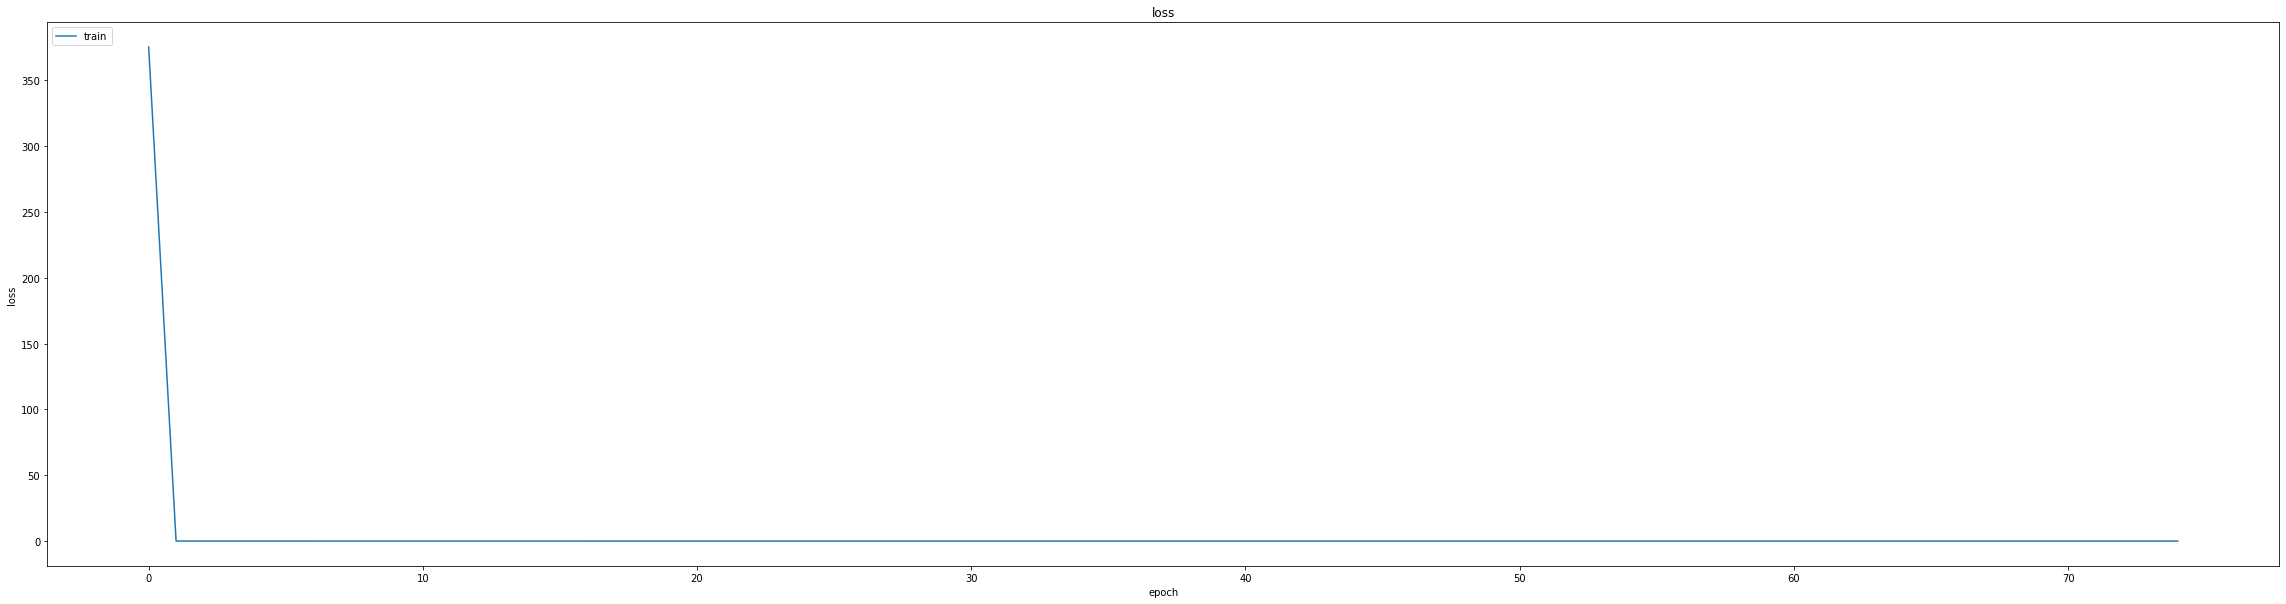

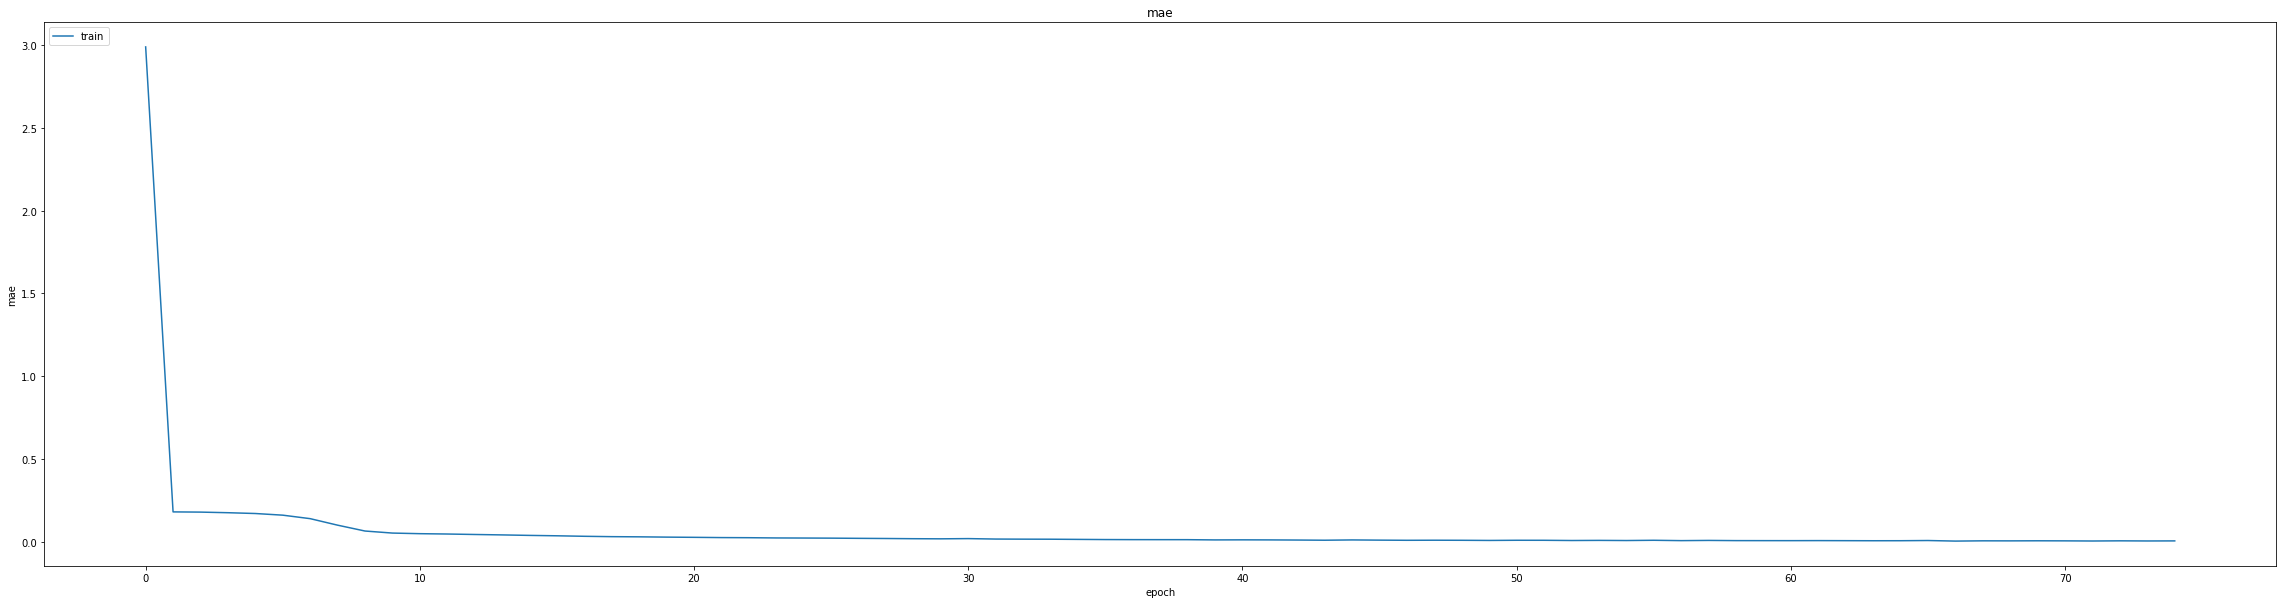

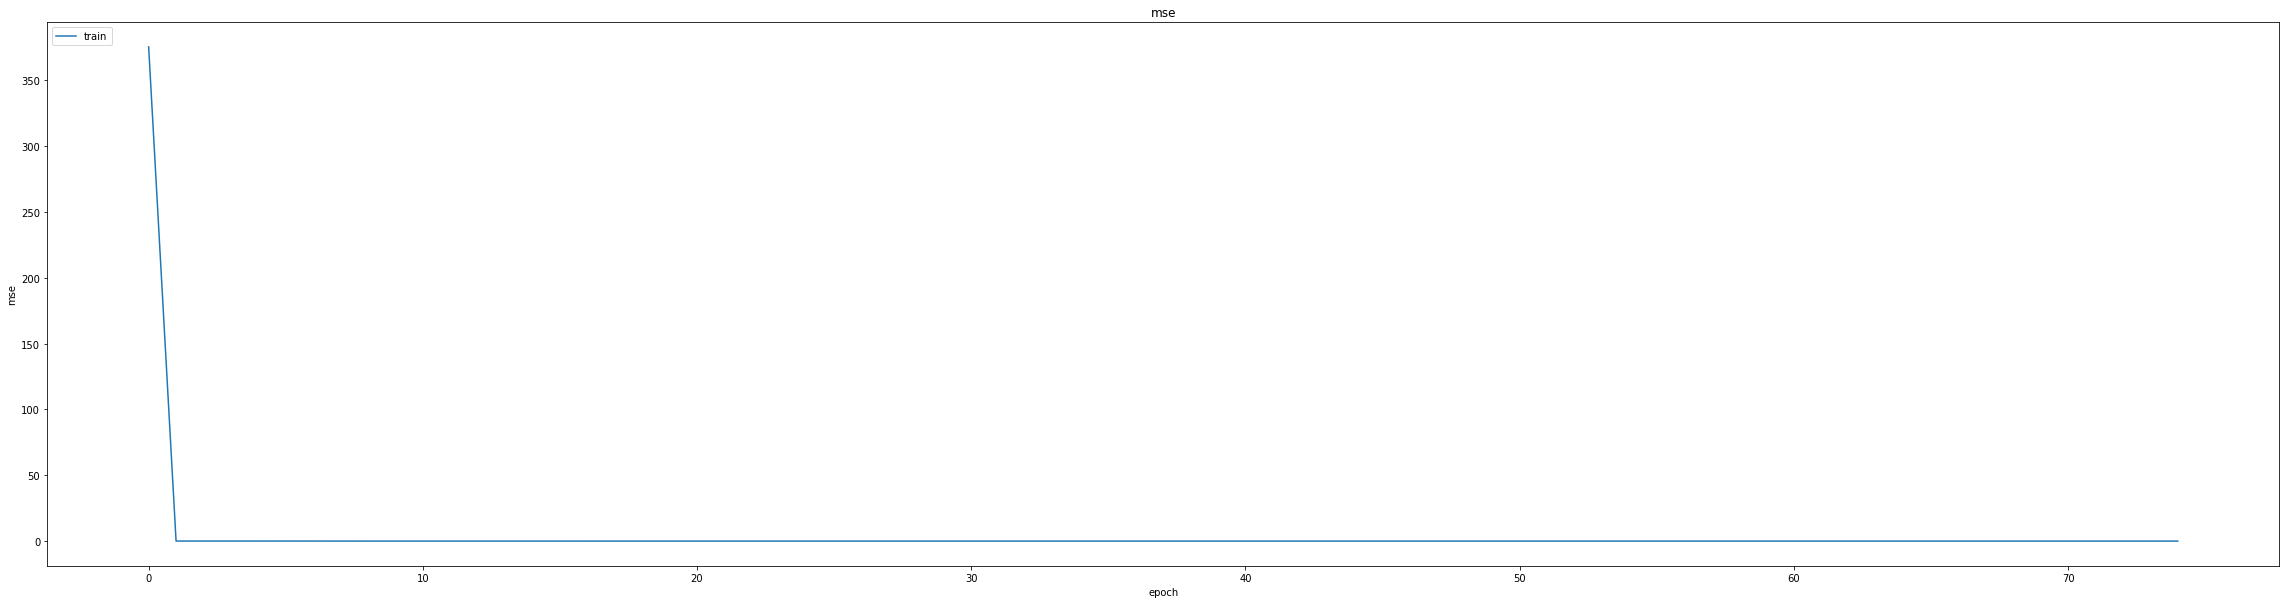

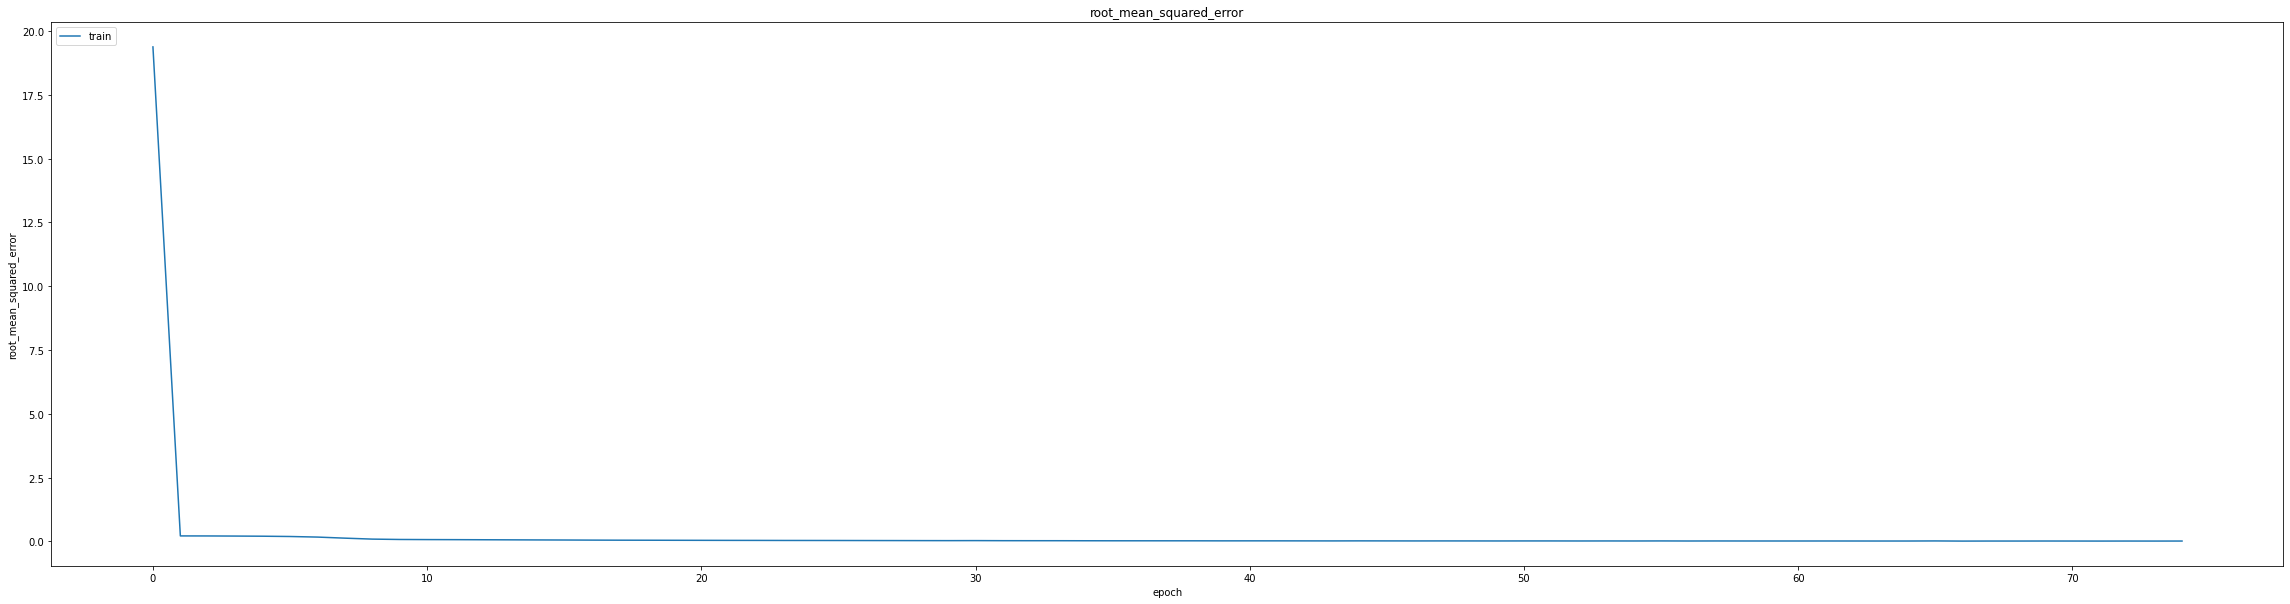

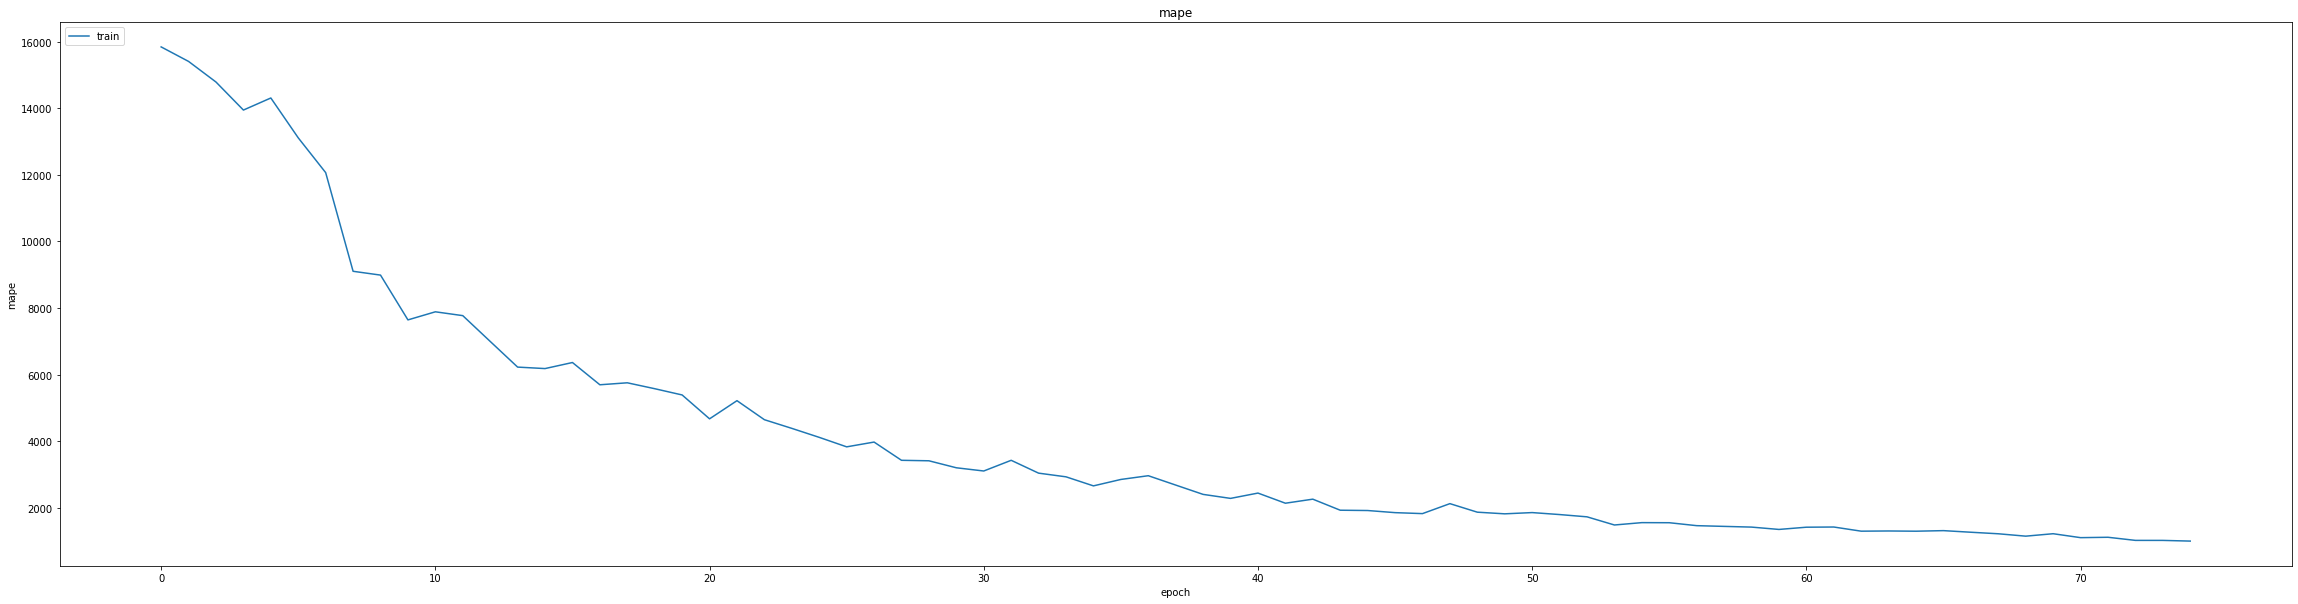

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004834679886698723
0.006699739955365658
464/464 [==============================] - 4s 5ms/step
0.9971064678801353


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0148 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2302.2563
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 14s 23ms/step - loss: 0.0019 - mae: 0.0148 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2296.4167 - val_loss: 2.1884e-04 - val_mae: 0.0125 - val_mse: 2.1884e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 5274.7900 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 4.3826e-05 - mae: 0.0050 - mse: 4.3826e-05 - root_mean_squared_error: 0.0066 - mape: 1712.1333
Epoch 2: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 17ms/step - loss: 4.3760e-05 - mae: 0.0050 - mse: 4.3760e-05 - root_mean_squared_error: 0.0066 - mape: 1697.9541 - val_loss: 1.2466e-04 - val_mae: 0.0091 - val_mse: 1.2466e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4492.4297 - lr: 0.0010
lr 

348/348 [==============================] - 31s 89ms/step - loss: 2.5801e-05 - mae: 0.0039 - mse: 2.5801e-05 - root_mean_squared_error: 0.0051 - mape: 797.7260 - val_loss: 3.2196e-05 - val_mae: 0.0041 - val_mse: 3.2196e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 2652.0635 - lr: 3.8742e-04
Epoch 20/25
345/348 [============================>.] - ETA: 0s - loss: 2.8017e-05 - mae: 0.0041 - mse: 2.8017e-05 - root_mean_squared_error: 0.0053 - mape: 797.5795
Epoch 20: val_mse did not improve from 0.00003
348/348 [==============================] - 6s 18ms/step - loss: 2.8031e-05 - mae: 0.0041 - mse: 2.8031e-05 - root_mean_squared_error: 0.0053 - mape: 790.9779 - val_loss: 1.2920e-04 - val_mae: 0.0104 - val_mse: 1.2920e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2389.5151 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
345/348 [============================>.] - ETA: 0s - loss: 2.4413e-05 - mae: 0.0038 - mse: 2.4413e-05 - root_mean_squared_error: 0.0049 - mape:

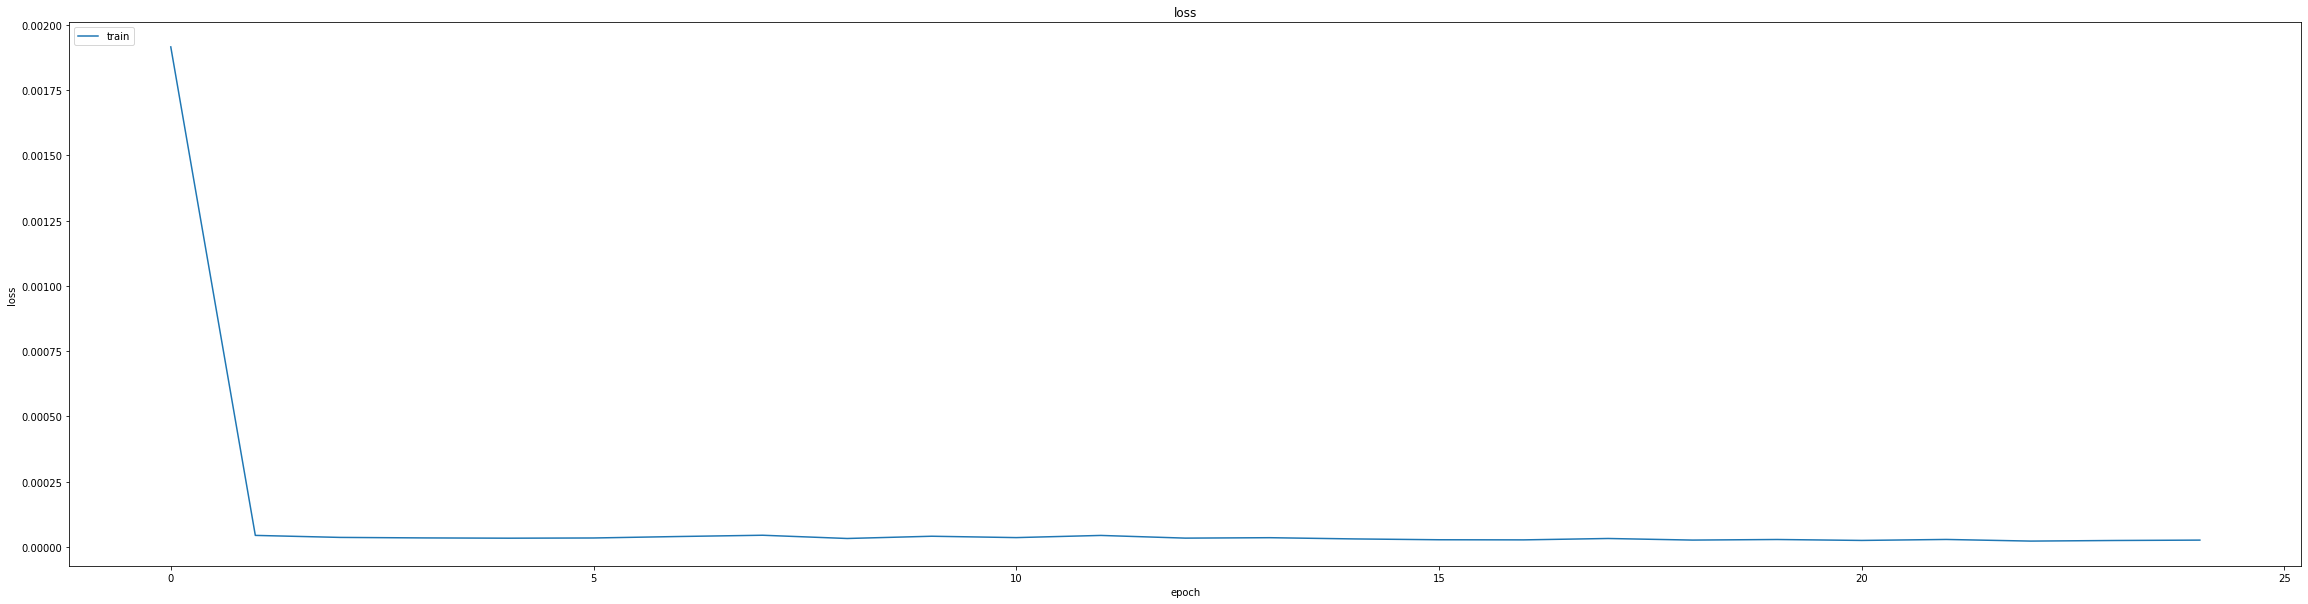

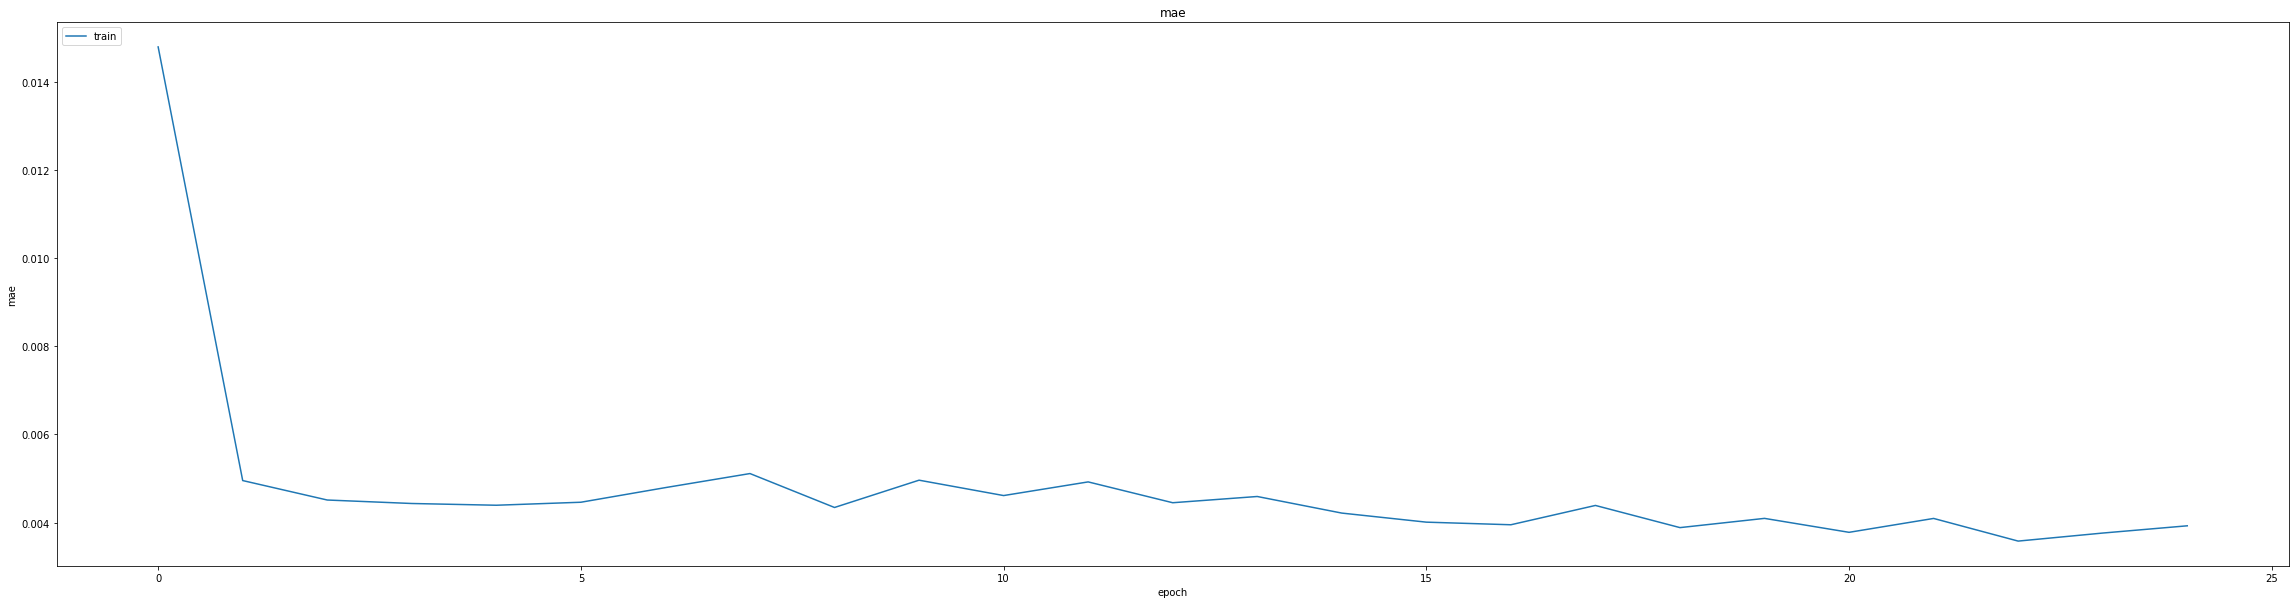

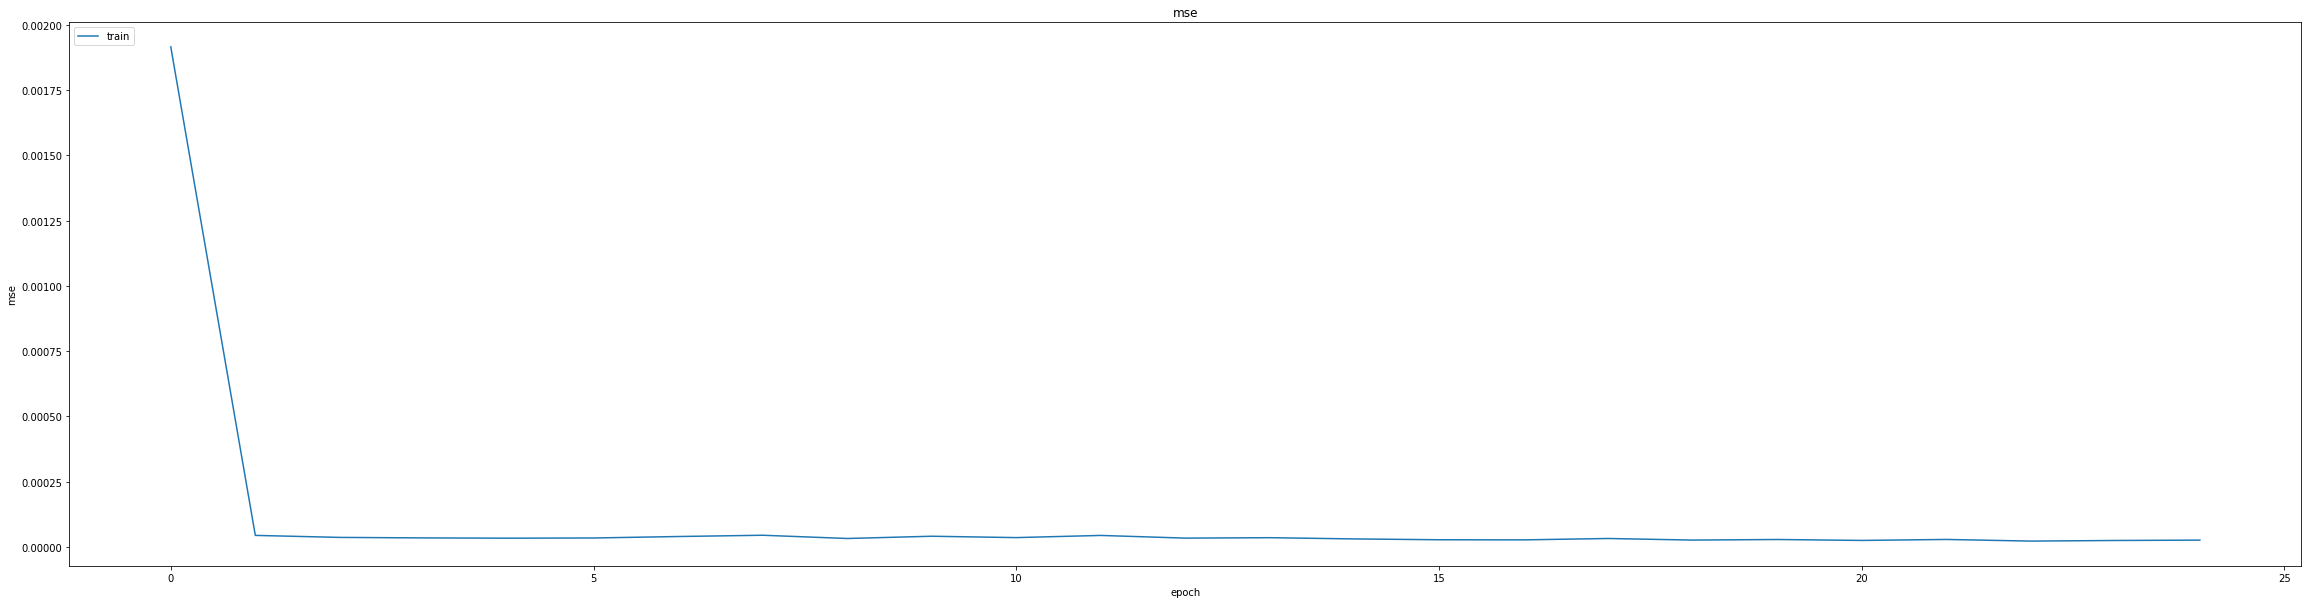

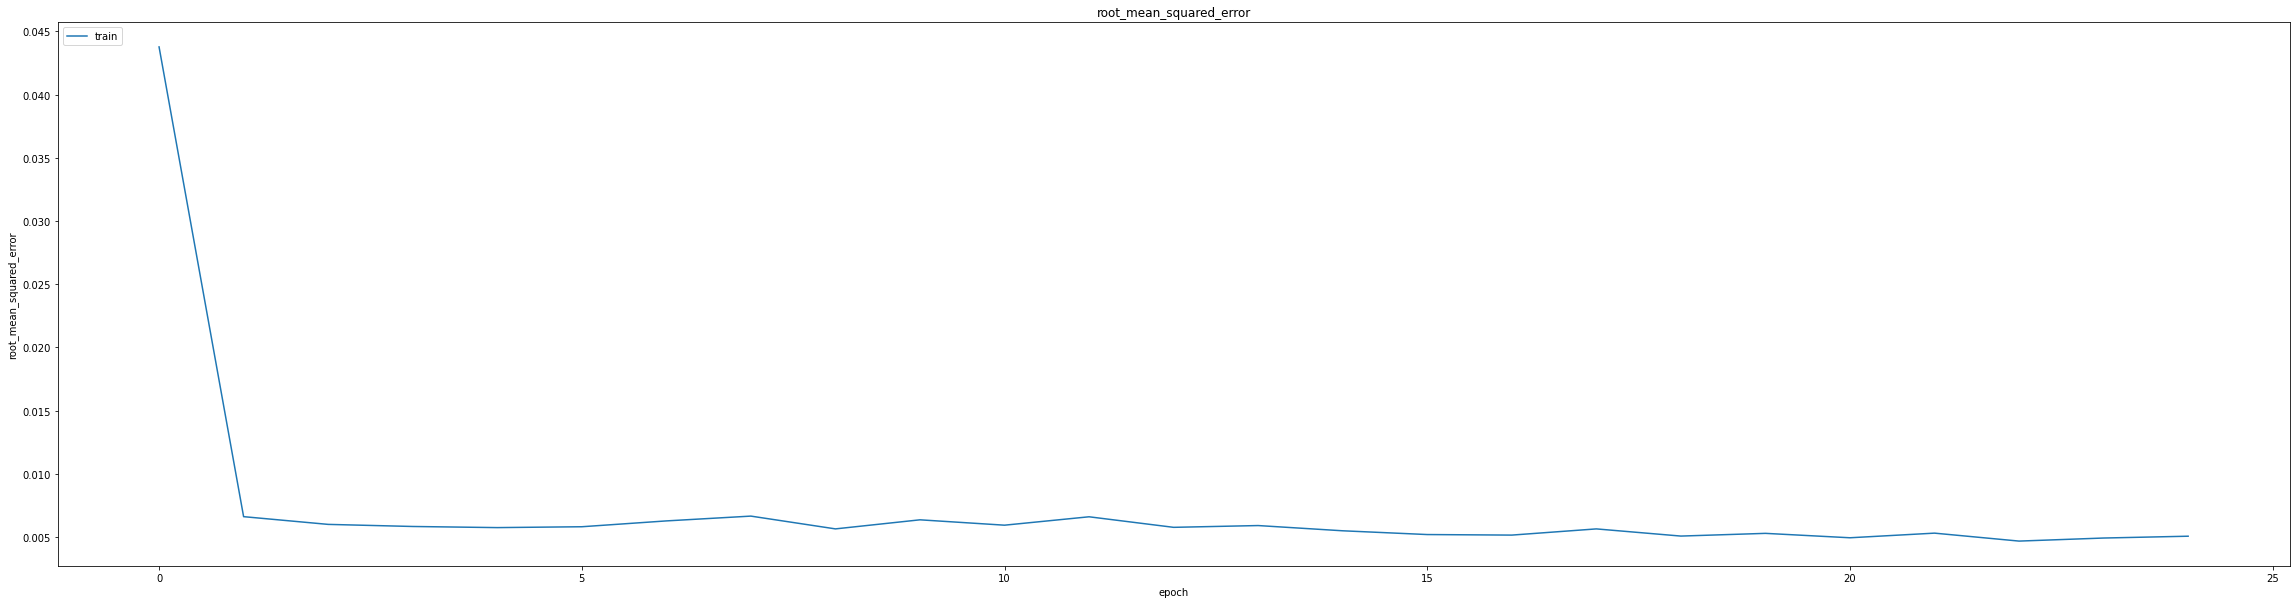

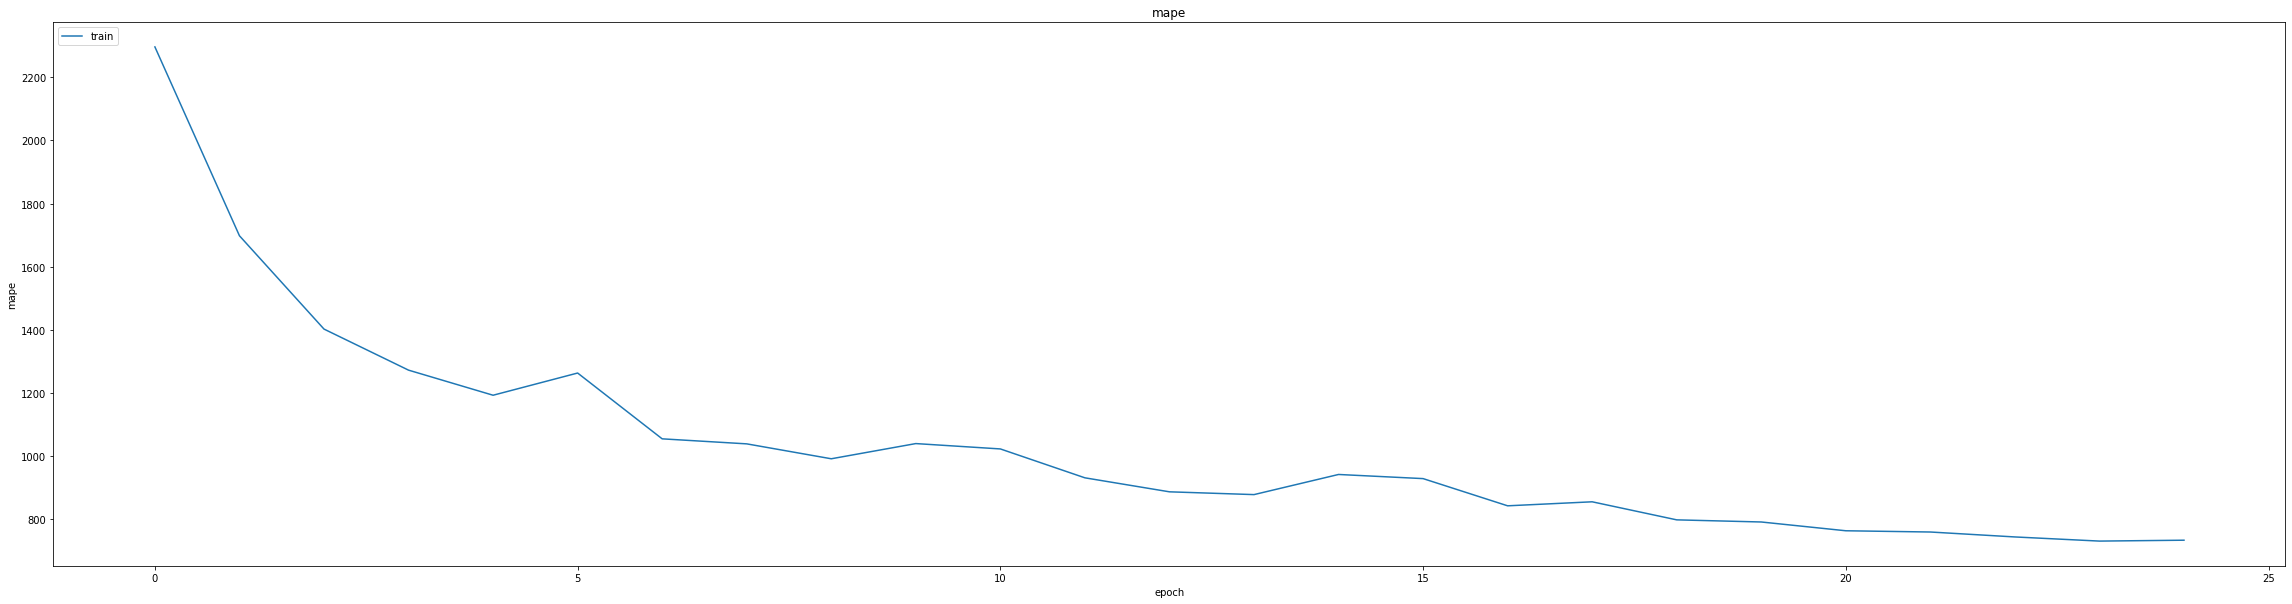

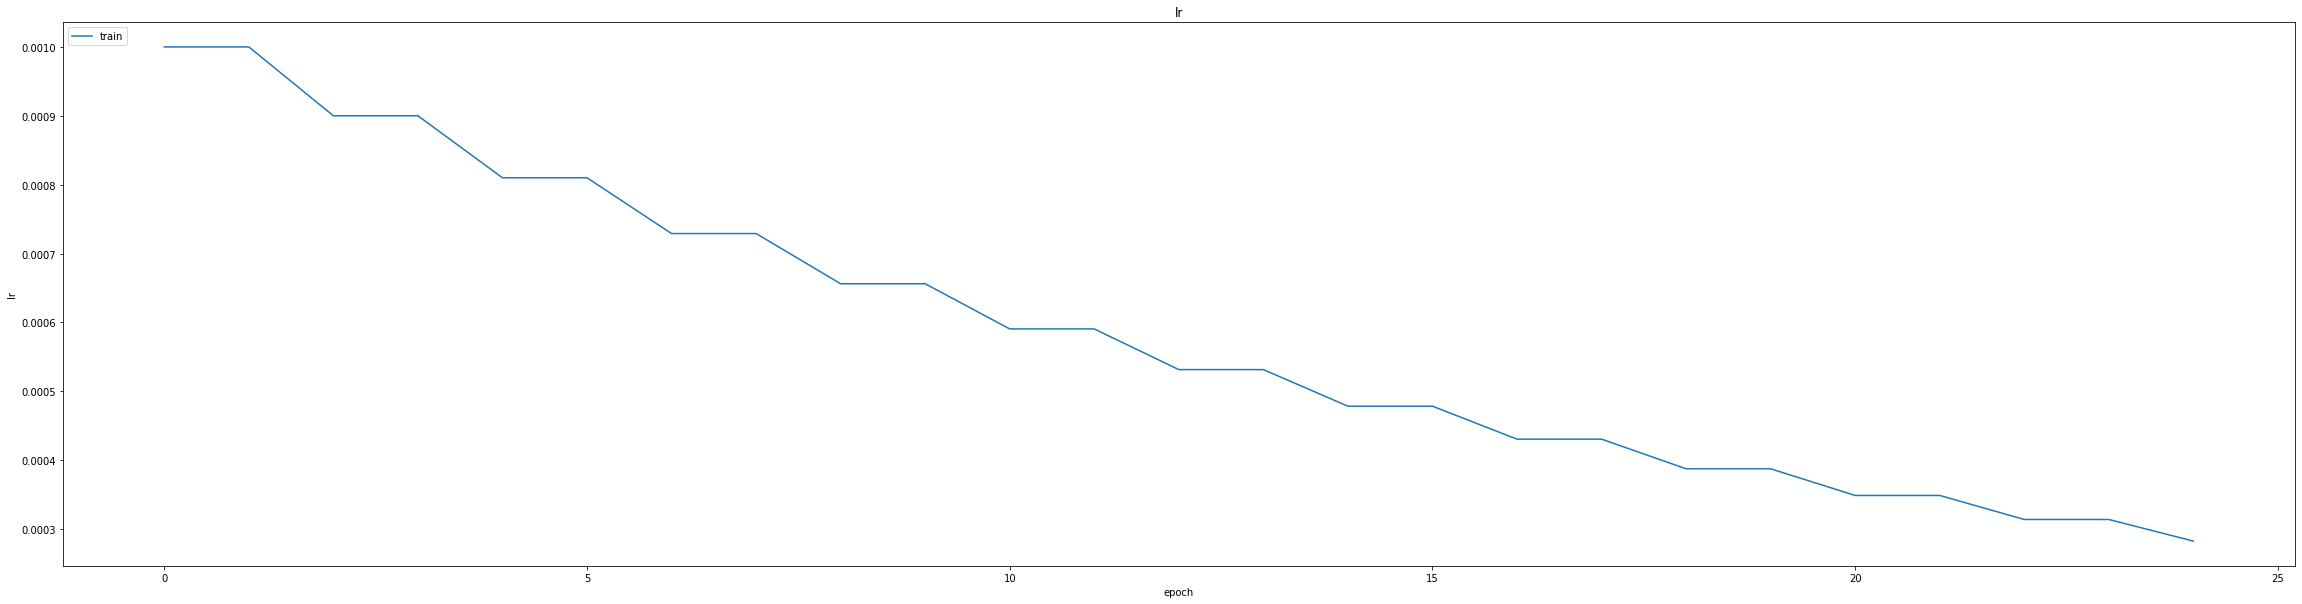

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004112660884857178
0.005674121901392937
464/464 [==============================] - 5s 7ms/step
0.9945018410026577


464/464 [==============================] - 3s 6ms/step


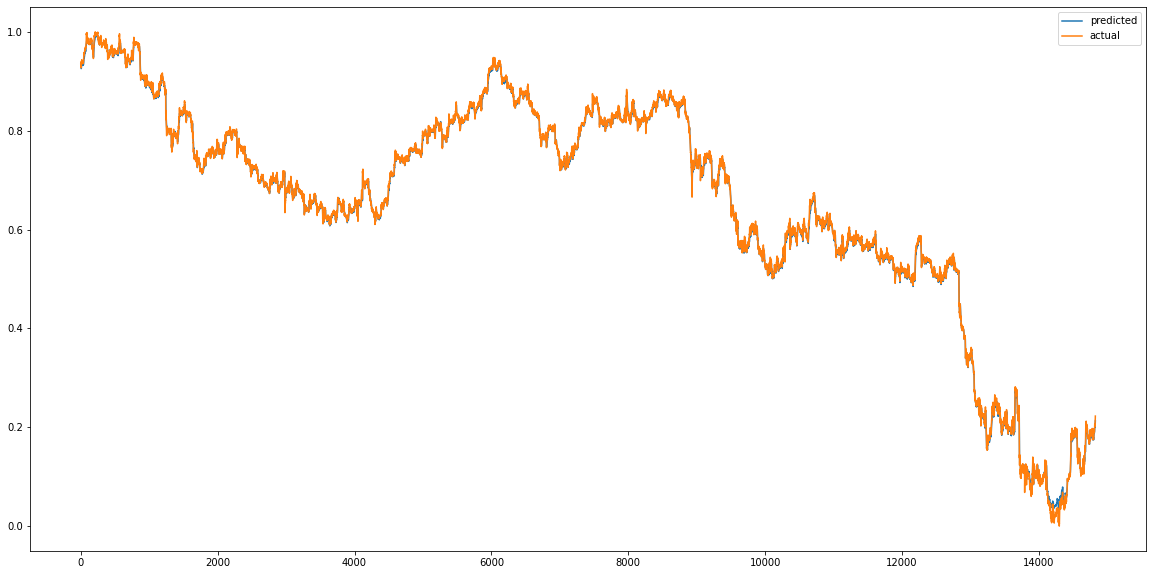

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


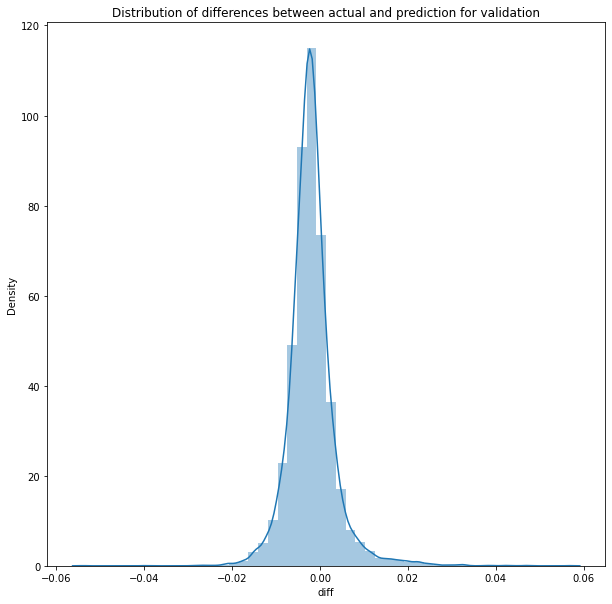

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 5ms/step


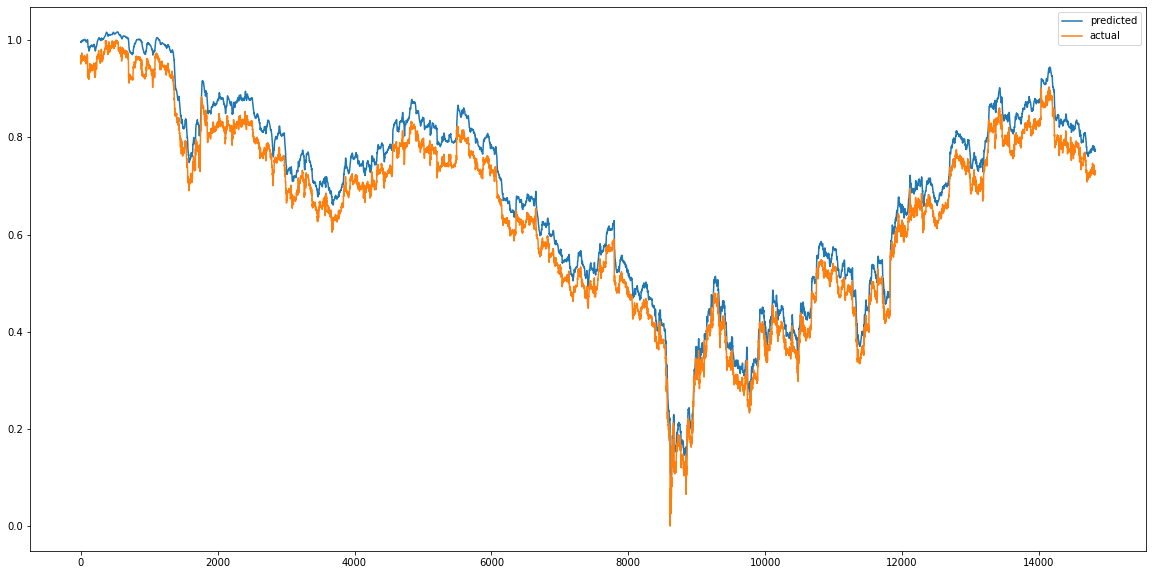

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


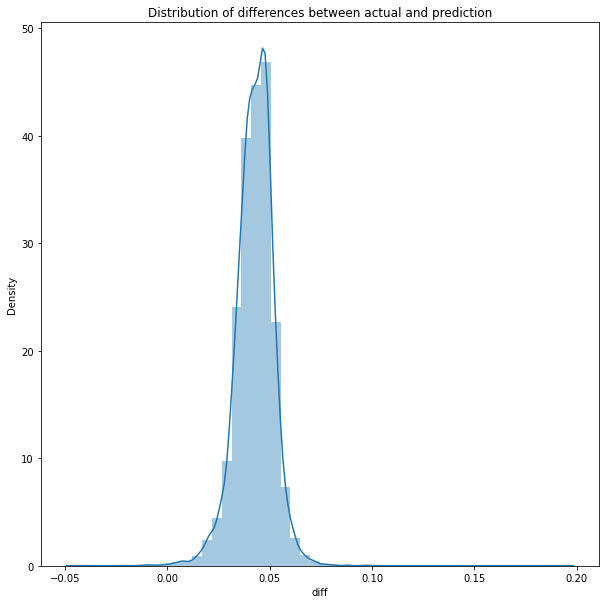

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0019067558065253441
RMSE :  0.04366641508671561
MAE :  0.04270114861375975
464/464 [==============================] - 3s 5ms/step
R2_Score  : 0.9503504886066642


count    14827.000000
mean         0.042679
std          0.009233
min         -0.045436
25%          0.037444
50%          0.043201
75%          0.048468
max          0.194339
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
345/348 [============================>.] - ETA: 0s - loss: 583.7305 - mae: 5.3869 - mse: 583.7305 - root_mean_squared_error: 24.1605 - mape: 3739077.7500
Epoch 1: val_mse improved from inf to 0.23742, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 29s 74ms/step - loss: 578.8954 - mae: 5.3460 - mse: 578.8954 - root_mean_squared_error: 24.0602 - mape: 3708094.0000 - val_loss: 0.2374 - val_mae: 0.4297 - val_mse: 0.2374 - val_root_mean_squared_error: 0.4873 - val_mape: 73617.8281
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0990 - mae: 0.2483 - mse: 0.0990 - root_mean_squared_error: 0.3147 - mape: 17045.5977
Epoch 2: val_mse improved from 0.23742 to 0.05682, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0986 - mae: 0.2477 - mse: 0.0986 - root_mean_squared_error: 0.3140 - mape: 16904.7246 - val_loss: 0.0568 - val_mae: 0.1719 - val_mse: 0.0568 - val_root_mean_squared_error: 0.2384 - val_mape: 48854.4297
Epoch 3/75
344/348 [============================>.] - ETA: 0s - loss: 0.0454 - mae: 0.1825 - mse: 0.0454 - root_mean_squared_error: 0.2130 - mape: 15884.6152
Epoch 3: val_mse improved from 0.05682 to 0.05270, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0453 - mae: 0.1824 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 15707.7461 - val_loss: 0.0527 - val_mae: 0.1758 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2296 - val_mape: 44553.5781
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1818 - mse: 0.0440 - root_mean_squared_error: 0.2097 - mape: 14965.4395
Epoch 4: val_mse did not improve from 0.05270
348/348 [==============================] - 4s 11ms/step - loss: 0.0440 - mae: 0.1818 - mse: 0.0440 - root_mean_squared_error: 0.2097 - mape: 14927.5352 - val_loss: 0.0527 - val_mae: 0.1771 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2297 - val_mape: 44017.4727
Epoch 5/75
343/348 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1819 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 14685.6221
Epoch 5: val_mse did not improve from 0.05270
348/348 [==============================] - 4s 11ms/step

348/348 [==============================] - 14s 41ms/step - loss: 0.0439 - mae: 0.1818 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 15271.3496 - val_loss: 0.0527 - val_mae: 0.1770 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2296 - val_mape: 43996.5430
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1819 - mse: 0.0440 - root_mean_squared_error: 0.2097 - mape: 14852.0293
Epoch 12: val_mse did not improve from 0.05269
348/348 [==============================] - 4s 11ms/step - loss: 0.0439 - mae: 0.1818 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 14771.8467 - val_loss: 0.0527 - val_mae: 0.1774 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2296 - val_mape: 43833.1719
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0439 - mae: 0.1818 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 15178.9277
Epoch 13: val_mse improved from 0.05269 to 0.05261, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 15s 42ms/step - loss: 0.0439 - mae: 0.1818 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 15096.9902 - val_loss: 0.0526 - val_mae: 0.1763 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 44200.6797
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0439 - mae: 0.1817 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 14688.7324
Epoch 14: val_mse did not improve from 0.05261
348/348 [==============================] - 4s 11ms/step - loss: 0.0438 - mae: 0.1816 - mse: 0.0438 - root_mean_squared_error: 0.2094 - mape: 14609.4395 - val_loss: 0.0526 - val_mae: 0.1773 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 43804.1836
Epoch 15/75
343/348 [============================>.] - ETA: 0s - loss: 0.0438 - mae: 0.1814 - mse: 0.0438 - root_mean_squared_error: 0.2092 - mape: 14897.5479
Epoch 15: val_mse did not improve from 0.05261
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 15s 43ms/step - loss: 0.0437 - mae: 0.1813 - mse: 0.0437 - root_mean_squared_error: 0.2091 - mape: 14846.6924 - val_loss: 0.0523 - val_mae: 0.1761 - val_mse: 0.0523 - val_root_mean_squared_error: 0.2287 - val_mape: 43930.4688
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0435 - mae: 0.1808 - mse: 0.0435 - root_mean_squared_error: 0.2087 - mape: 14567.3174
Epoch 17: val_mse improved from 0.05228 to 0.05143, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0435 - mae: 0.1808 - mse: 0.0435 - root_mean_squared_error: 0.2087 - mape: 14567.3174 - val_loss: 0.0514 - val_mae: 0.1756 - val_mse: 0.0514 - val_root_mean_squared_error: 0.2268 - val_mape: 43111.1758
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1628 - mse: 0.0365 - root_mean_squared_error: 0.1909 - mape: 14768.4814
Epoch 18: val_mse improved from 0.05143 to 0.03355, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0363 - mae: 0.1625 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 14646.2939 - val_loss: 0.0335 - val_mae: 0.1318 - val_mse: 0.0335 - val_root_mean_squared_error: 0.1832 - val_mape: 39148.1328
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0187 - mae: 0.1065 - mse: 0.0187 - root_mean_squared_error: 0.1366 - mape: 12291.5869
Epoch 19: val_mse improved from 0.03355 to 0.02147, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0187 - mae: 0.1064 - mse: 0.0187 - root_mean_squared_error: 0.1366 - mape: 12260.4863 - val_loss: 0.0215 - val_mae: 0.0966 - val_mse: 0.0215 - val_root_mean_squared_error: 0.1465 - val_mape: 34573.5898
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.0754 - mse: 0.0100 - root_mean_squared_error: 0.0999 - mape: 11590.0781
Epoch 20: val_mse improved from 0.02147 to 0.01326, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0099 - mae: 0.0753 - mse: 0.0099 - root_mean_squared_error: 0.0997 - mape: 11427.6260 - val_loss: 0.0133 - val_mae: 0.0736 - val_mse: 0.0133 - val_root_mean_squared_error: 0.1152 - val_mape: 29254.2422
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0560 - mse: 0.0057 - root_mean_squared_error: 0.0755 - mape: 9261.2402
Epoch 21: val_mse improved from 0.01326 to 0.00732, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 0.0057 - mae: 0.0560 - mse: 0.0057 - root_mean_squared_error: 0.0754 - mape: 9158.0342 - val_loss: 0.0073 - val_mae: 0.0475 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0856 - val_mape: 24584.7383
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0429 - mse: 0.0035 - root_mean_squared_error: 0.0589 - mape: 8185.9170
Epoch 22: val_mse improved from 0.00732 to 0.00479, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0035 - mae: 0.0429 - mse: 0.0035 - root_mean_squared_error: 0.0589 - mape: 8185.9170 - val_loss: 0.0048 - val_mae: 0.0362 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mape: 21857.2207
Epoch 23/75
344/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0373 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 7293.4419
Epoch 23: val_mse improved from 0.00479 to 0.00369, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0026 - mae: 0.0373 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 7212.1670 - val_loss: 0.0037 - val_mae: 0.0318 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0607 - val_mape: 20069.4297
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0333 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 6224.3940
Epoch 24: val_mse improved from 0.00369 to 0.00308, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0021 - mae: 0.0333 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 6224.3940 - val_loss: 0.0031 - val_mae: 0.0317 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0555 - val_mape: 18735.7402
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0311 - mse: 0.0018 - root_mean_squared_error: 0.0425 - mape: 6256.3174
Epoch 25: val_mse improved from 0.00308 to 0.00293, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0018 - mae: 0.0311 - mse: 0.0018 - root_mean_squared_error: 0.0425 - mape: 6256.3174 - val_loss: 0.0029 - val_mae: 0.0368 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 17489.6523
Epoch 26/75
343/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0299 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 5778.5537
Epoch 26: val_mse did not improve from 0.00293
348/348 [==============================] - 4s 11ms/step - loss: 0.0016 - mae: 0.0298 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 5697.5449 - val_loss: 0.0029 - val_mae: 0.0402 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0543 - val_mape: 16727.9453
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0280 - mse: 0.0014 - root_mean_squared_error: 0.0380 - mape: 5782.2627
Epoch 27: val_mse improved from 0.00293 to 0.00195, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 14s 41ms/step - loss: 0.0014 - mae: 0.0280 - mse: 0.0014 - root_mean_squared_error: 0.0380 - mape: 5734.3887 - val_loss: 0.0020 - val_mae: 0.0235 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0442 - val_mape: 16162.1660
Epoch 28/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0265 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 5746.7661
Epoch 28: val_mse improved from 0.00195 to 0.00169, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0013 - mae: 0.0265 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 5699.1987 - val_loss: 0.0017 - val_mae: 0.0228 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 15252.4326
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 5253.4839
Epoch 29: val_mse improved from 0.00169 to 0.00167, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 5225.0806 - val_loss: 0.0017 - val_mae: 0.0260 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0408 - val_mape: 14492.7266
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 4628.2651
Epoch 30: val_mse improved from 0.00167 to 0.00139, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0011 - mae: 0.0246 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 4576.6685 - val_loss: 0.0014 - val_mae: 0.0245 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 13443.2666
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 8.9349e-04 - mae: 0.0224 - mse: 8.9349e-04 - root_mean_squared_error: 0.0299 - mape: 4370.9722
Epoch 31: val_mse did not improve from 0.00139
348/348 [==============================] - 4s 11ms/step - loss: 8.9328e-04 - mae: 0.0224 - mse: 8.9328e-04 - root_mean_squared_error: 0.0299 - mape: 4334.7954 - val_loss: 0.0015 - val_mae: 0.0278 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 12557.3066
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 8.0159e-04 - mae: 0.0215 - mse: 8.0159e-04 - root_mean_squared_error: 0.0283 - mape: 4234.5952
Epoch 32: val_mse improved from 0.00139 to 0.00095, saving model to /content/d

348/348 [==============================] - 15s 42ms/step - loss: 8.0067e-04 - mae: 0.0214 - mse: 8.0067e-04 - root_mean_squared_error: 0.0283 - mape: 4211.6943 - val_loss: 9.5277e-04 - val_mae: 0.0186 - val_mse: 9.5277e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 12027.5674
Epoch 33/75
346/348 [============================>.] - ETA: 0s - loss: 7.6139e-04 - mae: 0.0210 - mse: 7.6139e-04 - root_mean_squared_error: 0.0276 - mape: 4073.1279
Epoch 33: val_mse improved from 0.00095 to 0.00092, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 7.5992e-04 - mae: 0.0210 - mse: 7.5992e-04 - root_mean_squared_error: 0.0276 - mape: 4051.1016 - val_loss: 9.1590e-04 - val_mae: 0.0190 - val_mse: 9.1590e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 11244.6768
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 6.5996e-04 - mae: 0.0196 - mse: 6.5996e-04 - root_mean_squared_error: 0.0257 - mape: 3847.8892
Epoch 34: val_mse improved from 0.00092 to 0.00081, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 6.6112e-04 - mae: 0.0196 - mse: 6.6112e-04 - root_mean_squared_error: 0.0257 - mape: 3827.0977 - val_loss: 8.0887e-04 - val_mae: 0.0191 - val_mse: 8.0887e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 10512.4648
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 6.3068e-04 - mae: 0.0194 - mse: 6.3068e-04 - root_mean_squared_error: 0.0251 - mape: 3583.1814
Epoch 35: val_mse improved from 0.00081 to 0.00060, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 6.3068e-04 - mae: 0.0194 - mse: 6.3068e-04 - root_mean_squared_error: 0.0251 - mape: 3583.1814 - val_loss: 6.0111e-04 - val_mae: 0.0158 - val_mse: 6.0111e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 9660.7783
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 5.9178e-04 - mae: 0.0189 - mse: 5.9178e-04 - root_mean_squared_error: 0.0243 - mape: 3321.7764
Epoch 36: val_mse improved from 0.00060 to 0.00055, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 5.9175e-04 - mae: 0.0189 - mse: 5.9175e-04 - root_mean_squared_error: 0.0243 - mape: 3313.3564 - val_loss: 5.5076e-04 - val_mae: 0.0160 - val_mse: 5.5076e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 8825.5693
Epoch 37/75
344/348 [============================>.] - ETA: 0s - loss: 5.4262e-04 - mae: 0.0182 - mse: 5.4262e-04 - root_mean_squared_error: 0.0233 - mape: 2903.8567
Epoch 37: val_mse did not improve from 0.00055
348/348 [==============================] - 4s 12ms/step - loss: 5.4120e-04 - mae: 0.0182 - mse: 5.4120e-04 - root_mean_squared_error: 0.0233 - mape: 2871.4902 - val_loss: 6.1936e-04 - val_mae: 0.0185 - val_mse: 6.1936e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 8107.7642
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 4.2219e-04 - mae: 0.0159 - mse: 4.2219e-04 - root_mean_squared_error: 0.0205 - mape: 2954.3989
Epoch 38: val_mse improved from 0.00055 to 0.00042, savi

348/348 [==============================] - 15s 42ms/step - loss: 4.2164e-04 - mae: 0.0159 - mse: 4.2164e-04 - root_mean_squared_error: 0.0205 - mape: 2929.9482 - val_loss: 4.1837e-04 - val_mae: 0.0139 - val_mse: 4.1837e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 7607.8154
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 4.7290e-04 - mae: 0.0169 - mse: 4.7290e-04 - root_mean_squared_error: 0.0217 - mape: 2837.6218
Epoch 39: val_mse did not improve from 0.00042
348/348 [==============================] - 5s 13ms/step - loss: 4.7357e-04 - mae: 0.0169 - mse: 4.7357e-04 - root_mean_squared_error: 0.0218 - mape: 2814.1343 - val_loss: 5.5960e-04 - val_mae: 0.0179 - val_mse: 5.5960e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 7258.7676
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 4.5641e-04 - mae: 0.0167 - mse: 4.5641e-04 - root_mean_squared_error: 0.0214 - mape: 2691.1423
Epoch 40: val_mse did not improve from 0.00042
348/348 [

348/348 [==============================] - 14s 41ms/step - loss: 4.4039e-04 - mae: 0.0163 - mse: 4.4039e-04 - root_mean_squared_error: 0.0210 - mape: 2319.7607 - val_loss: 4.1819e-04 - val_mae: 0.0144 - val_mse: 4.1819e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 6847.4600
Epoch 42/75
347/348 [============================>.] - ETA: 0s - loss: 3.7755e-04 - mae: 0.0151 - mse: 3.7755e-04 - root_mean_squared_error: 0.0194 - mape: 2310.4673
Epoch 42: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 11ms/step - loss: 3.7724e-04 - mae: 0.0151 - mse: 3.7724e-04 - root_mean_squared_error: 0.0194 - mape: 2304.6096 - val_loss: 4.6769e-04 - val_mae: 0.0166 - val_mse: 4.6769e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 6703.4473
Epoch 43/75
345/348 [============================>.] - ETA: 0s - loss: 3.6532e-04 - mae: 0.0149 - mse: 3.6532e-04 - root_mean_squared_error: 0.0191 - mape: 2426.9438
Epoch 43: val_mse improved from 0.00042 to 0.00039, savi

348/348 [==============================] - 14s 42ms/step - loss: 3.6479e-04 - mae: 0.0149 - mse: 3.6479e-04 - root_mean_squared_error: 0.0191 - mape: 2406.8650 - val_loss: 3.8777e-04 - val_mae: 0.0145 - val_mse: 3.8777e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 6182.1919
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 3.4790e-04 - mae: 0.0145 - mse: 3.4790e-04 - root_mean_squared_error: 0.0187 - mape: 2119.8767
Epoch 44: val_mse did not improve from 0.00039
348/348 [==============================] - 4s 11ms/step - loss: 3.4891e-04 - mae: 0.0145 - mse: 3.4891e-04 - root_mean_squared_error: 0.0187 - mape: 2102.3347 - val_loss: 5.0125e-04 - val_mae: 0.0173 - val_mse: 5.0125e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 5945.3750
Epoch 45/75
344/348 [============================>.] - ETA: 0s - loss: 3.2065e-04 - mae: 0.0139 - mse: 3.2065e-04 - root_mean_squared_error: 0.0179 - mape: 1995.5552
Epoch 45: val_mse did not improve from 0.00039
348/348 [

348/348 [==============================] - 14s 41ms/step - loss: 3.2796e-04 - mae: 0.0141 - mse: 3.2796e-04 - root_mean_squared_error: 0.0181 - mape: 2534.5071 - val_loss: 3.1644e-04 - val_mae: 0.0123 - val_mse: 3.1644e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 6117.4531
Epoch 48/75
343/348 [============================>.] - ETA: 0s - loss: 3.2514e-04 - mae: 0.0141 - mse: 3.2514e-04 - root_mean_squared_error: 0.0180 - mape: 2458.4507
Epoch 48: val_mse improved from 0.00032 to 0.00031, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 3.2401e-04 - mae: 0.0140 - mse: 3.2401e-04 - root_mean_squared_error: 0.0180 - mape: 2423.9878 - val_loss: 3.1049e-04 - val_mae: 0.0128 - val_mse: 3.1049e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 5393.6768
Epoch 49/75
343/348 [============================>.] - ETA: 0s - loss: 2.5860e-04 - mae: 0.0123 - mse: 2.5860e-04 - root_mean_squared_error: 0.0161 - mape: 2167.5083
Epoch 49: val_mse did not improve from 0.00031
348/348 [==============================] - 4s 11ms/step - loss: 2.5819e-04 - mae: 0.0123 - mse: 2.5819e-04 - root_mean_squared_error: 0.0161 - mape: 2137.1179 - val_loss: 3.1053e-04 - val_mae: 0.0128 - val_mse: 3.1053e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 5727.7461
Epoch 50/75
343/348 [============================>.] - ETA: 0s - loss: 2.5796e-04 - mae: 0.0123 - mse: 2.5796e-04 - root_mean_squared_error: 0.0161 - mape: 1749.0787
Epoch 50: val_mse did not improve from 0.00031
348/348 [

348/348 [==============================] - 14s 40ms/step - loss: 2.5575e-04 - mae: 0.0123 - mse: 2.5575e-04 - root_mean_squared_error: 0.0160 - mape: 1804.8608 - val_loss: 2.8945e-04 - val_mae: 0.0122 - val_mse: 2.8945e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 5106.8794
Epoch 53/75
344/348 [============================>.] - ETA: 0s - loss: 2.4709e-04 - mae: 0.0121 - mse: 2.4709e-04 - root_mean_squared_error: 0.0157 - mape: 2689.0176
Epoch 53: val_mse improved from 0.00029 to 0.00026, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 2.4830e-04 - mae: 0.0121 - mse: 2.4830e-04 - root_mean_squared_error: 0.0158 - mape: 2659.0415 - val_loss: 2.6418e-04 - val_mae: 0.0113 - val_mse: 2.6418e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 5282.0806
Epoch 54/75
347/348 [============================>.] - ETA: 0s - loss: 2.8581e-04 - mae: 0.0131 - mse: 2.8581e-04 - root_mean_squared_error: 0.0169 - mape: 1892.2614
Epoch 54: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 12ms/step - loss: 2.8563e-04 - mae: 0.0131 - mse: 2.8563e-04 - root_mean_squared_error: 0.0169 - mape: 1887.4642 - val_loss: 4.8981e-04 - val_mae: 0.0182 - val_mse: 4.8981e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 5153.2827
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 2.1093e-04 - mae: 0.0110 - mse: 2.1093e-04 - root_mean_squared_error: 0.0145 - mape: 2582.7534
Epoch 55: val_mse improved from 0.00026 to 0.00025, savi

348/348 [==============================] - 14s 41ms/step - loss: 2.1077e-04 - mae: 0.0110 - mse: 2.1077e-04 - root_mean_squared_error: 0.0145 - mape: 2576.2036 - val_loss: 2.5288e-04 - val_mae: 0.0112 - val_mse: 2.5288e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 4861.9150
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 2.6984e-04 - mae: 0.0127 - mse: 2.6984e-04 - root_mean_squared_error: 0.0164 - mape: 1507.1039
Epoch 56: val_mse did not improve from 0.00025
348/348 [==============================] - 5s 14ms/step - loss: 2.6963e-04 - mae: 0.0127 - mse: 2.6963e-04 - root_mean_squared_error: 0.0164 - mape: 1503.2859 - val_loss: 2.8712e-04 - val_mae: 0.0125 - val_mse: 2.8712e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 4809.8994
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 2.1436e-04 - mae: 0.0113 - mse: 2.1436e-04 - root_mean_squared_error: 0.0146 - mape: 1657.5001
Epoch 57: val_mse did not improve from 0.00025
348/348 [

348/348 [==============================] - 14s 41ms/step - loss: 2.2176e-04 - mae: 0.0115 - mse: 2.2176e-04 - root_mean_squared_error: 0.0149 - mape: 1712.7152 - val_loss: 2.0839e-04 - val_mae: 0.0096 - val_mse: 2.0839e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 4552.8716
Epoch 61/75
347/348 [============================>.] - ETA: 0s - loss: 1.8606e-04 - mae: 0.0105 - mse: 1.8606e-04 - root_mean_squared_error: 0.0136 - mape: 1561.3879
Epoch 61: val_mse did not improve from 0.00021
348/348 [==============================] - 4s 11ms/step - loss: 1.8617e-04 - mae: 0.0105 - mse: 1.8617e-04 - root_mean_squared_error: 0.0136 - mape: 1557.4386 - val_loss: 2.4553e-04 - val_mae: 0.0113 - val_mse: 2.4553e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 5272.7026
Epoch 62/75
347/348 [============================>.] - ETA: 0s - loss: 1.8036e-04 - mae: 0.0103 - mse: 1.8036e-04 - root_mean_squared_error: 0.0134 - mape: 1691.4034
Epoch 62: val_mse did not improve from 0.00021
348/348 [

348/348 [==============================] - 14s 41ms/step - loss: 1.6292e-04 - mae: 0.0098 - mse: 1.6292e-04 - root_mean_squared_error: 0.0128 - mape: 1279.0680 - val_loss: 1.7814e-04 - val_mae: 0.0098 - val_mse: 1.7814e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 3848.8977
Epoch 66/75
346/348 [============================>.] - ETA: 0s - loss: 1.3665e-04 - mae: 0.0090 - mse: 1.3665e-04 - root_mean_squared_error: 0.0117 - mape: 1290.7548
Epoch 66: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 11ms/step - loss: 1.3656e-04 - mae: 0.0090 - mse: 1.3656e-04 - root_mean_squared_error: 0.0117 - mape: 1283.7833 - val_loss: 1.9785e-04 - val_mae: 0.0111 - val_mse: 1.9785e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 3719.9690
Epoch 67/75
348/348 [==============================] - ETA: 0s - loss: 1.4235e-04 - mae: 0.0092 - mse: 1.4235e-04 - root_mean_squared_error: 0.0119 - mape: 1089.9119
Epoch 67: val_mse improved from 0.00018 to 0.00012, savi

348/348 [==============================] - 14s 40ms/step - loss: 1.4235e-04 - mae: 0.0092 - mse: 1.4235e-04 - root_mean_squared_error: 0.0119 - mape: 1089.9119 - val_loss: 1.2350e-04 - val_mae: 0.0079 - val_mse: 1.2350e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 3650.6753
Epoch 68/75
347/348 [============================>.] - ETA: 0s - loss: 1.6898e-04 - mae: 0.0099 - mse: 1.6898e-04 - root_mean_squared_error: 0.0130 - mape: 1568.0137
Epoch 68: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 11ms/step - loss: 1.6896e-04 - mae: 0.0099 - mse: 1.6896e-04 - root_mean_squared_error: 0.0130 - mape: 1564.0386 - val_loss: 3.9421e-04 - val_mae: 0.0180 - val_mse: 3.9421e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3616.1606
Epoch 69/75
346/348 [============================>.] - ETA: 0s - loss: 1.0765e-04 - mae: 0.0080 - mse: 1.0765e-04 - root_mean_squared_error: 0.0104 - mape: 1154.0953
Epoch 69: val_mse improved from 0.00012 to 0.00010, savi

348/348 [==============================] - 15s 42ms/step - loss: 1.0788e-04 - mae: 0.0080 - mse: 1.0788e-04 - root_mean_squared_error: 0.0104 - mape: 1147.8585 - val_loss: 1.0472e-04 - val_mae: 0.0077 - val_mse: 1.0472e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 3382.7056
Epoch 70/75
348/348 [==============================] - ETA: 0s - loss: 1.2796e-04 - mae: 0.0088 - mse: 1.2796e-04 - root_mean_squared_error: 0.0113 - mape: 1068.5486
Epoch 70: val_mse improved from 0.00010 to 0.00009, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 1.2796e-04 - mae: 0.0088 - mse: 1.2796e-04 - root_mean_squared_error: 0.0113 - mape: 1068.5486 - val_loss: 9.3803e-05 - val_mae: 0.0067 - val_mse: 9.3803e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 3646.1953
Epoch 71/75
348/348 [==============================] - ETA: 0s - loss: 1.0744e-04 - mae: 0.0081 - mse: 1.0744e-04 - root_mean_squared_error: 0.0104 - mape: 1386.8767
Epoch 71: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 11ms/step - loss: 1.0744e-04 - mae: 0.0081 - mse: 1.0744e-04 - root_mean_squared_error: 0.0104 - mape: 1386.8767 - val_loss: 2.2987e-04 - val_mae: 0.0131 - val_mse: 2.2987e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3060.0737
Epoch 72/75
348/348 [==============================] - ETA: 0s - loss: 1.0168e-04 - mae: 0.0077 - mse: 1.0168e-04 - root_mean_squared_error: 0.0101 - mape: 1348.3442
Epoch 72: val_mse did not improve from 0.00009
348/348 [

348/348 [==============================] - 16s 45ms/step - loss: 8.9839e-05 - mae: 0.0073 - mse: 8.9839e-05 - root_mean_squared_error: 0.0095 - mape: 908.9821 - val_loss: 9.0096e-05 - val_mae: 0.0071 - val_mse: 9.0096e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 2952.7874


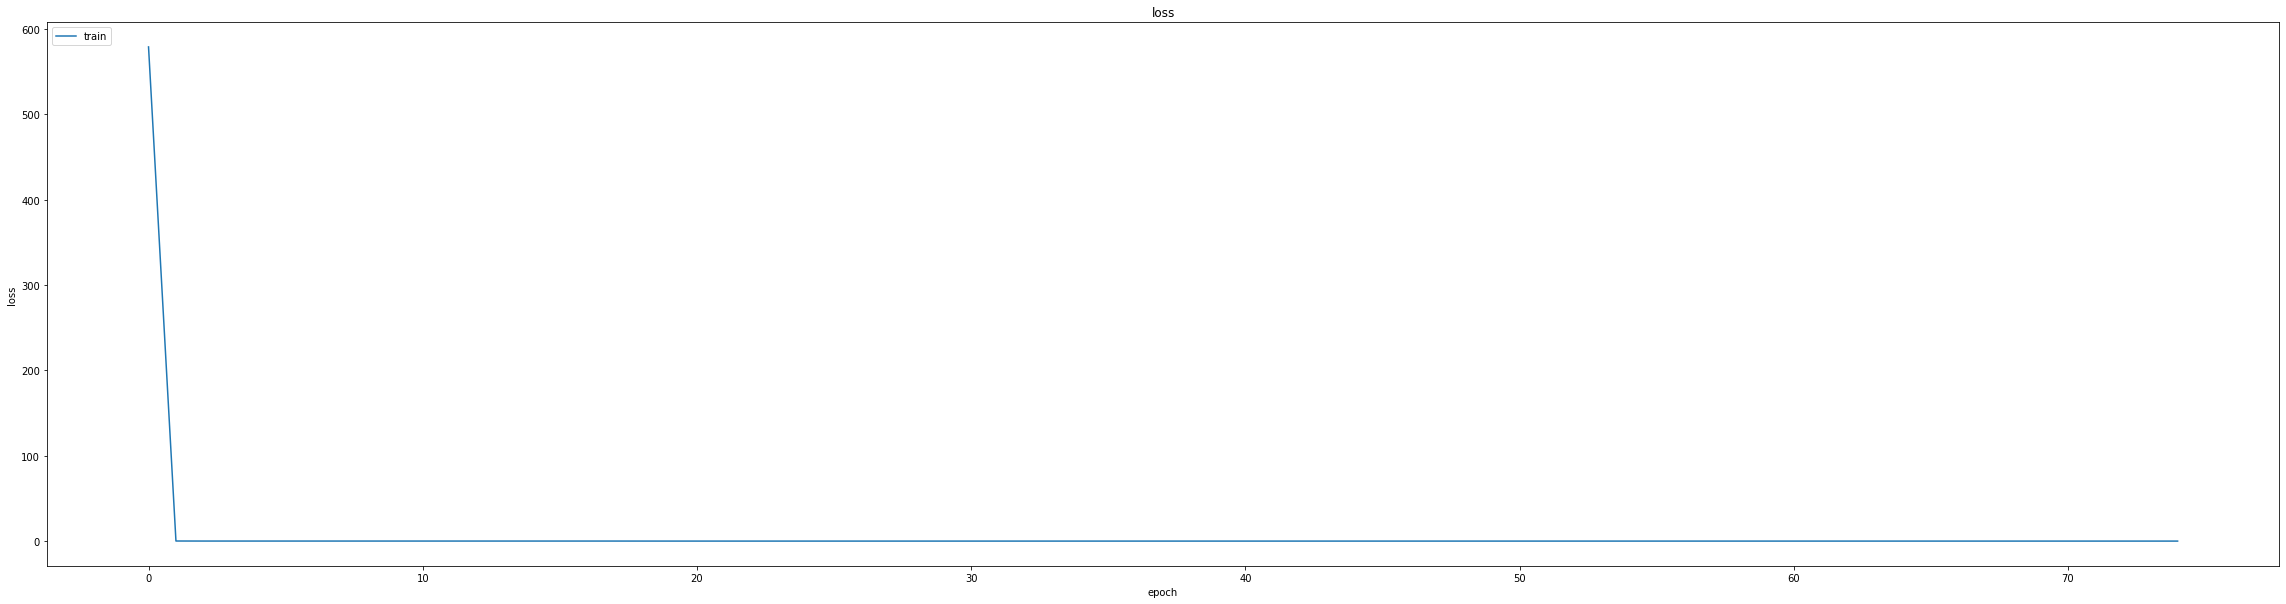

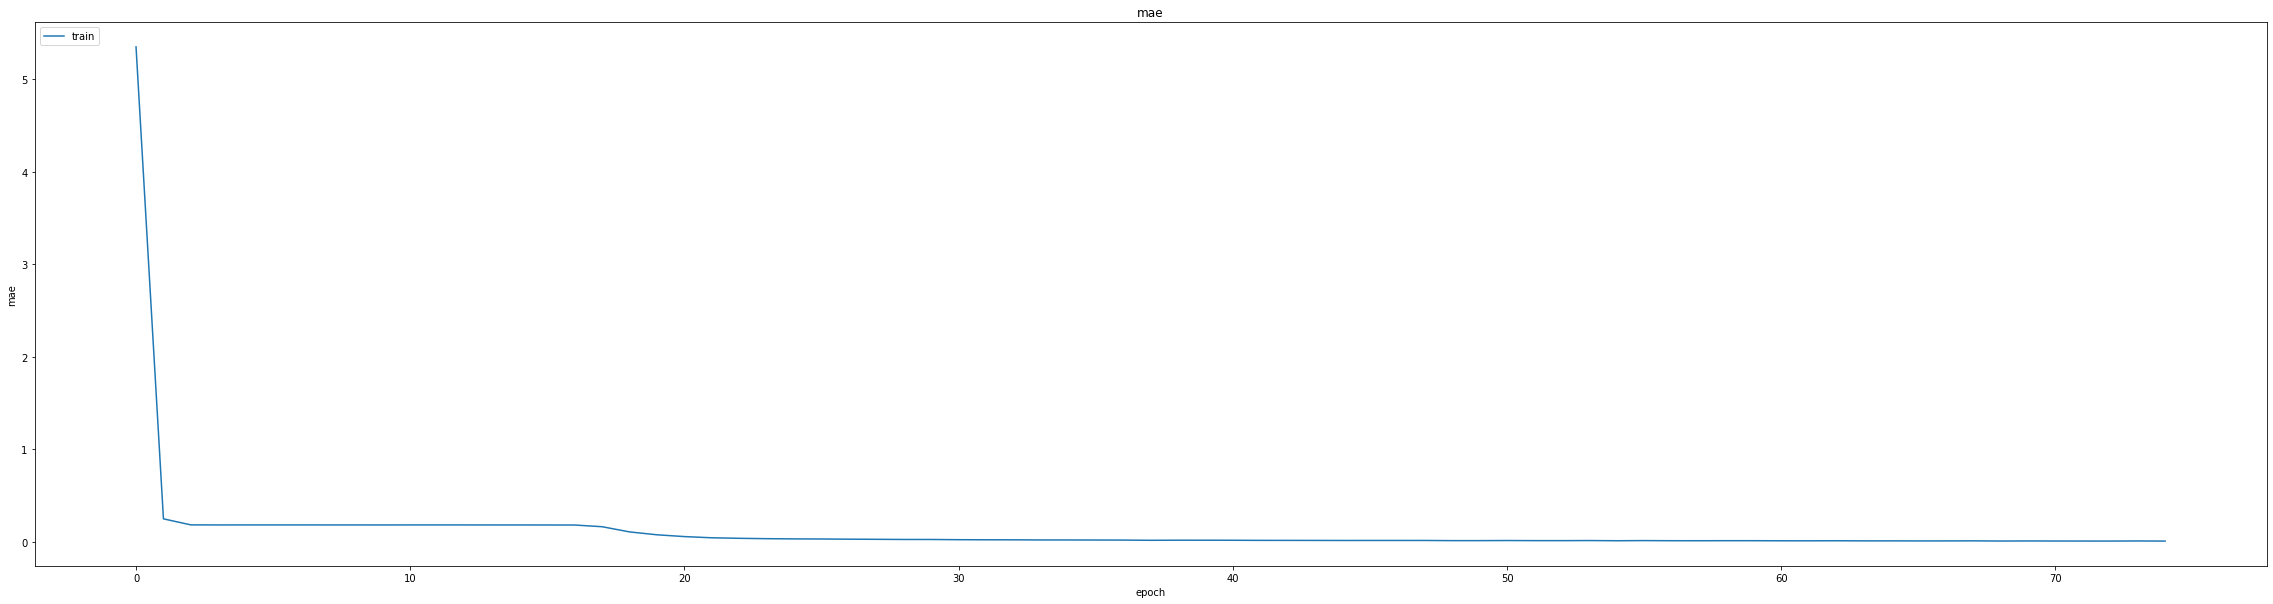

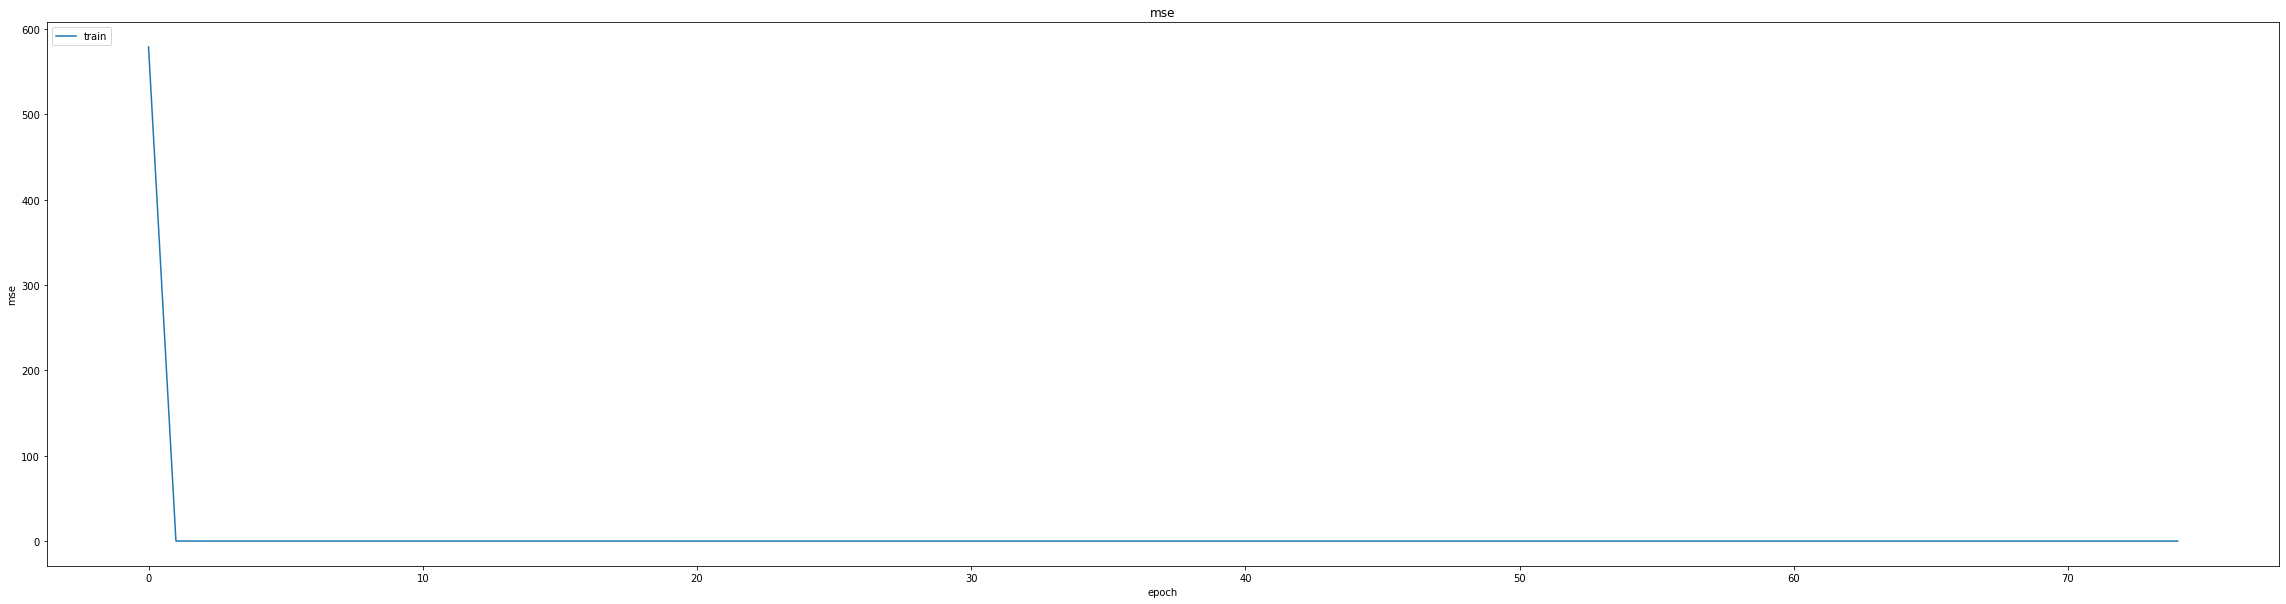

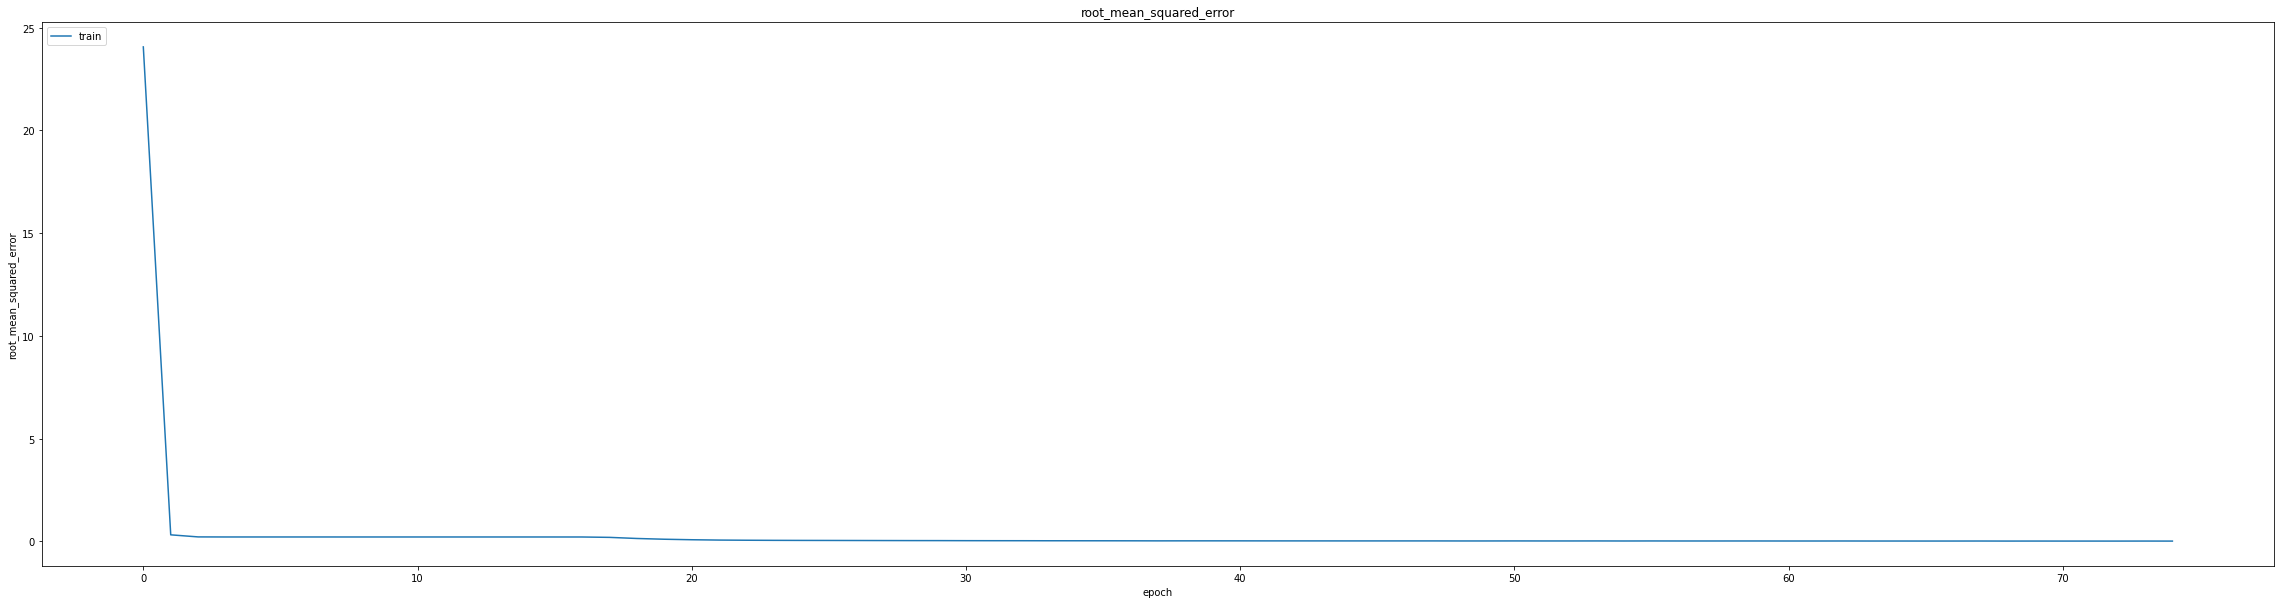

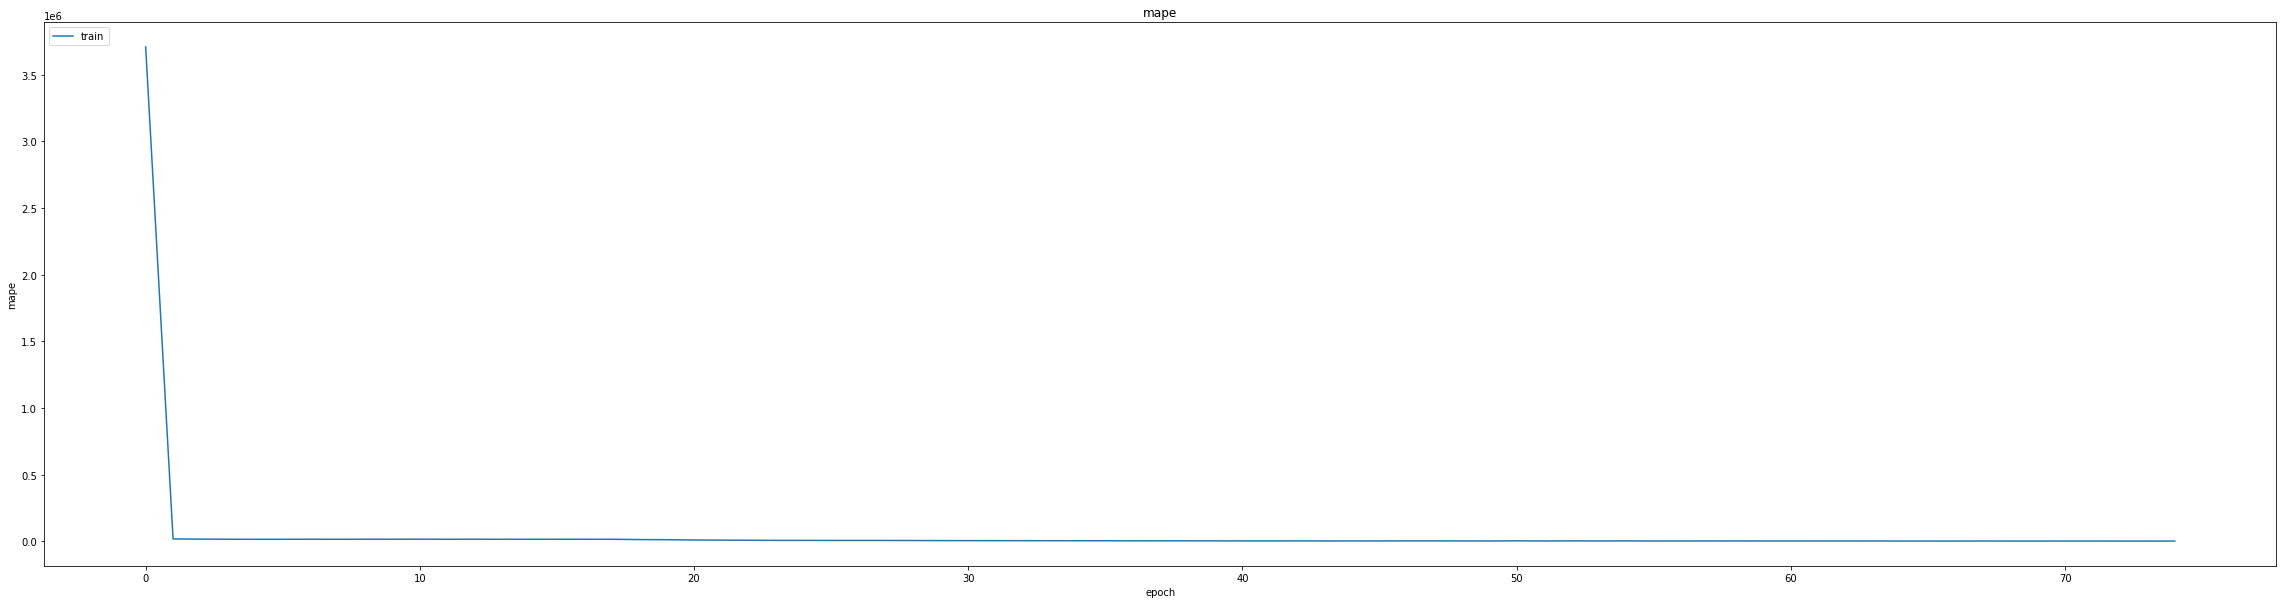

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006701919250190258
0.00949188880622387
464/464 [==============================] - 3s 4ms/step
0.9982885124178467


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 5.0888e-04 - mae: 0.0112 - mse: 5.0888e-04 - root_mean_squared_error: 0.0226 - mape: 1318.3501
Epoch 1: val_mse did not improve from 0.00009
348/348 [==============================] - 9s 14ms/step - loss: 5.0775e-04 - mae: 0.0112 - mse: 5.0775e-04 - root_mean_squared_error: 0.0225 - mape: 1315.0077 - val_loss: 1.6528e-04 - val_mae: 0.0115 - val_mse: 1.6528e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 3377.1980 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 6.1551e-05 - mae: 0.0061 - mse: 6.1551e-05 - root_mean_squared_error: 0.0078 - mape: 1076.9047
Epoch 2: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 11ms/step - loss: 6.1575e-05 - mae: 0.0061 - mse: 6.1575e-05 - root_mean_squared_error: 0.0078 - mape: 1064.9028 - val_loss: 2.0296e-04 - val_mae: 0.0130 - val_mse: 2.0296e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 3394.4966 -

348/348 [==============================] - 15s 44ms/step - loss: 6.7384e-05 - mae: 0.0063 - mse: 6.7384e-05 - root_mean_squared_error: 0.0082 - mape: 983.3292 - val_loss: 6.5822e-05 - val_mae: 0.0063 - val_mse: 6.5822e-05 - val_root_mean_squared_error: 0.0081 - val_mape: 2773.7966 - lr: 8.1000e-04
Epoch 6/25
344/348 [============================>.] - ETA: 0s - loss: 6.8512e-05 - mae: 0.0064 - mse: 6.8512e-05 - root_mean_squared_error: 0.0083 - mape: 1211.8051
Epoch 6: val_mse did not improve from 0.00007
348/348 [==============================] - 4s 11ms/step - loss: 6.8186e-05 - mae: 0.0064 - mse: 6.8186e-05 - root_mean_squared_error: 0.0083 - mape: 1198.2900 - val_loss: 2.0467e-04 - val_mae: 0.0130 - val_mse: 2.0467e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 2507.4624 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
348/348 [==============================] - ETA: 0s - loss: 6.2918e-05 - mae: 0.0061 - mse: 6.2918e-05 - root_mean_squared_error: 0.0079 - mape: 

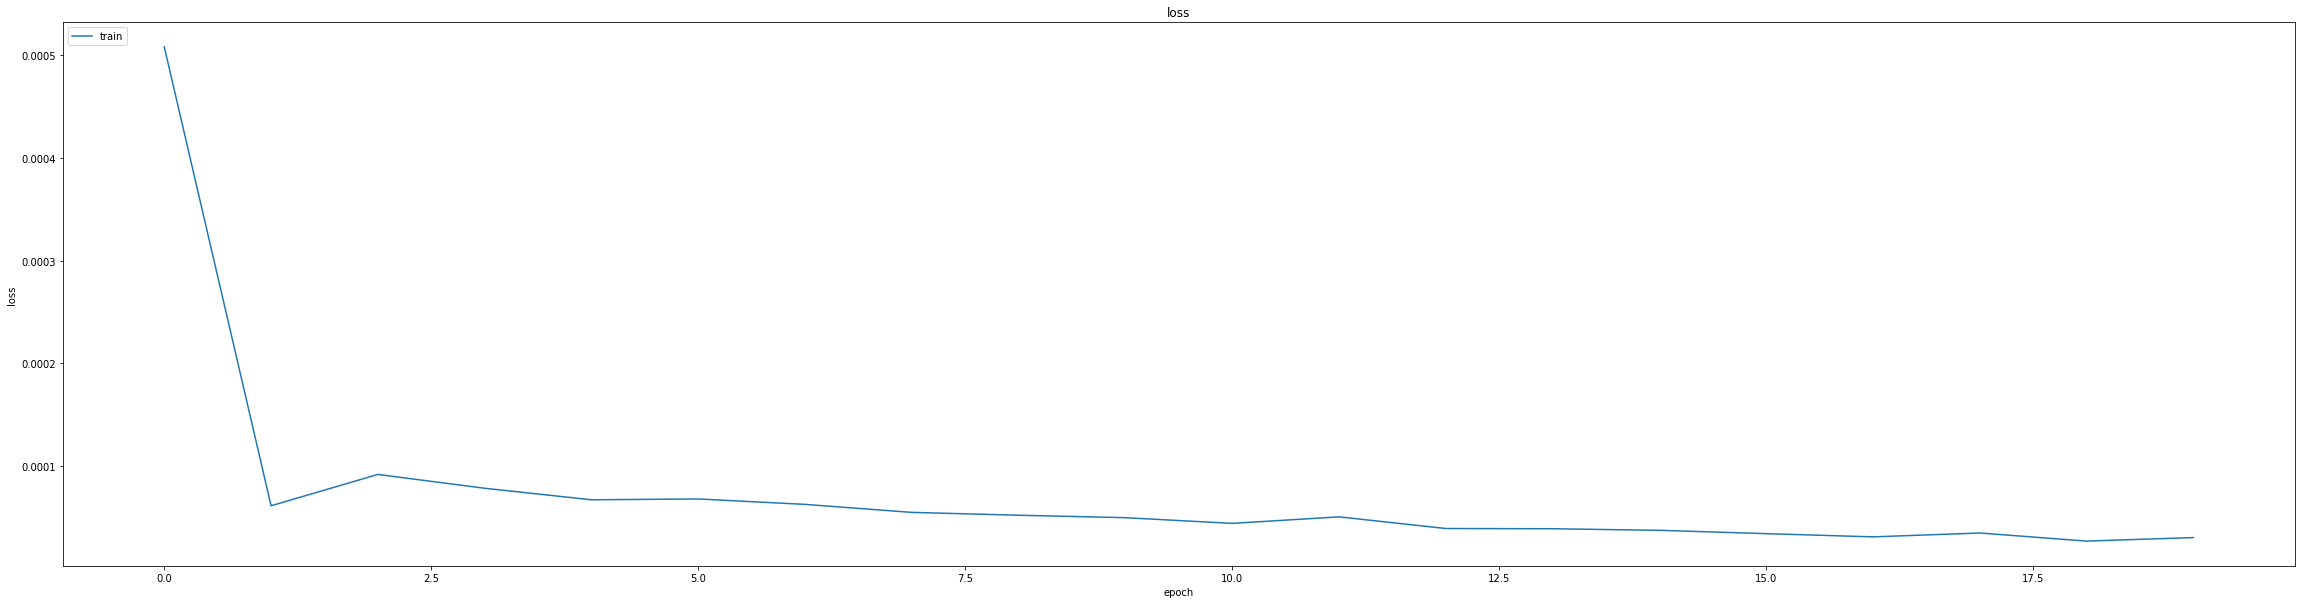

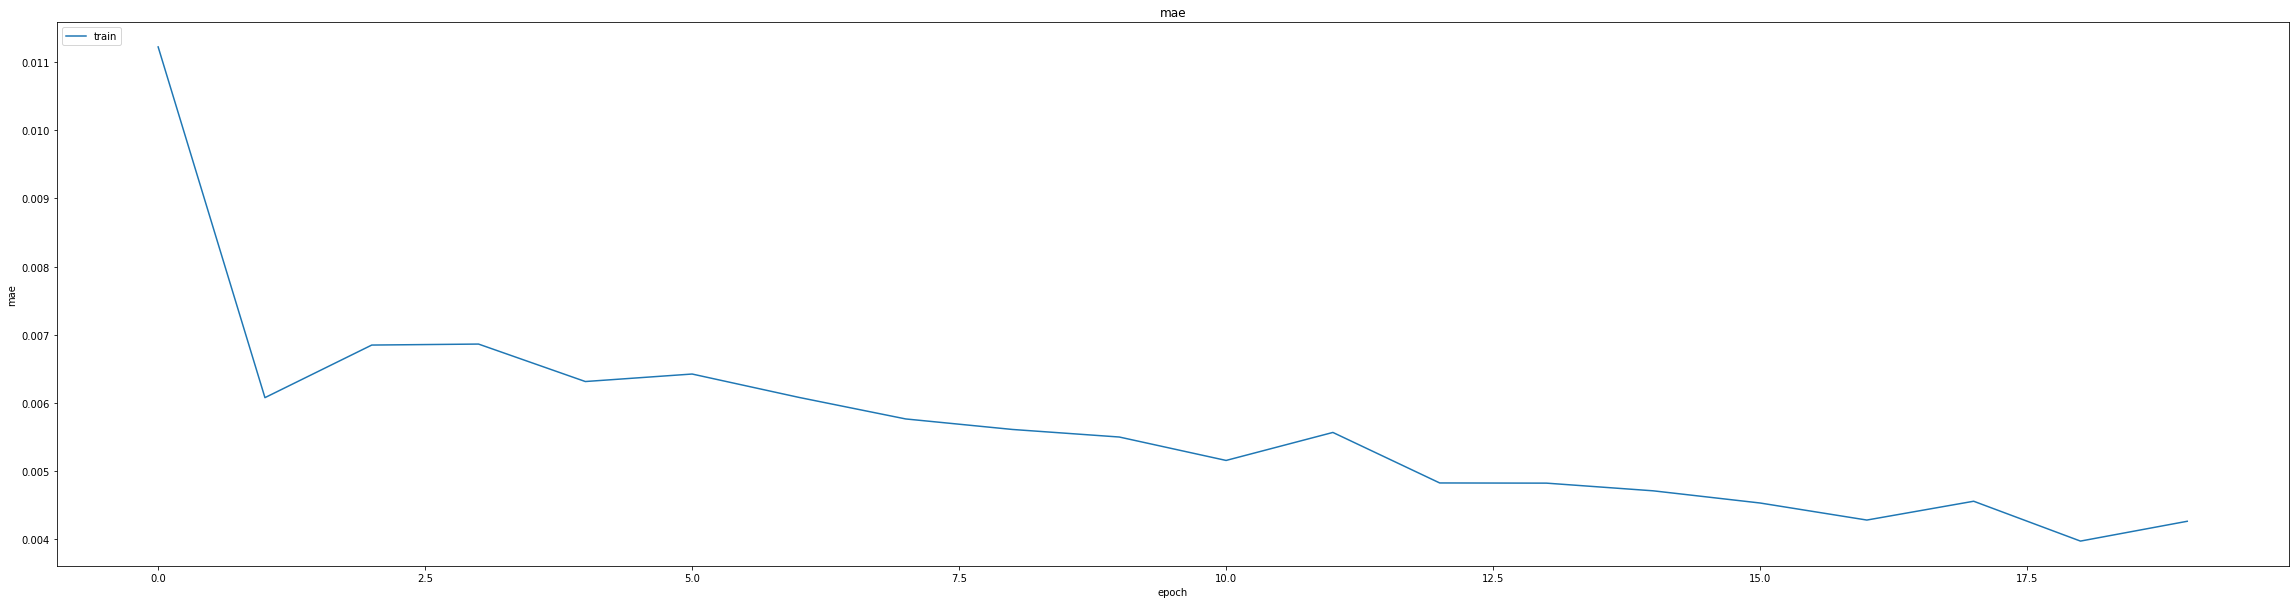

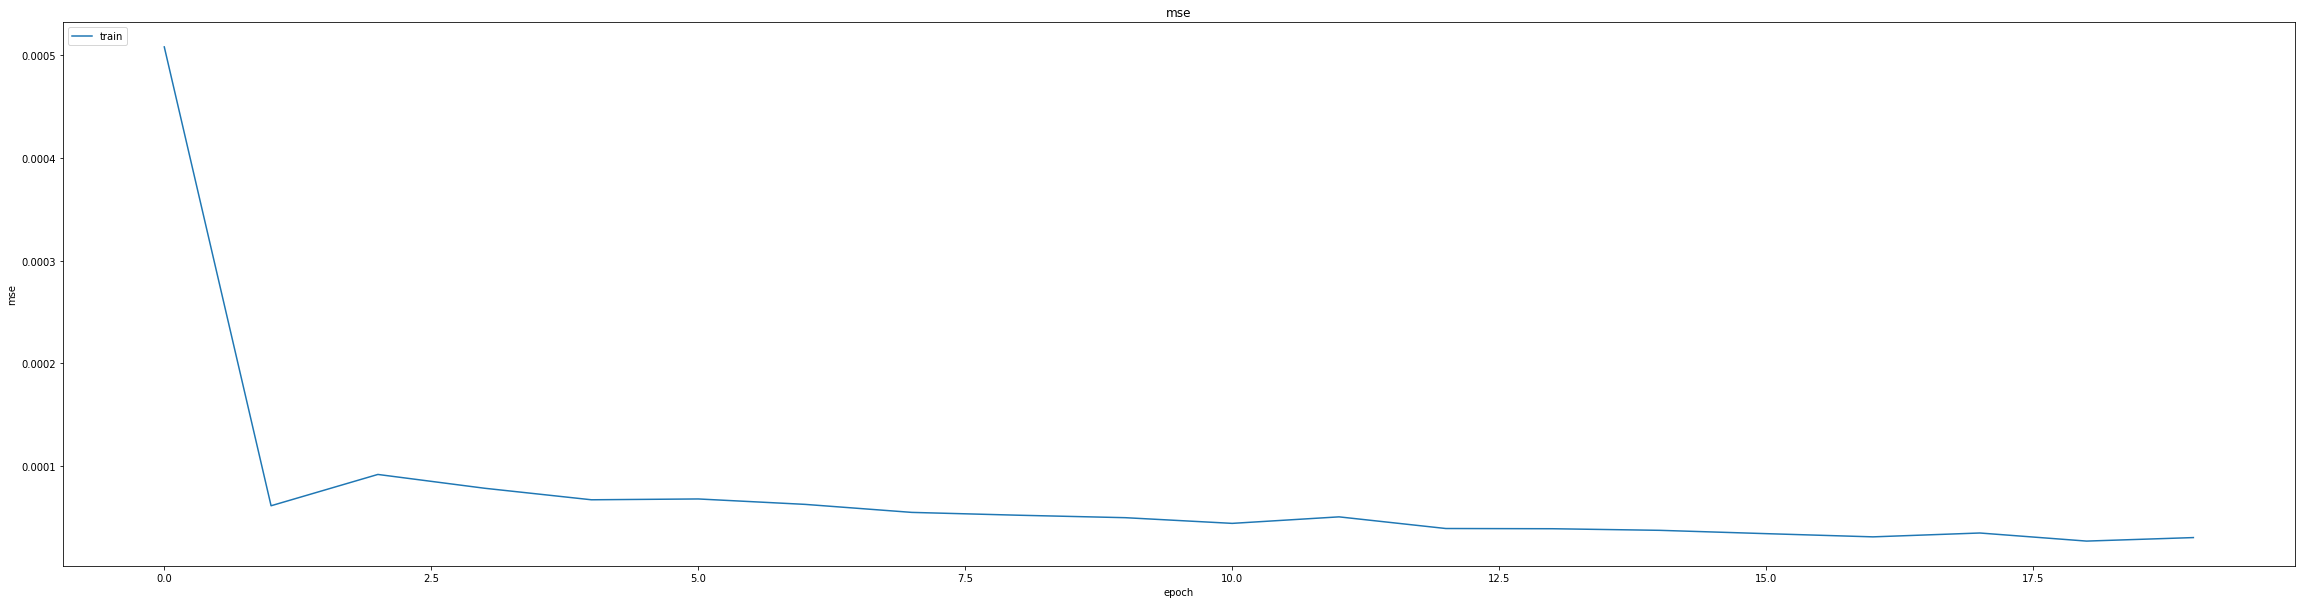

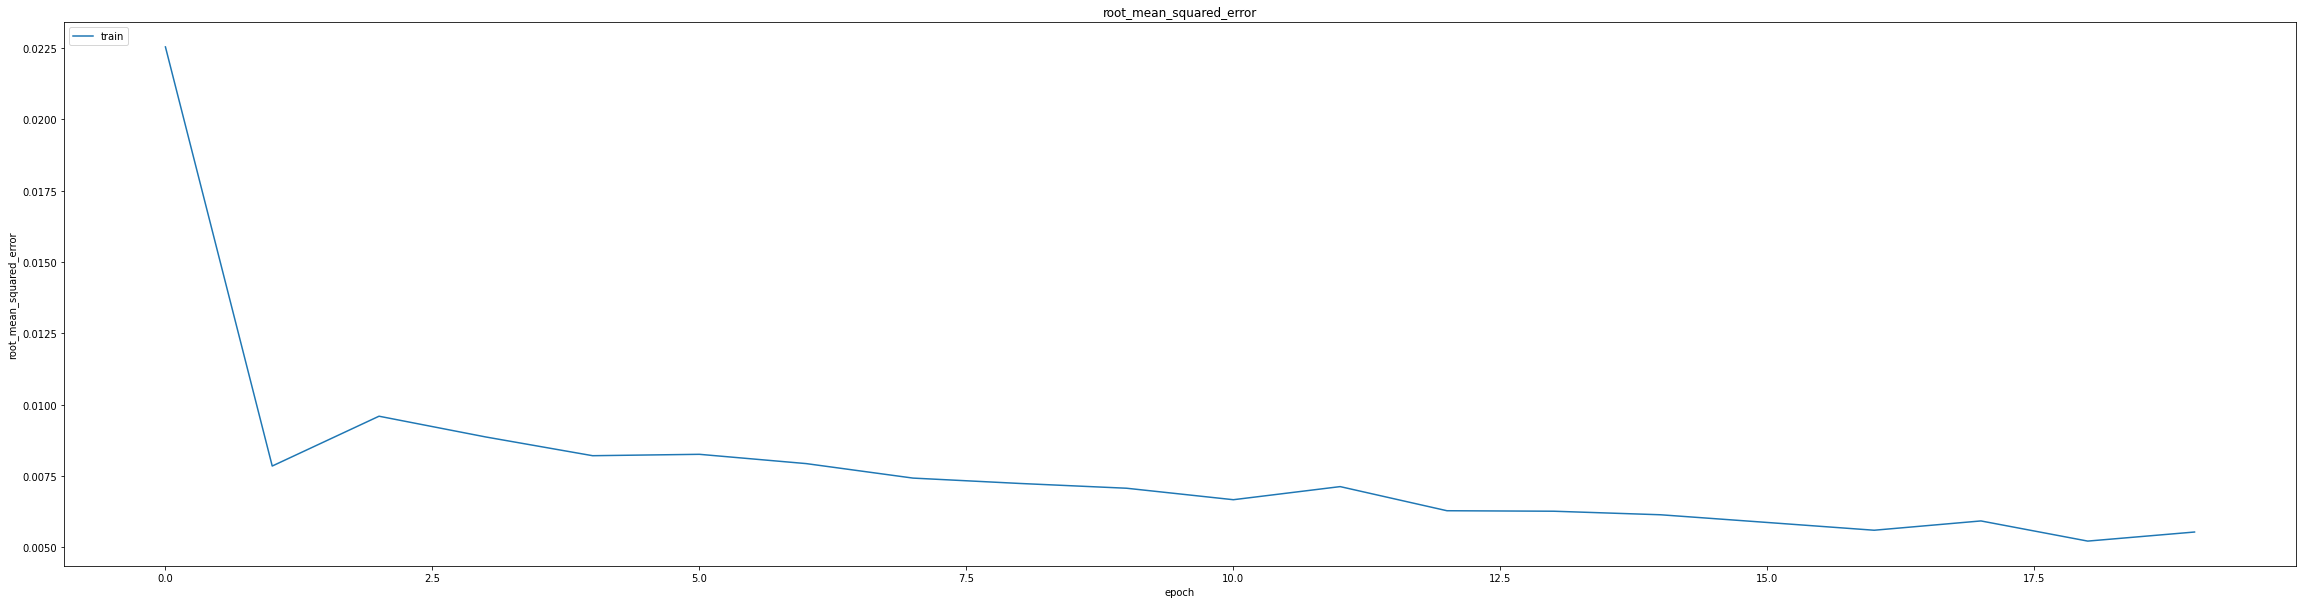

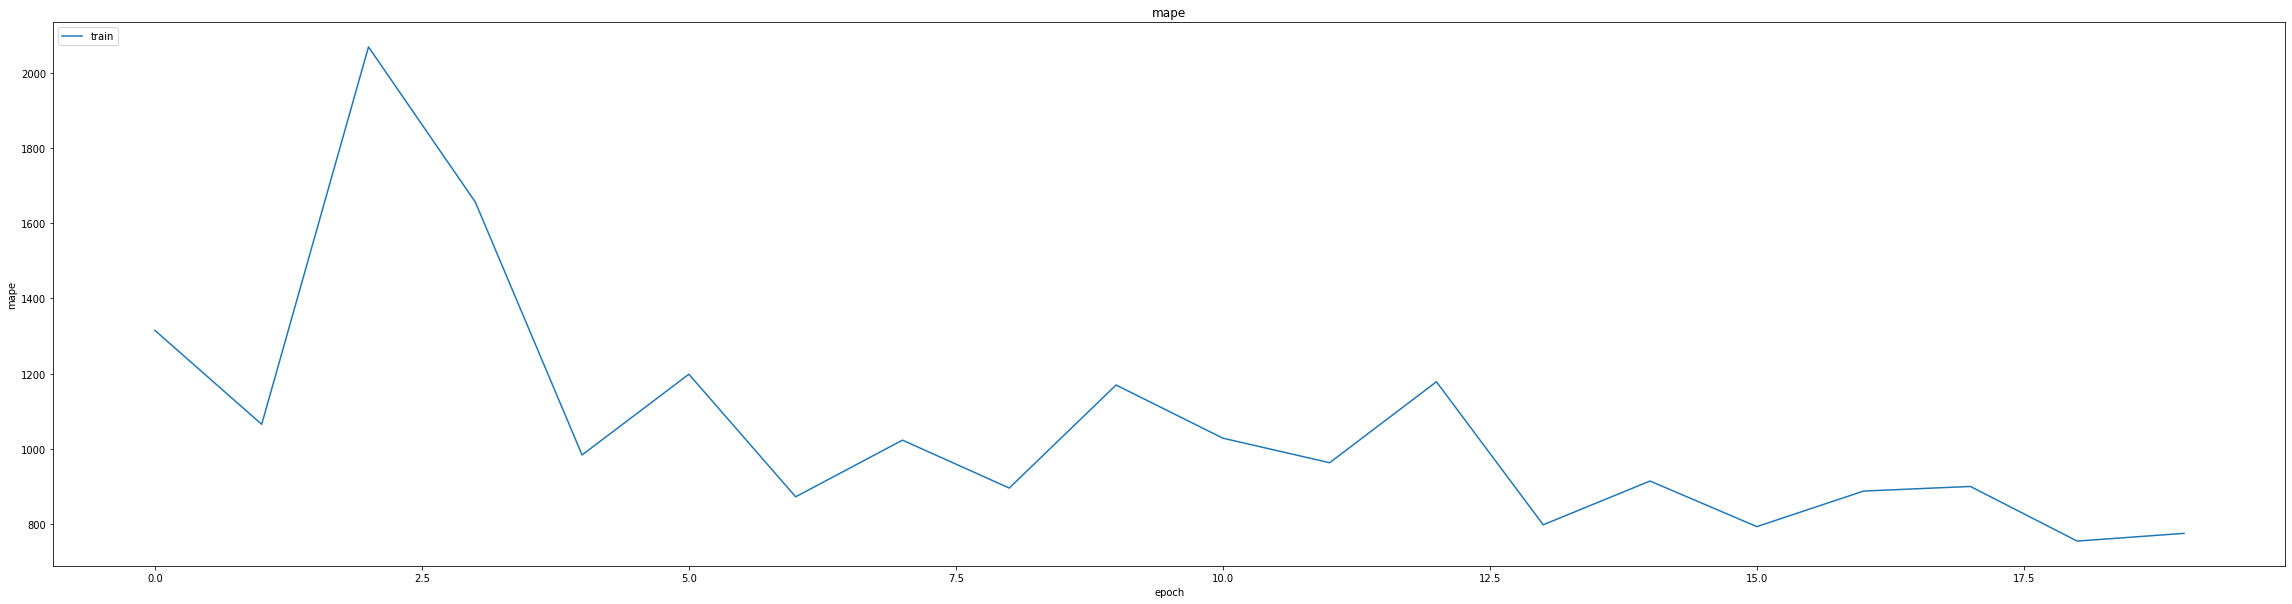

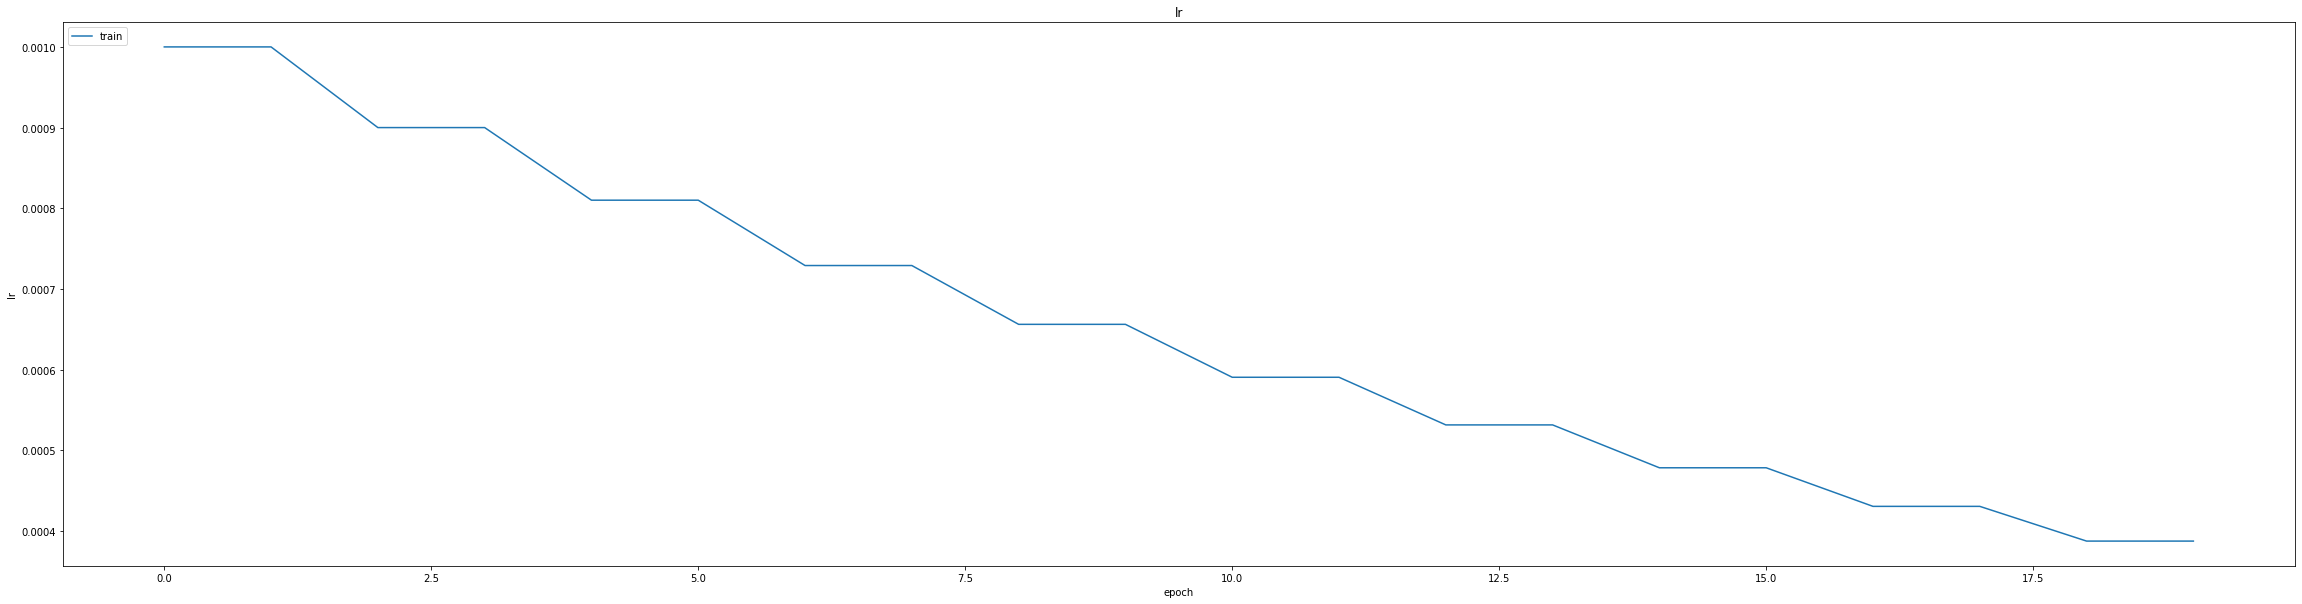

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006003649905323982
0.008113059215247631
464/464 [==============================] - 3s 4ms/step
0.9956284328622569


464/464 [==============================] - 2s 4ms/step


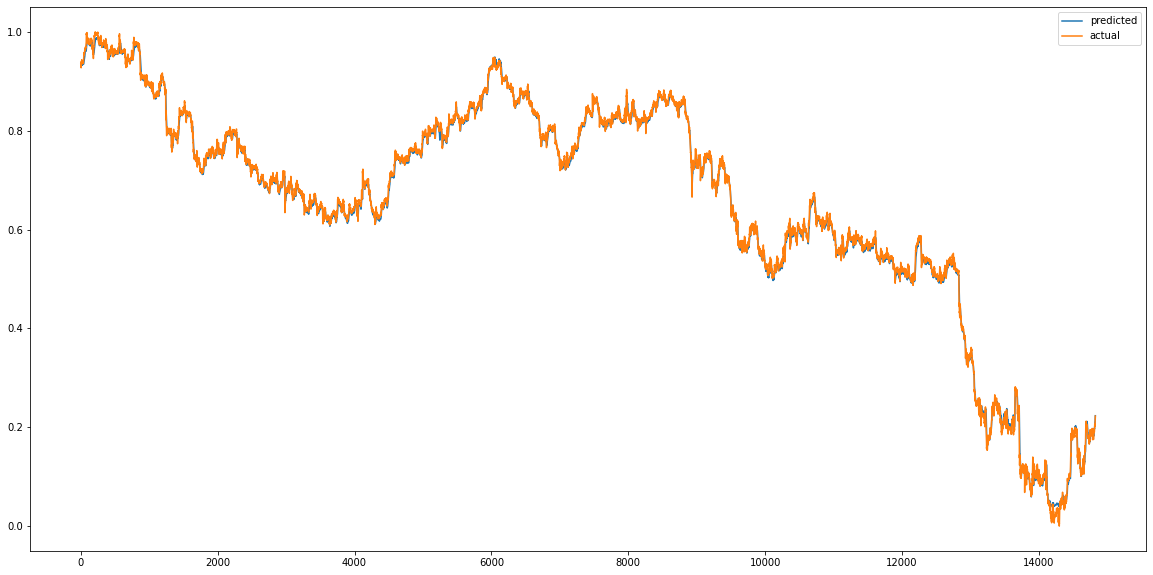

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


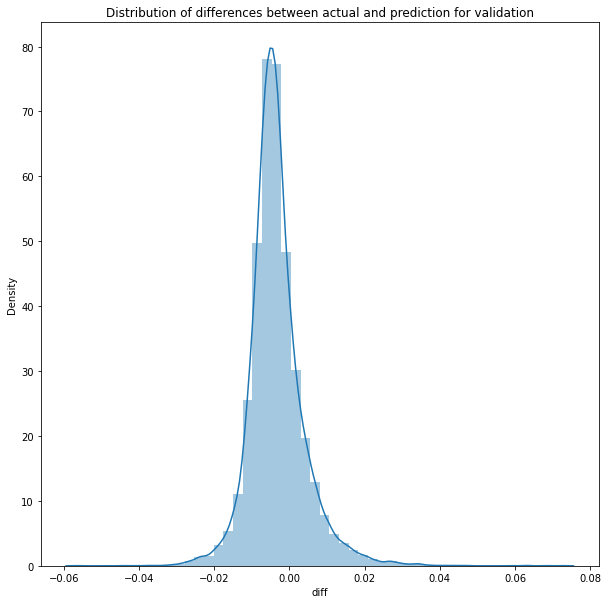

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


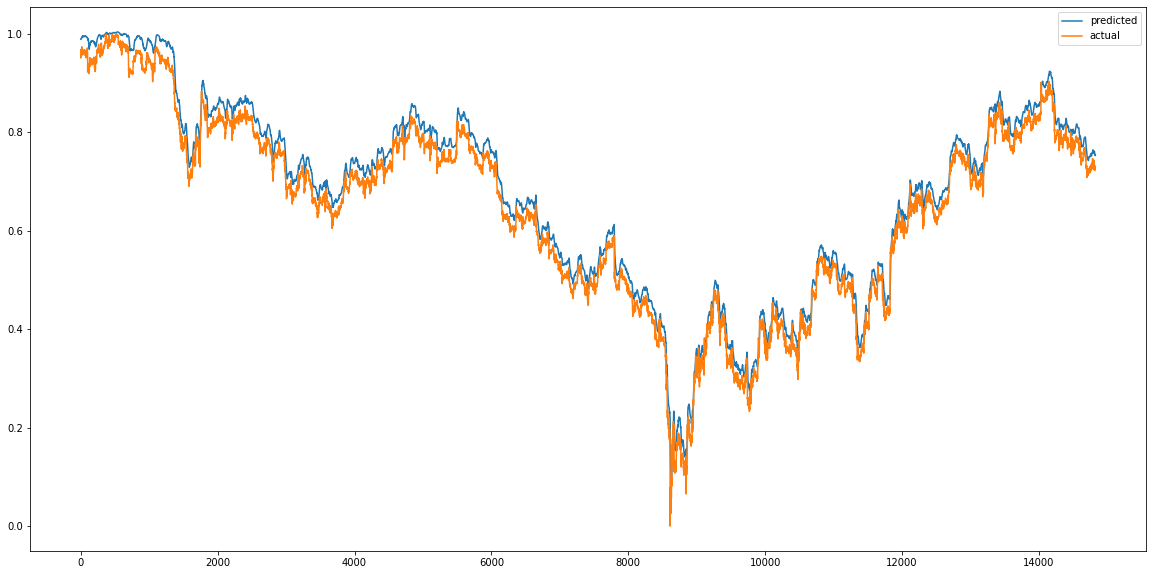

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


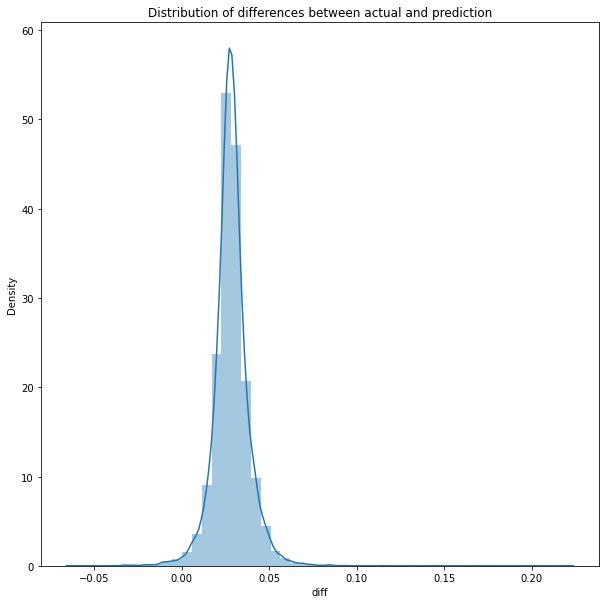

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0009072731746368372
RMSE :  0.03012097565878033
MAE :  0.02855701370394269
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9763757531607177


count    14827.000000
mean         0.028364
std          0.010138
min         -0.061440
25%          0.023550
50%          0.028079
75%          0.032972
max          0.219324
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 374.4124 - mae: 2.9981 - mse: 374.4124 - root_mean_squared_error: 19.3497 - mape: 8527.1162
Epoch 1: val_mse improved from inf to 0.14224, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 37s 81ms/step - loss: 373.4626 - mae: 2.9913 - mse: 373.4626 - root_mean_squared_error: 19.3252 - mape: 8505.5947 - val_loss: 0.1422 - val_mae: 0.3495 - val_mse: 0.1422 - val_root_mean_squared_error: 0.3772 - val_mape: 26306.2871
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0812 - mae: 0.2403 - mse: 0.0812 - root_mean_squared_error: 0.2850 - mape: 11505.4346
Epoch 2: val_mse improved from 0.14224 to 0.06339, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 0.0811 - mae: 0.2401 - mse: 0.0811 - root_mean_squared_error: 0.2848 - mape: 11443.4229 - val_loss: 0.0634 - val_mae: 0.2063 - val_mse: 0.0634 - val_root_mean_squared_error: 0.2518 - val_mape: 41508.5156
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0494 - mae: 0.1917 - mse: 0.0494 - root_mean_squared_error: 0.2222 - mape: 14591.9844
Epoch 3: val_mse improved from 0.06339 to 0.05582, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0494 - mae: 0.1917 - mse: 0.0494 - root_mean_squared_error: 0.2222 - mape: 14513.2578 - val_loss: 0.0558 - val_mae: 0.1846 - val_mse: 0.0558 - val_root_mean_squared_error: 0.2363 - val_mape: 44213.5625
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0453 - mae: 0.1835 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 16283.8447
Epoch 4: val_mse improved from 0.05582 to 0.03903, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0453 - mae: 0.1835 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 16242.6201 - val_loss: 0.0390 - val_mae: 0.1592 - val_mse: 0.0390 - val_root_mean_squared_error: 0.1976 - val_mape: 35124.2188
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0193 - mae: 0.1146 - mse: 0.0193 - root_mean_squared_error: 0.1390 - mape: 8348.1738
Epoch 5: val_mse improved from 0.03903 to 0.01308, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0193 - mae: 0.1145 - mse: 0.0193 - root_mean_squared_error: 0.1389 - mape: 8327.0439 - val_loss: 0.0131 - val_mae: 0.0860 - val_mse: 0.0131 - val_root_mean_squared_error: 0.1144 - val_mape: 25189.3984
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0556 - mse: 0.0053 - root_mean_squared_error: 0.0731 - mape: 8126.1558
Epoch 6: val_mse improved from 0.01308 to 0.00825, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0053 - mae: 0.0556 - mse: 0.0053 - root_mean_squared_error: 0.0731 - mape: 8126.1558 - val_loss: 0.0082 - val_mae: 0.0736 - val_mse: 0.0082 - val_root_mean_squared_error: 0.0908 - val_mape: 21260.9141
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0412 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 6379.9800
Epoch 7: val_mse improved from 0.00825 to 0.00708, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0031 - mae: 0.0412 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 6363.8052 - val_loss: 0.0071 - val_mae: 0.0737 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0842 - val_mape: 18843.7695
Epoch 8/75
347/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0369 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 5979.9180
Epoch 8: val_mse improved from 0.00708 to 0.00651, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 0.0025 - mae: 0.0368 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 5964.7764 - val_loss: 0.0065 - val_mae: 0.0722 - val_mse: 0.0065 - val_root_mean_squared_error: 0.0807 - val_mape: 17606.9551
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0349 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 6113.0723
Epoch 9: val_mse did not improve from 0.00651
348/348 [==============================] - 5s 15ms/step - loss: 0.0022 - mae: 0.0349 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 6113.0723 - val_loss: 0.0067 - val_mae: 0.0747 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0816 - val_mape: 16748.0605
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0335 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 5482.8252
Epoch 10: val_mse improved from 0.00651 to 0.00578, saving model to /content/drive/MyDrive/modelweights/

348/348 [==============================] - 27s 77ms/step - loss: 0.0020 - mae: 0.0335 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 5437.4761 - val_loss: 0.0058 - val_mae: 0.0694 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0760 - val_mape: 16029.0312
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0319 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 5125.7544
Epoch 11: val_mse improved from 0.00578 to 0.00419, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0018 - mae: 0.0319 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 5112.7593 - val_loss: 0.0042 - val_mae: 0.0573 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0647 - val_mape: 15255.0527
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0299 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 4988.7402
Epoch 12: val_mse improved from 0.00419 to 0.00393, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0016 - mae: 0.0299 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 4961.7915 - val_loss: 0.0039 - val_mae: 0.0561 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 14491.7158
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 5327.0347
Epoch 13: val_mse improved from 0.00393 to 0.00341, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 5313.5283 - val_loss: 0.0034 - val_mae: 0.0522 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0584 - val_mape: 13795.8818
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0263 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 4446.9932
Epoch 14: val_mse improved from 0.00341 to 0.00299, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 26s 76ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 4410.1782 - val_loss: 0.0030 - val_mae: 0.0489 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0547 - val_mape: 13135.6582
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 4660.0146
Epoch 15: val_mse did not improve from 0.00299
348/348 [==============================] - 6s 18ms/step - loss: 0.0010 - mae: 0.0243 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 4648.2002 - val_loss: 0.0033 - val_mae: 0.0525 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 12467.1875
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 9.1223e-04 - mae: 0.0228 - mse: 9.1223e-04 - root_mean_squared_error: 0.0302 - mape: 4007.7771
Epoch 16: val_mse improved from 0.00299 to 0.00236, saving model to /content/drive/MyDrive/mod

348/348 [==============================] - 27s 78ms/step - loss: 9.1245e-04 - mae: 0.0228 - mse: 9.1245e-04 - root_mean_squared_error: 0.0302 - mape: 3997.6257 - val_loss: 0.0024 - val_mae: 0.0437 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0486 - val_mape: 11880.6123
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 8.0598e-04 - mae: 0.0214 - mse: 8.0598e-04 - root_mean_squared_error: 0.0284 - mape: 4124.3945
Epoch 17: val_mse improved from 0.00236 to 0.00204, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 76ms/step - loss: 8.0579e-04 - mae: 0.0214 - mse: 8.0579e-04 - root_mean_squared_error: 0.0284 - mape: 4113.9370 - val_loss: 0.0020 - val_mae: 0.0404 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 11319.8320
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 7.0247e-04 - mae: 0.0201 - mse: 7.0247e-04 - root_mean_squared_error: 0.0265 - mape: 3929.3525
Epoch 18: val_mse improved from 0.00204 to 0.00174, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 7.0361e-04 - mae: 0.0201 - mse: 7.0361e-04 - root_mean_squared_error: 0.0265 - mape: 3896.8618 - val_loss: 0.0017 - val_mae: 0.0372 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 10800.8076
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 6.2373e-04 - mae: 0.0190 - mse: 6.2373e-04 - root_mean_squared_error: 0.0250 - mape: 3685.4670
Epoch 19: val_mse did not improve from 0.00174
348/348 [==============================] - 5s 15ms/step - loss: 6.2373e-04 - mae: 0.0190 - mse: 6.2373e-04 - root_mean_squared_error: 0.0250 - mape: 3685.4670 - val_loss: 0.0018 - val_mae: 0.0389 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0427 - val_mape: 10290.8184
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 5.5623e-04 - mae: 0.0179 - mse: 5.5623e-04 - root_mean_squared_error: 0.0236 - mape: 4020.0315
Epoch 20: val_mse improved from 0.00174 to 0.00162, saving model to /c

348/348 [==============================] - 27s 77ms/step - loss: 5.5623e-04 - mae: 0.0179 - mse: 5.5623e-04 - root_mean_squared_error: 0.0236 - mape: 4020.0315 - val_loss: 0.0016 - val_mae: 0.0368 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0403 - val_mape: 9834.2969
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 4.8906e-04 - mae: 0.0169 - mse: 4.8906e-04 - root_mean_squared_error: 0.0221 - mape: 3489.8064
Epoch 21: val_mse did not improve from 0.00162
348/348 [==============================] - 5s 15ms/step - loss: 4.8906e-04 - mae: 0.0169 - mse: 4.8906e-04 - root_mean_squared_error: 0.0221 - mape: 3489.8064 - val_loss: 0.0017 - val_mae: 0.0378 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 9415.1455
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 4.4115e-04 - mae: 0.0160 - mse: 4.4115e-04 - root_mean_squared_error: 0.0210 - mape: 3240.6213
Epoch 22: val_mse improved from 0.00162 to 0.00134, saving model to /con

348/348 [==============================] - 28s 79ms/step - loss: 4.4115e-04 - mae: 0.0160 - mse: 4.4115e-04 - root_mean_squared_error: 0.0210 - mape: 3240.6213 - val_loss: 0.0013 - val_mae: 0.0339 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mape: 9015.5273
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 3.9403e-04 - mae: 0.0151 - mse: 3.9403e-04 - root_mean_squared_error: 0.0199 - mape: 3136.1008
Epoch 23: val_mse did not improve from 0.00134
348/348 [==============================] - 5s 15ms/step - loss: 3.9390e-04 - mae: 0.0151 - mse: 3.9390e-04 - root_mean_squared_error: 0.0198 - mape: 3119.1426 - val_loss: 0.0015 - val_mae: 0.0361 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 8643.0459
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 3.5165e-04 - mae: 0.0143 - mse: 3.5165e-04 - root_mean_squared_error: 0.0188 - mape: 3093.6047
Epoch 24: val_mse improved from 0.00134 to 0.00107, saving model to /con

348/348 [==============================] - 26s 76ms/step - loss: 3.5167e-04 - mae: 0.0143 - mse: 3.5167e-04 - root_mean_squared_error: 0.0188 - mape: 3085.7615 - val_loss: 0.0011 - val_mae: 0.0301 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 8323.9844
Epoch 25/75
345/348 [============================>.] - ETA: 0s - loss: 3.1251e-04 - mae: 0.0135 - mse: 3.1251e-04 - root_mean_squared_error: 0.0177 - mape: 2901.2441
Epoch 25: val_mse improved from 0.00107 to 0.00096, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 77ms/step - loss: 3.1273e-04 - mae: 0.0135 - mse: 3.1273e-04 - root_mean_squared_error: 0.0177 - mape: 2877.2327 - val_loss: 9.6186e-04 - val_mae: 0.0285 - val_mse: 9.6186e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 7995.6235
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 2.8265e-04 - mae: 0.0129 - mse: 2.8265e-04 - root_mean_squared_error: 0.0168 - mape: 2740.9658
Epoch 26: val_mse did not improve from 0.00096
348/348 [==============================] - 5s 15ms/step - loss: 2.8304e-04 - mae: 0.0129 - mse: 2.8304e-04 - root_mean_squared_error: 0.0168 - mape: 2718.2939 - val_loss: 0.0010 - val_mae: 0.0300 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 7657.9941
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 2.4684e-04 - mae: 0.0120 - mse: 2.4684e-04 - root_mean_squared_error: 0.0157 - mape: 2663.6704
Epoch 27: val_mse improved from 0.00096 to 0.00077, saving model

348/348 [==============================] - 27s 76ms/step - loss: 2.4684e-04 - mae: 0.0120 - mse: 2.4684e-04 - root_mean_squared_error: 0.0157 - mape: 2663.6704 - val_loss: 7.7485e-04 - val_mae: 0.0255 - val_mse: 7.7485e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 7365.7090
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 2.2037e-04 - mae: 0.0114 - mse: 2.2037e-04 - root_mean_squared_error: 0.0148 - mape: 2374.9568
Epoch 28: val_mse improved from 0.00077 to 0.00071, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 2.2037e-04 - mae: 0.0114 - mse: 2.2037e-04 - root_mean_squared_error: 0.0148 - mape: 2374.9568 - val_loss: 7.0678e-04 - val_mae: 0.0243 - val_mse: 7.0678e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 7080.8906
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 1.9906e-04 - mae: 0.0108 - mse: 1.9906e-04 - root_mean_squared_error: 0.0141 - mape: 2461.4912
Epoch 29: val_mse did not improve from 0.00071
348/348 [==============================] - 5s 15ms/step - loss: 1.9949e-04 - mae: 0.0108 - mse: 1.9949e-04 - root_mean_squared_error: 0.0141 - mape: 2441.1433 - val_loss: 8.9119e-04 - val_mae: 0.0279 - val_mse: 8.9119e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 6800.4067
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 1.7630e-04 - mae: 0.0102 - mse: 1.7630e-04 - root_mean_squared_error: 0.0133 - mape: 2393.4307
Epoch 30: val_mse did not improve from 0.00071
348/348 [

348/348 [==============================] - 26s 76ms/step - loss: 1.2616e-04 - mae: 0.0086 - mse: 1.2616e-04 - root_mean_squared_error: 0.0112 - mape: 2010.2540 - val_loss: 6.2147e-04 - val_mae: 0.0232 - val_mse: 6.2147e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 5856.8970
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 1.1336e-04 - mae: 0.0081 - mse: 1.1336e-04 - root_mean_squared_error: 0.0106 - mape: 1958.6344
Epoch 34: val_mse did not improve from 0.00062
348/348 [==============================] - 5s 15ms/step - loss: 1.1336e-04 - mae: 0.0081 - mse: 1.1336e-04 - root_mean_squared_error: 0.0106 - mape: 1942.4208 - val_loss: 6.5923e-04 - val_mae: 0.0241 - val_mse: 6.5923e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 5639.4395
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 1.0429e-04 - mae: 0.0078 - mse: 1.0429e-04 - root_mean_squared_error: 0.0102 - mape: 2037.5746
Epoch 35: val_mse did not improve from 0.00062
348/348 [

348/348 [==============================] - 27s 76ms/step - loss: 7.8557e-05 - mae: 0.0068 - mse: 7.8557e-05 - root_mean_squared_error: 0.0089 - mape: 1805.8191 - val_loss: 4.7483e-04 - val_mae: 0.0205 - val_mse: 4.7483e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 4725.9980
Epoch 40/75
345/348 [============================>.] - ETA: 0s - loss: 7.1534e-05 - mae: 0.0064 - mse: 7.1534e-05 - root_mean_squared_error: 0.0085 - mape: 1734.7817
Epoch 40: val_mse did not improve from 0.00047
348/348 [==============================] - 5s 15ms/step - loss: 7.1488e-05 - mae: 0.0064 - mse: 7.1488e-05 - root_mean_squared_error: 0.0085 - mape: 1720.4171 - val_loss: 7.3815e-04 - val_mae: 0.0258 - val_mse: 7.3815e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 4529.4062
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 6.7080e-05 - mae: 0.0062 - mse: 6.7080e-05 - root_mean_squared_error: 0.0082 - mape: 1668.4310
Epoch 41: val_mse did not improve from 0.00047
348/348 [

348/348 [==============================] - 28s 81ms/step - loss: 5.1827e-05 - mae: 0.0055 - mse: 5.1827e-05 - root_mean_squared_error: 0.0072 - mape: 1414.9767 - val_loss: 2.5826e-04 - val_mae: 0.0147 - val_mse: 2.5826e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 3570.2417
Epoch 50/75
346/348 [============================>.] - ETA: 0s - loss: 5.9702e-05 - mae: 0.0060 - mse: 5.9702e-05 - root_mean_squared_error: 0.0077 - mape: 1360.4227
Epoch 50: val_mse did not improve from 0.00026
348/348 [==============================] - 5s 16ms/step - loss: 5.9680e-05 - mae: 0.0060 - mse: 5.9680e-05 - root_mean_squared_error: 0.0077 - mape: 1353.0660 - val_loss: 0.0011 - val_mae: 0.0314 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 3485.4473
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 6.3761e-05 - mae: 0.0062 - mse: 6.3761e-05 - root_mean_squared_error: 0.0080 - mape: 1205.2712
Epoch 51: val_mse did not improve from 0.00026
348/348 [========

348/348 [==============================] - 27s 77ms/step - loss: 8.1843e-05 - mae: 0.0070 - mse: 8.1843e-05 - root_mean_squared_error: 0.0090 - mape: 817.2424 - val_loss: 2.1073e-04 - val_mae: 0.0131 - val_mse: 2.1073e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 2357.8069
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 7.2146e-05 - mae: 0.0065 - mse: 7.2146e-05 - root_mean_squared_error: 0.0085 - mape: 932.7006
Epoch 75: val_mse did not improve from 0.00021
348/348 [==============================] - 5s 15ms/step - loss: 7.2028e-05 - mae: 0.0065 - mse: 7.2028e-05 - root_mean_squared_error: 0.0085 - mape: 930.3375 - val_loss: 3.9379e-04 - val_mae: 0.0191 - val_mse: 3.9379e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 2211.2590


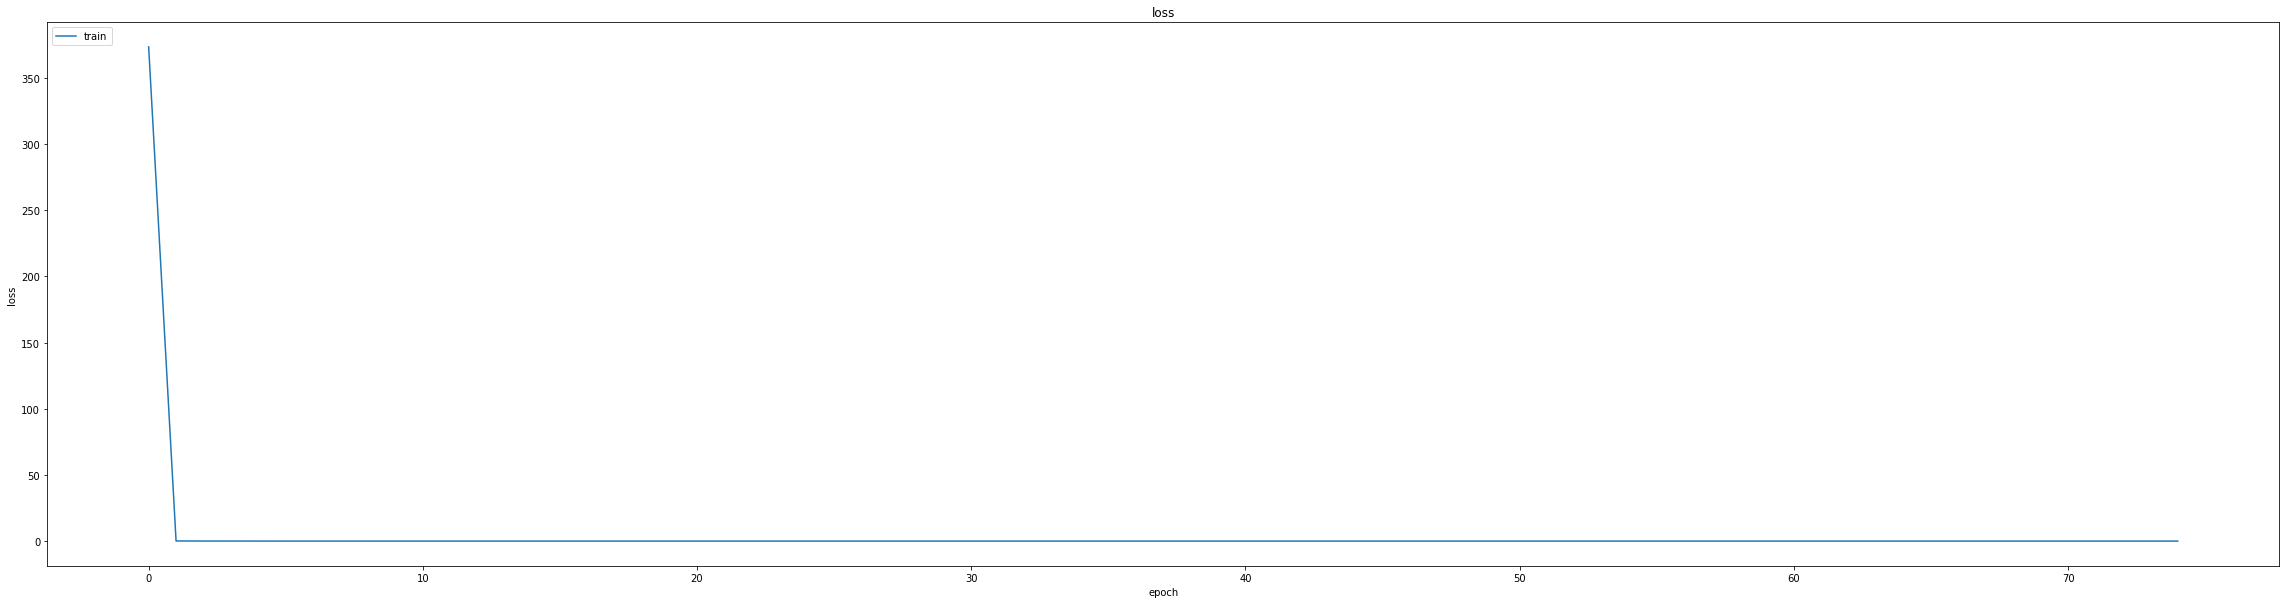

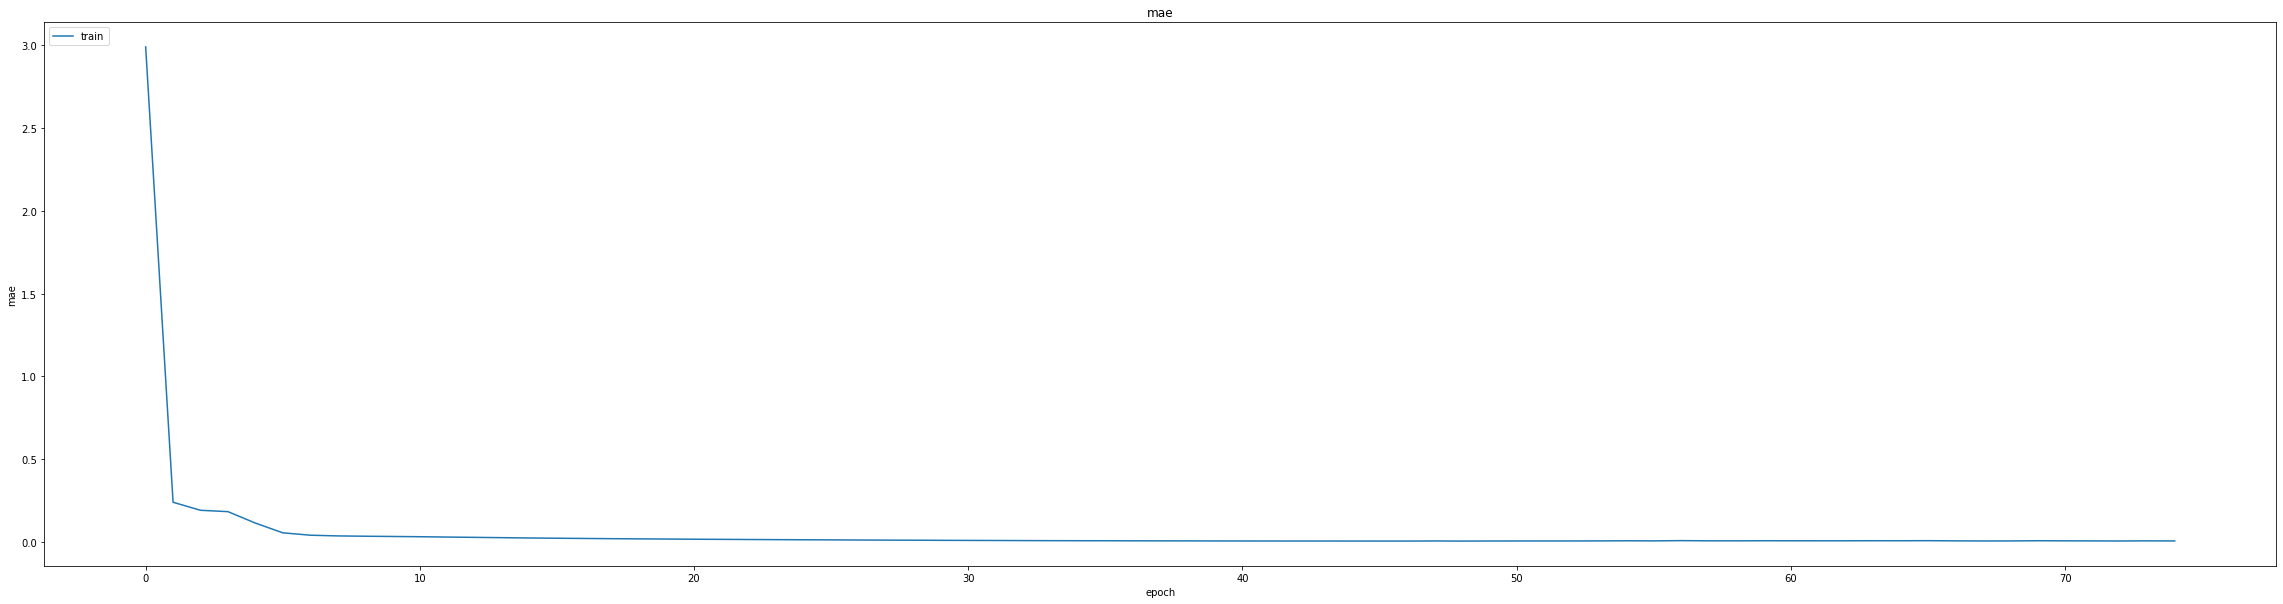

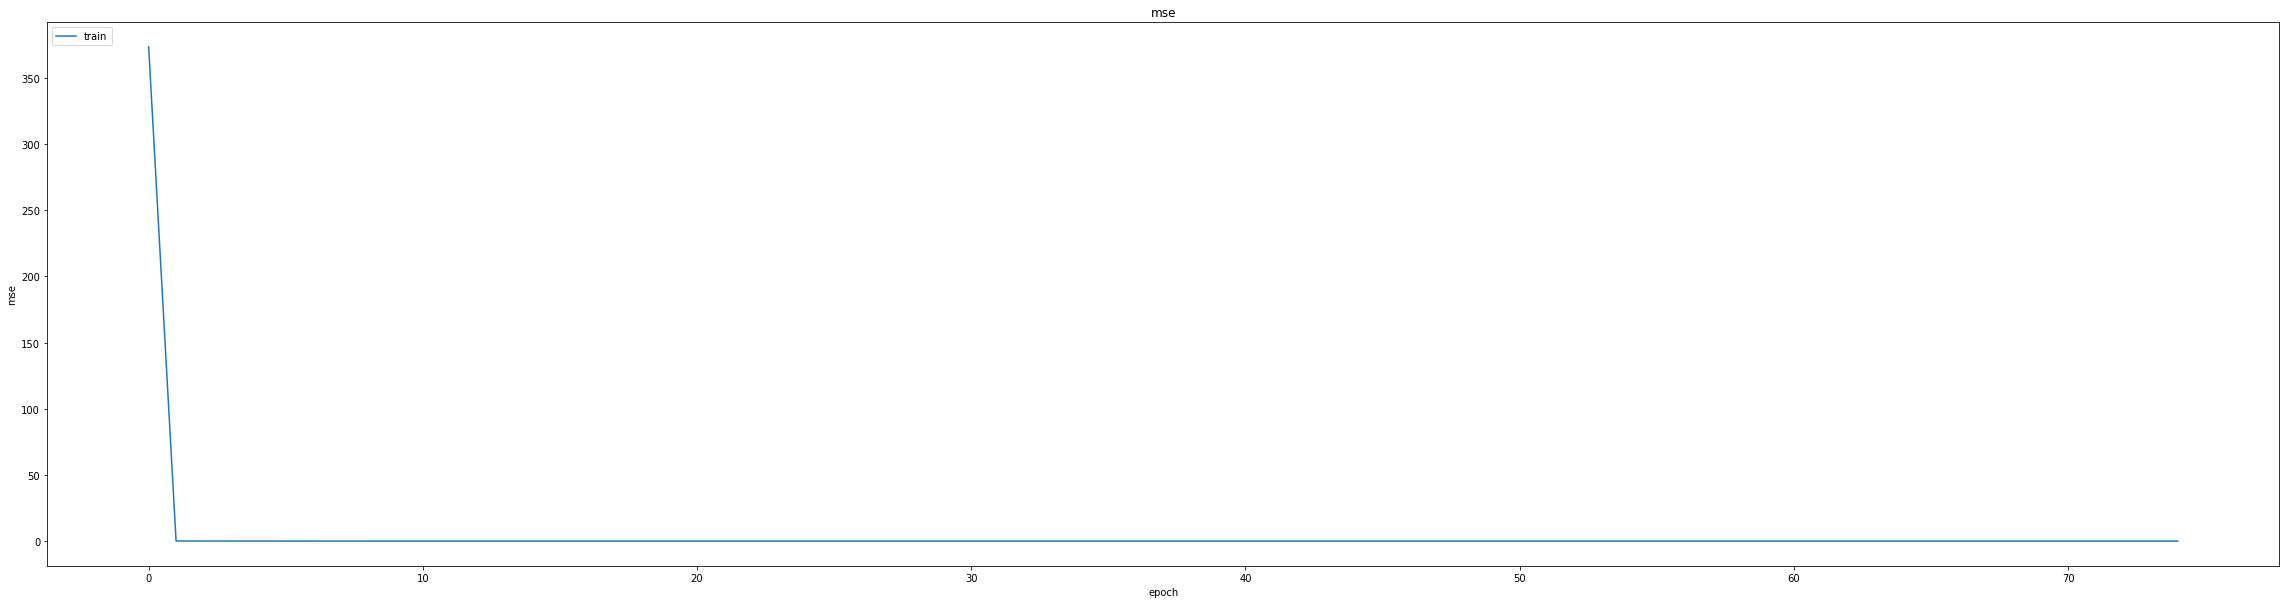

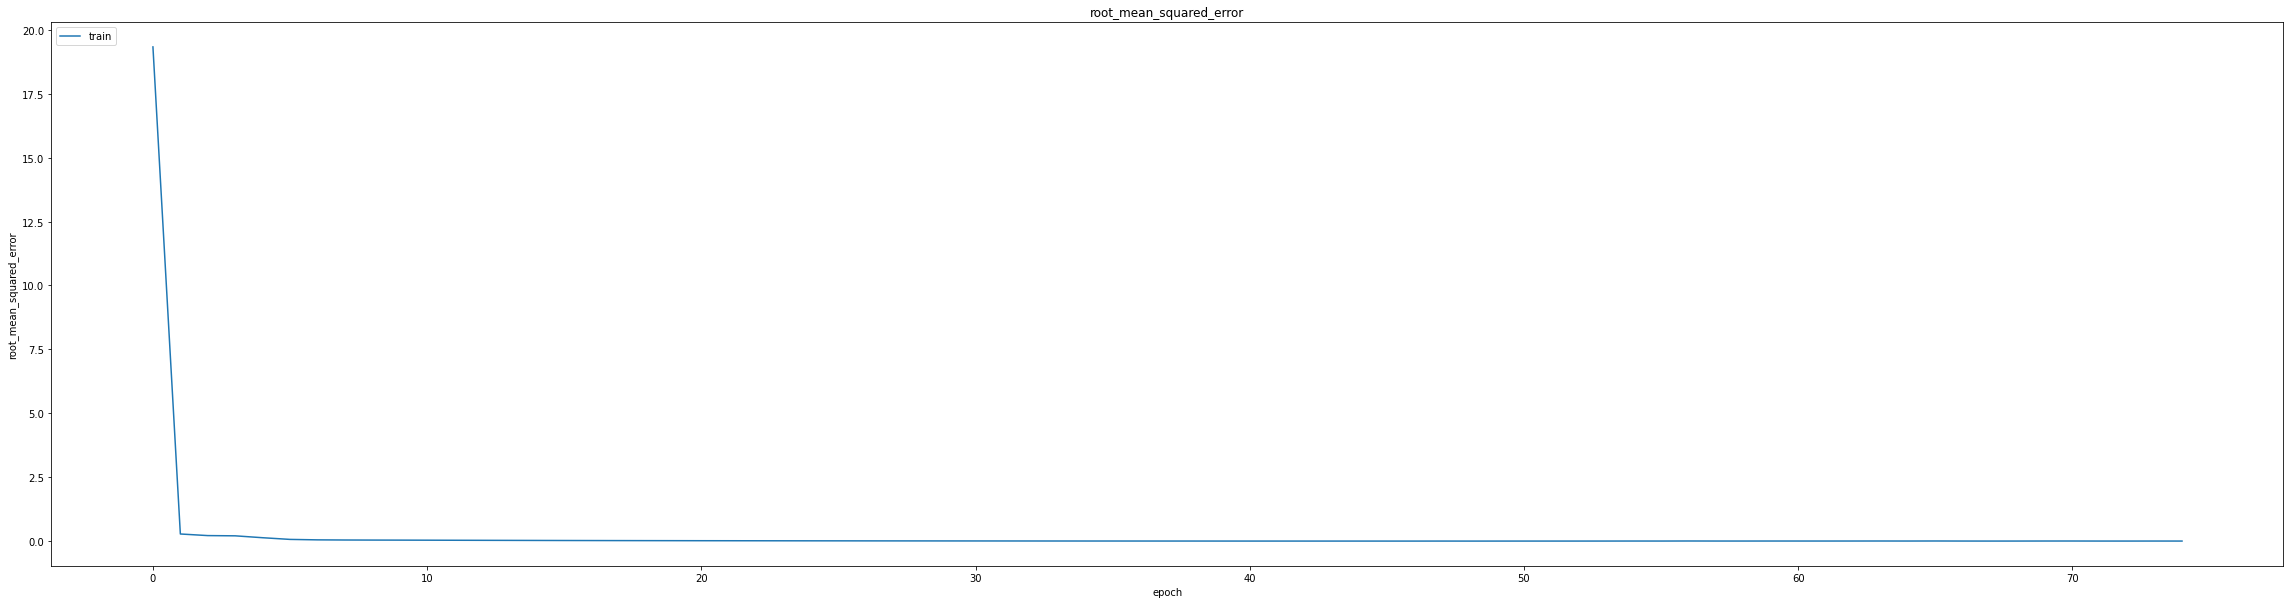

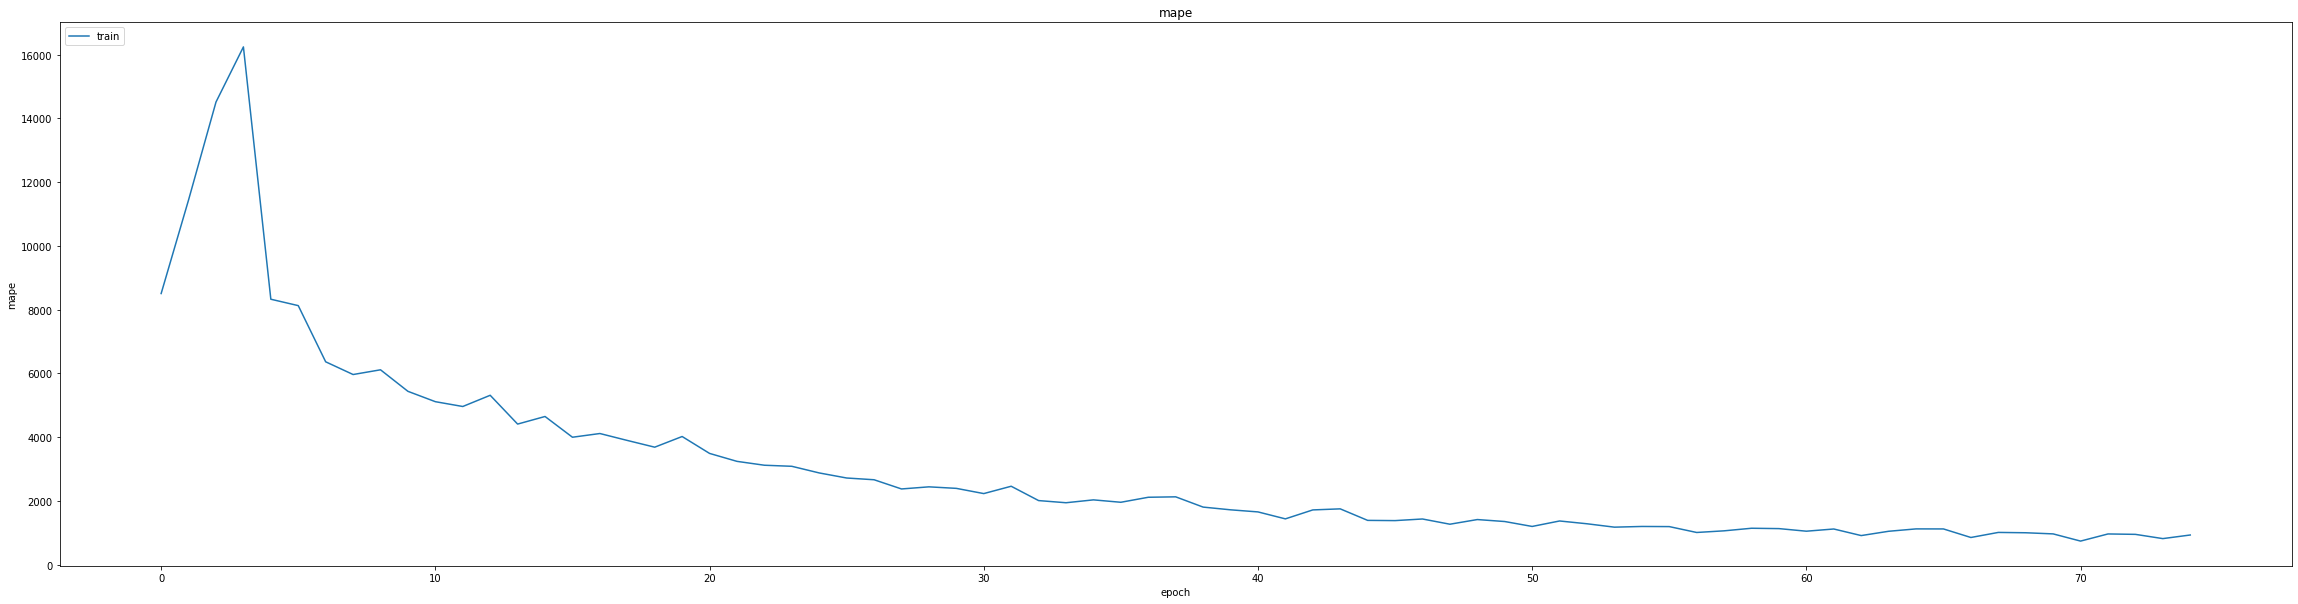

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01305194478482008
0.014516647905111313
464/464 [==============================] - 3s 5ms/step
0.9925193997595246


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 5.7663e-04 - mae: 0.0094 - mse: 5.7663e-04 - root_mean_squared_error: 0.0240 - mape: 766.8646
Epoch 1: val_mse did not improve from 0.00021
348/348 [==============================] - 15s 28ms/step - loss: 5.7363e-04 - mae: 0.0093 - mse: 5.7363e-04 - root_mean_squared_error: 0.0240 - mape: 762.7182 - val_loss: 4.0924e-04 - val_mae: 0.0190 - val_mse: 4.0924e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 2347.3171 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 2.3043e-05 - mae: 0.0036 - mse: 2.3043e-05 - root_mean_squared_error: 0.0048 - mape: 1164.9210
Epoch 2: val_mse did not improve from 0.00021
348/348 [==============================] - 9s 27ms/step - loss: 2.3028e-05 - mae: 0.0036 - mse: 2.3028e-05 - root_mean_squared_error: 0.0048 - mape: 1161.9663 - val_loss: 4.0929e-04 - val_mae: 0.0190 - val_mse: 4.0929e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 2269.0522 - 

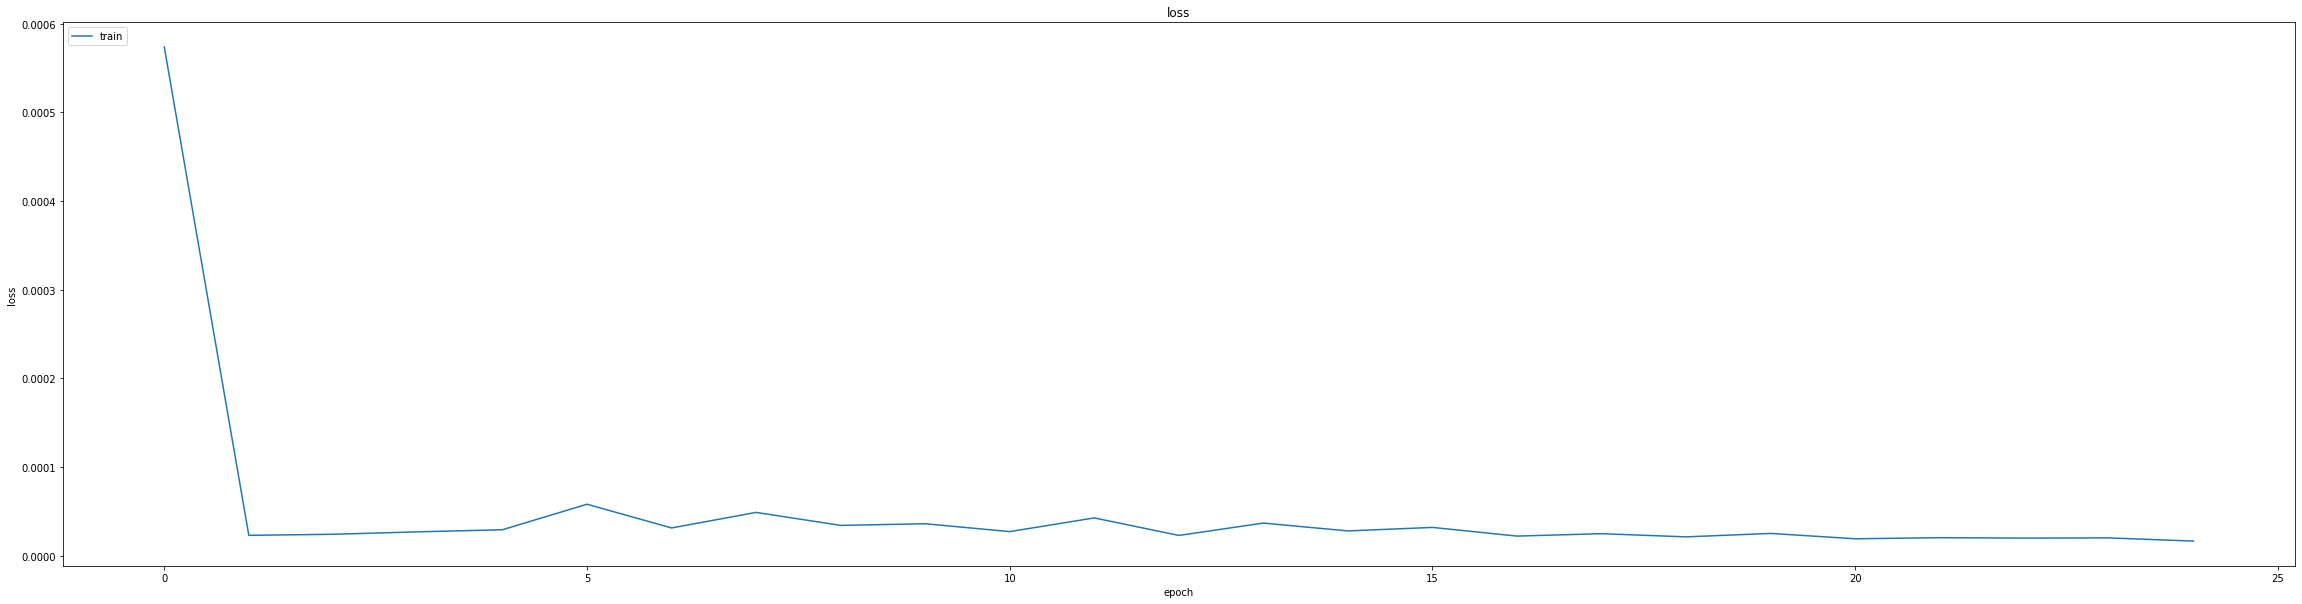

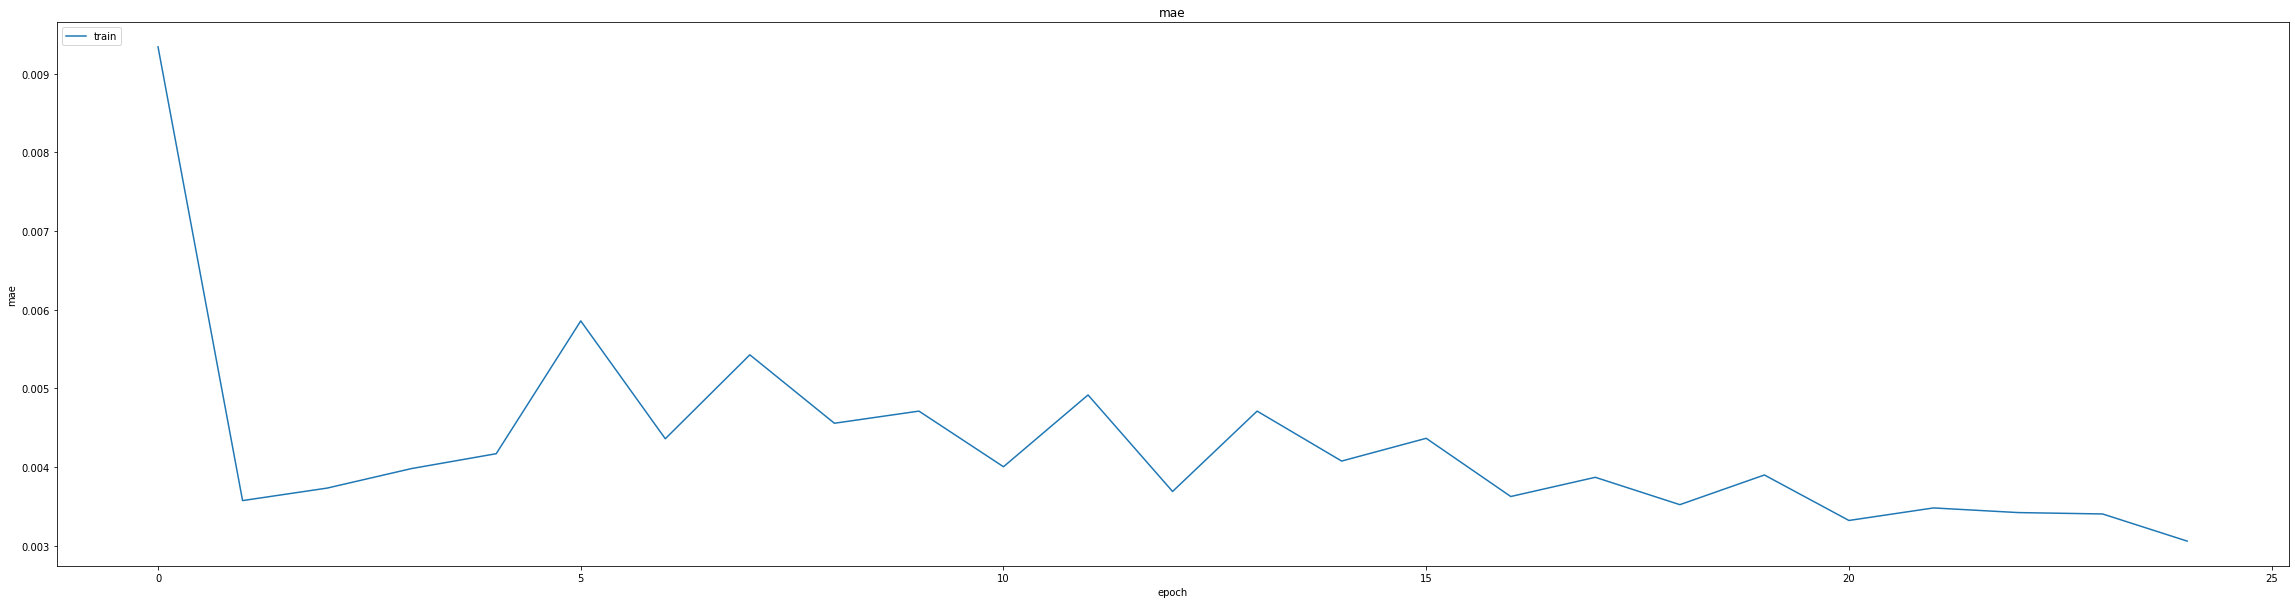

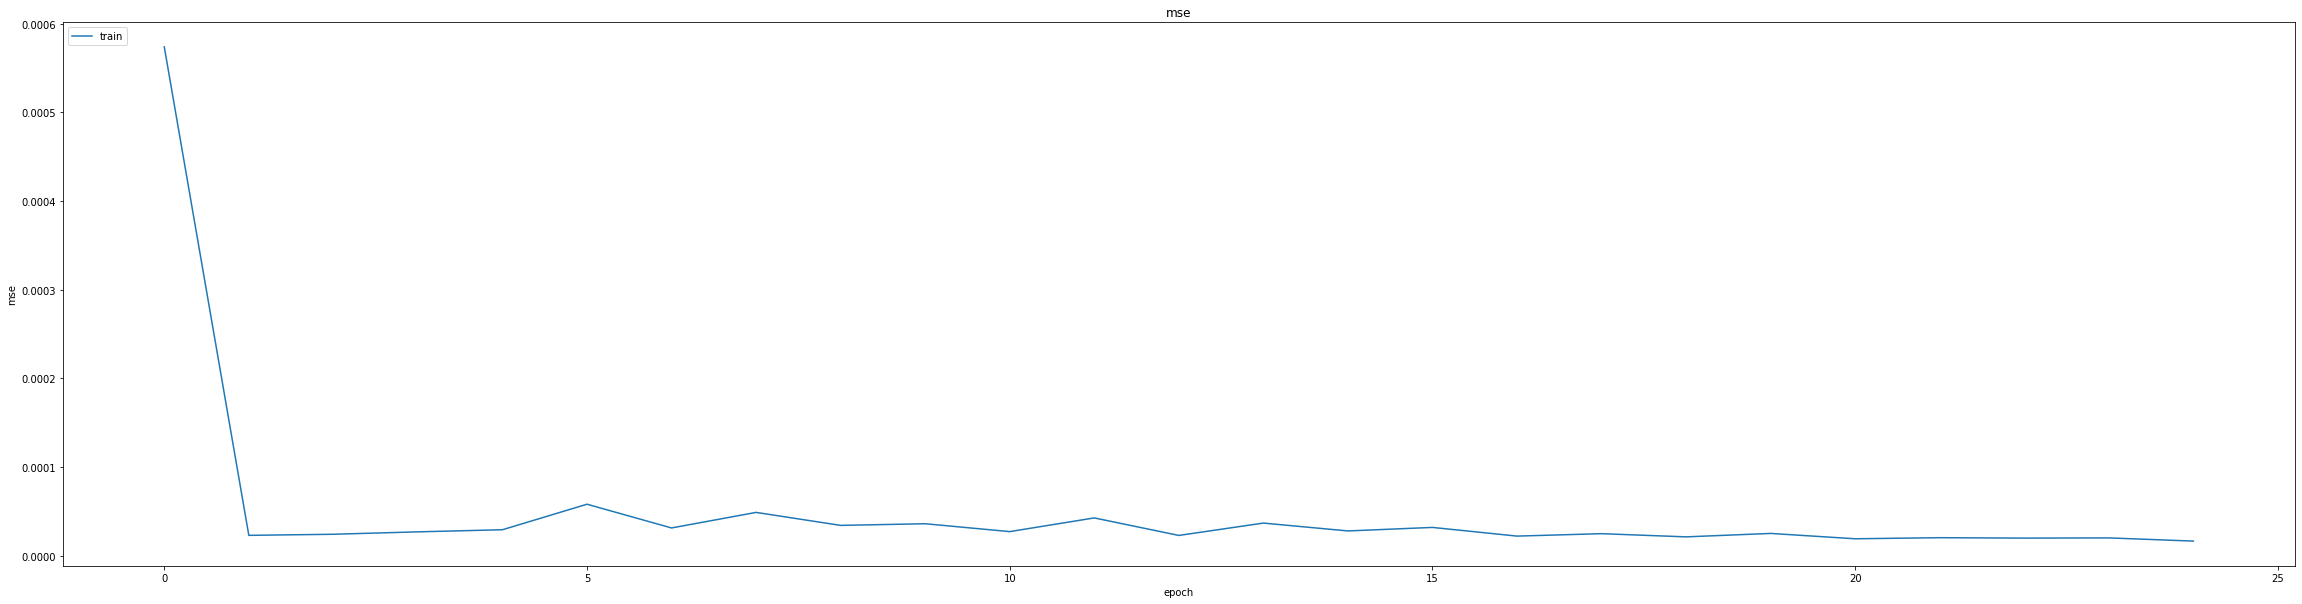

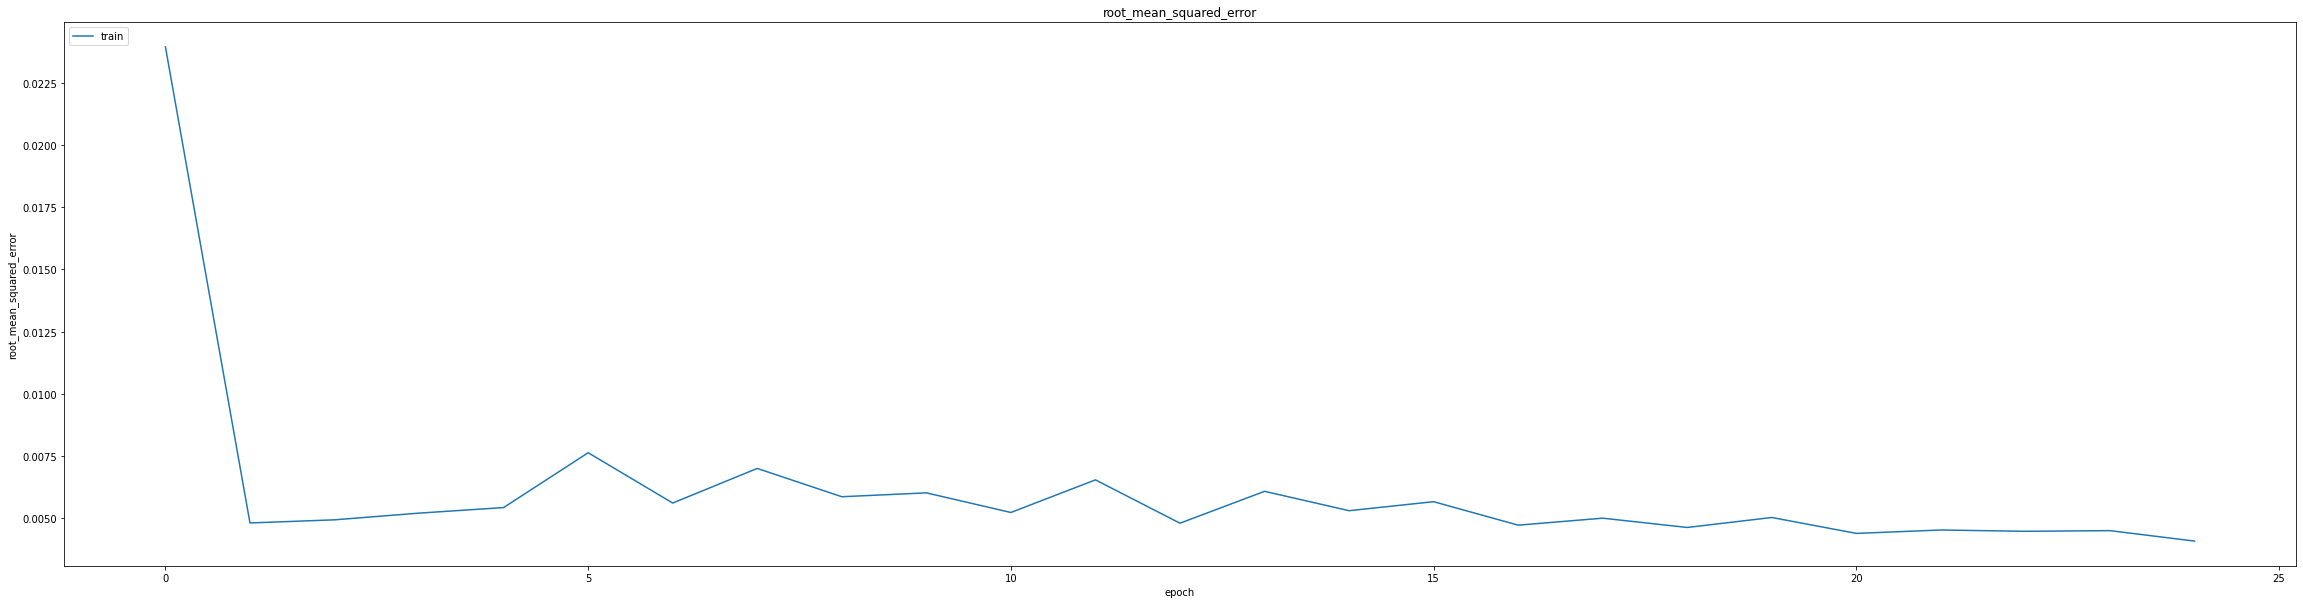

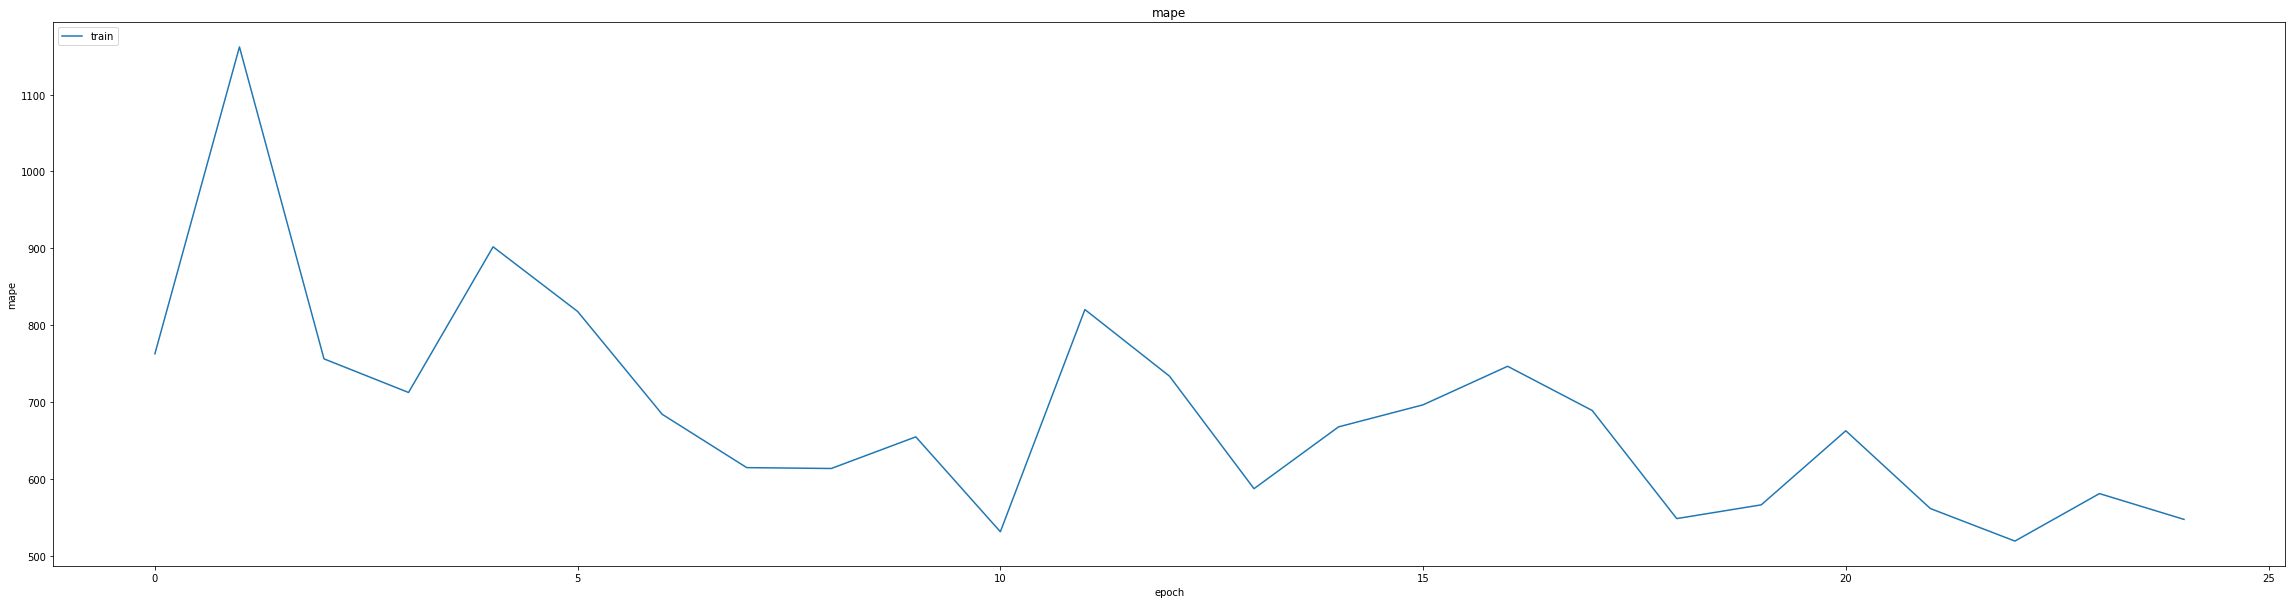

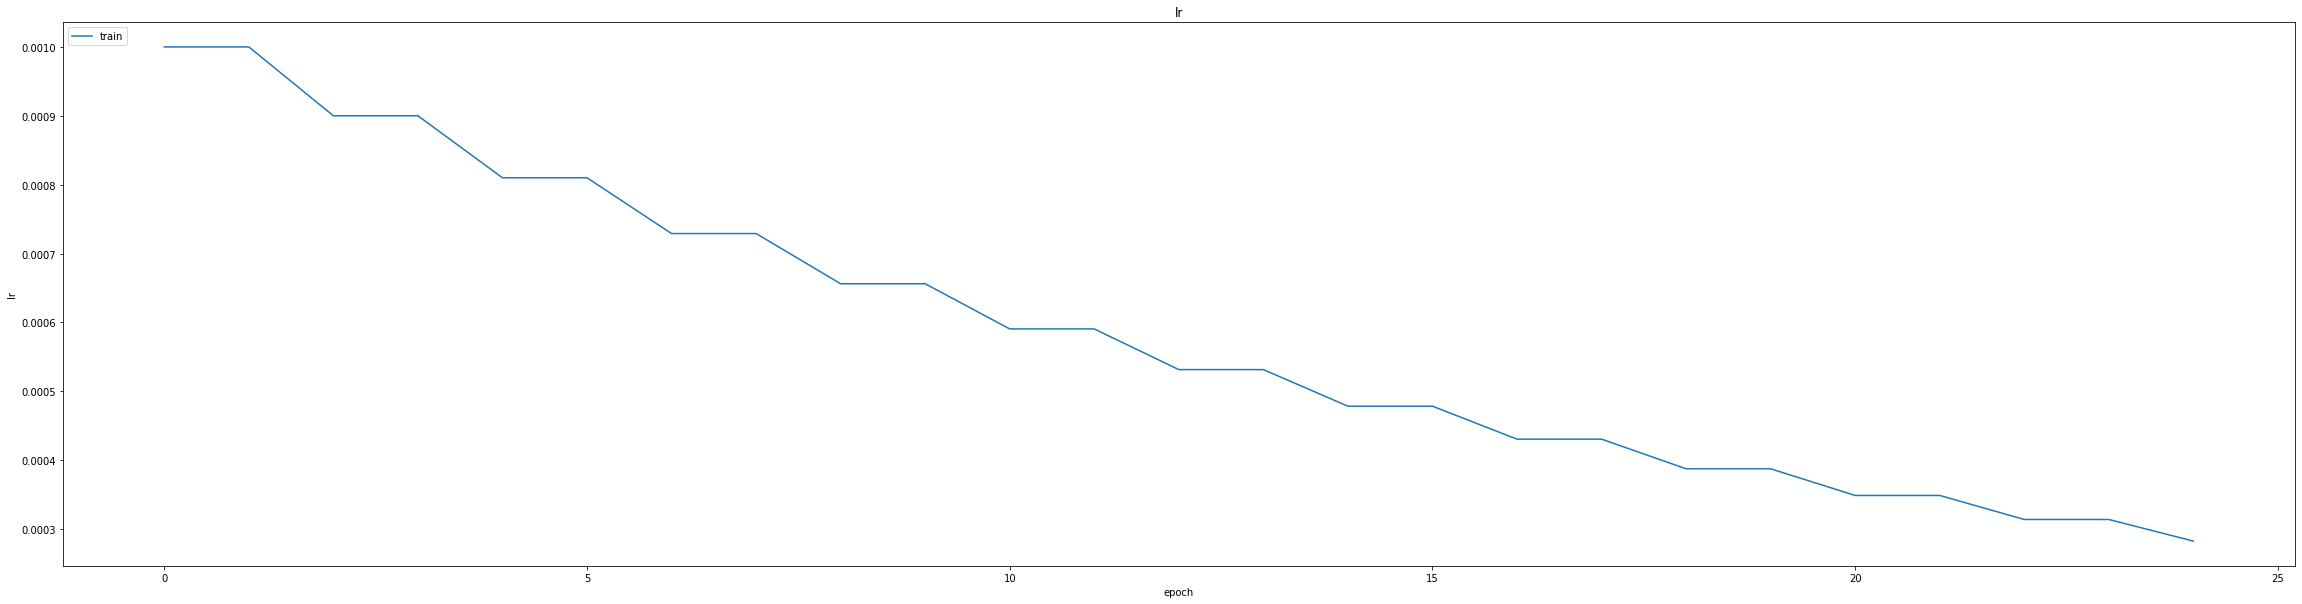

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014468817040324211
0.015536535531282425
464/464 [==============================] - 4s 5ms/step
0.9925573486939285


464/464 [==============================] - 2s 5ms/step


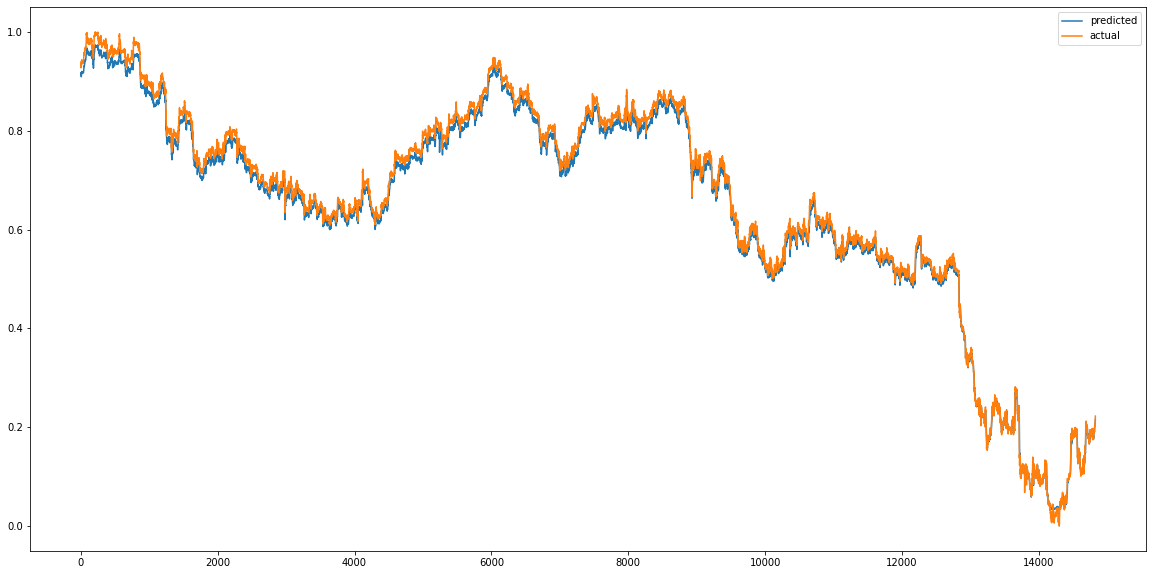

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


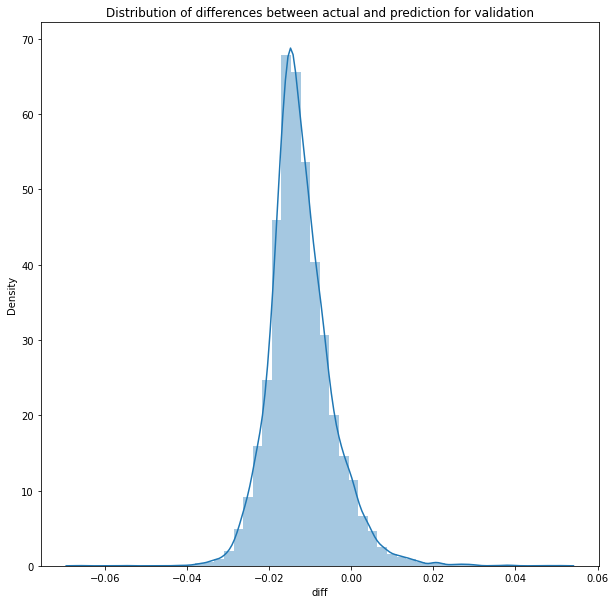

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 5ms/step


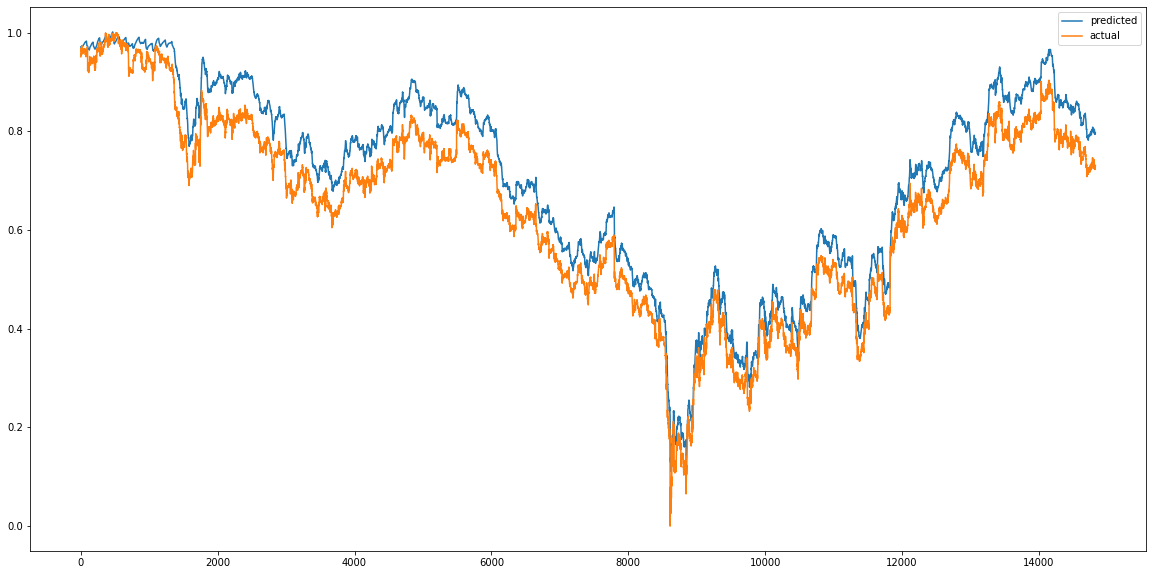

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


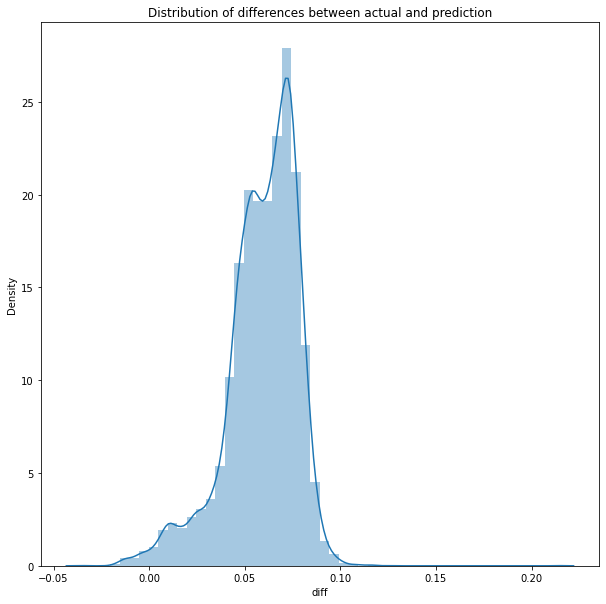

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.003846637423704628
RMSE :  0.062021265898920735
MAE :  0.05932065510875241
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.8998384229464977


count    14827.000000
mean         0.059190
std          0.018525
min         -0.035193
25%          0.049482
50%          0.062088
75%          0.072625
max          0.213853
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


345/348 [============================>.] - ETA: 0s - loss: 446.6634 - mae: 4.6830 - mse: 446.6634 - root_mean_squared_error: 21.1344 - mape: 47795.0977
Epoch 1: val_mse improved from inf to 0.47607, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 17s 36ms/step - loss: 442.9662 - mae: 4.6498 - mse: 442.9662 - root_mean_squared_error: 21.0468 - mape: 47400.1992 - val_loss: 0.4761 - val_mae: 0.6507 - val_mse: 0.4761 - val_root_mean_squared_error: 0.6900 - val_mape: 88542.6797
Epoch 2/75
343/348 [============================>.] - ETA: 0s - loss: 0.2542 - mae: 0.4453 - mse: 0.2542 - root_mean_squared_error: 0.5041 - mape: 22809.6875
Epoch 2: val_mse improved from 0.47607 to 0.12593, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 36ms/step - loss: 0.2523 - mae: 0.4430 - mse: 0.2523 - root_mean_squared_error: 0.5023 - mape: 22490.7168 - val_loss: 0.1259 - val_mae: 0.2752 - val_mse: 0.1259 - val_root_mean_squared_error: 0.3549 - val_mape: 62801.5391
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0837 - mae: 0.2232 - mse: 0.0837 - root_mean_squared_error: 0.2893 - mape: 19660.0996
Epoch 3: val_mse improved from 0.12593 to 0.06641, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0836 - mae: 0.2230 - mse: 0.0836 - root_mean_squared_error: 0.2891 - mape: 19610.3066 - val_loss: 0.0664 - val_mae: 0.1800 - val_mse: 0.0664 - val_root_mean_squared_error: 0.2577 - val_mape: 52413.7383
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0519 - mae: 0.1865 - mse: 0.0519 - root_mean_squared_error: 0.2278 - mape: 16748.7891
Epoch 4: val_mse improved from 0.06641 to 0.05482, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0519 - mae: 0.1864 - mse: 0.0519 - root_mean_squared_error: 0.2277 - mape: 16610.3340 - val_loss: 0.0548 - val_mae: 0.1716 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2341 - val_mape: 47622.0547
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0451 - mae: 0.1819 - mse: 0.0451 - root_mean_squared_error: 0.2125 - mape: 16248.3311
Epoch 5: val_mse improved from 0.05482 to 0.05141, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0451 - mae: 0.1819 - mse: 0.0451 - root_mean_squared_error: 0.2124 - mape: 16160.6143 - val_loss: 0.0514 - val_mae: 0.1762 - val_mse: 0.0514 - val_root_mean_squared_error: 0.2267 - val_mape: 43111.0625
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1657 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 11623.8467
Epoch 6: val_mse improved from 0.05141 to 0.03753, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0361 - mae: 0.1656 - mse: 0.0361 - root_mean_squared_error: 0.1901 - mape: 11527.7734 - val_loss: 0.0375 - val_mae: 0.1665 - val_mse: 0.0375 - val_root_mean_squared_error: 0.1937 - val_mape: 33471.6250
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0219 - mae: 0.1289 - mse: 0.0219 - root_mean_squared_error: 0.1479 - mape: 11376.7383
Epoch 7: val_mse improved from 0.03753 to 0.01989, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0218 - mae: 0.1288 - mse: 0.0218 - root_mean_squared_error: 0.1478 - mape: 11347.9111 - val_loss: 0.0199 - val_mae: 0.1215 - val_mse: 0.0199 - val_root_mean_squared_error: 0.1410 - val_mape: 21967.3555
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0065 - mae: 0.0588 - mse: 0.0065 - root_mean_squared_error: 0.0805 - mape: 4331.6826
Epoch 8: val_mse improved from 0.01989 to 0.00314, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0064 - mae: 0.0586 - mse: 0.0064 - root_mean_squared_error: 0.0803 - mape: 4308.2642 - val_loss: 0.0031 - val_mae: 0.0492 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 11680.8086
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 9.4759e-04 - mae: 0.0237 - mse: 9.4759e-04 - root_mean_squared_error: 0.0308 - mape: 3600.6841
Epoch 9: val_mse improved from 0.00314 to 0.00175, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 9.4759e-04 - mae: 0.0237 - mse: 9.4759e-04 - root_mean_squared_error: 0.0308 - mape: 3600.6841 - val_loss: 0.0017 - val_mae: 0.0366 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 8549.6045
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 7.6076e-04 - mae: 0.0214 - mse: 7.6076e-04 - root_mean_squared_error: 0.0276 - mape: 2832.9309
Epoch 10: val_mse did not improve from 0.00175
348/348 [==============================] - 5s 14ms/step - loss: 7.6018e-04 - mae: 0.0214 - mse: 7.6018e-04 - root_mean_squared_error: 0.0276 - mape: 2825.7593 - val_loss: 0.0019 - val_mae: 0.0392 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 7904.9966
Epoch 11/75
344/348 [============================>.] - ETA: 0s - loss: 6.4883e-04 - mae: 0.0198 - mse: 6.4883e-04 - root_mean_squared_error: 0.0255 - mape: 2745.4512
Epoch 11: val_mse improved from 0.00175 to 0.00172, saving model to /con

348/348 [==============================] - 11s 32ms/step - loss: 6.4810e-04 - mae: 0.0198 - mse: 6.4810e-04 - root_mean_squared_error: 0.0255 - mape: 2714.8608 - val_loss: 0.0017 - val_mae: 0.0382 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 7376.1709
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 5.9391e-04 - mae: 0.0190 - mse: 5.9391e-04 - root_mean_squared_error: 0.0244 - mape: 2619.0012
Epoch 12: val_mse improved from 0.00172 to 0.00168, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 5.9351e-04 - mae: 0.0190 - mse: 5.9351e-04 - root_mean_squared_error: 0.0244 - mape: 2597.3264 - val_loss: 0.0017 - val_mae: 0.0378 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 7137.8848
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 5.3490e-04 - mae: 0.0181 - mse: 5.3490e-04 - root_mean_squared_error: 0.0231 - mape: 2296.9771
Epoch 13: val_mse improved from 0.00168 to 0.00147, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 5.3487e-04 - mae: 0.0181 - mse: 5.3487e-04 - root_mean_squared_error: 0.0231 - mape: 2291.1592 - val_loss: 0.0015 - val_mae: 0.0356 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 6807.5942
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 5.0897e-04 - mae: 0.0176 - mse: 5.0897e-04 - root_mean_squared_error: 0.0226 - mape: 2520.9675
Epoch 14: val_mse improved from 0.00147 to 0.00119, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 5.0865e-04 - mae: 0.0176 - mse: 5.0865e-04 - root_mean_squared_error: 0.0226 - mape: 2500.1047 - val_loss: 0.0012 - val_mae: 0.0319 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 6530.1553
Epoch 15/75
344/348 [============================>.] - ETA: 0s - loss: 4.7305e-04 - mae: 0.0170 - mse: 4.7305e-04 - root_mean_squared_error: 0.0217 - mape: 2139.9980
Epoch 15: val_mse did not improve from 0.00119
348/348 [==============================] - 4s 10ms/step - loss: 4.7286e-04 - mae: 0.0170 - mse: 4.7286e-04 - root_mean_squared_error: 0.0217 - mape: 2116.1511 - val_loss: 0.0016 - val_mae: 0.0381 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 6184.8799
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 4.4504e-04 - mae: 0.0165 - mse: 4.4504e-04 - root_mean_squared_error: 0.0211 - mape: 1892.4651
Epoch 16: val_mse improved from 0.00119 to 0.00118, saving model to /con

348/348 [==============================] - 11s 33ms/step - loss: 4.4523e-04 - mae: 0.0166 - mse: 4.4523e-04 - root_mean_squared_error: 0.0211 - mape: 1876.8065 - val_loss: 0.0012 - val_mae: 0.0322 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 5747.4575
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 4.2152e-04 - mae: 0.0161 - mse: 4.2152e-04 - root_mean_squared_error: 0.0205 - mape: 1735.4302
Epoch 17: val_mse improved from 0.00118 to 0.00106, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 4.2127e-04 - mae: 0.0161 - mse: 4.2127e-04 - root_mean_squared_error: 0.0205 - mape: 1731.0321 - val_loss: 0.0011 - val_mae: 0.0307 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 4932.0776
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 4.0265e-04 - mae: 0.0158 - mse: 4.0265e-04 - root_mean_squared_error: 0.0201 - mape: 1885.9371
Epoch 18: val_mse improved from 0.00106 to 0.00101, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 4.0225e-04 - mae: 0.0158 - mse: 4.0225e-04 - root_mean_squared_error: 0.0201 - mape: 1875.7439 - val_loss: 0.0010 - val_mae: 0.0303 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 4360.8037
Epoch 19/75
343/348 [============================>.] - ETA: 0s - loss: 3.6609e-04 - mae: 0.0150 - mse: 3.6609e-04 - root_mean_squared_error: 0.0191 - mape: 1510.9474
Epoch 19: val_mse did not improve from 0.00101
348/348 [==============================] - 4s 10ms/step - loss: 3.6562e-04 - mae: 0.0150 - mse: 3.6562e-04 - root_mean_squared_error: 0.0191 - mape: 1489.7799 - val_loss: 0.0012 - val_mae: 0.0334 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 4245.8413
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 3.5753e-04 - mae: 0.0149 - mse: 3.5753e-04 - root_mean_squared_error: 0.0189 - mape: 1479.0348
Epoch 20: val_mse did not improve from 0.00101
348/348 [================

348/348 [==============================] - 11s 31ms/step - loss: 3.2281e-04 - mae: 0.0141 - mse: 3.2281e-04 - root_mean_squared_error: 0.0180 - mape: 1743.2828 - val_loss: 8.9658e-04 - val_mae: 0.0286 - val_mse: 8.9658e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 3571.0222
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 3.1170e-04 - mae: 0.0139 - mse: 3.1170e-04 - root_mean_squared_error: 0.0177 - mape: 1096.7987
Epoch 23: val_mse did not improve from 0.00090
348/348 [==============================] - 4s 10ms/step - loss: 3.1172e-04 - mae: 0.0139 - mse: 3.1172e-04 - root_mean_squared_error: 0.0177 - mape: 1087.7299 - val_loss: 0.0011 - val_mae: 0.0321 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 3925.9514
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 2.9318e-04 - mae: 0.0135 - mse: 2.9318e-04 - root_mean_squared_error: 0.0171 - mape: 1548.6593
Epoch 24: val_mse did not improve from 0.00090
348/348 [========

348/348 [==============================] - 12s 33ms/step - loss: 2.3631e-04 - mae: 0.0121 - mse: 2.3631e-04 - root_mean_squared_error: 0.0154 - mape: 1057.2013 - val_loss: 8.1968e-04 - val_mae: 0.0272 - val_mse: 8.1968e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 3082.2351
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 2.2894e-04 - mae: 0.0119 - mse: 2.2894e-04 - root_mean_squared_error: 0.0151 - mape: 1074.2507
Epoch 29: val_mse did not improve from 0.00082
348/348 [==============================] - 4s 10ms/step - loss: 2.2900e-04 - mae: 0.0119 - mse: 2.2900e-04 - root_mean_squared_error: 0.0151 - mape: 1071.5308 - val_loss: 8.5055e-04 - val_mae: 0.0280 - val_mse: 8.5055e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 3188.4268
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 2.1385e-04 - mae: 0.0115 - mse: 2.1385e-04 - root_mean_squared_error: 0.0146 - mape: 1184.6920
Epoch 30: val_mse did not improve from 0.00082
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 1.9335e-04 - mae: 0.0109 - mse: 1.9335e-04 - root_mean_squared_error: 0.0139 - mape: 1090.5159 - val_loss: 5.4062e-04 - val_mae: 0.0219 - val_mse: 5.4062e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 2984.1570
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 1.8017e-04 - mae: 0.0104 - mse: 1.8017e-04 - root_mean_squared_error: 0.0134 - mape: 1295.9293
Epoch 33: val_mse did not improve from 0.00054
348/348 [==============================] - 4s 10ms/step - loss: 1.8011e-04 - mae: 0.0104 - mse: 1.8011e-04 - root_mean_squared_error: 0.0134 - mape: 1292.6460 - val_loss: 6.5251e-04 - val_mae: 0.0243 - val_mse: 6.5251e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 2840.9573
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 1.6462e-04 - mae: 0.0100 - mse: 1.6462e-04 - root_mean_squared_error: 0.0128 - mape: 1246.9924
Epoch 34: val_mse did not improve from 0.00054
348/348 [

348/348 [==============================] - 11s 32ms/step - loss: 1.1303e-04 - mae: 0.0083 - mse: 1.1303e-04 - root_mean_squared_error: 0.0106 - mape: 1100.4551 - val_loss: 5.2317e-04 - val_mae: 0.0216 - val_mse: 5.2317e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 2616.2551
Epoch 41/75
347/348 [============================>.] - ETA: 0s - loss: 1.0416e-04 - mae: 0.0080 - mse: 1.0416e-04 - root_mean_squared_error: 0.0102 - mape: 848.0370
Epoch 41: val_mse did not improve from 0.00052
348/348 [==============================] - 4s 10ms/step - loss: 1.0414e-04 - mae: 0.0080 - mse: 1.0414e-04 - root_mean_squared_error: 0.0102 - mape: 845.8893 - val_loss: 7.5645e-04 - val_mae: 0.0260 - val_mse: 7.5645e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 2355.5784
Epoch 42/75
342/348 [============================>.] - ETA: 0s - loss: 9.8309e-05 - mae: 0.0077 - mse: 9.8309e-05 - root_mean_squared_error: 0.0099 - mape: 1058.5853
Epoch 42: val_mse did not improve from 0.00052
348/348 [==

348/348 [==============================] - 11s 32ms/step - loss: 5.6140e-05 - mae: 0.0058 - mse: 5.6140e-05 - root_mean_squared_error: 0.0075 - mape: 605.7817 - val_loss: 4.6664e-04 - val_mae: 0.0204 - val_mse: 4.6664e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2239.1611
Epoch 54/75
343/348 [============================>.] - ETA: 0s - loss: 5.3301e-05 - mae: 0.0056 - mse: 5.3301e-05 - root_mean_squared_error: 0.0073 - mape: 805.9601
Epoch 54: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 10ms/step - loss: 5.3420e-05 - mae: 0.0056 - mse: 5.3420e-05 - root_mean_squared_error: 0.0073 - mape: 794.6649 - val_loss: 5.8836e-04 - val_mae: 0.0230 - val_mse: 5.8836e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 2064.0825
Epoch 55/75
346/348 [============================>.] - ETA: 0s - loss: 4.8976e-05 - mae: 0.0054 - mse: 4.8976e-05 - root_mean_squared_error: 0.0070 - mape: 931.5966
Epoch 55: val_mse did not improve from 0.00047
348/348 [====

348/348 [==============================] - 11s 30ms/step - loss: 5.0013e-05 - mae: 0.0055 - mse: 5.0013e-05 - root_mean_squared_error: 0.0071 - mape: 740.3156 - val_loss: 4.6587e-04 - val_mae: 0.0204 - val_mse: 4.6587e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2100.7996
Epoch 58/75
346/348 [============================>.] - ETA: 0s - loss: 5.2991e-05 - mae: 0.0056 - mse: 5.2991e-05 - root_mean_squared_error: 0.0073 - mape: 716.3192
Epoch 58: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 10ms/step - loss: 5.2993e-05 - mae: 0.0056 - mse: 5.2993e-05 - root_mean_squared_error: 0.0073 - mape: 712.4490 - val_loss: 6.0593e-04 - val_mae: 0.0234 - val_mse: 6.0593e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2102.2087
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 5.0497e-05 - mae: 0.0055 - mse: 5.0497e-05 - root_mean_squared_error: 0.0071 - mape: 669.1395
Epoch 59: val_mse improved from 0.00047 to 0.00037, saving m

348/348 [==============================] - 11s 32ms/step - loss: 5.0519e-05 - mae: 0.0055 - mse: 5.0519e-05 - root_mean_squared_error: 0.0071 - mape: 667.4443 - val_loss: 3.6760e-04 - val_mae: 0.0177 - val_mse: 3.6760e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 2150.1550
Epoch 60/75
348/348 [==============================] - ETA: 0s - loss: 5.8259e-05 - mae: 0.0060 - mse: 5.8259e-05 - root_mean_squared_error: 0.0076 - mape: 811.5569
Epoch 60: val_mse did not improve from 0.00037
348/348 [==============================] - 4s 10ms/step - loss: 5.8259e-05 - mae: 0.0060 - mse: 5.8259e-05 - root_mean_squared_error: 0.0076 - mape: 811.5569 - val_loss: 4.2320e-04 - val_mae: 0.0193 - val_mse: 4.2320e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2206.5203
Epoch 61/75
347/348 [============================>.] - ETA: 0s - loss: 5.4789e-05 - mae: 0.0058 - mse: 5.4789e-05 - root_mean_squared_error: 0.0074 - mape: 700.1697
Epoch 61: val_mse did not improve from 0.00037
348/348 [====

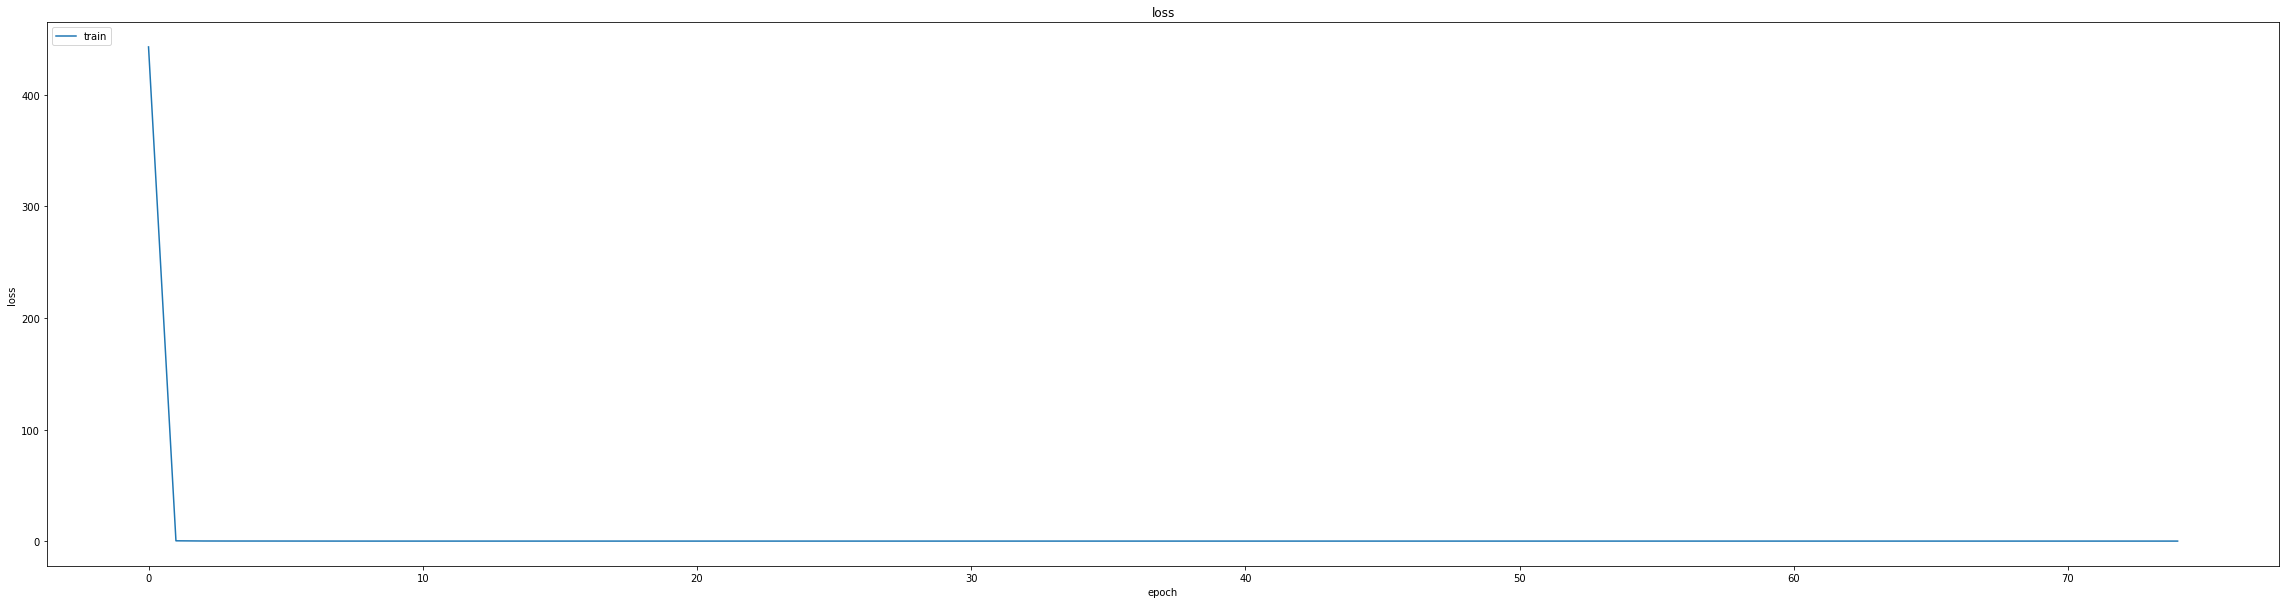

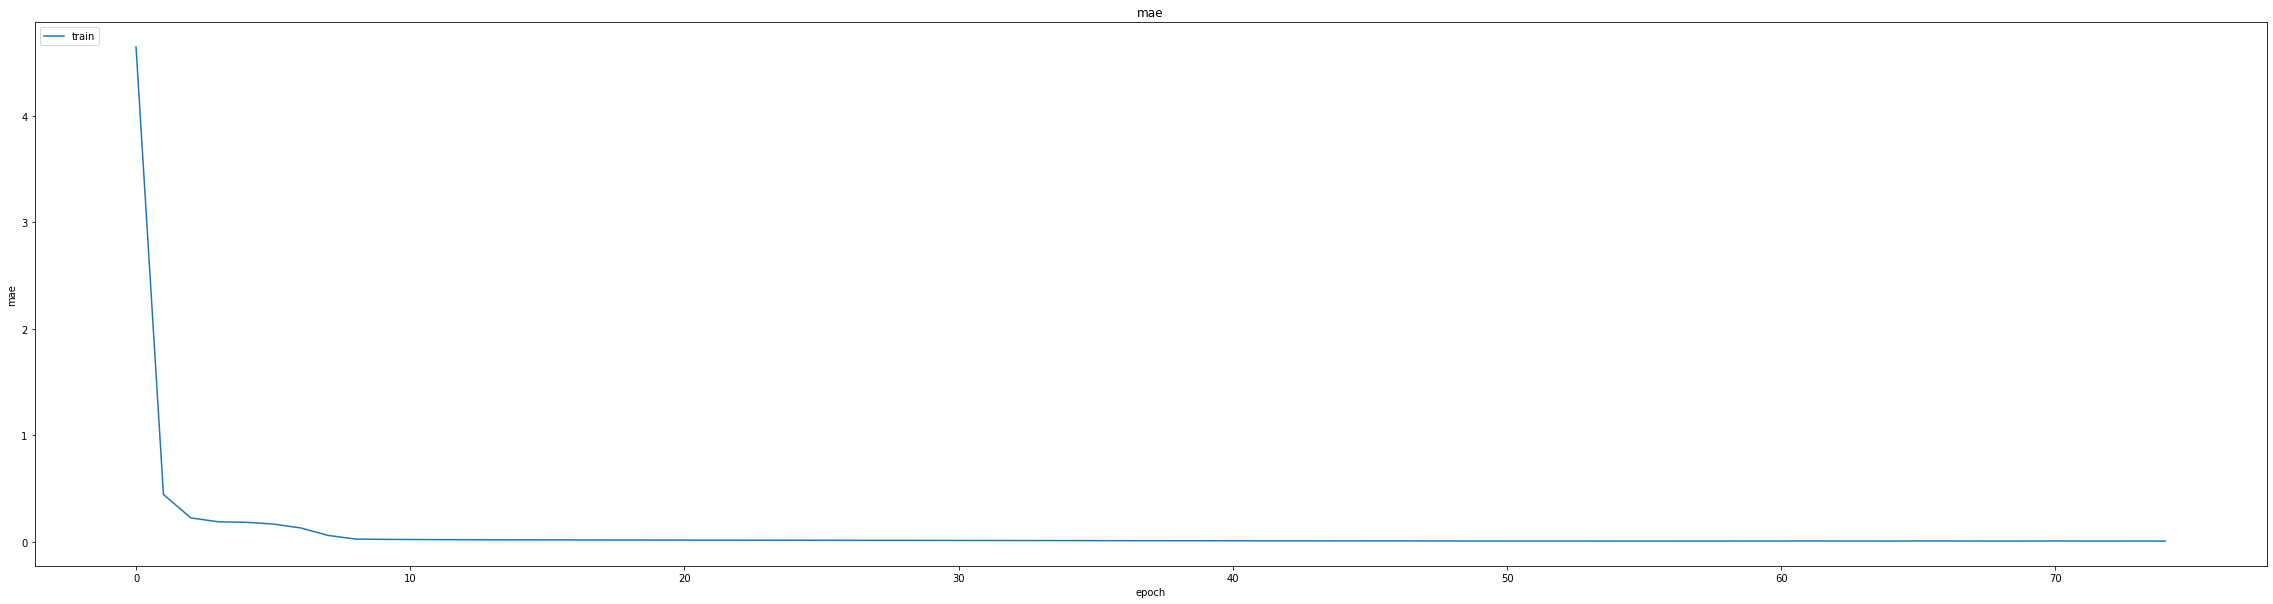

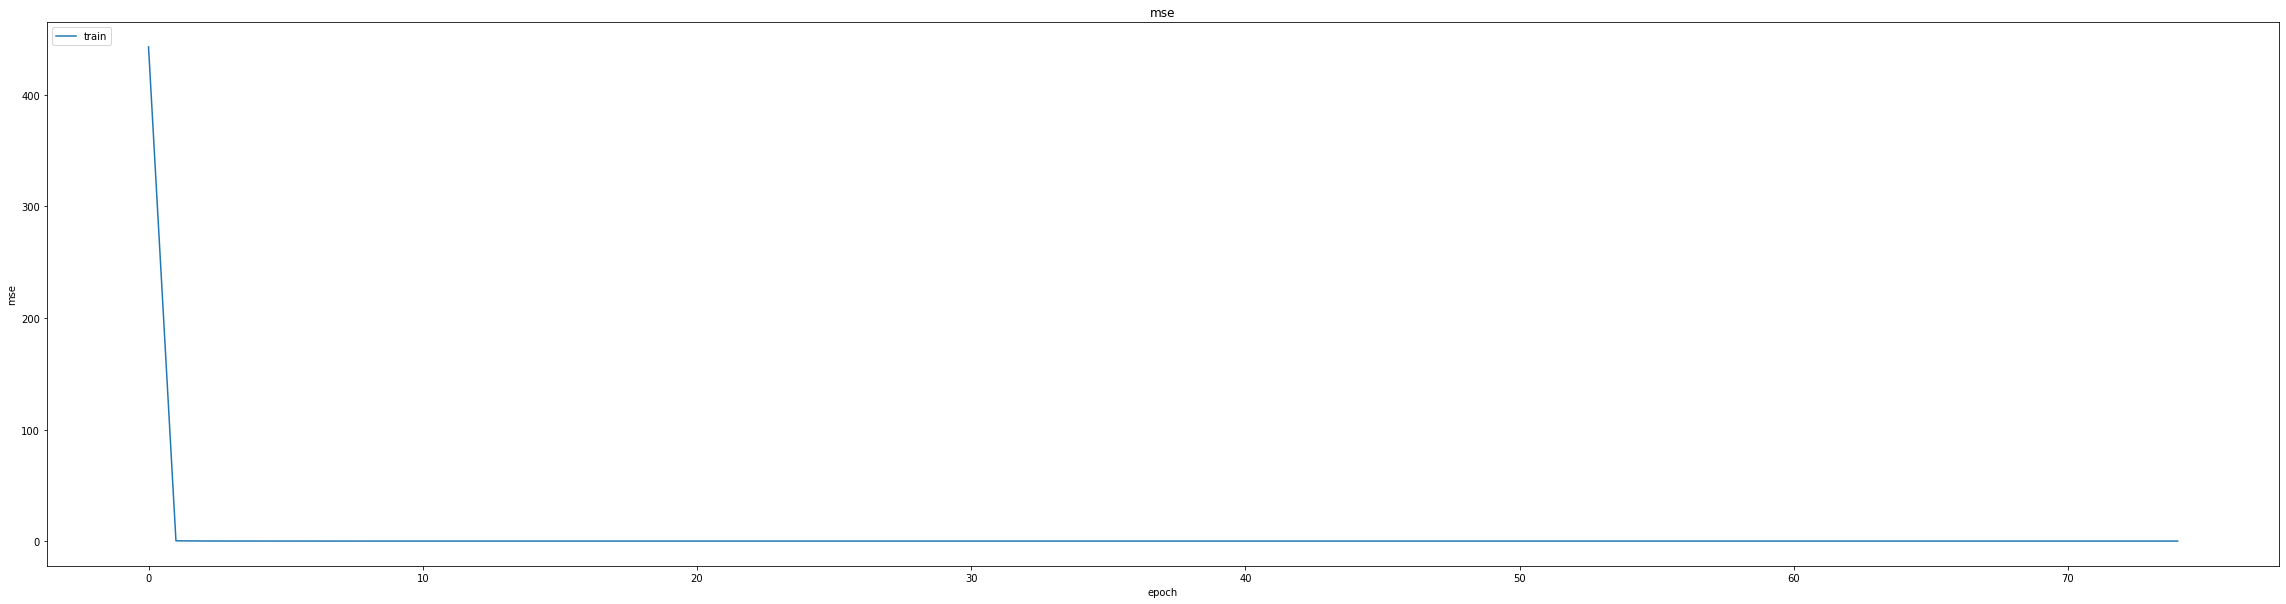

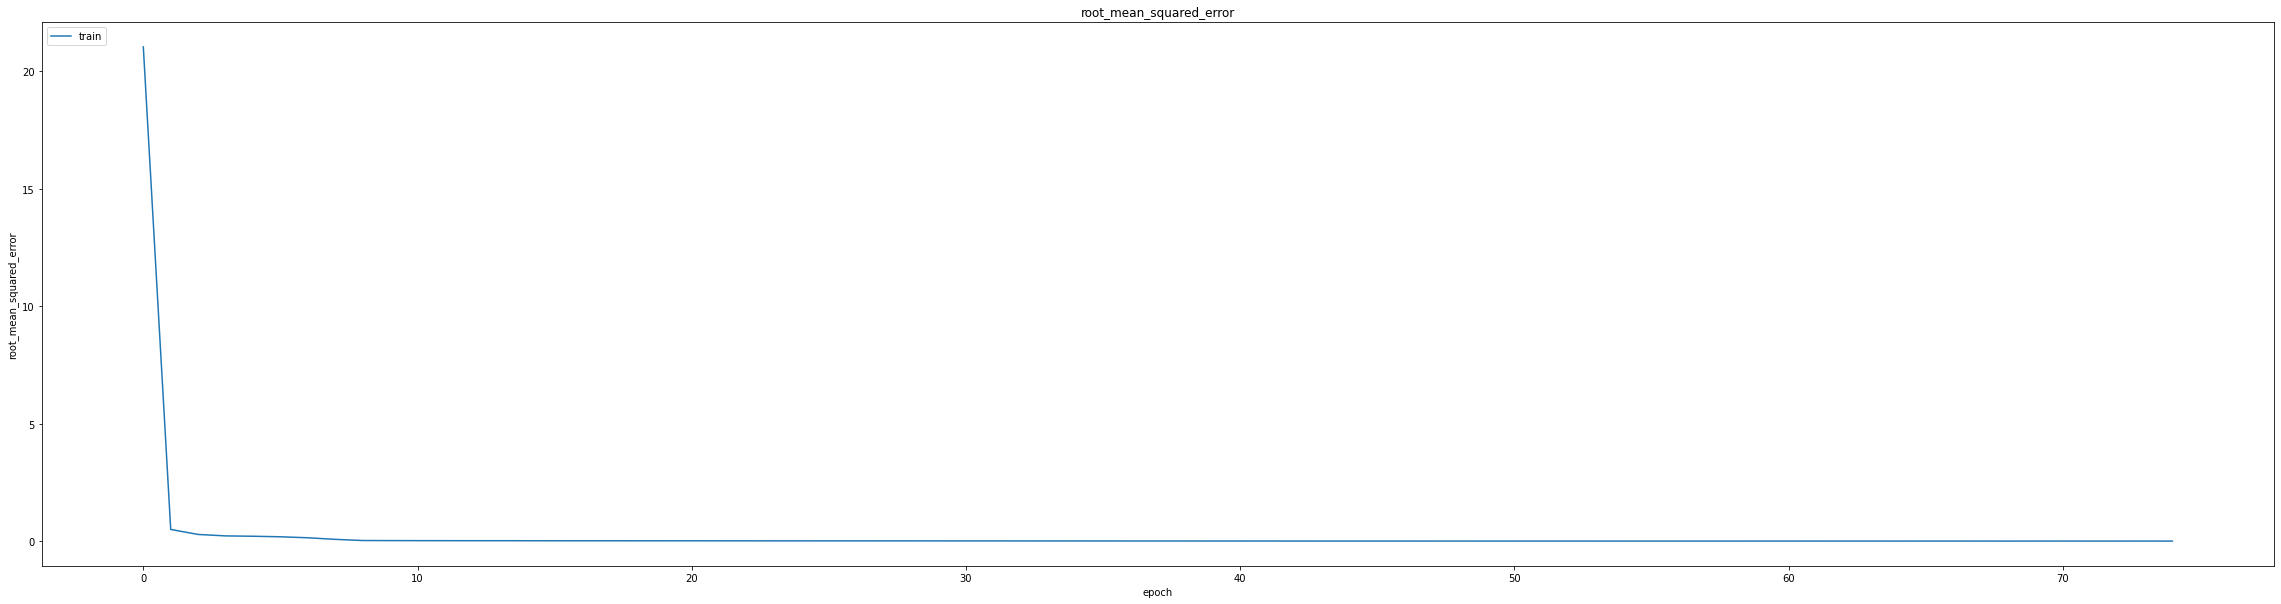

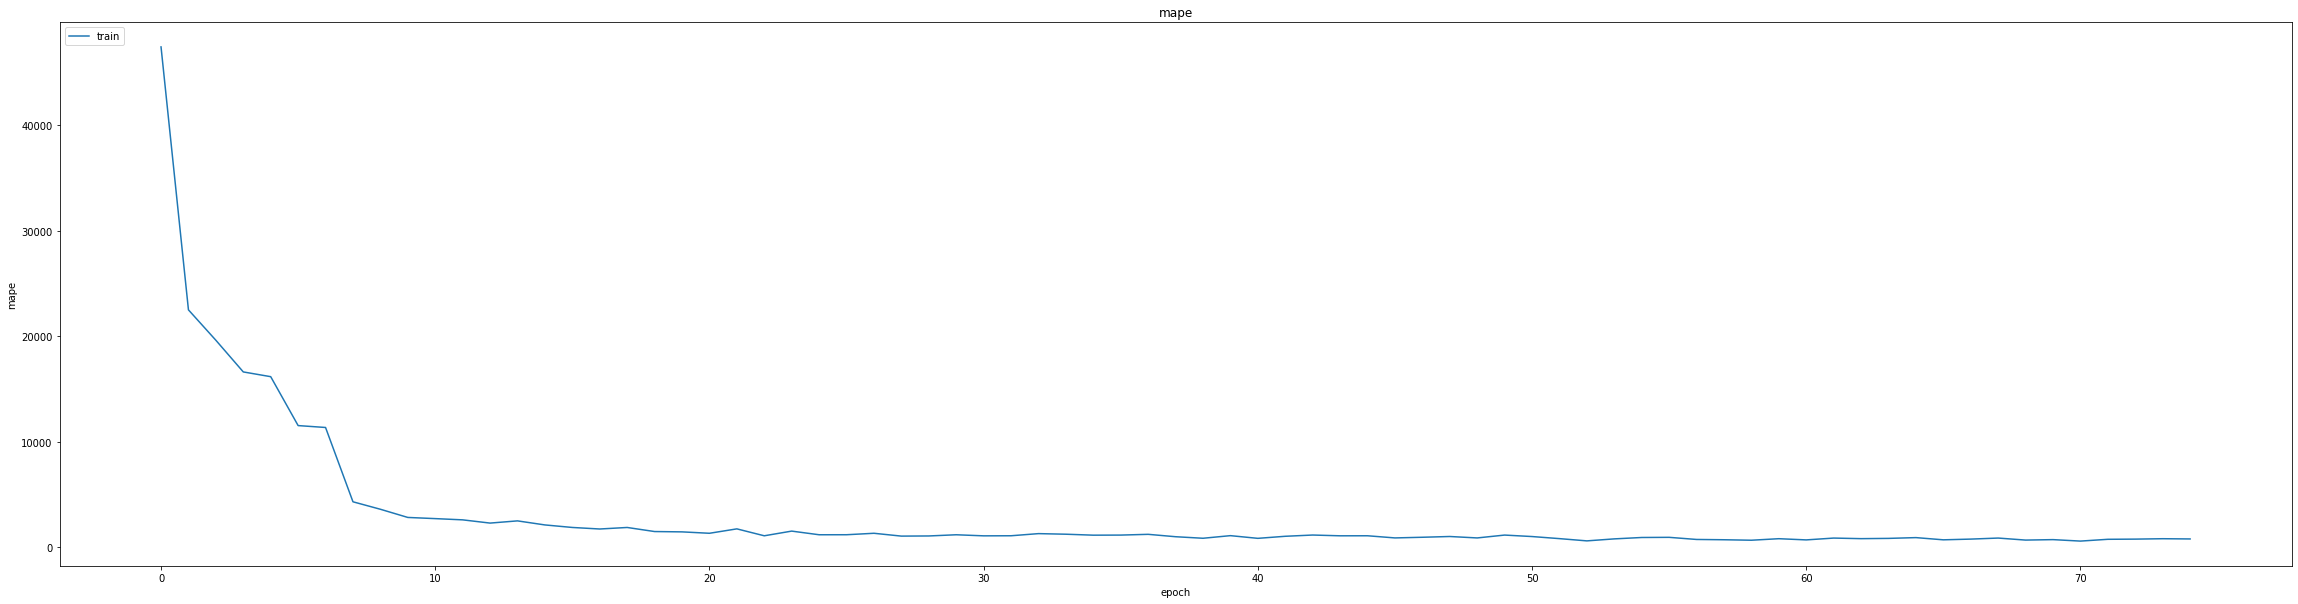

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.017740944400429726
0.019172964617609978
464/464 [==============================] - 4s 5ms/step
0.9888193446477007


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


344/348 [============================>.] - ETA: 0s - loss: 3.5983e-04 - mae: 0.0095 - mse: 3.5983e-04 - root_mean_squared_error: 0.0190 - mape: 1052.2224
Epoch 1: val_mse did not improve from 0.00037
348/348 [==============================] - 10s 13ms/step - loss: 3.5643e-04 - mae: 0.0095 - mse: 3.5643e-04 - root_mean_squared_error: 0.0189 - mape: 1040.4905 - val_loss: 6.0255e-04 - val_mae: 0.0235 - val_mse: 6.0255e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 3511.8733 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 7.5864e-05 - mae: 0.0067 - mse: 7.5864e-05 - root_mean_squared_error: 0.0087 - mape: 737.9751
Epoch 2: val_mse did not improve from 0.00037
348/348 [==============================] - 4s 10ms/step - loss: 7.5938e-05 - mae: 0.0067 - mse: 7.5938e-05 - root_mean_squared_error: 0.0087 - mape: 733.9885 - val_loss: 5.1745e-04 - val_mae: 0.0217 - val_mse: 5.1745e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 2587.3298 - lr: 0.0010


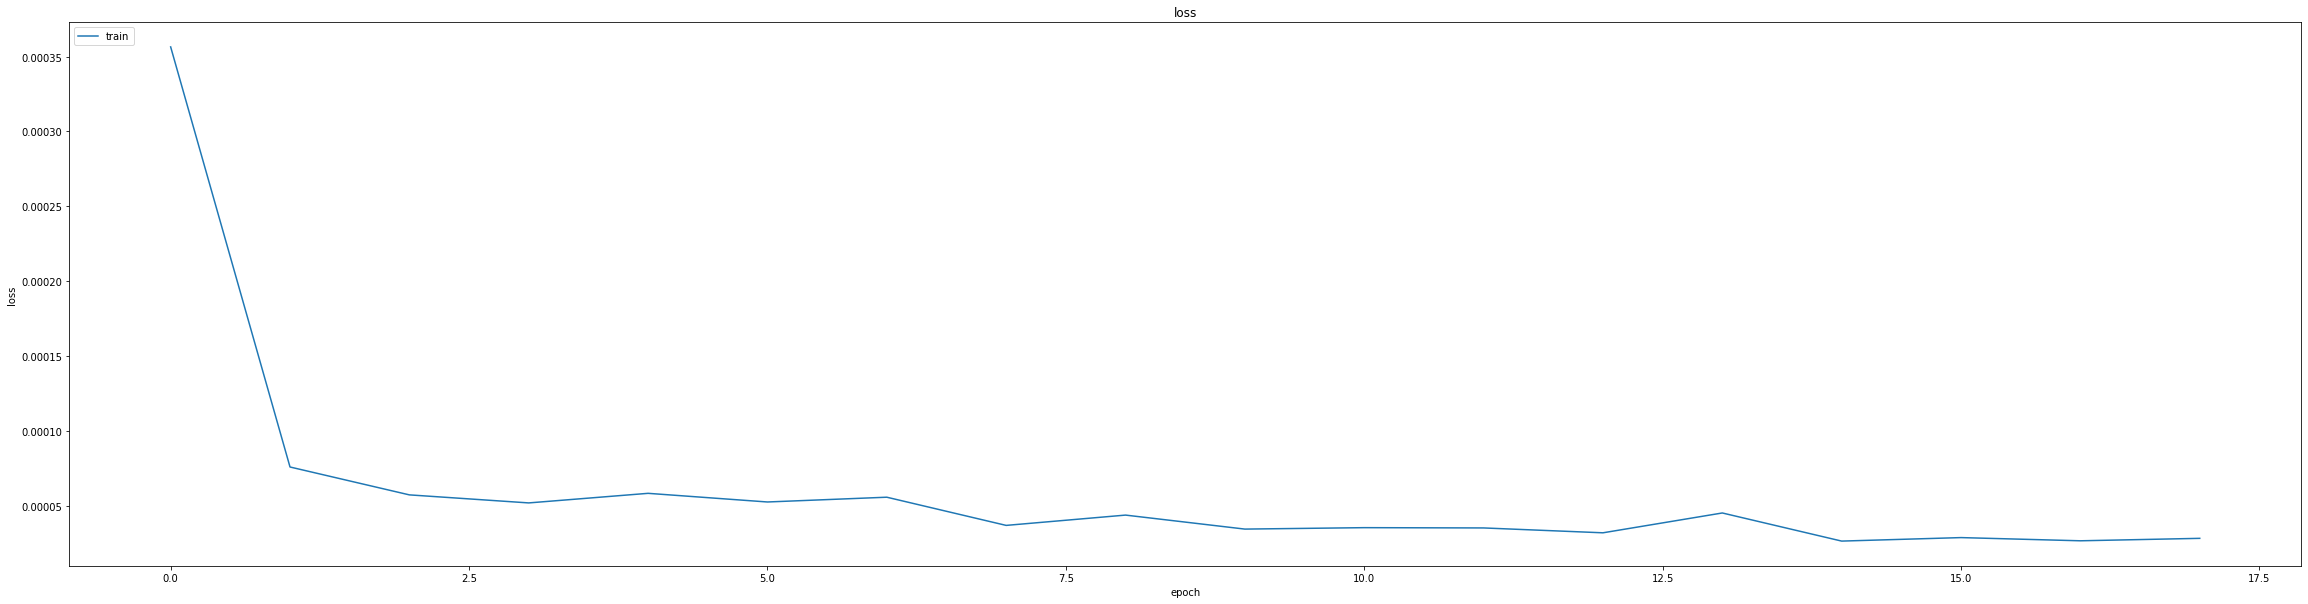

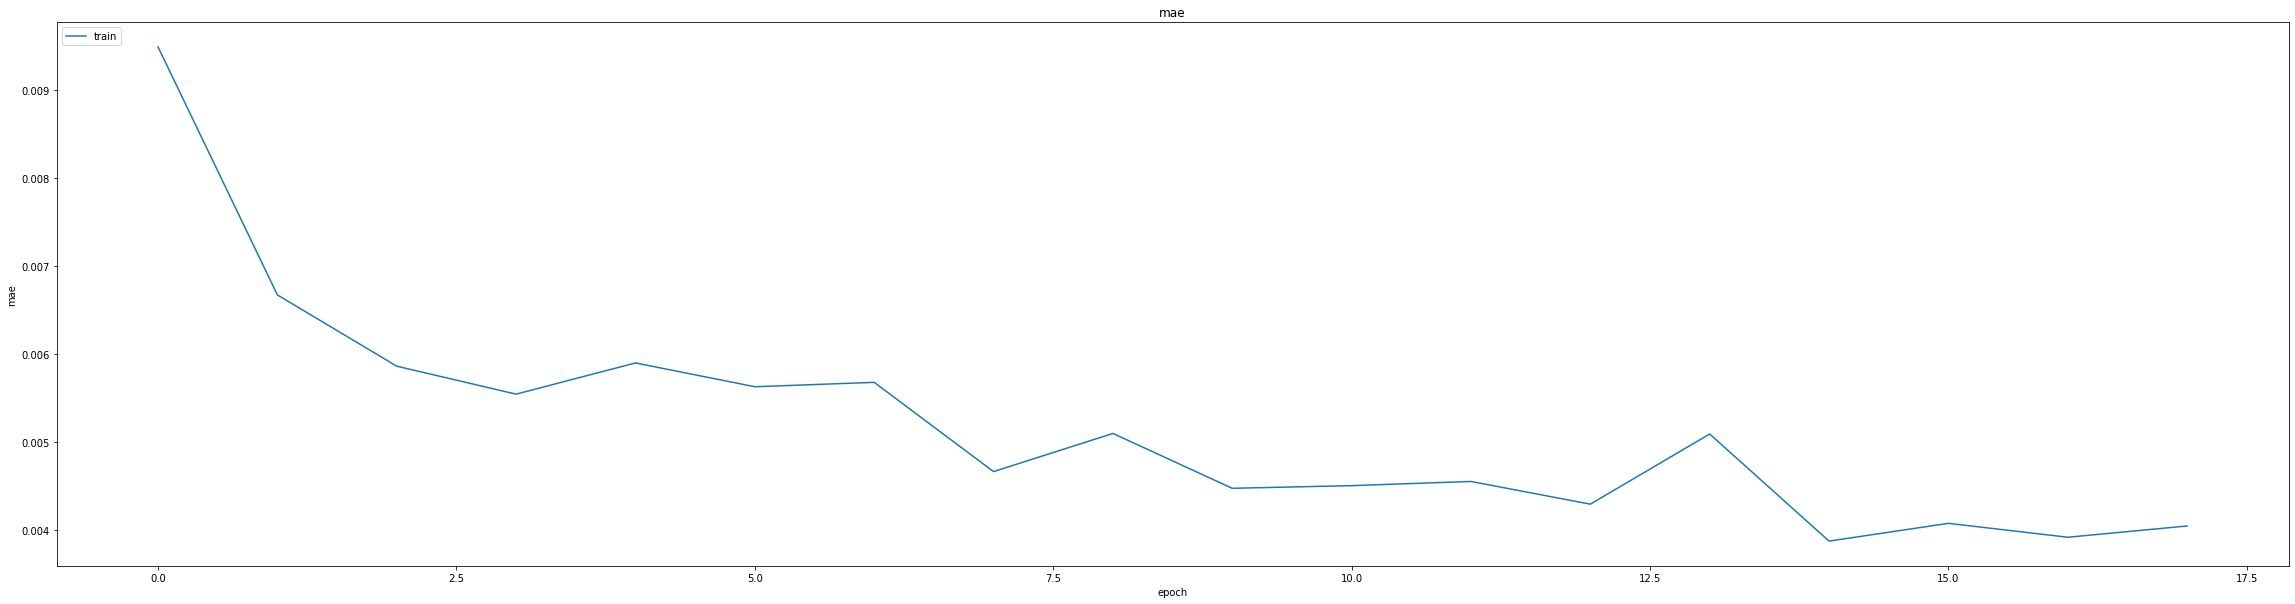

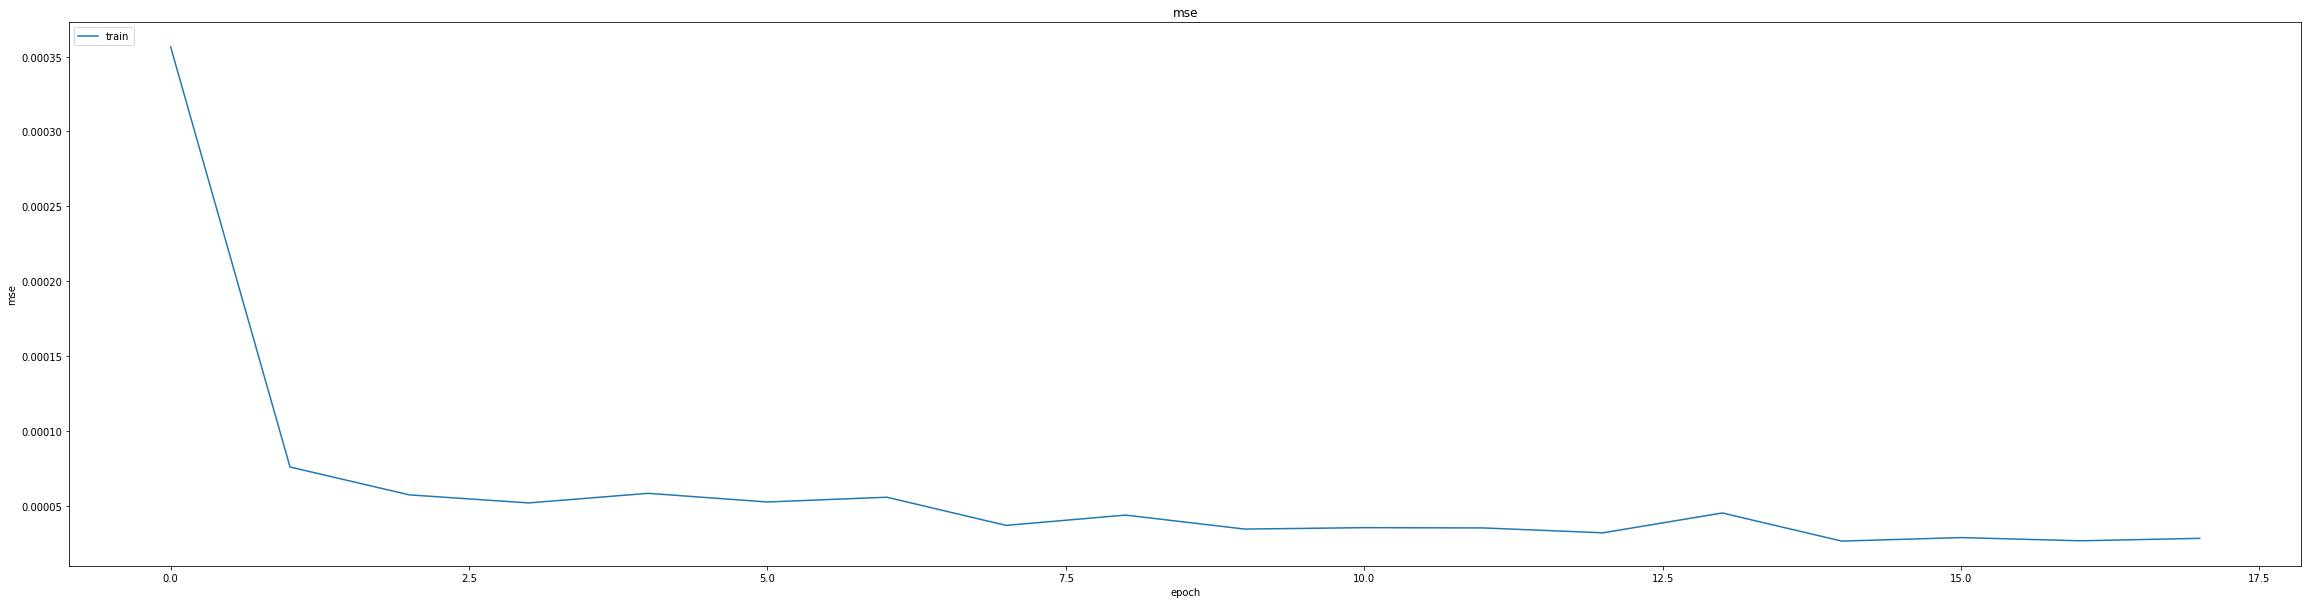

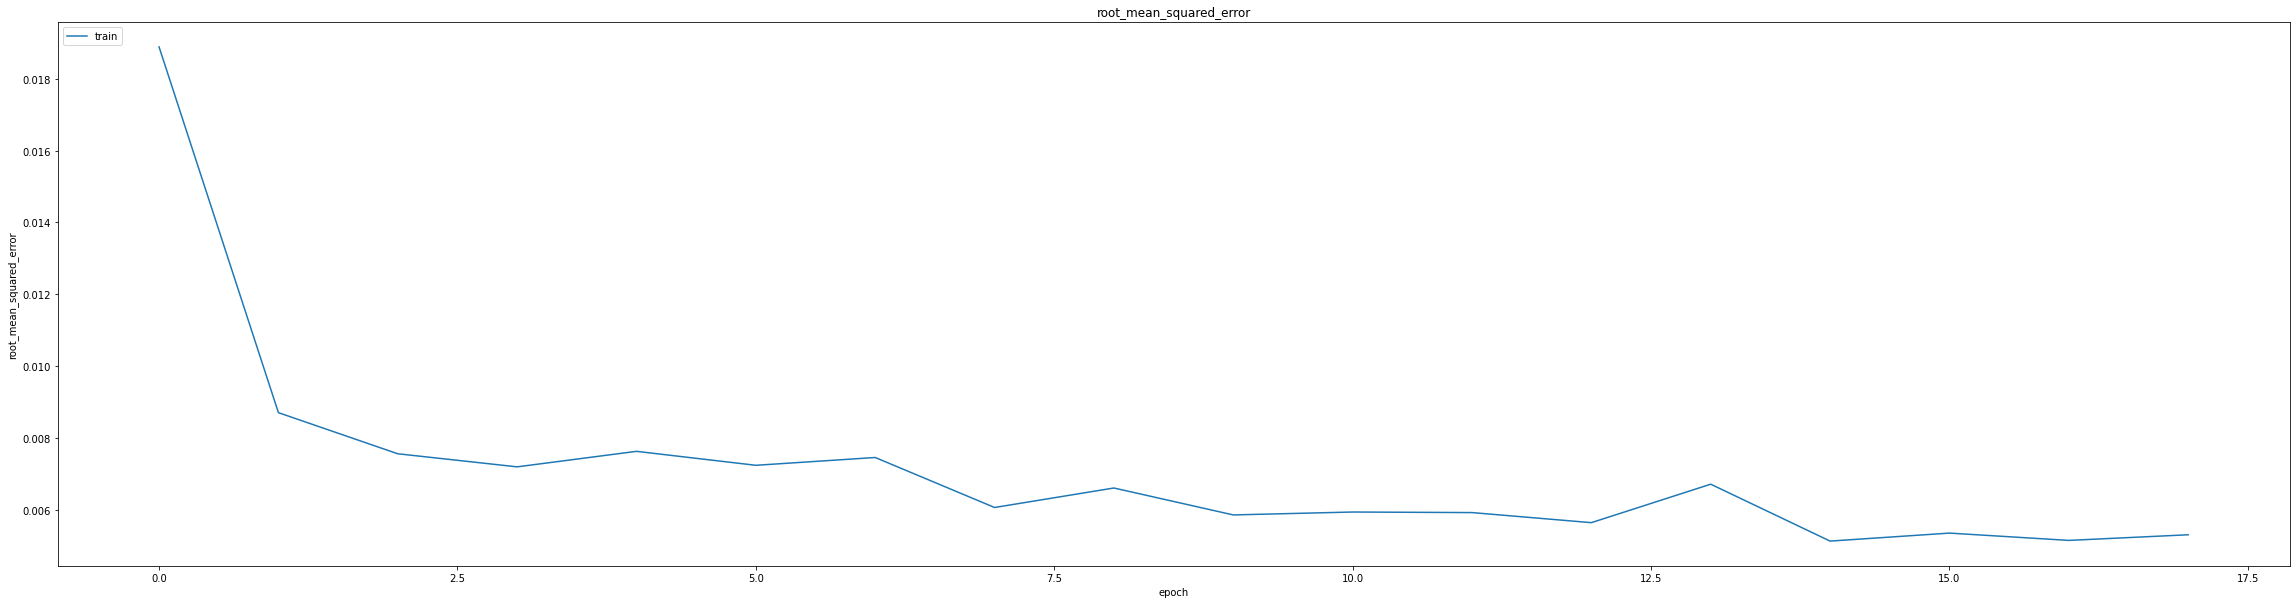

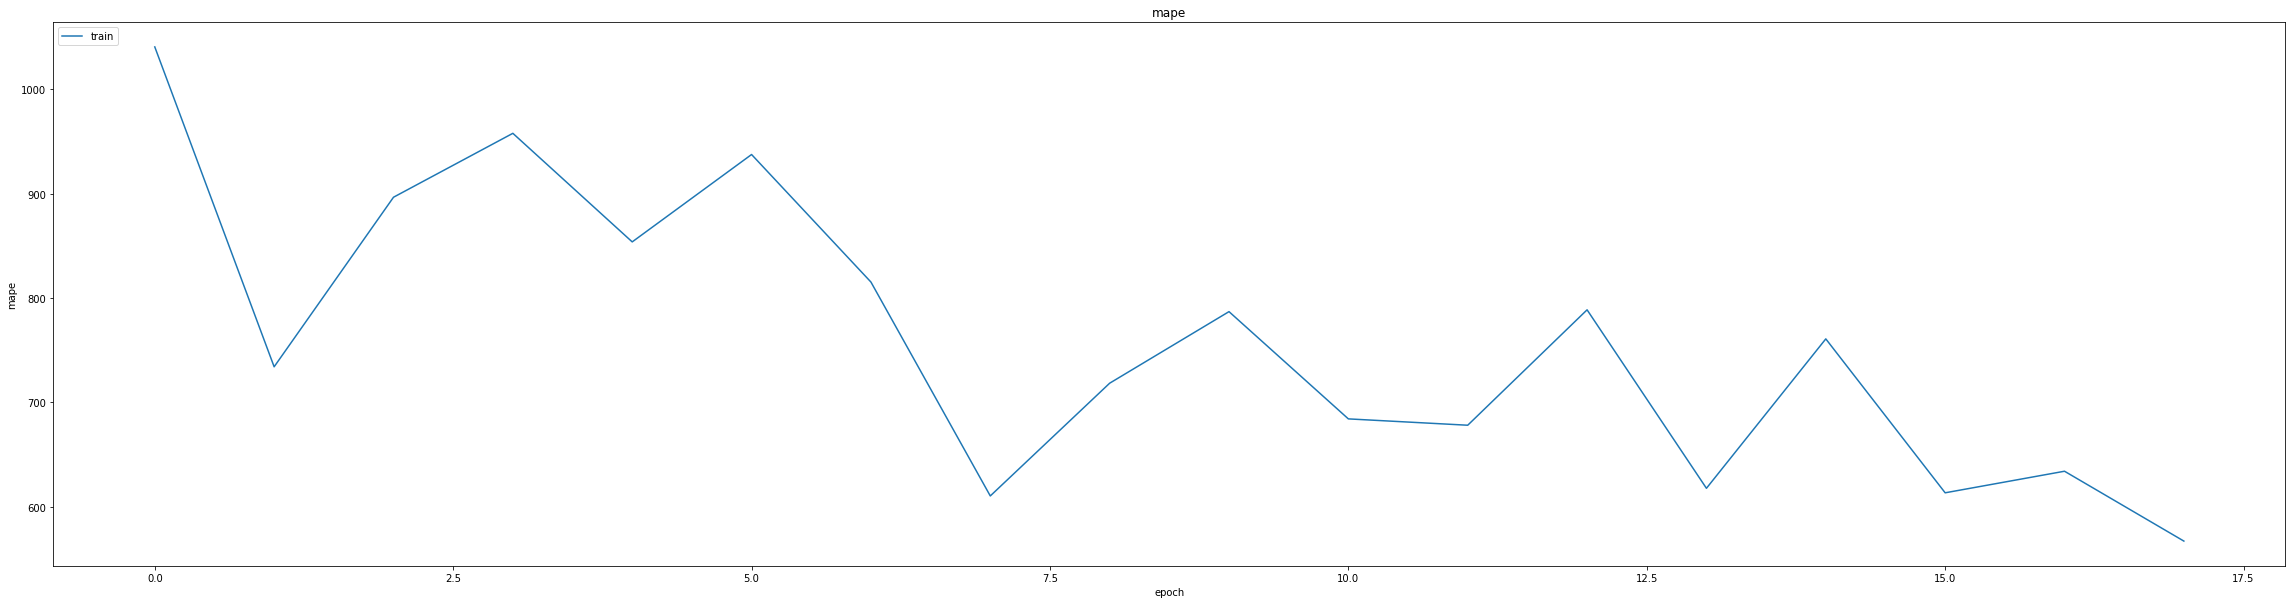

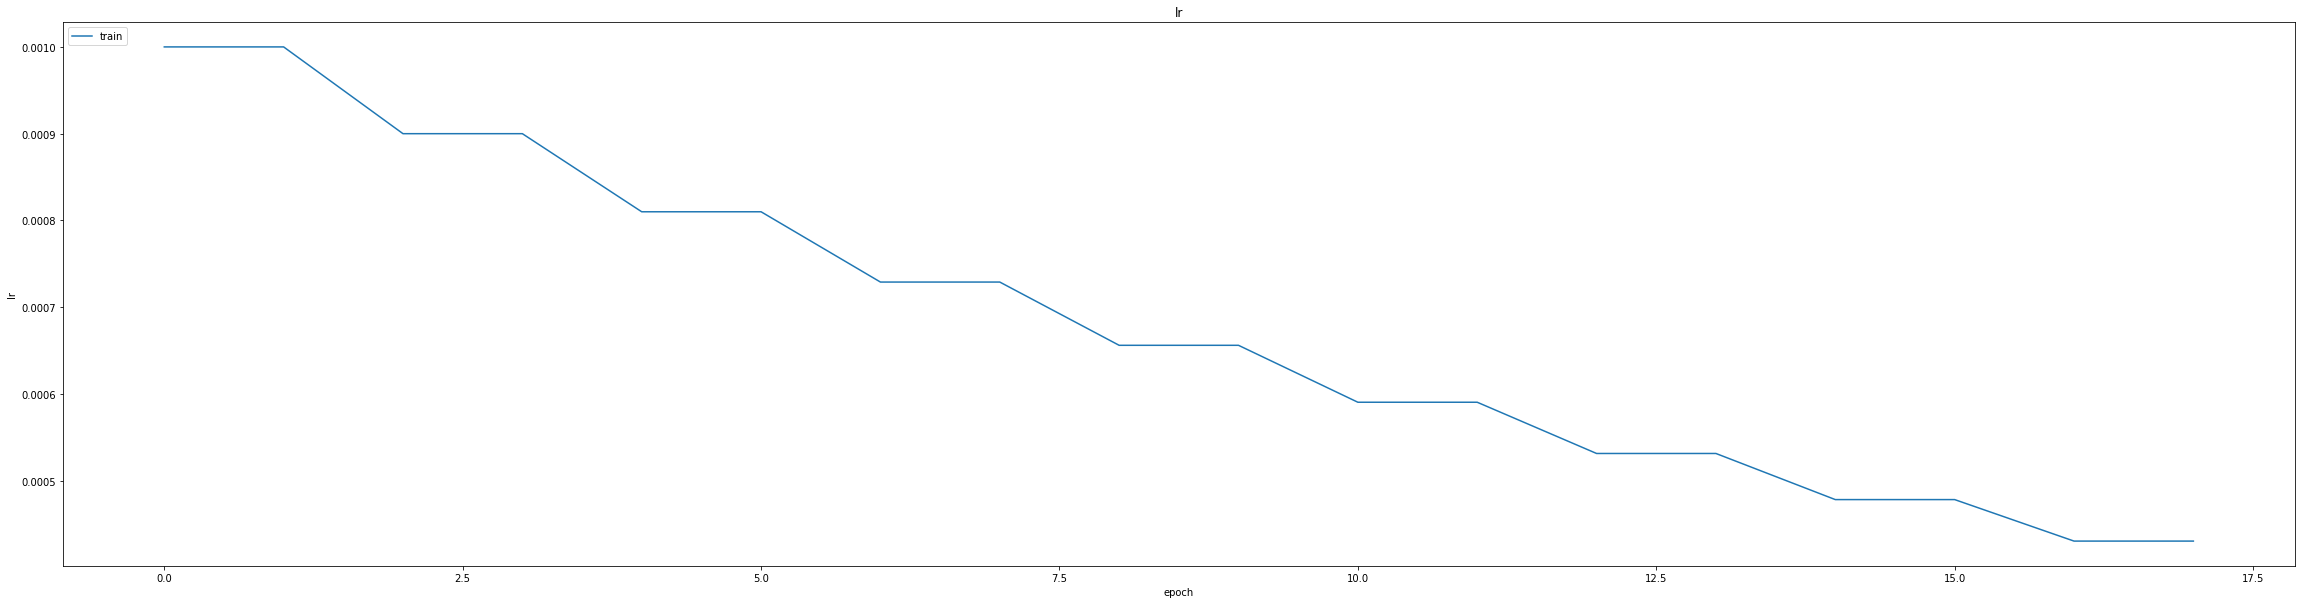

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018580405041575432
0.019876282662153244
464/464 [==============================] - 2s 3ms/step
0.9911032102279315


464/464 [==============================] - 2s 3ms/step


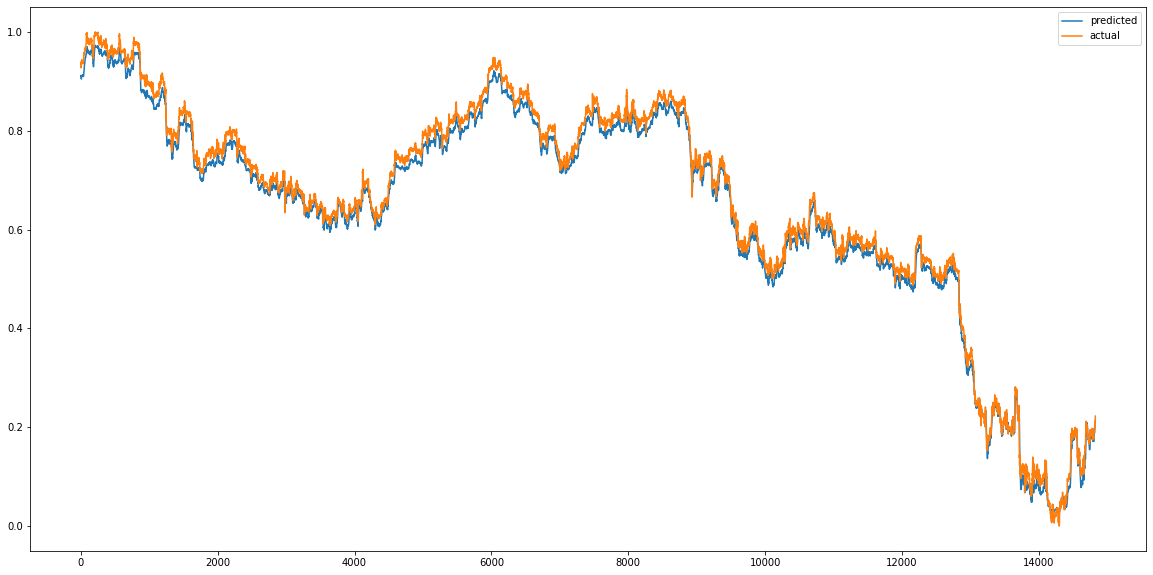

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


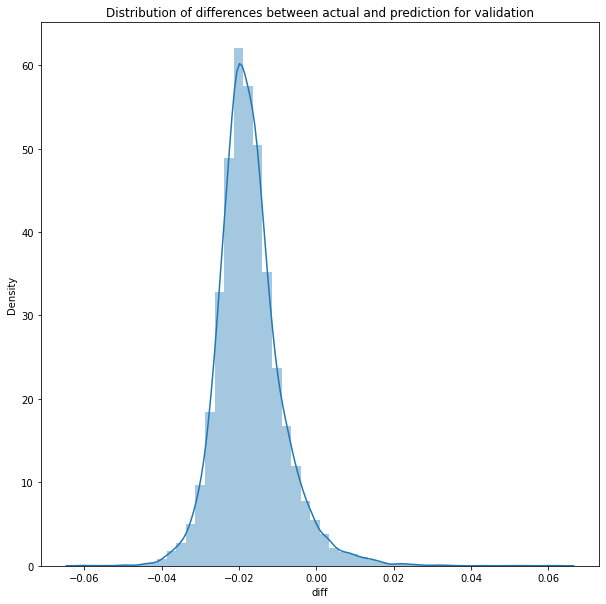

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


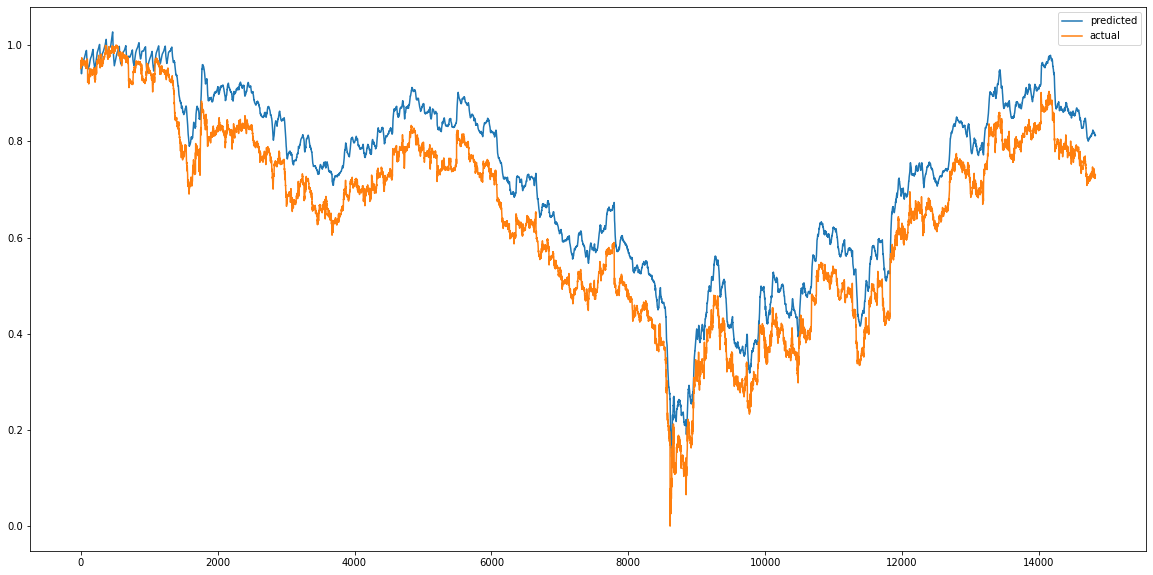

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


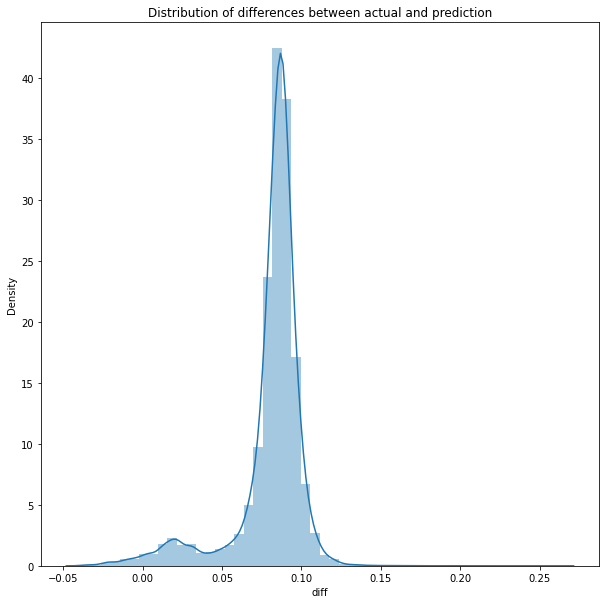

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.006939731889324639
RMSE :  0.08330505320402022
MAE :  0.08064437069718898
464/464 [==============================] - 2s 3ms/step
R2_Score  : 0.8192981522022744


count    14827.000000
mean         0.080331
std          0.022060
min         -0.038306
25%          0.078169
50%          0.085655
75%          0.091089
max          0.261677
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 425.8057 - mae: 3.1385 - mse: 425.8057 - root_mean_squared_error: 20.6351 - mape: 13808.5723
Epoch 1: val_mse improved from inf to 0.03083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 19s 45ms/step - loss: 423.5013 - mae: 3.1223 - mse: 423.5013 - root_mean_squared_error: 20.5791 - mape: 13733.9883 - val_loss: 0.0308 - val_mae: 0.1523 - val_mse: 0.0308 - val_root_mean_squared_error: 0.1756 - val_mape: 26344.2363
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0087 - mae: 0.0712 - mse: 0.0087 - root_mean_squared_error: 0.0931 - mape: 8432.7598
Epoch 2: val_mse improved from 0.03083 to 0.00960, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0086 - mae: 0.0709 - mse: 0.0086 - root_mean_squared_error: 0.0928 - mape: 8363.0098 - val_loss: 0.0096 - val_mae: 0.0890 - val_mse: 0.0096 - val_root_mean_squared_error: 0.0980 - val_mape: 20643.6582
Epoch 3/75
344/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0322 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 7222.6338
Epoch 3: val_mse improved from 0.00960 to 0.00705, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0021 - mae: 0.0322 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 7142.1035 - val_loss: 0.0071 - val_mae: 0.0739 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0840 - val_mape: 19531.4043
Epoch 4/75
344/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 7283.9868
Epoch 4: val_mse improved from 0.00705 to 0.00555, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 7202.7666 - val_loss: 0.0055 - val_mae: 0.0640 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0745 - val_mape: 18801.7266
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 6556.7500
Epoch 5: val_mse improved from 0.00555 to 0.00518, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 6521.3081 - val_loss: 0.0052 - val_mae: 0.0626 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0720 - val_mape: 18212.1719
Epoch 6/75
342/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0208 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 6332.5913
Epoch 6: val_mse improved from 0.00518 to 0.00466, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 0.0010 - mae: 0.0208 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 6225.6714 - val_loss: 0.0047 - val_mae: 0.0591 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0683 - val_mape: 17703.9883
Epoch 7/75
344/348 [============================>.] - ETA: 0s - loss: 9.1671e-04 - mae: 0.0194 - mse: 9.1671e-04 - root_mean_squared_error: 0.0303 - mape: 5919.3994
Epoch 7: val_mse improved from 0.00466 to 0.00393, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 9.1460e-04 - mae: 0.0194 - mse: 9.1460e-04 - root_mean_squared_error: 0.0302 - mape: 5853.3794 - val_loss: 0.0039 - val_mae: 0.0527 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 17209.4355
Epoch 8/75
347/348 [============================>.] - ETA: 0s - loss: 8.1342e-04 - mae: 0.0181 - mse: 8.1342e-04 - root_mean_squared_error: 0.0285 - mape: 5745.7002
Epoch 8: val_mse improved from 0.00393 to 0.00341, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 8.1478e-04 - mae: 0.0181 - mse: 8.1478e-04 - root_mean_squared_error: 0.0285 - mape: 5731.1436 - val_loss: 0.0034 - val_mae: 0.0481 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0584 - val_mape: 16707.4082
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 7.4323e-04 - mae: 0.0173 - mse: 7.4323e-04 - root_mean_squared_error: 0.0273 - mape: 5540.7285
Epoch 9: val_mse improved from 0.00341 to 0.00315, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 7.4323e-04 - mae: 0.0173 - mse: 7.4323e-04 - root_mean_squared_error: 0.0273 - mape: 5540.7285 - val_loss: 0.0031 - val_mae: 0.0462 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 16151.4863
Epoch 10/75
343/348 [============================>.] - ETA: 0s - loss: 6.7786e-04 - mae: 0.0165 - mse: 6.7786e-04 - root_mean_squared_error: 0.0260 - mape: 5599.7480
Epoch 10: val_mse improved from 0.00315 to 0.00306, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 6.7687e-04 - mae: 0.0165 - mse: 6.7687e-04 - root_mean_squared_error: 0.0260 - mape: 5521.2061 - val_loss: 0.0031 - val_mae: 0.0464 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 15580.0342
Epoch 11/75
344/348 [============================>.] - ETA: 0s - loss: 6.1121e-04 - mae: 0.0157 - mse: 6.1121e-04 - root_mean_squared_error: 0.0247 - mape: 5522.8169
Epoch 11: val_mse improved from 0.00306 to 0.00251, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.1039e-04 - mae: 0.0157 - mse: 6.1039e-04 - root_mean_squared_error: 0.0247 - mape: 5461.2246 - val_loss: 0.0025 - val_mae: 0.0406 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 14977.2100
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 5.3489e-04 - mae: 0.0150 - mse: 5.3489e-04 - root_mean_squared_error: 0.0231 - mape: 5250.1509
Epoch 12: val_mse improved from 0.00251 to 0.00181, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 5.3525e-04 - mae: 0.0150 - mse: 5.3525e-04 - root_mean_squared_error: 0.0231 - mape: 5221.7700 - val_loss: 0.0018 - val_mae: 0.0350 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 12893.2900
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 3.8390e-04 - mae: 0.0139 - mse: 3.8390e-04 - root_mean_squared_error: 0.0196 - mape: 4047.2407
Epoch 13: val_mse improved from 0.00181 to 0.00157, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 3.8404e-04 - mae: 0.0139 - mse: 3.8404e-04 - root_mean_squared_error: 0.0196 - mape: 4036.9919 - val_loss: 0.0016 - val_mae: 0.0361 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 9230.8154
Epoch 14/75
343/348 [============================>.] - ETA: 0s - loss: 2.9950e-04 - mae: 0.0130 - mse: 2.9950e-04 - root_mean_squared_error: 0.0173 - mape: 3018.8381
Epoch 14: val_mse improved from 0.00157 to 0.00153, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 2.9899e-04 - mae: 0.0130 - mse: 2.9899e-04 - root_mean_squared_error: 0.0173 - mape: 2976.5112 - val_loss: 0.0015 - val_mae: 0.0365 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0391 - val_mape: 6544.9614
Epoch 15/75
345/348 [============================>.] - ETA: 0s - loss: 2.4618e-04 - mae: 0.0121 - mse: 2.4618e-04 - root_mean_squared_error: 0.0157 - mape: 2135.5874
Epoch 15: val_mse improved from 0.00153 to 0.00138, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 2.4613e-04 - mae: 0.0121 - mse: 2.4613e-04 - root_mean_squared_error: 0.0157 - mape: 2117.9082 - val_loss: 0.0014 - val_mae: 0.0346 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 5126.4717
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 2.2301e-04 - mae: 0.0116 - mse: 2.2301e-04 - root_mean_squared_error: 0.0149 - mape: 1848.0270
Epoch 16: val_mse improved from 0.00138 to 0.00122, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 2.2284e-04 - mae: 0.0116 - mse: 2.2284e-04 - root_mean_squared_error: 0.0149 - mape: 1843.3413 - val_loss: 0.0012 - val_mae: 0.0325 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 4683.3242
Epoch 17/75
344/348 [============================>.] - ETA: 0s - loss: 2.0409e-04 - mae: 0.0111 - mse: 2.0409e-04 - root_mean_squared_error: 0.0143 - mape: 1711.8121
Epoch 17: val_mse improved from 0.00122 to 0.00114, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 2.0380e-04 - mae: 0.0111 - mse: 2.0380e-04 - root_mean_squared_error: 0.0143 - mape: 1692.7288 - val_loss: 0.0011 - val_mae: 0.0315 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 4328.8306
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 1.8315e-04 - mae: 0.0105 - mse: 1.8315e-04 - root_mean_squared_error: 0.0135 - mape: 1554.6942
Epoch 18: val_mse improved from 0.00114 to 0.00100, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 1.8302e-04 - mae: 0.0105 - mse: 1.8302e-04 - root_mean_squared_error: 0.0135 - mape: 1550.7527 - val_loss: 9.9781e-04 - val_mae: 0.0294 - val_mse: 9.9781e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 3947.9338
Epoch 19/75
343/348 [============================>.] - ETA: 0s - loss: 1.6409e-04 - mae: 0.0099 - mse: 1.6409e-04 - root_mean_squared_error: 0.0128 - mape: 1334.7230
Epoch 19: val_mse improved from 0.00100 to 0.00085, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 1.6386e-04 - mae: 0.0099 - mse: 1.6386e-04 - root_mean_squared_error: 0.0128 - mape: 1316.0184 - val_loss: 8.4708e-04 - val_mae: 0.0269 - val_mse: 8.4708e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 3783.6296
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 1.5068e-04 - mae: 0.0096 - mse: 1.5068e-04 - root_mean_squared_error: 0.0123 - mape: 1374.7440
Epoch 20: val_mse did not improve from 0.00085
348/348 [==============================] - 3s 10ms/step - loss: 1.5060e-04 - mae: 0.0096 - mse: 1.5060e-04 - root_mean_squared_error: 0.0123 - mape: 1355.4822 - val_loss: 0.0014 - val_mae: 0.0350 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 3545.3289
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 1.3998e-04 - mae: 0.0092 - mse: 1.3998e-04 - root_mean_squared_error: 0.0118 - mape: 1606.9969
Epoch 21: val_mse did not improve from 0.00085
348/348 [========

348/348 [==============================] - 10s 28ms/step - loss: 1.0979e-04 - mae: 0.0082 - mse: 1.0979e-04 - root_mean_squared_error: 0.0105 - mape: 1085.1643 - val_loss: 8.0505e-04 - val_mae: 0.0262 - val_mse: 8.0505e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 3111.5723
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 1.0433e-04 - mae: 0.0080 - mse: 1.0433e-04 - root_mean_squared_error: 0.0102 - mape: 1065.8300
Epoch 25: val_mse did not improve from 0.00081
348/348 [==============================] - 3s 10ms/step - loss: 1.0433e-04 - mae: 0.0080 - mse: 1.0433e-04 - root_mean_squared_error: 0.0102 - mape: 1065.8300 - val_loss: 9.1386e-04 - val_mae: 0.0284 - val_mse: 9.1386e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2875.5850
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 9.7747e-05 - mae: 0.0077 - mse: 9.7747e-05 - root_mean_squared_error: 0.0099 - mape: 994.6956 
Epoch 26: val_mse did not improve from 0.00081
348/348 [

348/348 [==============================] - 10s 30ms/step - loss: 4.5100e-05 - mae: 0.0052 - mse: 4.5100e-05 - root_mean_squared_error: 0.0067 - mape: 625.4047 - val_loss: 7.0655e-04 - val_mae: 0.0253 - val_mse: 7.0655e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1885.0380
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 4.6505e-05 - mae: 0.0053 - mse: 4.6505e-05 - root_mean_squared_error: 0.0068 - mape: 833.6483
Epoch 43: val_mse did not improve from 0.00071
348/348 [==============================] - 3s 10ms/step - loss: 4.6505e-05 - mae: 0.0053 - mse: 4.6505e-05 - root_mean_squared_error: 0.0068 - mape: 833.6483 - val_loss: 8.9397e-04 - val_mae: 0.0285 - val_mse: 8.9397e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 1909.9148
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 4.3693e-05 - mae: 0.0051 - mse: 4.3693e-05 - root_mean_squared_error: 0.0066 - mape: 672.5395
Epoch 44: val_mse did not improve from 0.00071
348/348 [====

348/348 [==============================] - 10s 30ms/step - loss: 4.4636e-05 - mae: 0.0052 - mse: 4.4636e-05 - root_mean_squared_error: 0.0067 - mape: 544.2599 - val_loss: 6.6733e-04 - val_mae: 0.0245 - val_mse: 6.6733e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 1614.9445
Epoch 48/75
343/348 [============================>.] - ETA: 0s - loss: 4.4656e-05 - mae: 0.0052 - mse: 4.4656e-05 - root_mean_squared_error: 0.0067 - mape: 618.2499
Epoch 48: val_mse did not improve from 0.00067
348/348 [==============================] - 3s 10ms/step - loss: 4.4742e-05 - mae: 0.0052 - mse: 4.4742e-05 - root_mean_squared_error: 0.0067 - mape: 609.5880 - val_loss: 0.0011 - val_mae: 0.0311 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 1784.1396
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 4.1621e-05 - mae: 0.0050 - mse: 4.1621e-05 - root_mean_squared_error: 0.0065 - mape: 771.9000
Epoch 49: val_mse did not improve from 0.00067
348/348 [============

348/348 [==============================] - 10s 30ms/step - loss: 4.3935e-05 - mae: 0.0051 - mse: 4.3935e-05 - root_mean_squared_error: 0.0066 - mape: 721.3658 - val_loss: 6.1772e-04 - val_mae: 0.0238 - val_mse: 6.1772e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 1720.4476
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 4.1057e-05 - mae: 0.0050 - mse: 4.1057e-05 - root_mean_squared_error: 0.0064 - mape: 766.6431
Epoch 51: val_mse did not improve from 0.00062
348/348 [==============================] - 3s 10ms/step - loss: 4.1002e-05 - mae: 0.0050 - mse: 4.1002e-05 - root_mean_squared_error: 0.0064 - mape: 762.4987 - val_loss: 8.9274e-04 - val_mae: 0.0289 - val_mse: 8.9274e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 1607.5070
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 4.3312e-05 - mae: 0.0051 - mse: 4.3312e-05 - root_mean_squared_error: 0.0066 - mape: 843.6310
Epoch 52: val_mse did not improve from 0.00062
348/348 [====

348/348 [==============================] - 10s 28ms/step - loss: 4.7608e-05 - mae: 0.0054 - mse: 4.7608e-05 - root_mean_squared_error: 0.0069 - mape: 730.5298 - val_loss: 5.7220e-04 - val_mae: 0.0228 - val_mse: 5.7220e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 1701.6993
Epoch 63/75
346/348 [============================>.] - ETA: 0s - loss: 4.5463e-05 - mae: 0.0052 - mse: 4.5463e-05 - root_mean_squared_error: 0.0067 - mape: 599.1725
Epoch 63: val_mse did not improve from 0.00057
348/348 [==============================] - 3s 10ms/step - loss: 4.5957e-05 - mae: 0.0053 - mse: 4.5957e-05 - root_mean_squared_error: 0.0068 - mape: 595.9390 - val_loss: 0.0012 - val_mae: 0.0334 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 1612.6908
Epoch 64/75
345/348 [============================>.] - ETA: 0s - loss: 4.8214e-05 - mae: 0.0055 - mse: 4.8214e-05 - root_mean_squared_error: 0.0069 - mape: 584.3807
Epoch 64: val_mse improved from 0.00057 to 0.00043, saving model to 

348/348 [==============================] - 11s 30ms/step - loss: 4.8512e-05 - mae: 0.0055 - mse: 4.8512e-05 - root_mean_squared_error: 0.0070 - mape: 579.5484 - val_loss: 4.3482e-04 - val_mae: 0.0196 - val_mse: 4.3482e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 1449.2070
Epoch 65/75
345/348 [============================>.] - ETA: 0s - loss: 5.4445e-05 - mae: 0.0058 - mse: 5.4445e-05 - root_mean_squared_error: 0.0074 - mape: 669.2624
Epoch 65: val_mse improved from 0.00043 to 0.00042, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 5.4600e-05 - mae: 0.0058 - mse: 5.4600e-05 - root_mean_squared_error: 0.0074 - mape: 663.7264 - val_loss: 4.1858e-04 - val_mae: 0.0192 - val_mse: 4.1858e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 1676.8398
Epoch 66/75
345/348 [============================>.] - ETA: 0s - loss: 4.5498e-05 - mae: 0.0052 - mse: 4.5498e-05 - root_mean_squared_error: 0.0067 - mape: 797.2133
Epoch 66: val_mse did not improve from 0.00042
348/348 [==============================] - 3s 10ms/step - loss: 4.5359e-05 - mae: 0.0052 - mse: 4.5359e-05 - root_mean_squared_error: 0.0067 - mape: 790.6138 - val_loss: 7.0594e-04 - val_mae: 0.0259 - val_mse: 7.0594e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1287.3680
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 6.0832e-05 - mae: 0.0060 - mse: 6.0832e-05 - root_mean_squared_error: 0.0078 - mape: 656.2977
Epoch 67: val_mse did not improve from 0.00042
348/348 [====

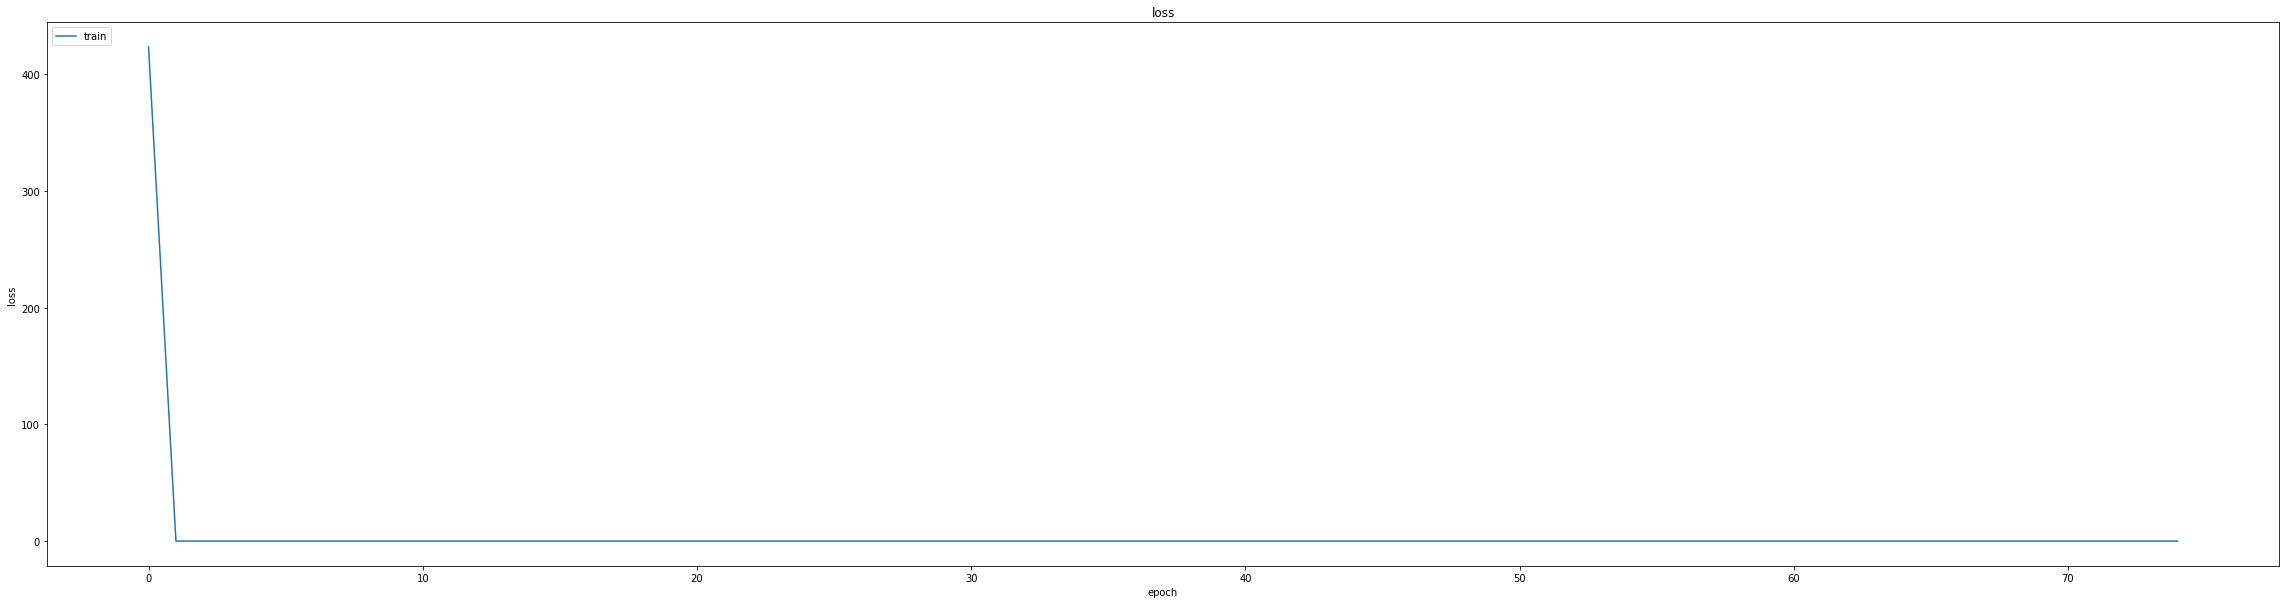

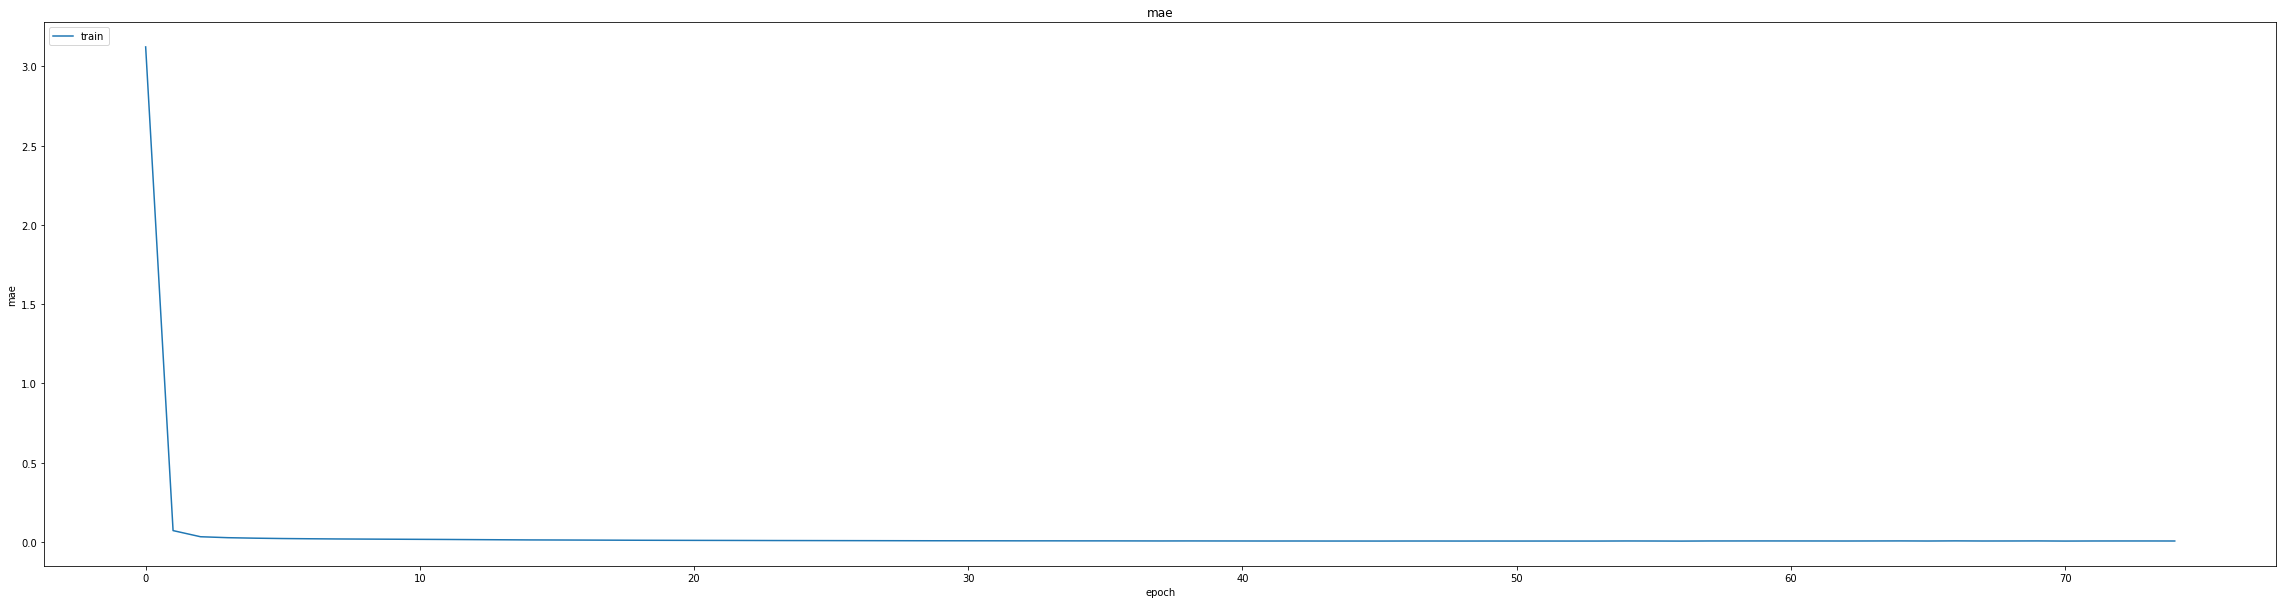

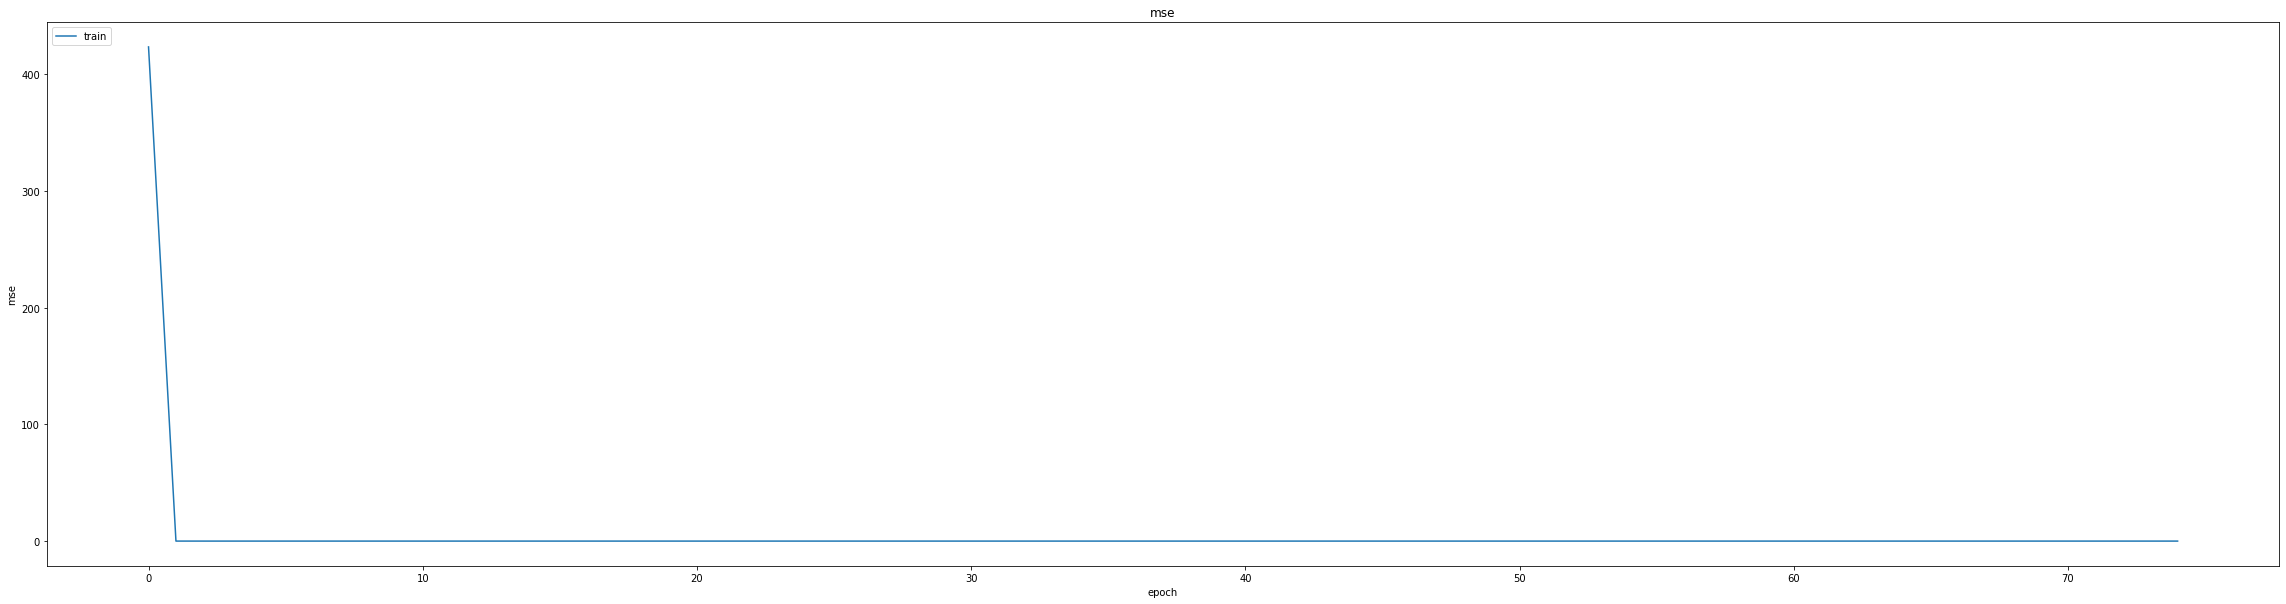

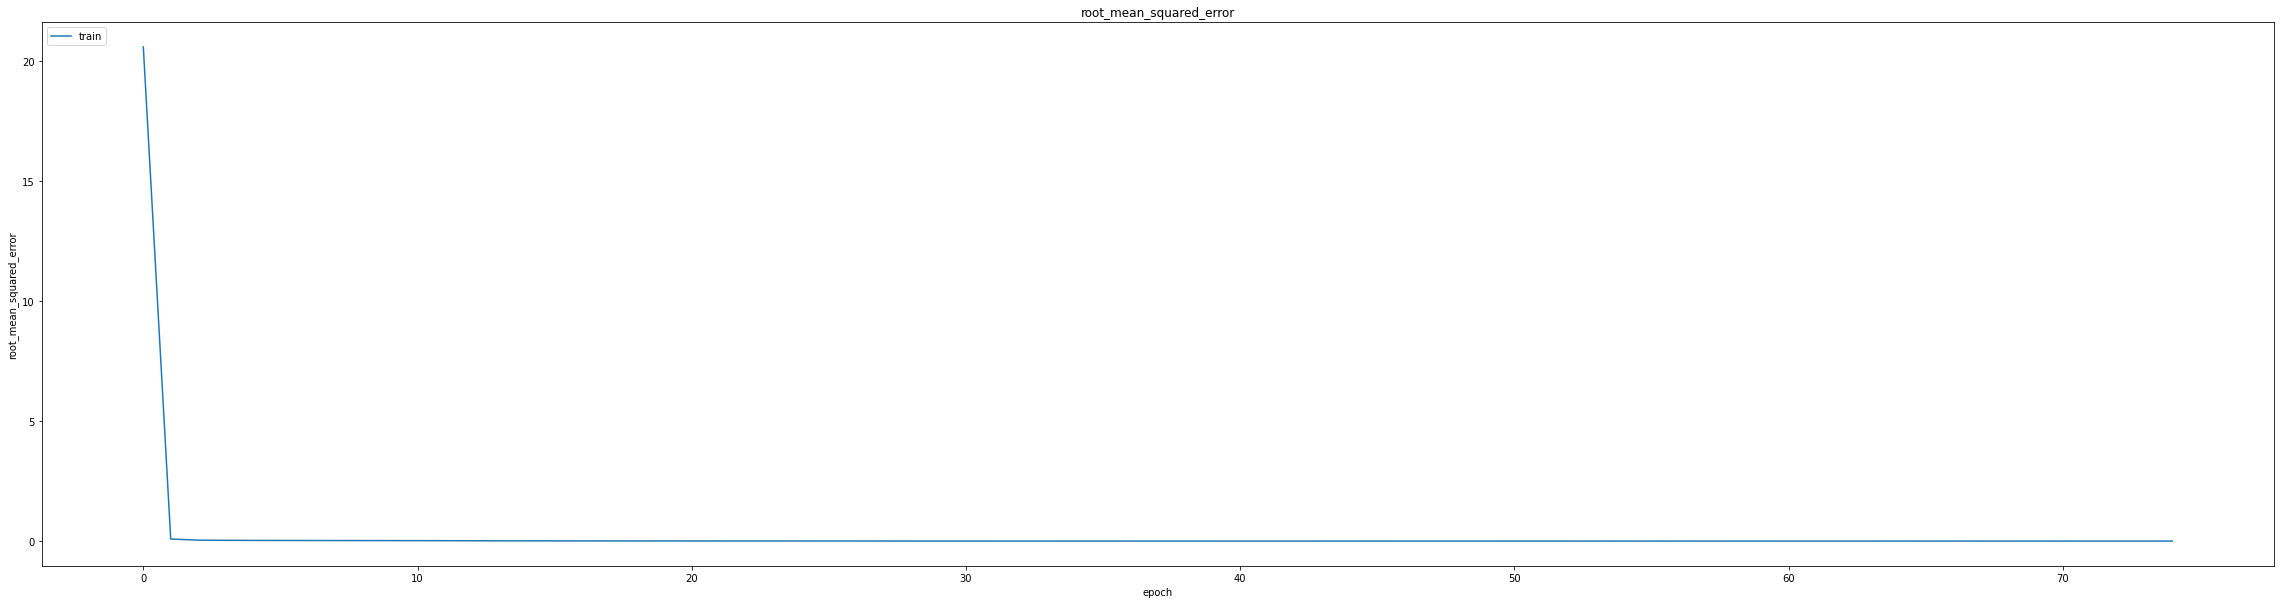

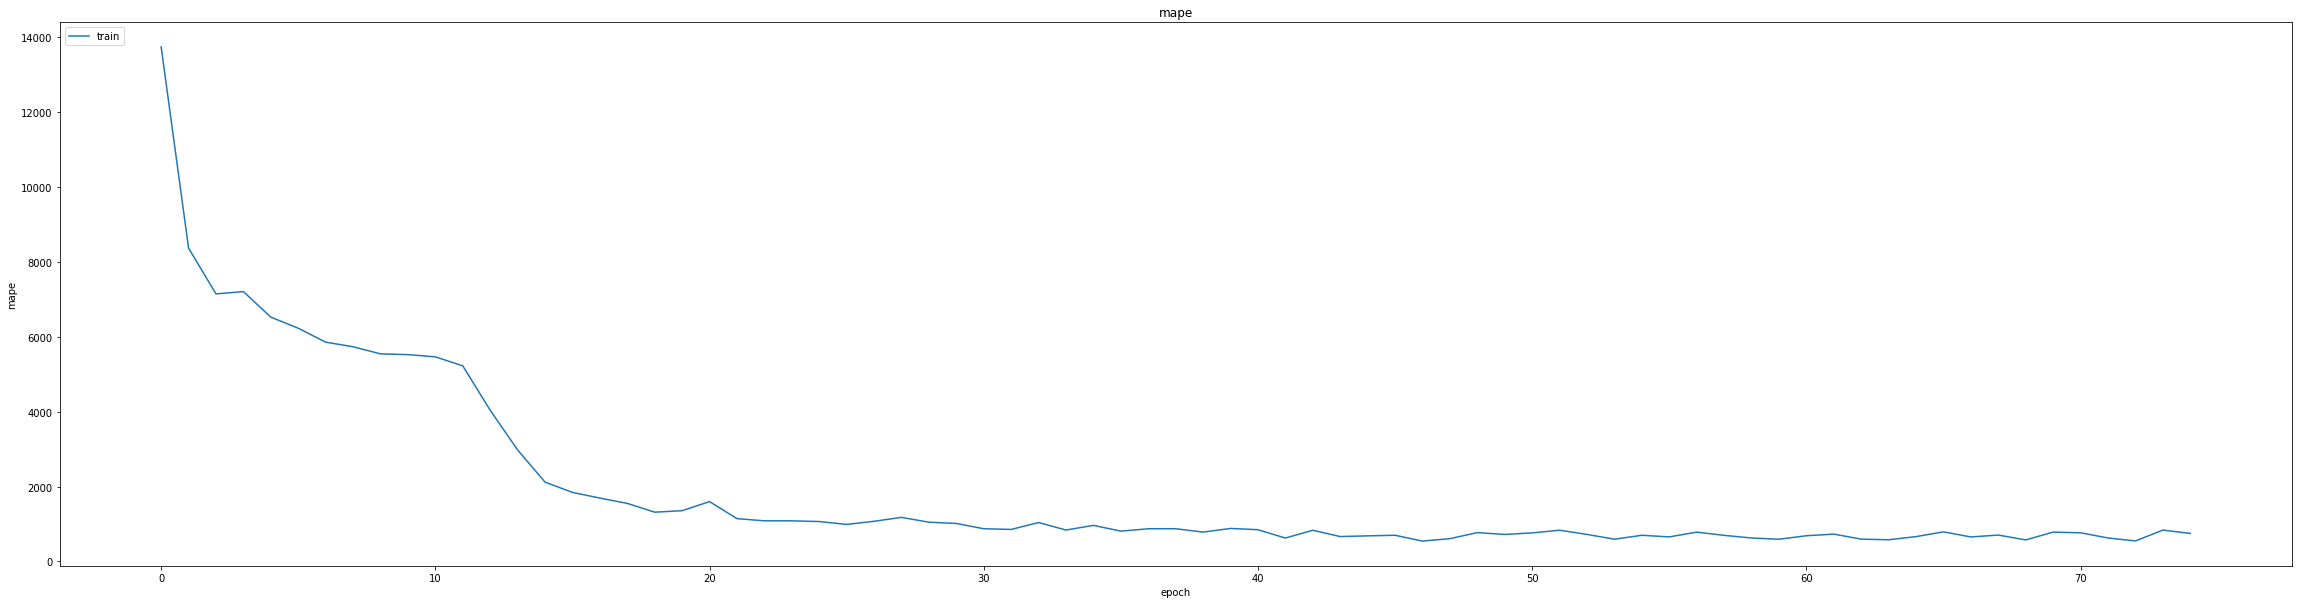

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019229449331760406
0.020459258928894997
464/464 [==============================] - 2s 3ms/step
0.9847704349884501


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
342/348 [============================>.] - ETA: 0s - loss: 3.5944e-04 - mae: 0.0082 - mse: 3.5944e-04 - root_mean_squared_error: 0.0190 - mape: 878.9154
Epoch 1: val_mse did not improve from 0.00042
348/348 [==============================] - 7s 12ms/step - loss: 3.5377e-04 - mae: 0.0082 - mse: 3.5377e-04 - root_mean_squared_error: 0.0188 - mape: 864.0651 - val_loss: 6.6089e-04 - val_mae: 0.0248 - val_mse: 6.6089e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 1781.2812 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 2.5341e-05 - mae: 0.0037 - mse: 2.5341e-05 - root_mean_squared_error: 0.0050 - mape: 798.5414
Epoch 2: val_mse did not improve from 0.00042
348/348 [==============================] - 3s 9ms/step - loss: 2.5301e-05 - mae: 0.0037 - mse: 2.5301e-05 - root_mean_squared_error: 0.0050 - mape: 789.6360 - val_loss: 7.7856e-04 - val_mae: 0.0266 - val_mse: 7.7856e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 1753.0870 - lr: 

348/348 [==============================] - 11s 31ms/step - loss: 2.6835e-05 - mae: 0.0039 - mse: 2.6835e-05 - root_mean_squared_error: 0.0052 - mape: 610.0082 - val_loss: 3.9649e-04 - val_mae: 0.0187 - val_mse: 3.9649e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 1639.1793 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
345/348 [============================>.] - ETA: 0s - loss: 2.5571e-05 - mae: 0.0039 - mse: 2.5571e-05 - root_mean_squared_error: 0.0051 - mape: 593.7734
Epoch 13: val_mse did not improve from 0.00040
348/348 [==============================] - 4s 12ms/step - loss: 2.5529e-05 - mae: 0.0039 - mse: 2.5529e-05 - root_mean_squared_error: 0.0051 - mape: 588.8599 - val_loss: 5.3234e-04 - val_mae: 0.0219 - val_mse: 5.3234e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 1676.5339 - lr: 5.3144e-04
Epoch 14/25
345/348 [============================>.] - ETA: 0s - loss: 2.6657e-05 - mae: 0.0039 - mse: 2.6657e-05 - root_mean_squared_error: 0.0052 - mape:

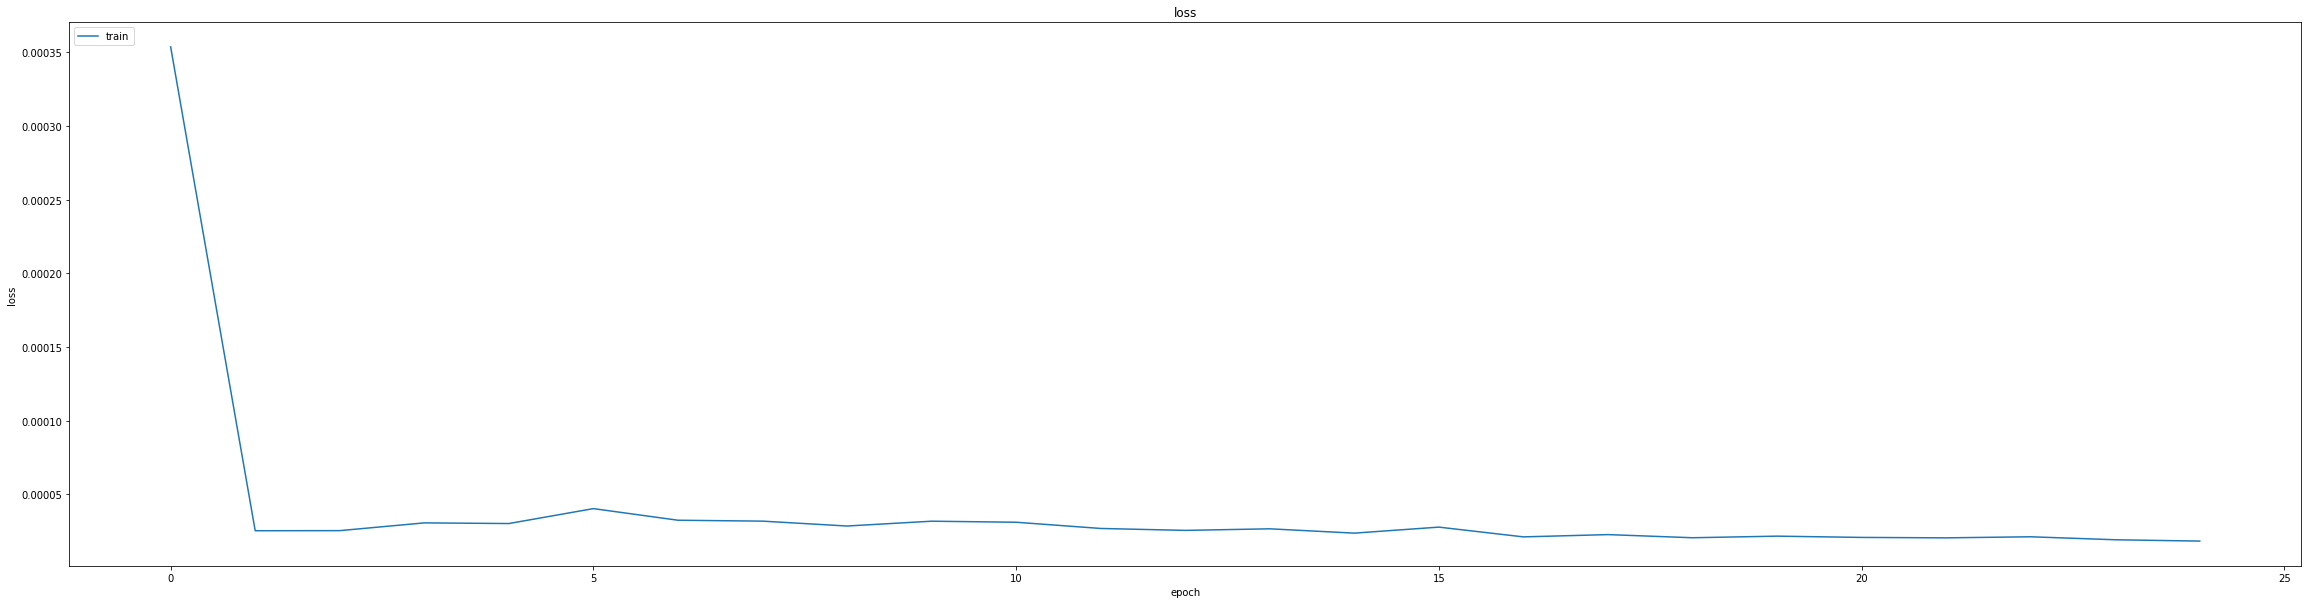

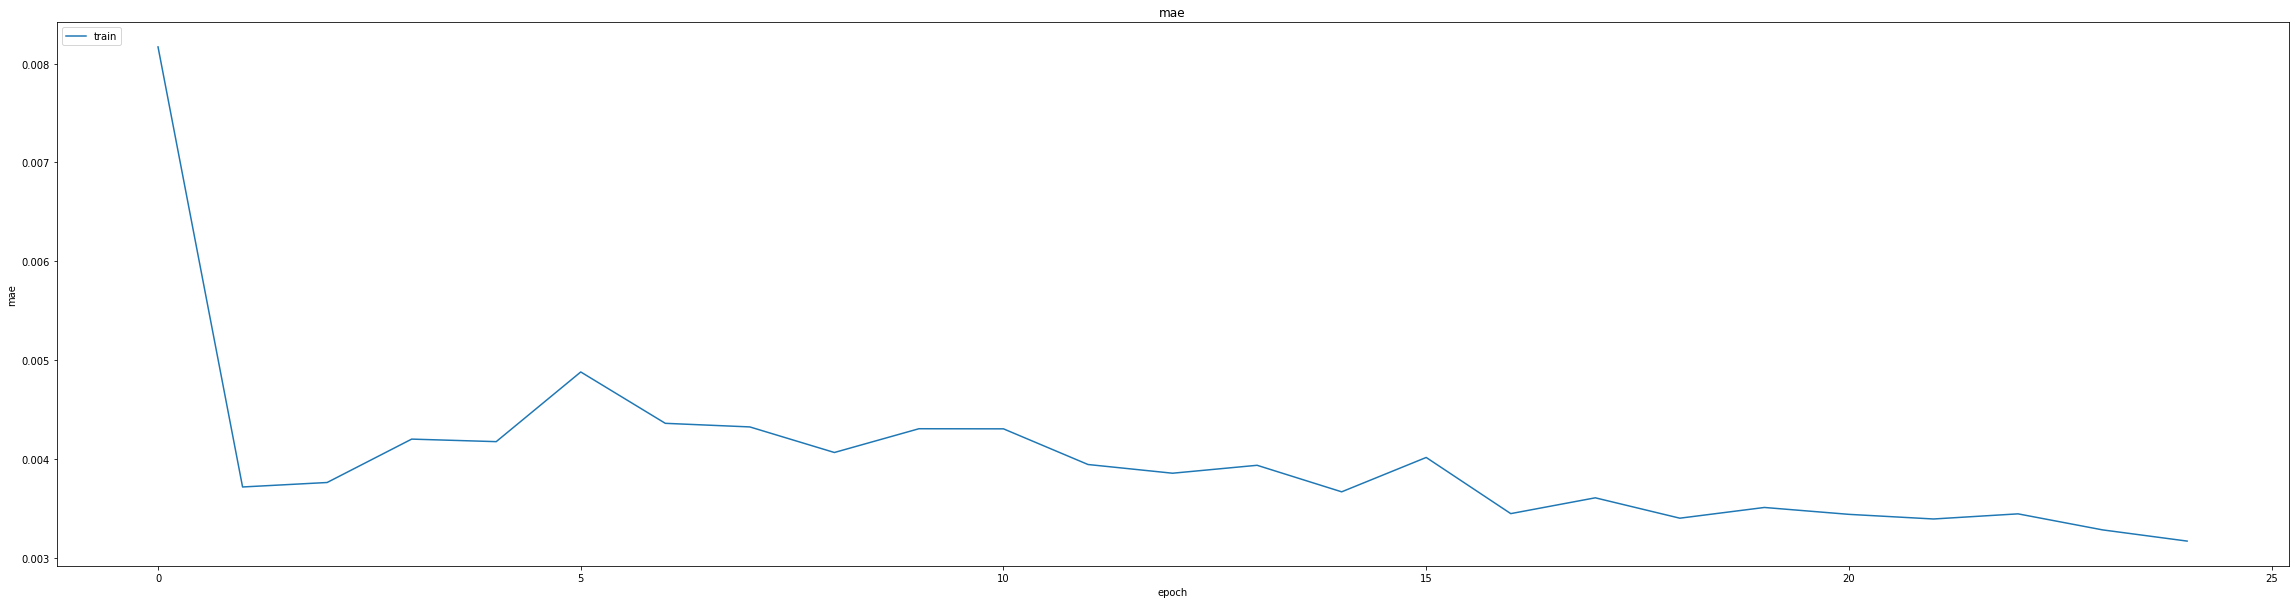

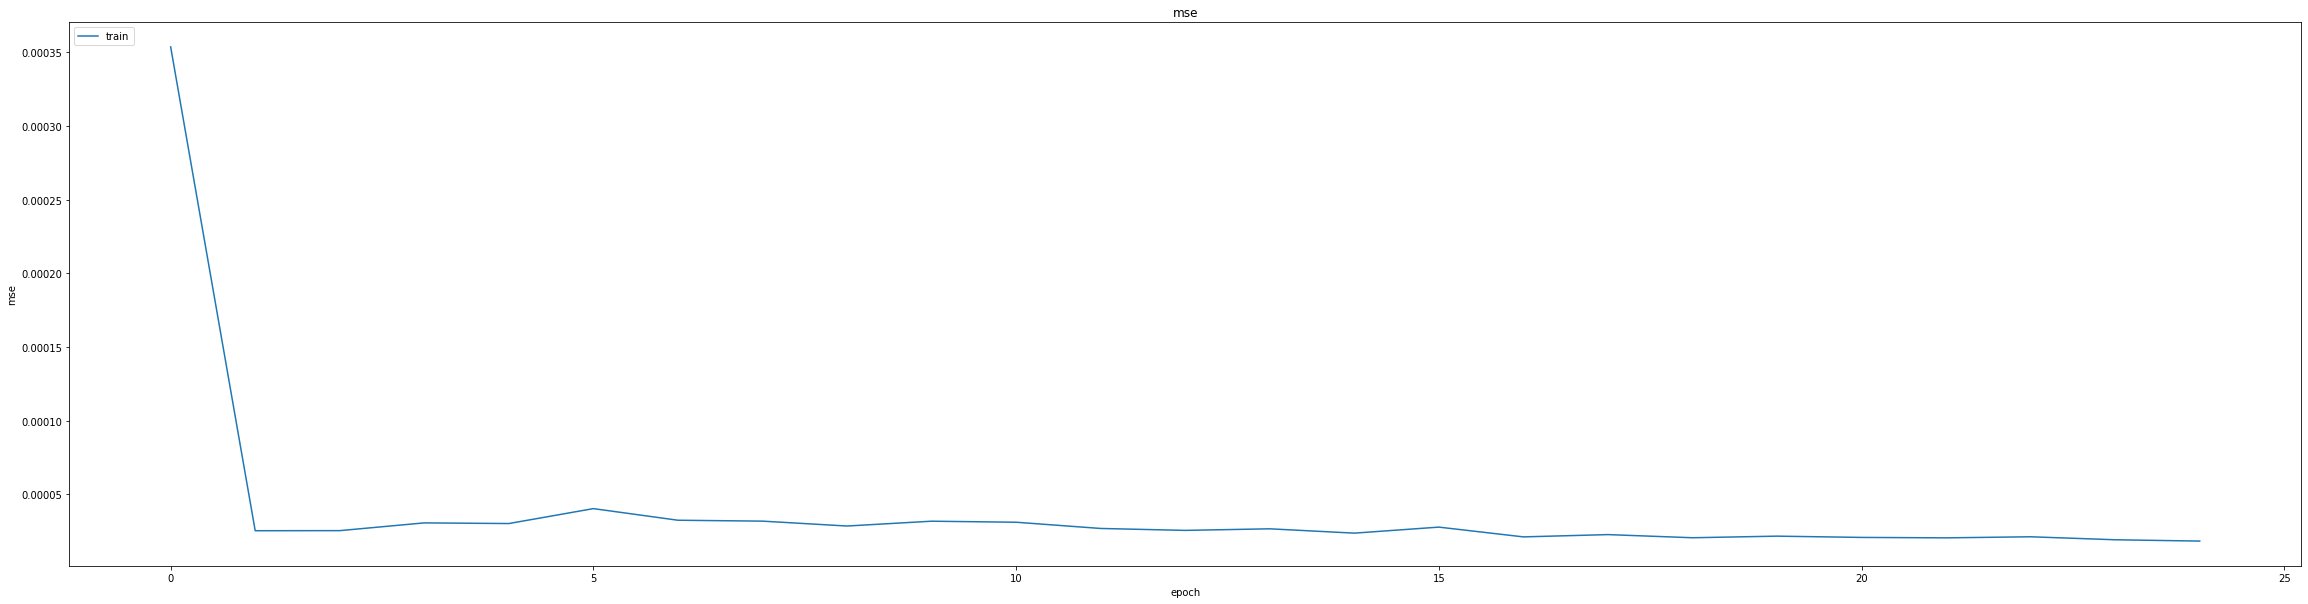

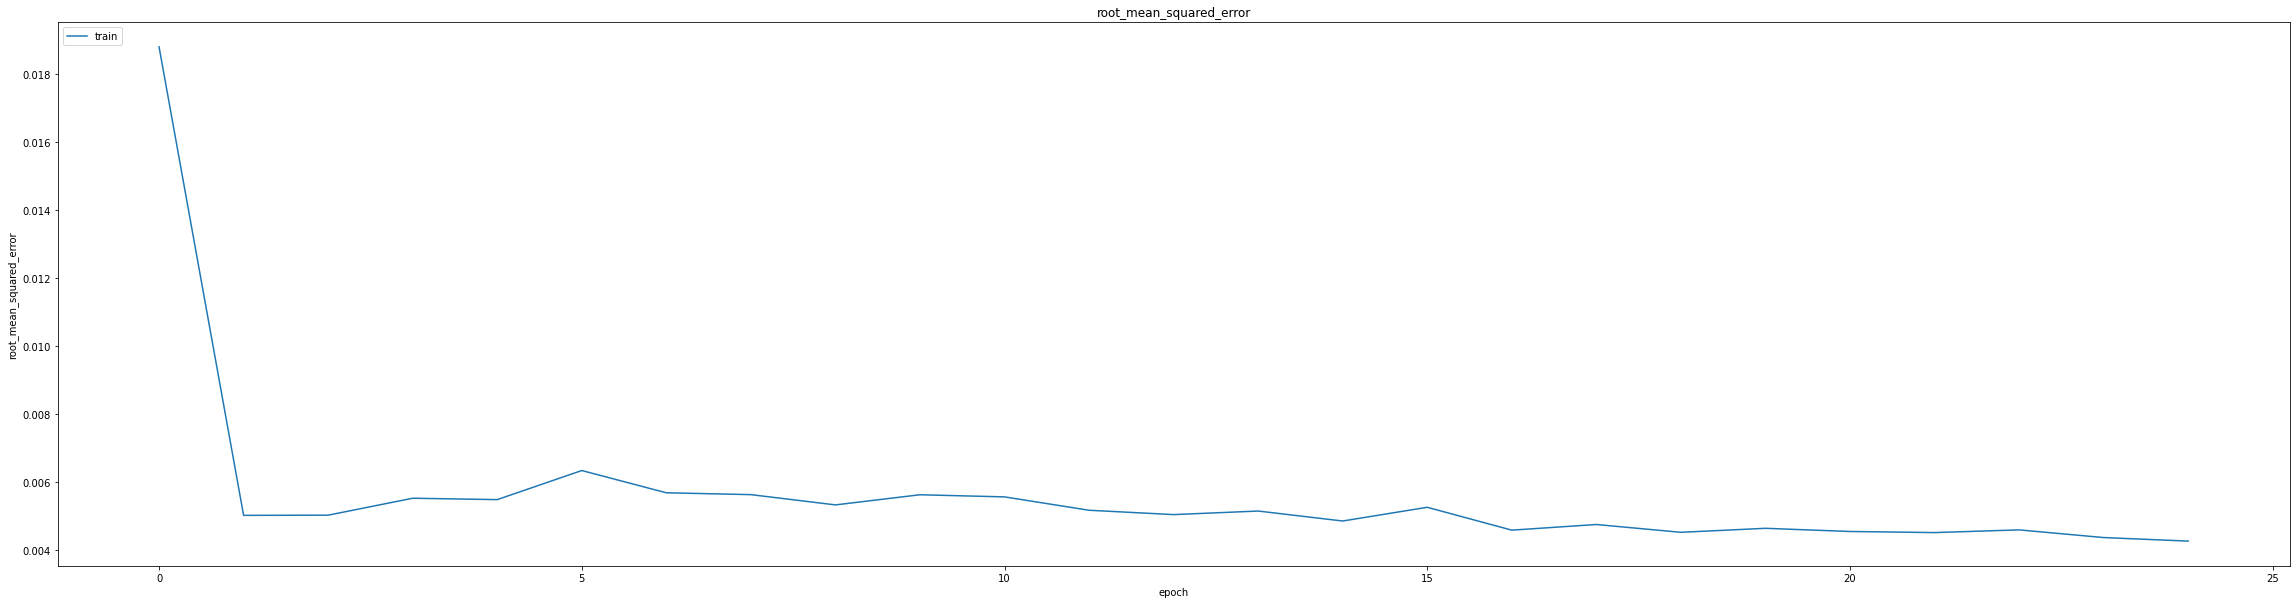

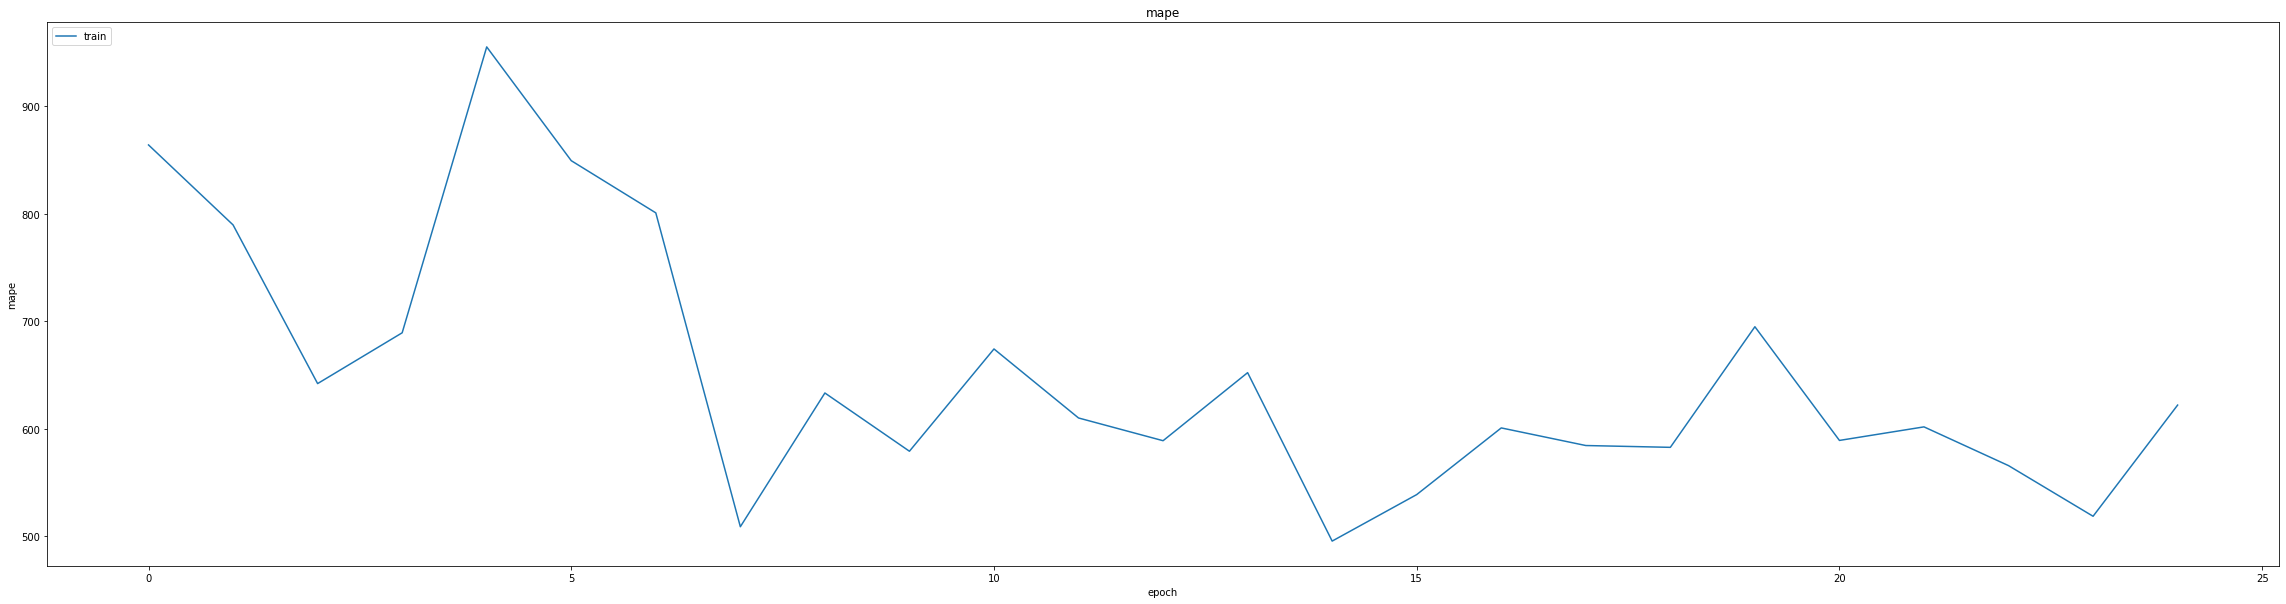

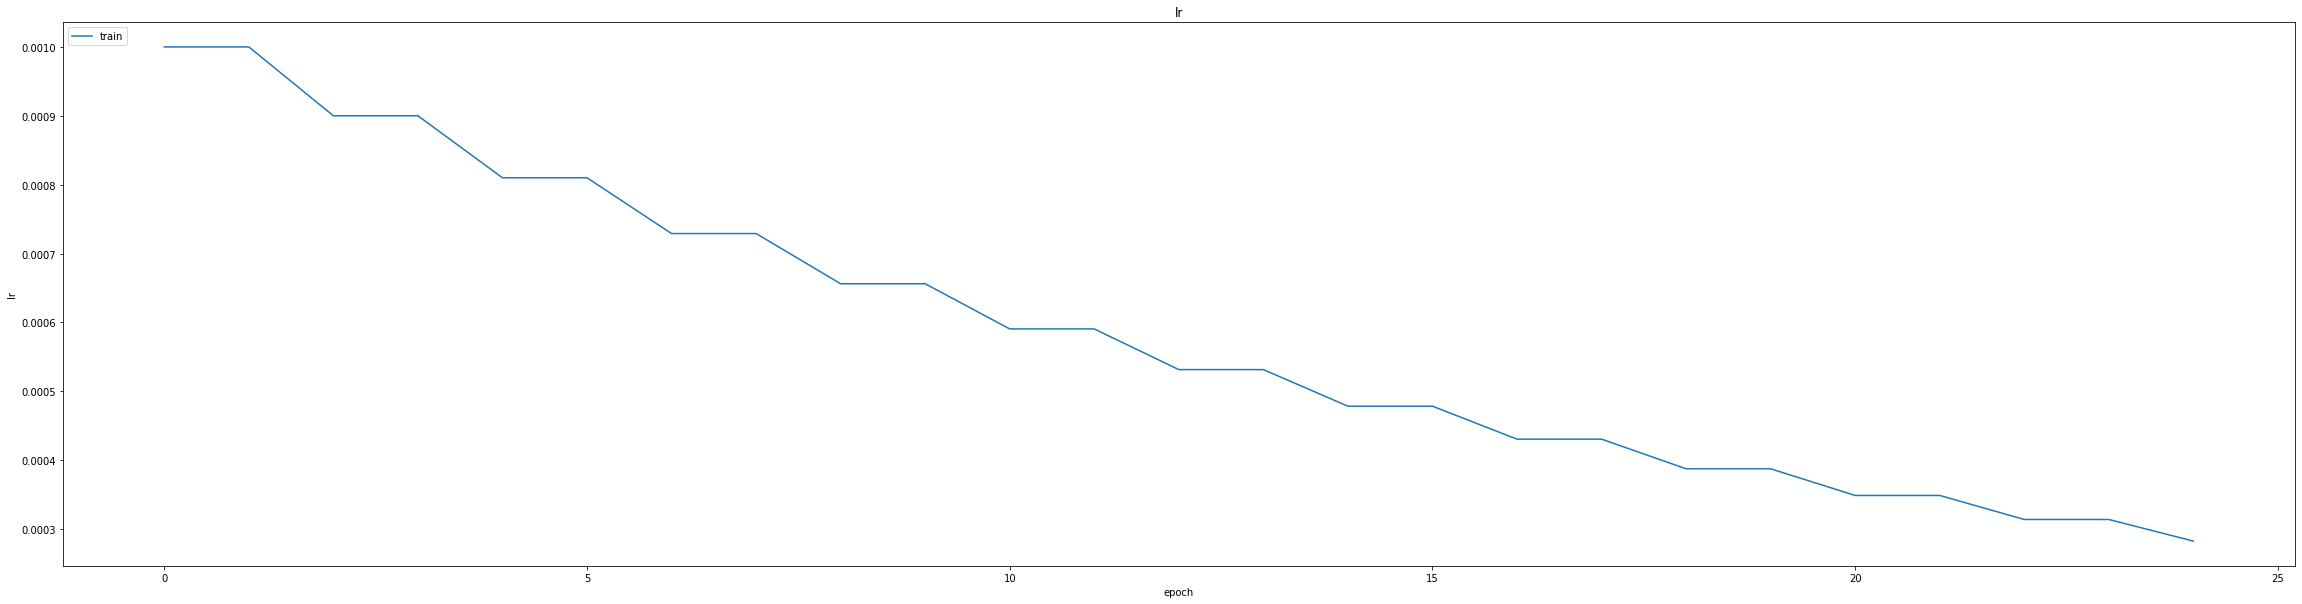

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01865720935165882
0.019912121817469597
464/464 [==============================] - 2s 3ms/step
0.9832625379513933


464/464 [==============================] - 2s 3ms/step


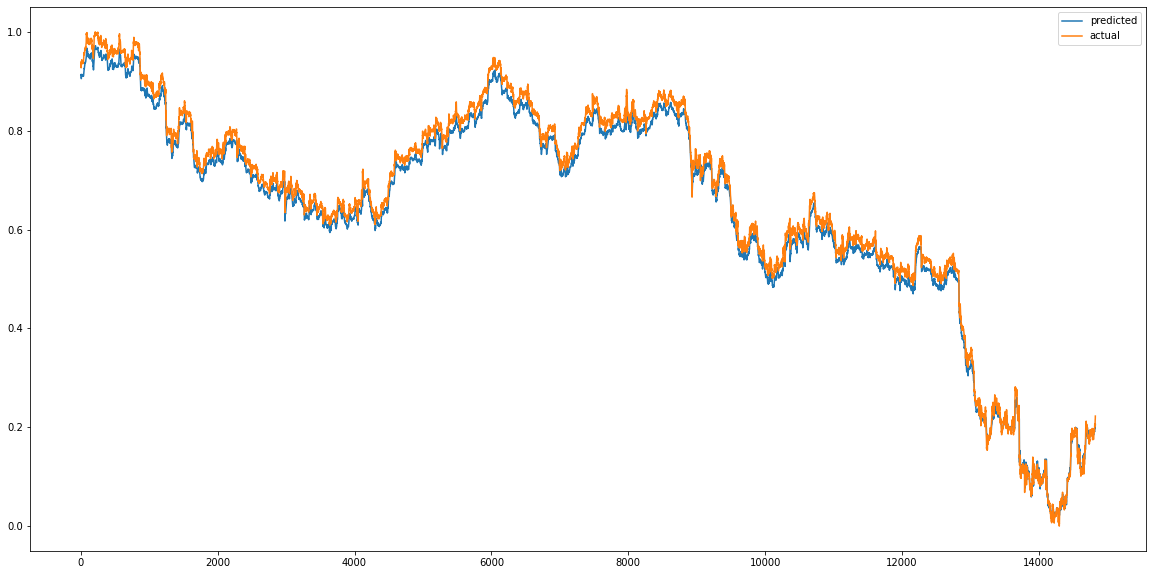

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


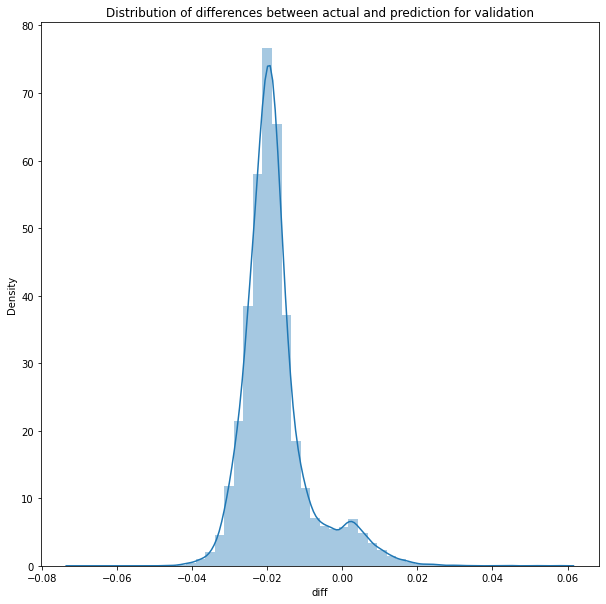

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 1s 3ms/step


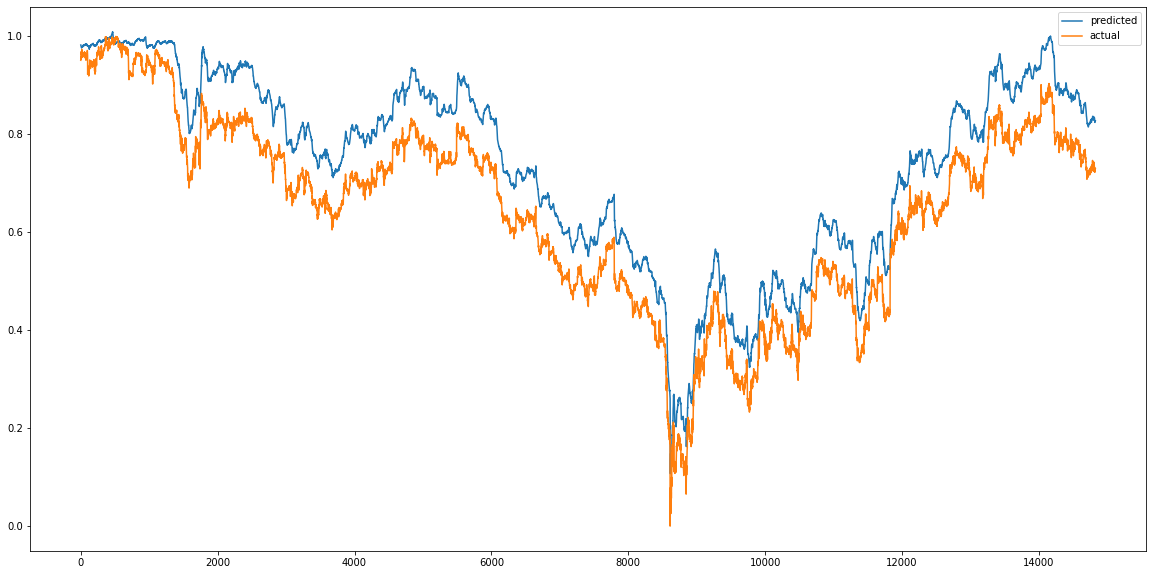

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


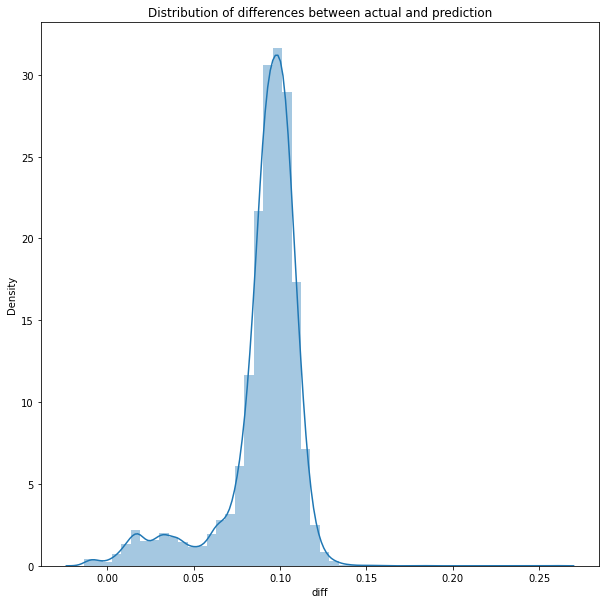

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.008634036039893657
RMSE :  0.09291951377344619
MAE :  0.09012786496272096
464/464 [==============================] - 2s 3ms/step
R2_Score  : 0.775180613435871


count    14827.000000
mean         0.090059
std          0.022878
min         -0.013628
25%          0.086145
50%          0.095289
75%          0.103219
max          0.259874
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 257.9474 - mae: 2.7073 - mse: 257.9474 - root_mean_squared_error: 16.0607 - mape: 21304.5547
Epoch 1: val_mse improved from inf to 0.07278, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 59s 129ms/step - loss: 256.5519 - mae: 2.6940 - mse: 256.5519 - root_mean_squared_error: 16.0172 - mape: 21189.6348 - val_loss: 0.0728 - val_mae: 0.1855 - val_mse: 0.0728 - val_root_mean_squared_error: 0.2698 - val_mape: 55922.8203
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.0617 - mae: 0.1997 - mse: 0.0617 - root_mean_squared_error: 0.2483 - mape: 17007.2988
Epoch 2: val_mse improved from 0.07278 to 0.05738, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 44s 126ms/step - loss: 0.0617 - mae: 0.1997 - mse: 0.0617 - root_mean_squared_error: 0.2483 - mape: 16964.2637 - val_loss: 0.0574 - val_mae: 0.1822 - val_mse: 0.0574 - val_root_mean_squared_error: 0.2395 - val_mape: 47519.5859
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0512 - mae: 0.1899 - mse: 0.0512 - root_mean_squared_error: 0.2263 - mape: 18829.9238
Epoch 3: val_mse improved from 0.05738 to 0.05707, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0512 - mae: 0.1899 - mse: 0.0512 - root_mean_squared_error: 0.2263 - mape: 18829.9238 - val_loss: 0.0571 - val_mae: 0.1879 - val_mse: 0.0571 - val_root_mean_squared_error: 0.2389 - val_mape: 44816.5000
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0492 - mae: 0.1872 - mse: 0.0492 - root_mean_squared_error: 0.2218 - mape: 15691.8096
Epoch 4: val_mse improved from 0.05707 to 0.05440, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0492 - mae: 0.1872 - mse: 0.0492 - root_mean_squared_error: 0.2218 - mape: 15691.8096 - val_loss: 0.0544 - val_mae: 0.1837 - val_mse: 0.0544 - val_root_mean_squared_error: 0.2332 - val_mape: 43587.9336
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0467 - mae: 0.1825 - mse: 0.0467 - root_mean_squared_error: 0.2161 - mape: 13535.9844
Epoch 5: val_mse improved from 0.05440 to 0.05261, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0467 - mae: 0.1825 - mse: 0.0467 - root_mean_squared_error: 0.2161 - mape: 13501.7178 - val_loss: 0.0526 - val_mae: 0.1813 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 42515.7891
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0448 - mae: 0.1787 - mse: 0.0448 - root_mean_squared_error: 0.2116 - mape: 14018.7969
Epoch 6: val_mse improved from 0.05261 to 0.04958, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0448 - mae: 0.1787 - mse: 0.0448 - root_mean_squared_error: 0.2116 - mape: 13983.3135 - val_loss: 0.0496 - val_mae: 0.1747 - val_mse: 0.0496 - val_root_mean_squared_error: 0.2227 - val_mape: 41889.7891
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0415 - mae: 0.1709 - mse: 0.0415 - root_mean_squared_error: 0.2037 - mape: 17588.3828
Epoch 7: val_mse improved from 0.04958 to 0.04551, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0415 - mae: 0.1709 - mse: 0.0415 - root_mean_squared_error: 0.2036 - mape: 17543.8164 - val_loss: 0.0455 - val_mae: 0.1654 - val_mse: 0.0455 - val_root_mean_squared_error: 0.2133 - val_mape: 41036.0508
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1600 - mse: 0.0370 - root_mean_squared_error: 0.1925 - mape: 13736.6328
Epoch 8: val_mse improved from 0.04551 to 0.04007, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0370 - mae: 0.1600 - mse: 0.0370 - root_mean_squared_error: 0.1924 - mape: 13662.4883 - val_loss: 0.0401 - val_mae: 0.1523 - val_mse: 0.0401 - val_root_mean_squared_error: 0.2002 - val_mape: 39839.6016
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0315 - mae: 0.1451 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 12373.9941
Epoch 9: val_mse improved from 0.04007 to 0.03347, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0315 - mae: 0.1451 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 12307.3164 - val_loss: 0.0335 - val_mae: 0.1348 - val_mse: 0.0335 - val_root_mean_squared_error: 0.1830 - val_mape: 38180.7734
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0254 - mae: 0.1271 - mse: 0.0254 - root_mean_squared_error: 0.1594 - mape: 11842.4434
Epoch 10: val_mse improved from 0.03347 to 0.02679, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0254 - mae: 0.1271 - mse: 0.0254 - root_mean_squared_error: 0.1594 - mape: 11842.4434 - val_loss: 0.0268 - val_mae: 0.1141 - val_mse: 0.0268 - val_root_mean_squared_error: 0.1637 - val_mape: 36415.4648
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0198 - mae: 0.1090 - mse: 0.0198 - root_mean_squared_error: 0.1408 - mape: 13384.4824
Epoch 11: val_mse improved from 0.02679 to 0.02118, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0198 - mae: 0.1090 - mse: 0.0198 - root_mean_squared_error: 0.1408 - mape: 13384.4824 - val_loss: 0.0212 - val_mae: 0.0975 - val_mse: 0.0212 - val_root_mean_squared_error: 0.1455 - val_mape: 34063.4609
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0153 - mae: 0.0947 - mse: 0.0153 - root_mean_squared_error: 0.1239 - mape: 11258.8232
Epoch 12: val_mse improved from 0.02118 to 0.01599, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0153 - mae: 0.0947 - mse: 0.0153 - root_mean_squared_error: 0.1239 - mape: 11230.3096 - val_loss: 0.0160 - val_mae: 0.0844 - val_mse: 0.0160 - val_root_mean_squared_error: 0.1265 - val_mape: 31115.3359
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0126 - mae: 0.0861 - mse: 0.0126 - root_mean_squared_error: 0.1122 - mape: 10327.9307
Epoch 13: val_mse improved from 0.01599 to 0.01334, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0126 - mae: 0.0860 - mse: 0.0126 - root_mean_squared_error: 0.1122 - mape: 10272.1514 - val_loss: 0.0133 - val_mae: 0.0805 - val_mse: 0.0133 - val_root_mean_squared_error: 0.1155 - val_mape: 28871.5996
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0113 - mae: 0.0817 - mse: 0.0113 - root_mean_squared_error: 0.1064 - mape: 9787.8281
Epoch 14: val_mse improved from 0.01334 to 0.01119, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0113 - mae: 0.0817 - mse: 0.0113 - root_mean_squared_error: 0.1064 - mape: 9763.0322 - val_loss: 0.0112 - val_mae: 0.0720 - val_mse: 0.0112 - val_root_mean_squared_error: 0.1058 - val_mape: 27239.2383
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0775 - mse: 0.0102 - root_mean_squared_error: 0.1010 - mape: 9719.2744
Epoch 15: val_mse improved from 0.01119 to 0.01067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0102 - mae: 0.0775 - mse: 0.0102 - root_mean_squared_error: 0.1010 - mape: 9719.2744 - val_loss: 0.0107 - val_mae: 0.0763 - val_mse: 0.0107 - val_root_mean_squared_error: 0.1033 - val_mape: 26148.3379
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.0735 - mse: 0.0092 - root_mean_squared_error: 0.0959 - mape: 9541.2197
Epoch 16: val_mse improved from 0.01067 to 0.00878, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 0.0092 - mae: 0.0735 - mse: 0.0092 - root_mean_squared_error: 0.0959 - mape: 9541.2197 - val_loss: 0.0088 - val_mae: 0.0657 - val_mse: 0.0088 - val_root_mean_squared_error: 0.0937 - val_mape: 25102.8477
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 0.0083 - mae: 0.0695 - mse: 0.0083 - root_mean_squared_error: 0.0909 - mape: 8409.0312
Epoch 17: val_mse improved from 0.00878 to 0.00715, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0083 - mae: 0.0695 - mse: 0.0083 - root_mean_squared_error: 0.0909 - mape: 8363.6123 - val_loss: 0.0072 - val_mae: 0.0549 - val_mse: 0.0072 - val_root_mean_squared_error: 0.0846 - val_mape: 23901.5820
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 0.0073 - mae: 0.0651 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 9228.7676
Epoch 18: val_mse improved from 0.00715 to 0.00612, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0073 - mae: 0.0651 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 9205.3828 - val_loss: 0.0061 - val_mae: 0.0502 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0783 - val_mape: 22586.1230
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0615 - mse: 0.0065 - root_mean_squared_error: 0.0806 - mape: 7911.9048
Epoch 19: val_mse improved from 0.00612 to 0.00479, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0065 - mae: 0.0615 - mse: 0.0065 - root_mean_squared_error: 0.0806 - mape: 7911.9048 - val_loss: 0.0048 - val_mae: 0.0392 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mape: 21276.1797
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0580 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 7681.9321
Epoch 20: val_mse improved from 0.00479 to 0.00445, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0058 - mae: 0.0580 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 7662.4624 - val_loss: 0.0044 - val_mae: 0.0411 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0667 - val_mape: 20238.5977
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0555 - mse: 0.0053 - root_mean_squared_error: 0.0726 - mape: 7250.1104
Epoch 21: val_mse improved from 0.00445 to 0.00433, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0053 - mae: 0.0555 - mse: 0.0053 - root_mean_squared_error: 0.0726 - mape: 7250.1104 - val_loss: 0.0043 - val_mae: 0.0466 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 19471.9766
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0524 - mse: 0.0047 - root_mean_squared_error: 0.0683 - mape: 5761.8755
Epoch 22: val_mse improved from 0.00433 to 0.00387, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0047 - mae: 0.0524 - mse: 0.0047 - root_mean_squared_error: 0.0683 - mape: 5747.2808 - val_loss: 0.0039 - val_mae: 0.0436 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0622 - val_mape: 18685.0840
Epoch 23/75
347/348 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0497 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 7465.8677
Epoch 23: val_mse improved from 0.00387 to 0.00293, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0042 - mae: 0.0497 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 7446.9497 - val_loss: 0.0029 - val_mae: 0.0326 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 18021.6250
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0468 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 6826.9565
Epoch 24: val_mse did not improve from 0.00293
348/348 [==============================] - 7s 20ms/step - loss: 0.0037 - mae: 0.0468 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 6809.6812 - val_loss: 0.0030 - val_mae: 0.0377 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0544 - val_mape: 17498.8047
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0442 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 6336.7896
Epoch 25: val_mse improved from 0.00293 to 0.00290, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 39s 112ms/step - loss: 0.0033 - mae: 0.0442 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 6302.5498 - val_loss: 0.0029 - val_mae: 0.0386 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0539 - val_mape: 17001.5234
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0417 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5727.6382
Epoch 26: val_mse improved from 0.00290 to 0.00209, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0029 - mae: 0.0417 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5713.1187 - val_loss: 0.0021 - val_mae: 0.0249 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 16497.0547
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0391 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 5132.4912
Epoch 27: val_mse improved from 0.00209 to 0.00202, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0026 - mae: 0.0391 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 5132.4912 - val_loss: 0.0020 - val_mae: 0.0272 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 15969.6348
Epoch 28/75
347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 5764.1870
Epoch 28: val_mse improved from 0.00202 to 0.00174, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 5749.5757 - val_loss: 0.0017 - val_mae: 0.0241 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 15368.9961
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0338 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 5268.2349
Epoch 29: val_mse improved from 0.00174 to 0.00141, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0020 - mae: 0.0338 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 5254.8789 - val_loss: 0.0014 - val_mae: 0.0191 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 14746.5488
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 4878.8413
Epoch 30: val_mse improved from 0.00141 to 0.00126, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 4878.8413 - val_loss: 0.0013 - val_mae: 0.0184 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 14121.8701
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 4617.8447
Epoch 31: val_mse did not improve from 0.00126
348/348 [==============================] - 7s 20ms/step - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 4592.9048 - val_loss: 0.0014 - val_mae: 0.0248 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 13509.5830
Epoch 32/75
348/348 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0280 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 4521.1250
Epoch 32: val_mse improved from 0.00126 to 0.00123, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 39s 113ms/step - loss: 0.0013 - mae: 0.0280 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 4521.1250 - val_loss: 0.0012 - val_mae: 0.0236 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 12823.7773
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 4233.5625
Epoch 33: val_mse improved from 0.00123 to 0.00084, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 4222.8335 - val_loss: 8.3520e-04 - val_mae: 0.0158 - val_mse: 8.3520e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 12049.8555
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 3868.4514
Epoch 34: val_mse did not improve from 0.00084
348/348 [==============================] - 7s 21ms/step - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 3858.6636 - val_loss: 9.5436e-04 - val_mae: 0.0207 - val_mse: 9.5436e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 11531.9297
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 8.5491e-04 - mae: 0.0224 - mse: 8.5491e-04 - root_mean_squared_error: 0.0292 - mape: 3459.8872
Epoch 35: val_mse improved from 0.00084 to 0.00062, saving model to /content/

348/348 [==============================] - 39s 113ms/step - loss: 8.5414e-04 - mae: 0.0224 - mse: 8.5414e-04 - root_mean_squared_error: 0.0292 - mape: 3441.1912 - val_loss: 6.1725e-04 - val_mae: 0.0136 - val_mse: 6.1725e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 10858.0566
Epoch 36/75
345/348 [============================>.] - ETA: 0s - loss: 7.3258e-04 - mae: 0.0207 - mse: 7.3258e-04 - root_mean_squared_error: 0.0271 - mape: 4119.9287
Epoch 36: val_mse did not improve from 0.00062
348/348 [==============================] - 7s 19ms/step - loss: 7.3145e-04 - mae: 0.0207 - mse: 7.3145e-04 - root_mean_squared_error: 0.0270 - mape: 4085.8210 - val_loss: 7.3338e-04 - val_mae: 0.0206 - val_mse: 7.3338e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 10030.7061
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 6.2380e-04 - mae: 0.0192 - mse: 6.2380e-04 - root_mean_squared_error: 0.0250 - mape: 3083.3621
Epoch 37: val_mse improved from 0.00062 to 0.00043, s

348/348 [==============================] - 38s 109ms/step - loss: 6.2440e-04 - mae: 0.0192 - mse: 6.2440e-04 - root_mean_squared_error: 0.0250 - mape: 3066.6965 - val_loss: 4.2882e-04 - val_mae: 0.0120 - val_mse: 4.2882e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 9440.4102
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 5.6517e-04 - mae: 0.0183 - mse: 5.6517e-04 - root_mean_squared_error: 0.0238 - mape: 3093.3765
Epoch 38: val_mse improved from 0.00043 to 0.00035, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 5.6515e-04 - mae: 0.0183 - mse: 5.6515e-04 - root_mean_squared_error: 0.0238 - mape: 3067.7810 - val_loss: 3.5444e-04 - val_mae: 0.0106 - val_mse: 3.5444e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 8930.7266
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 4.9445e-04 - mae: 0.0172 - mse: 4.9445e-04 - root_mean_squared_error: 0.0222 - mape: 3623.1672
Epoch 39: val_mse did not improve from 0.00035
348/348 [==============================] - 7s 19ms/step - loss: 4.9419e-04 - mae: 0.0172 - mse: 4.9419e-04 - root_mean_squared_error: 0.0222 - mape: 3613.9792 - val_loss: 6.1848e-04 - val_mae: 0.0203 - val_mse: 6.1848e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 8402.9297
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 4.2092e-04 - mae: 0.0158 - mse: 4.2092e-04 - root_mean_squared_error: 0.0205 - mape: 2654.4861
Epoch 40: val_mse did not improve from 0.00035
348/348 

348/348 [==============================] - 38s 108ms/step - loss: 3.7886e-04 - mae: 0.0151 - mse: 3.7886e-04 - root_mean_squared_error: 0.0195 - mape: 2566.7480 - val_loss: 2.5183e-04 - val_mae: 0.0097 - val_mse: 2.5183e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 7497.1177
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 3.1959e-04 - mae: 0.0138 - mse: 3.1959e-04 - root_mean_squared_error: 0.0179 - mape: 2789.6812
Epoch 43: val_mse did not improve from 0.00025
348/348 [==============================] - 6s 19ms/step - loss: 3.1946e-04 - mae: 0.0138 - mse: 3.1946e-04 - root_mean_squared_error: 0.0179 - mape: 2782.6077 - val_loss: 3.6436e-04 - val_mae: 0.0149 - val_mse: 3.6436e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 7228.8687
Epoch 44/75
347/348 [============================>.] - ETA: 0s - loss: 2.8962e-04 - mae: 0.0131 - mse: 2.8962e-04 - root_mean_squared_error: 0.0170 - mape: 2555.3167
Epoch 44: val_mse improved from 0.00025 to 0.00019, sav

348/348 [==============================] - 38s 109ms/step - loss: 2.8950e-04 - mae: 0.0131 - mse: 2.8950e-04 - root_mean_squared_error: 0.0170 - mape: 2548.8396 - val_loss: 1.8748e-04 - val_mae: 0.0083 - val_mse: 1.8748e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 6902.6348
Epoch 45/75
348/348 [==============================] - ETA: 0s - loss: 2.9161e-04 - mae: 0.0134 - mse: 2.9161e-04 - root_mean_squared_error: 0.0171 - mape: 2013.3151
Epoch 45: val_mse did not improve from 0.00019
348/348 [==============================] - 6s 19ms/step - loss: 2.9161e-04 - mae: 0.0134 - mse: 2.9161e-04 - root_mean_squared_error: 0.0171 - mape: 2013.3151 - val_loss: 1.9460e-04 - val_mae: 0.0092 - val_mse: 1.9460e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 6671.5010
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 2.5205e-04 - mae: 0.0123 - mse: 2.5205e-04 - root_mean_squared_error: 0.0159 - mape: 2518.3408
Epoch 46: val_mse did not improve from 0.00019
348/348 

348/348 [==============================] - 38s 109ms/step - loss: 1.8638e-04 - mae: 0.0108 - mse: 1.8638e-04 - root_mean_squared_error: 0.0137 - mape: 2065.2417 - val_loss: 1.1187e-04 - val_mae: 0.0070 - val_mse: 1.1187e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 5437.5220
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 2.1623e-04 - mae: 0.0115 - mse: 2.1623e-04 - root_mean_squared_error: 0.0147 - mape: 1794.7551
Epoch 53: val_mse did not improve from 0.00011
348/348 [==============================] - 7s 19ms/step - loss: 2.1558e-04 - mae: 0.0115 - mse: 2.1558e-04 - root_mean_squared_error: 0.0147 - mape: 1779.8989 - val_loss: 3.5017e-04 - val_mae: 0.0168 - val_mse: 3.5017e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 5321.7402
Epoch 54/75
345/348 [============================>.] - ETA: 0s - loss: 1.5108e-04 - mae: 0.0096 - mse: 1.5108e-04 - root_mean_squared_error: 0.0123 - mape: 1670.9753
Epoch 54: val_mse did not improve from 0.00011
348/348 

348/348 [==============================] - 38s 109ms/step - loss: 1.6091e-04 - mae: 0.0099 - mse: 1.6091e-04 - root_mean_squared_error: 0.0127 - mape: 1804.9807 - val_loss: 1.0879e-04 - val_mae: 0.0071 - val_mse: 1.0879e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 5057.3931
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 1.7251e-04 - mae: 0.0103 - mse: 1.7251e-04 - root_mean_squared_error: 0.0131 - mape: 1686.9719
Epoch 56: val_mse did not improve from 0.00011
348/348 [==============================] - 7s 19ms/step - loss: 1.7254e-04 - mae: 0.0103 - mse: 1.7254e-04 - root_mean_squared_error: 0.0131 - mape: 1682.6962 - val_loss: 3.7091e-04 - val_mae: 0.0174 - val_mse: 3.7091e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 4909.8486
Epoch 57/75
345/348 [============================>.] - ETA: 0s - loss: 1.6065e-04 - mae: 0.0100 - mse: 1.6065e-04 - root_mean_squared_error: 0.0127 - mape: 1543.0171
Epoch 57: val_mse did not improve from 0.00011
348/348 

348/348 [==============================] - 39s 112ms/step - loss: 1.4045e-04 - mae: 0.0093 - mse: 1.4045e-04 - root_mean_squared_error: 0.0119 - mape: 1671.1486 - val_loss: 8.8932e-05 - val_mae: 0.0066 - val_mse: 8.8932e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 4699.4028
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 1.5465e-04 - mae: 0.0098 - mse: 1.5465e-04 - root_mean_squared_error: 0.0124 - mape: 1577.0233
Epoch 59: val_mse did not improve from 0.00009
348/348 [==============================] - 6s 18ms/step - loss: 1.5456e-04 - mae: 0.0098 - mse: 1.5456e-04 - root_mean_squared_error: 0.0124 - mape: 1568.4977 - val_loss: 1.0544e-04 - val_mae: 0.0076 - val_mse: 1.0544e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 4561.3853
Epoch 60/75
347/348 [============================>.] - ETA: 0s - loss: 1.2474e-04 - mae: 0.0087 - mse: 1.2474e-04 - root_mean_squared_error: 0.0112 - mape: 1502.8768
Epoch 60: val_mse did not improve from 0.00009
348/348 

348/348 [==============================] - 38s 109ms/step - loss: 8.4180e-05 - mae: 0.0072 - mse: 8.4180e-05 - root_mean_squared_error: 0.0092 - mape: 1284.6230 - val_loss: 8.7904e-05 - val_mae: 0.0080 - val_mse: 8.7904e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 3684.2920
Epoch 68/75
347/348 [============================>.] - ETA: 0s - loss: 8.3841e-05 - mae: 0.0071 - mse: 8.3841e-05 - root_mean_squared_error: 0.0092 - mape: 1208.7894
Epoch 68: val_mse did not improve from 0.00009
348/348 [==============================] - 7s 19ms/step - loss: 8.3909e-05 - mae: 0.0072 - mse: 8.3909e-05 - root_mean_squared_error: 0.0092 - mape: 1205.7264 - val_loss: 5.0674e-04 - val_mae: 0.0216 - val_mse: 5.0674e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 3497.9272
Epoch 69/75
347/348 [============================>.] - ETA: 0s - loss: 9.8892e-05 - mae: 0.0077 - mse: 9.8892e-05 - root_mean_squared_error: 0.0099 - mape: 1226.2045
Epoch 69: val_mse improved from 0.00009 to 0.00005, sav

348/348 [==============================] - 38s 109ms/step - loss: 9.8800e-05 - mae: 0.0077 - mse: 9.8800e-05 - root_mean_squared_error: 0.0099 - mape: 1223.0958 - val_loss: 5.0169e-05 - val_mae: 0.0049 - val_mse: 5.0169e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 3437.1294
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 8.2647e-05 - mae: 0.0071 - mse: 8.2647e-05 - root_mean_squared_error: 0.0091 - mape: 1458.9988
Epoch 70: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 19ms/step - loss: 8.2533e-05 - mae: 0.0071 - mse: 8.2533e-05 - root_mean_squared_error: 0.0091 - mape: 1455.2996 - val_loss: 1.7392e-04 - val_mae: 0.0122 - val_mse: 1.7392e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 3386.5427
Epoch 71/75
346/348 [============================>.] - ETA: 0s - loss: 1.0941e-04 - mae: 0.0083 - mse: 1.0941e-04 - root_mean_squared_error: 0.0105 - mape: 1182.1392
Epoch 71: val_mse did not improve from 0.00005
348/348 

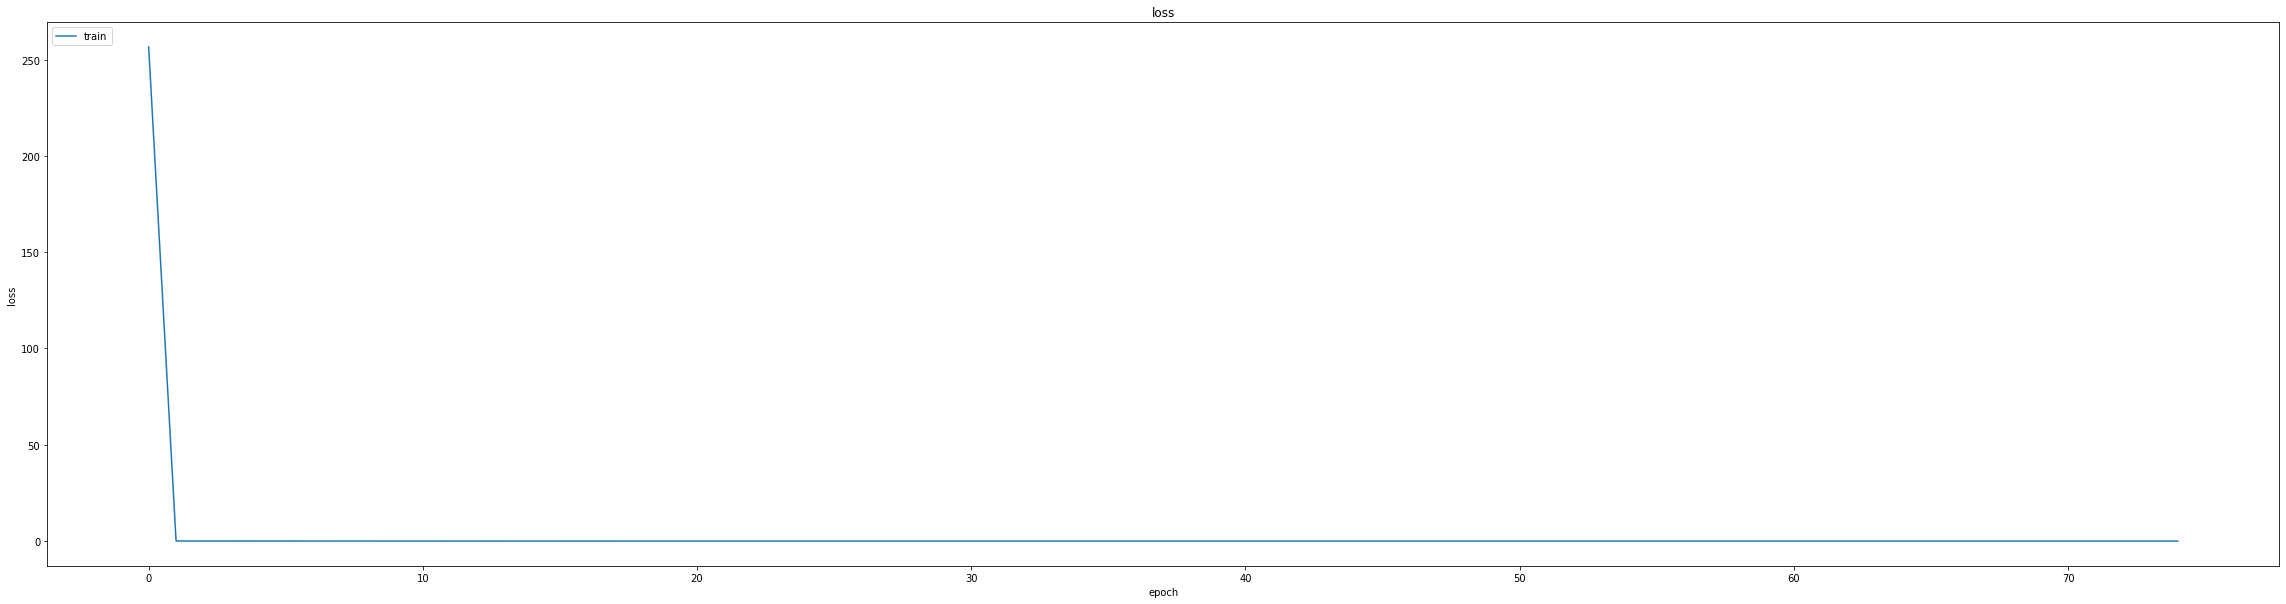

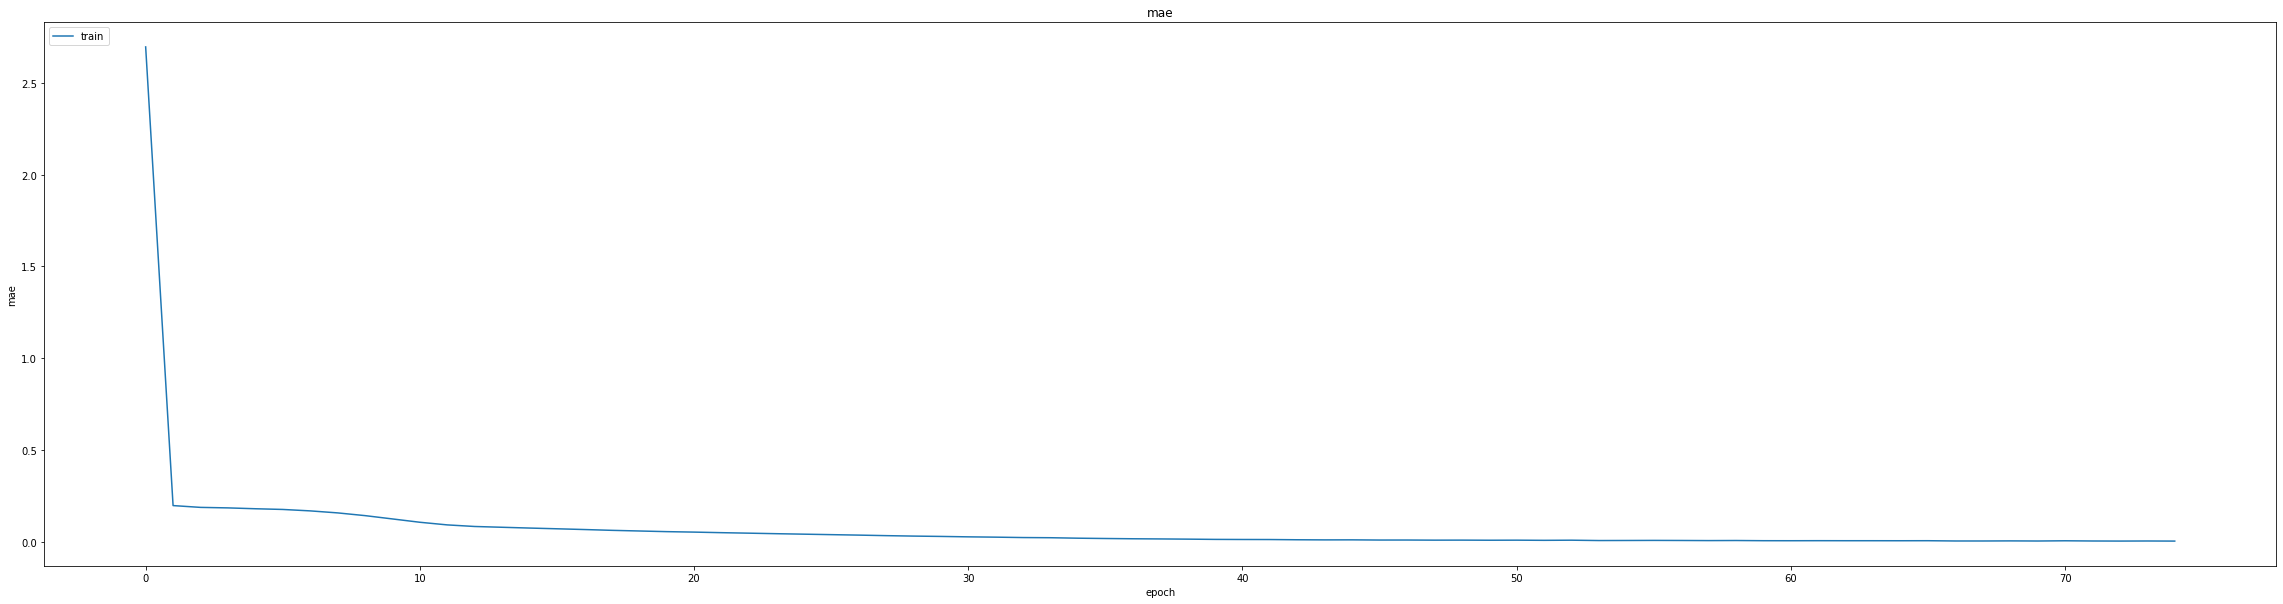

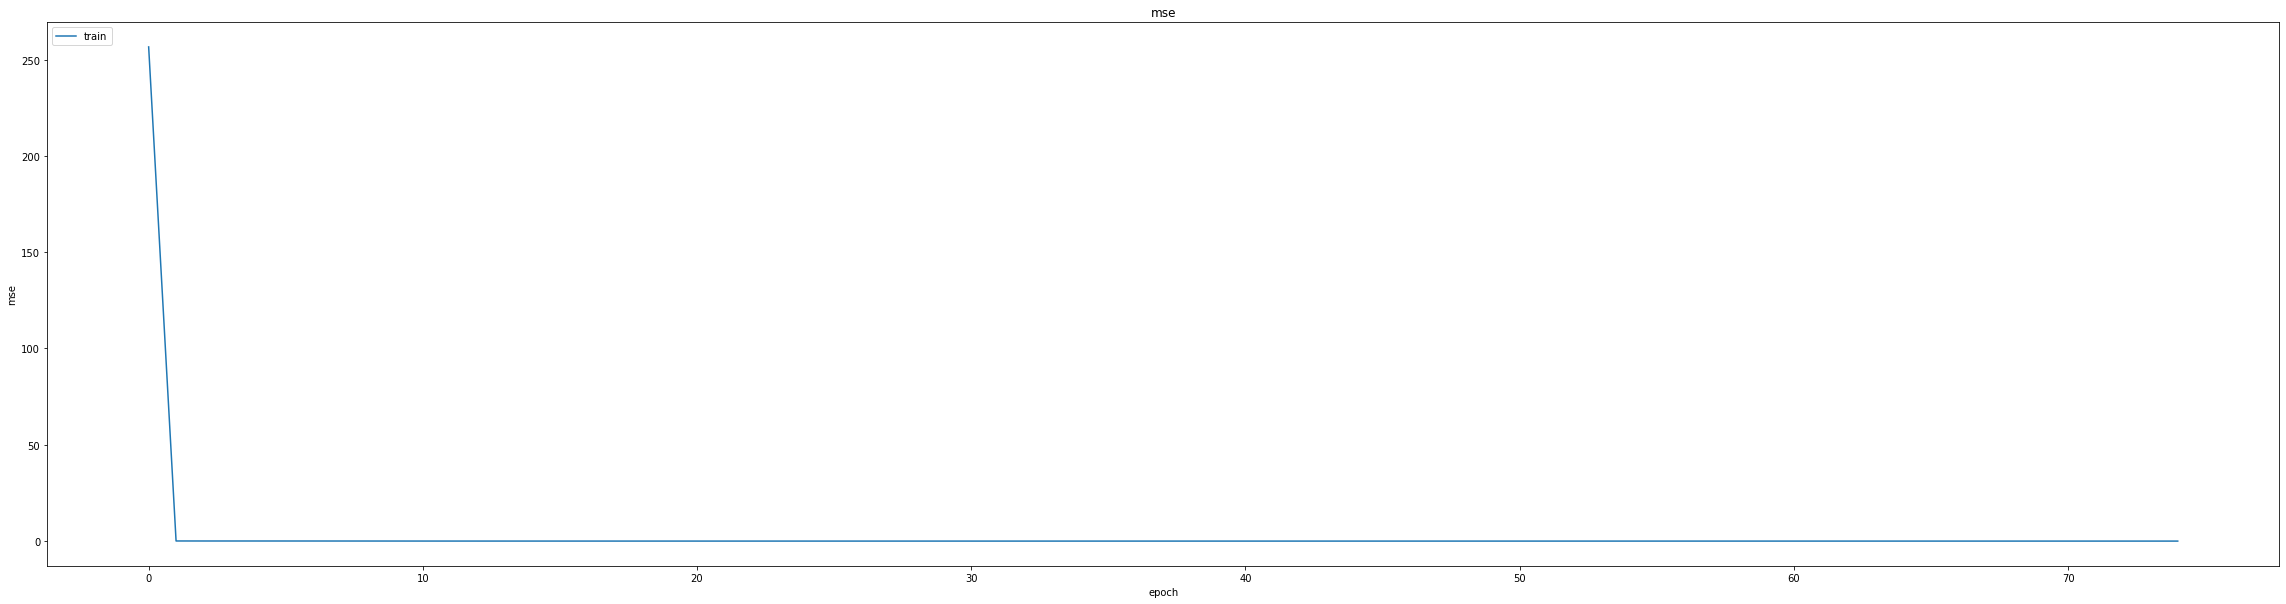

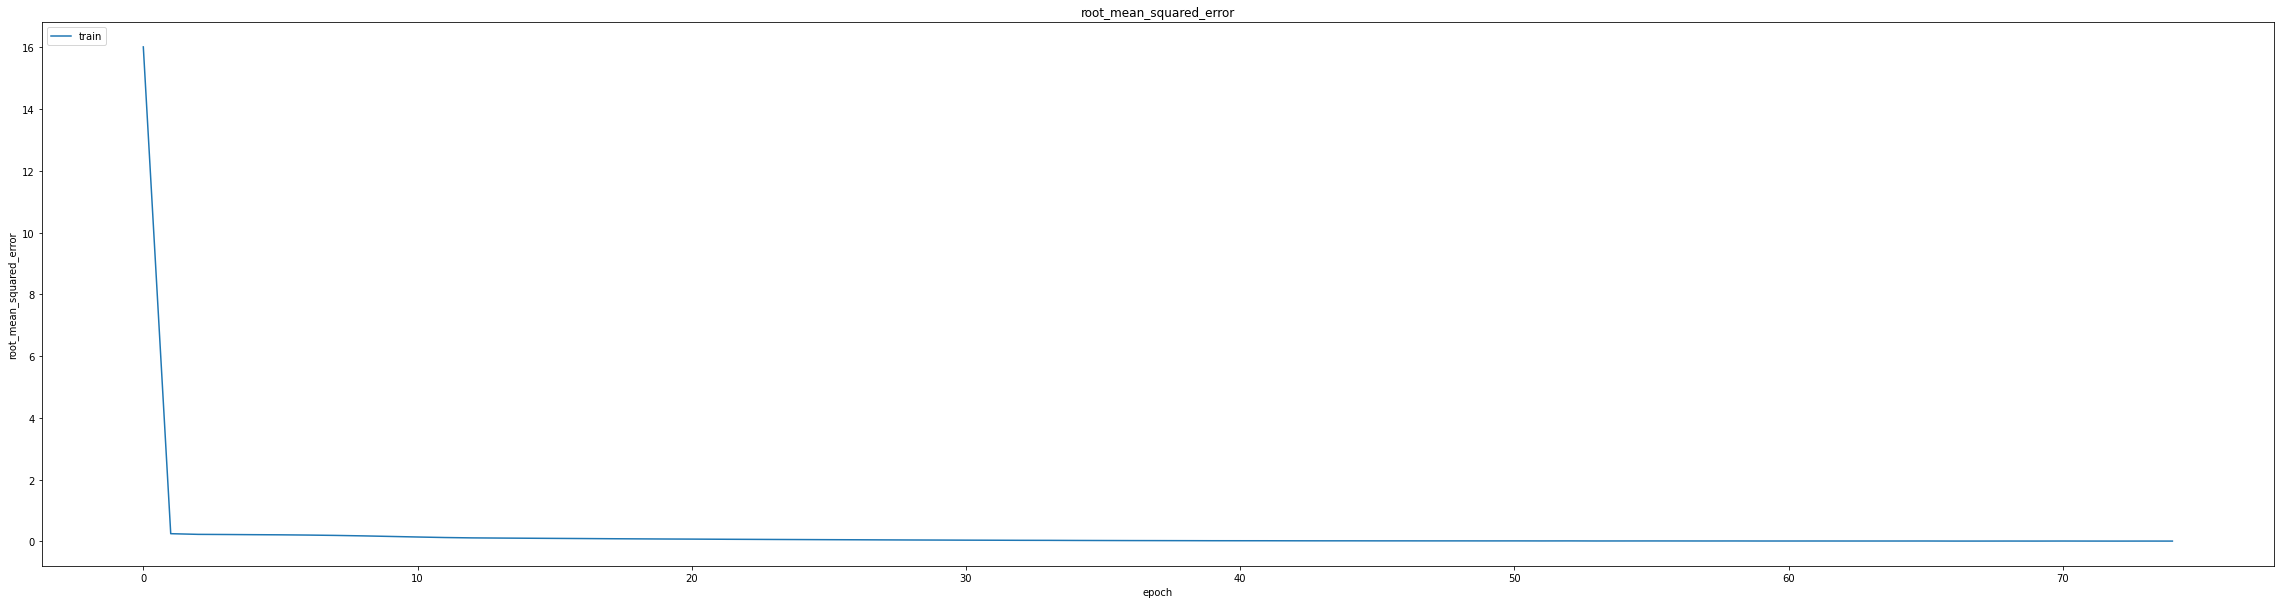

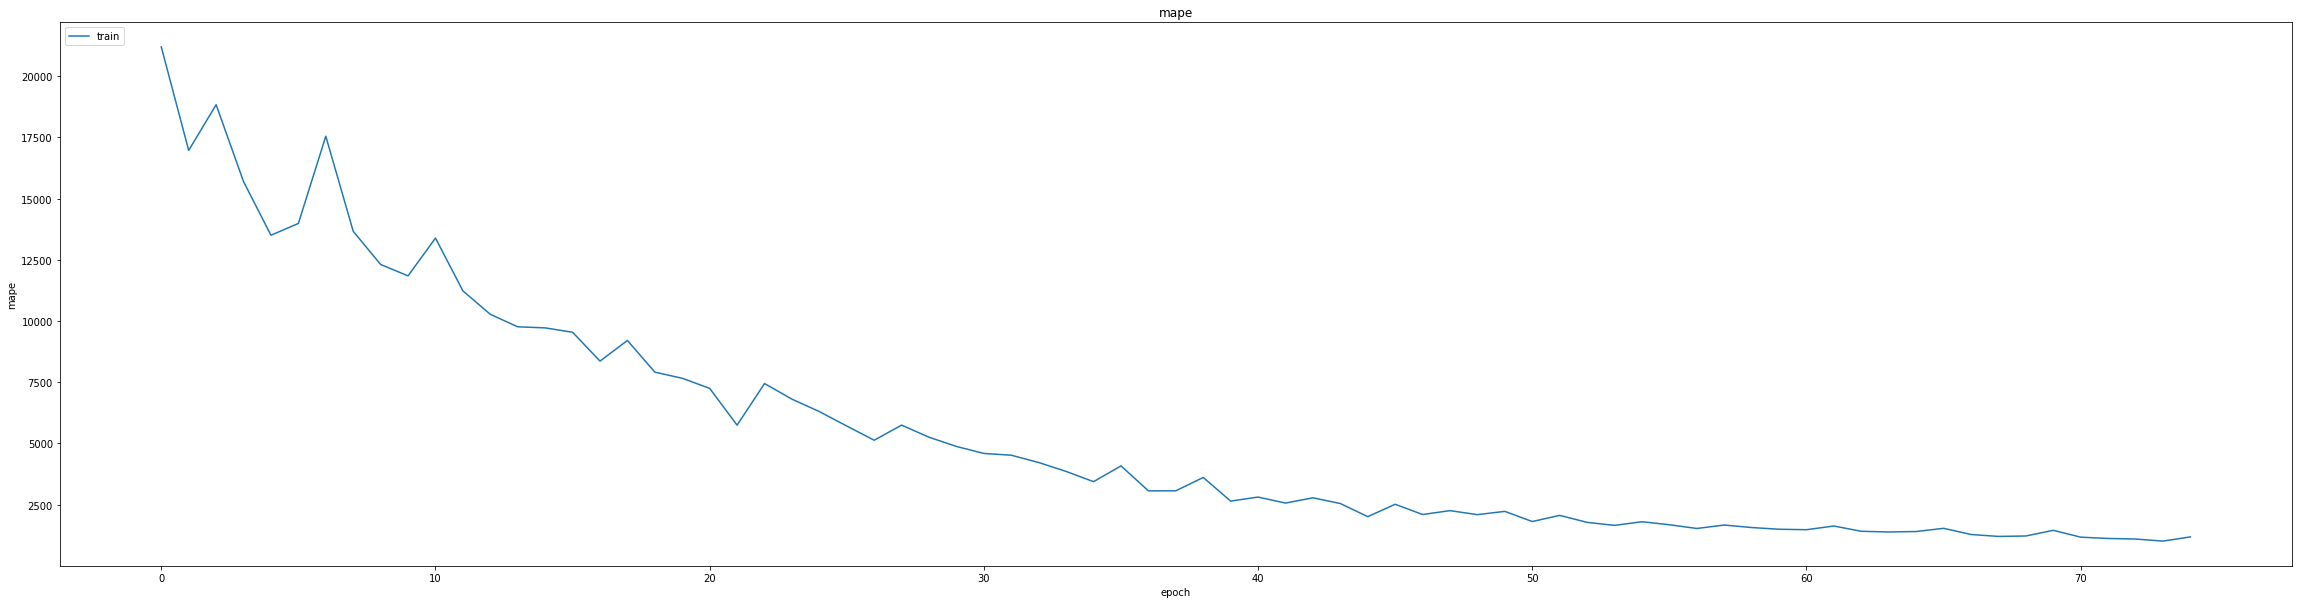

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004933793563395739
0.007082976866513491
464/464 [==============================] - 5s 6ms/step
0.9965778850808071


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 7.1628e-04 - mae: 0.0113 - mse: 7.1628e-04 - root_mean_squared_error: 0.0268 - mape: 1398.0018
Epoch 1: val_mse did not improve from 0.00005
348/348 [==============================] - 17s 24ms/step - loss: 7.1066e-04 - mae: 0.0113 - mse: 7.1066e-04 - root_mean_squared_error: 0.0267 - mape: 1386.4250 - val_loss: 1.1149e-04 - val_mae: 0.0092 - val_mse: 1.1149e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3857.2974 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 3.9498e-05 - mae: 0.0048 - mse: 3.9498e-05 - root_mean_squared_error: 0.0063 - mape: 1207.7673
Epoch 2: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 19ms/step - loss: 3.9459e-05 - mae: 0.0048 - mse: 3.9459e-05 - root_mean_squared_error: 0.0063 - mape: 1201.2385 - val_loss: 1.1053e-04 - val_mae: 0.0094 - val_mse: 1.1053e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 3549.3198 

348/348 [==============================] - 38s 110ms/step - loss: 3.2308e-05 - mae: 0.0044 - mse: 3.2308e-05 - root_mean_squared_error: 0.0057 - mape: 952.2211 - val_loss: 3.8141e-05 - val_mae: 0.0045 - val_mse: 3.8141e-05 - val_root_mean_squared_error: 0.0062 - val_mape: 2512.7371 - lr: 5.3144e-04
Epoch 14/25
347/348 [============================>.] - ETA: 0s - loss: 4.2637e-05 - mae: 0.0051 - mse: 4.2637e-05 - root_mean_squared_error: 0.0065 - mape: 835.6924
Epoch 14: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 20ms/step - loss: 4.2594e-05 - mae: 0.0051 - mse: 4.2594e-05 - root_mean_squared_error: 0.0065 - mape: 833.5750 - val_loss: 1.7784e-04 - val_mae: 0.0126 - val_mse: 1.7784e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 2359.9292 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
346/348 [============================>.] - ETA: 0s - loss: 3.0015e-05 - mae: 0.0042 - mse: 3.0015e-05 - root_mean_squared_error: 0.0055 - map

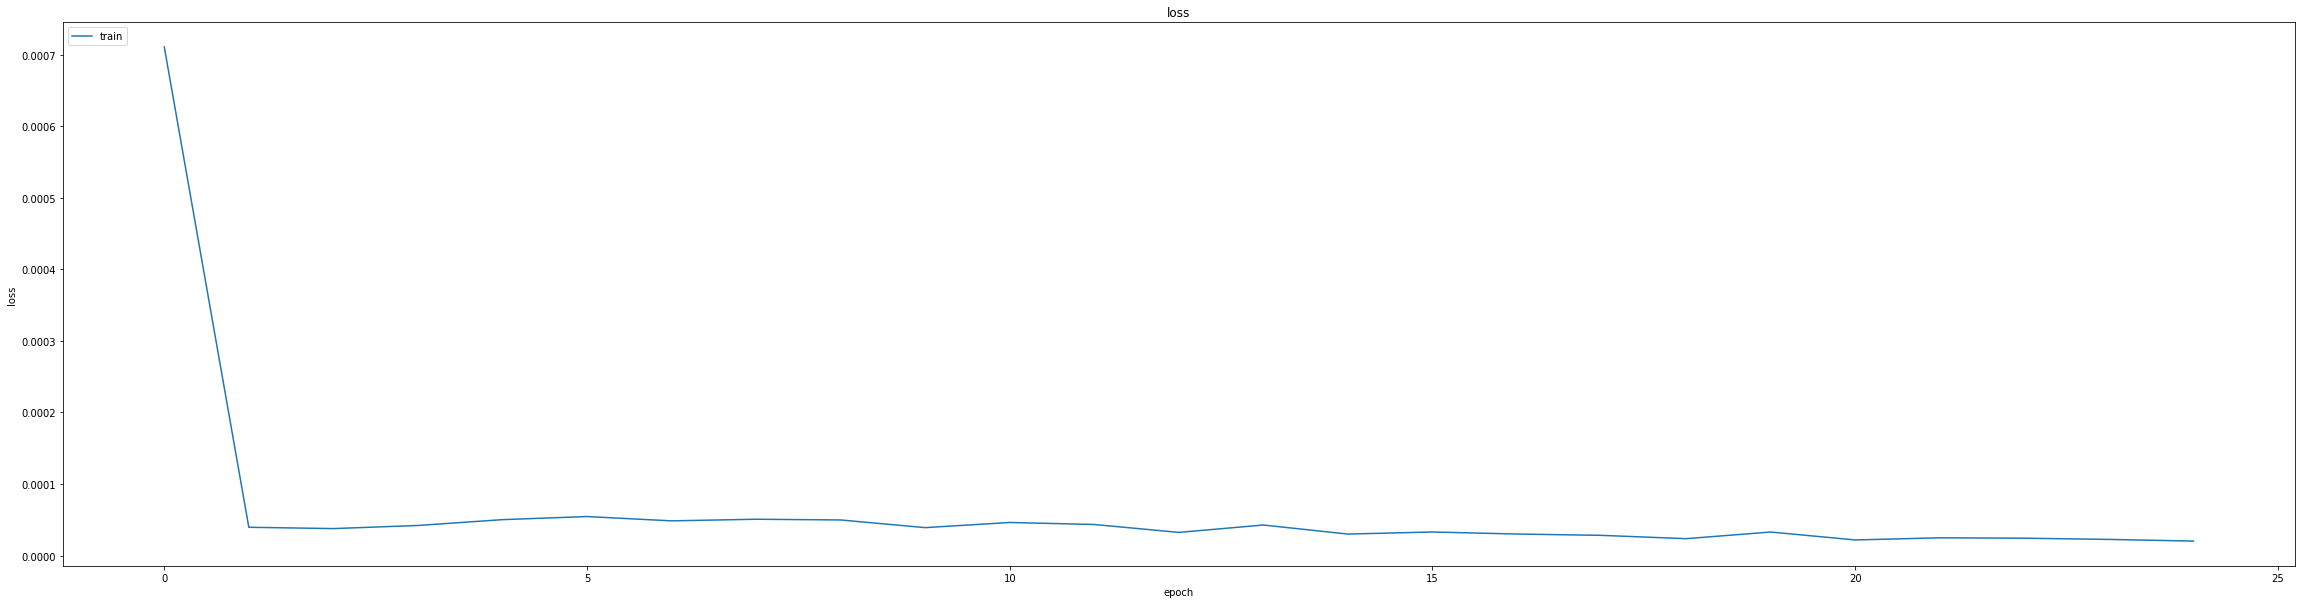

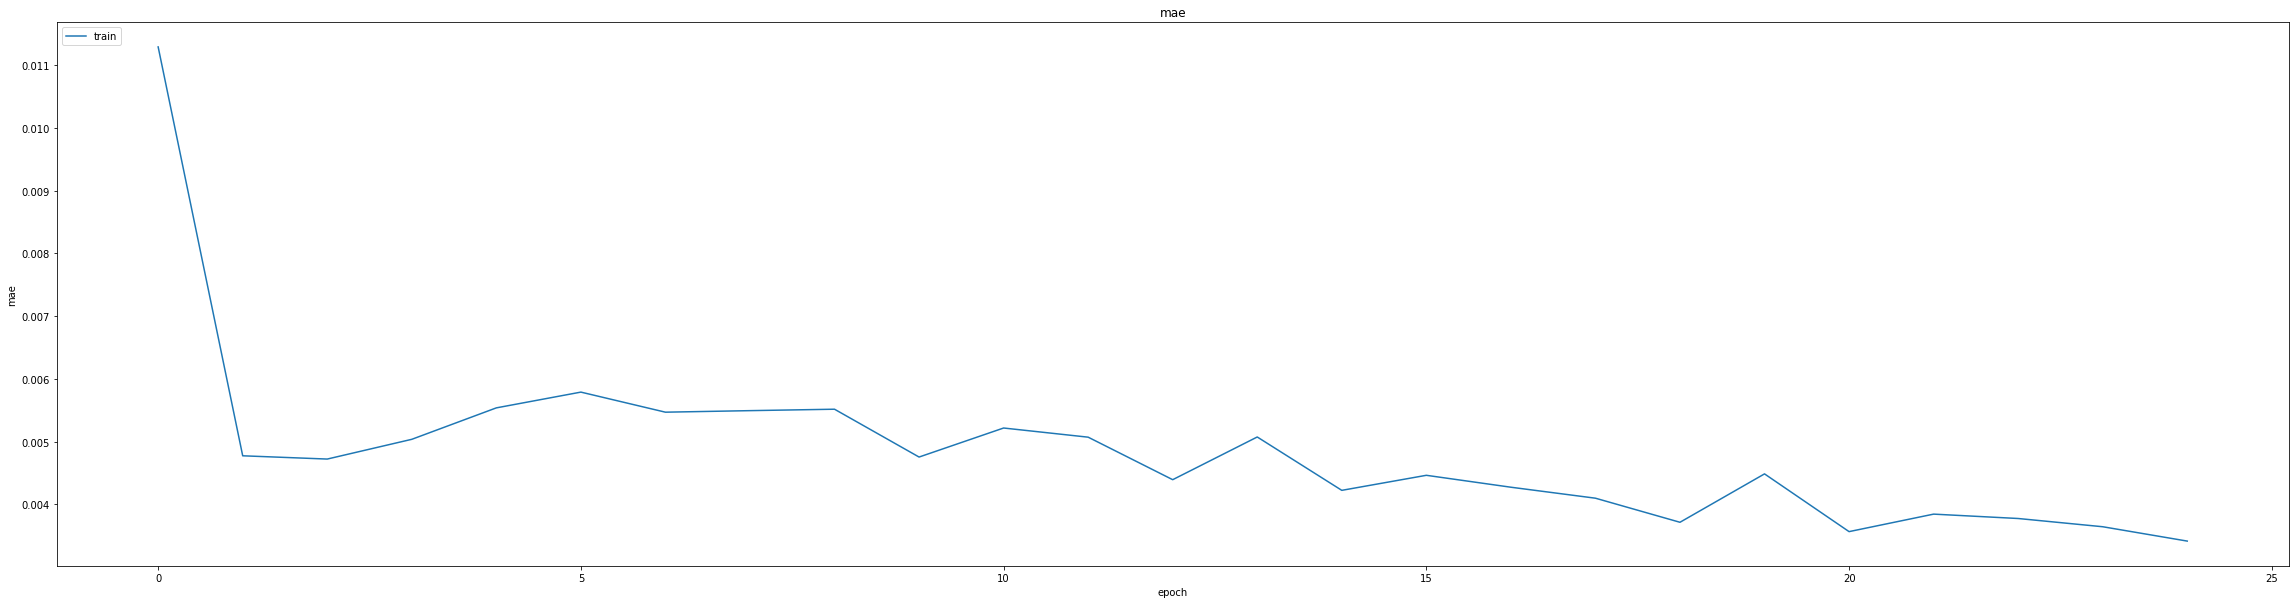

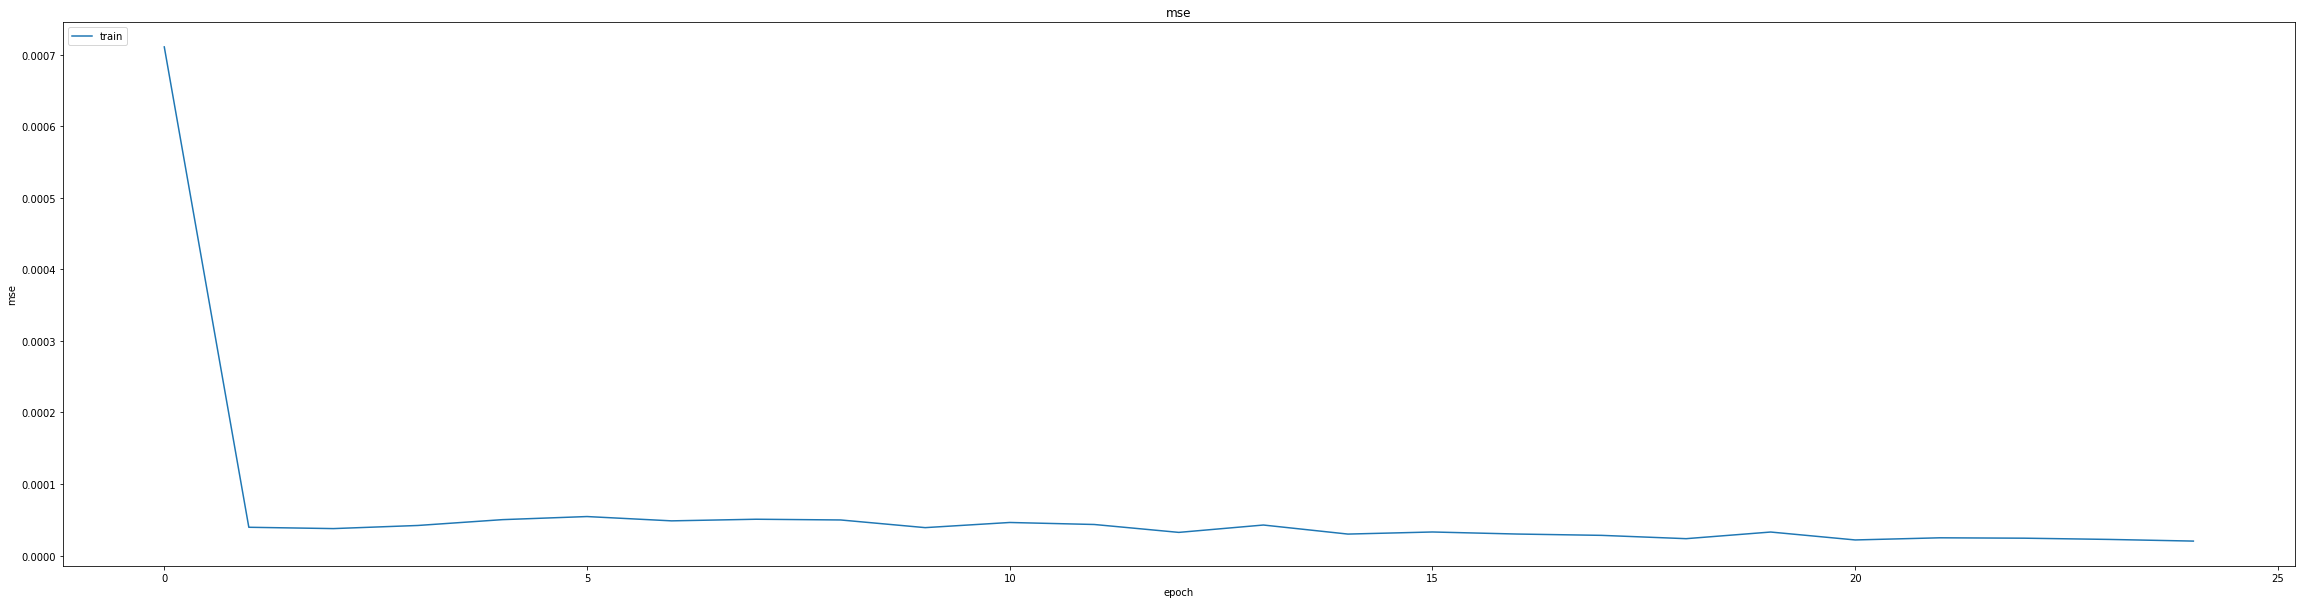

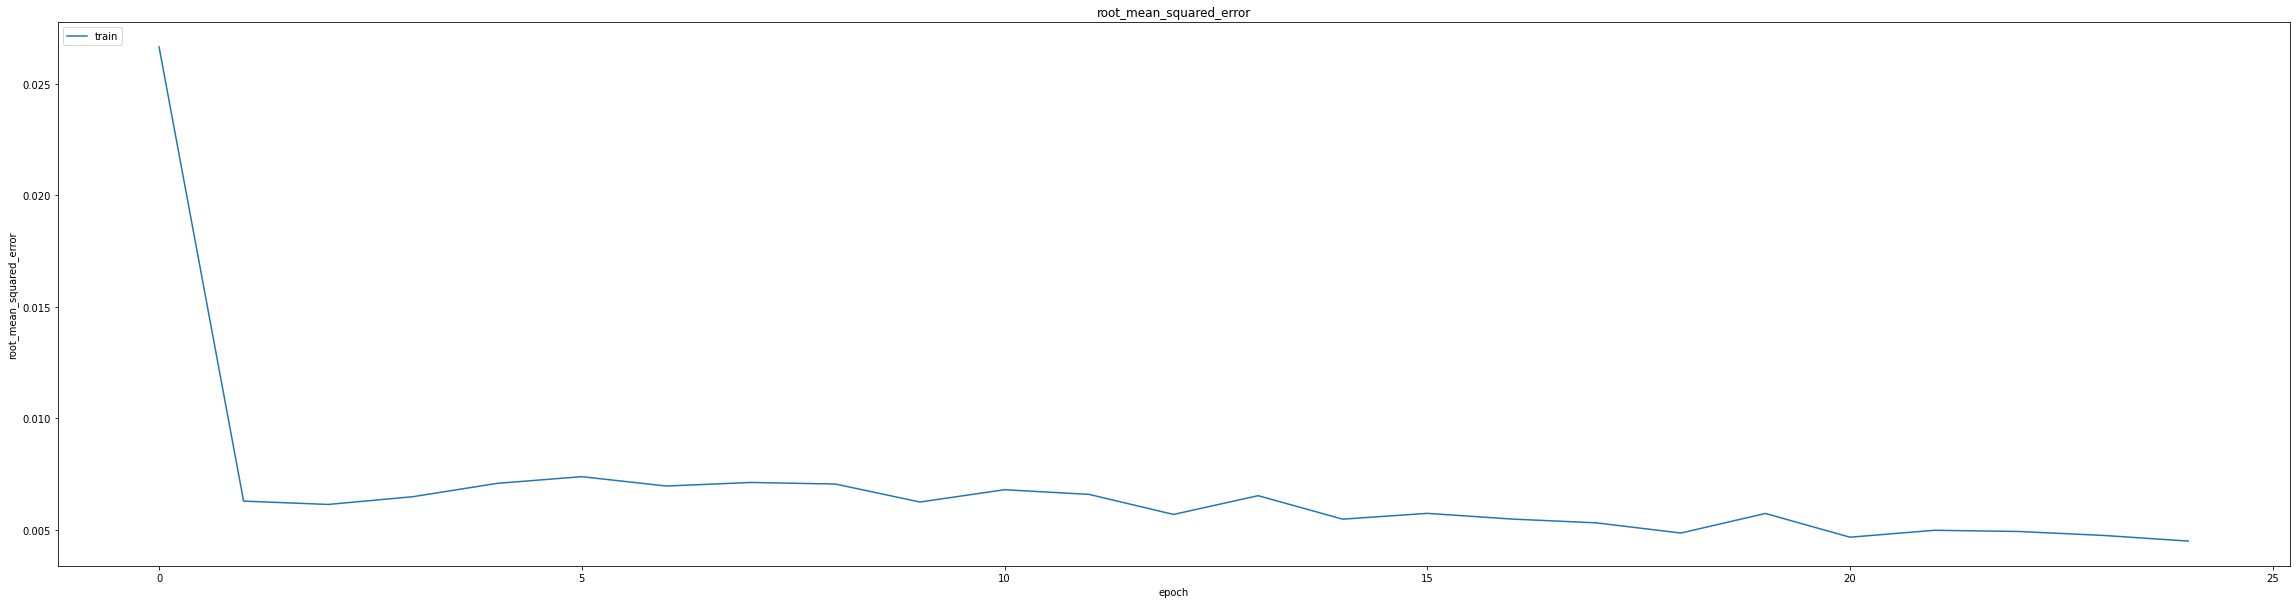

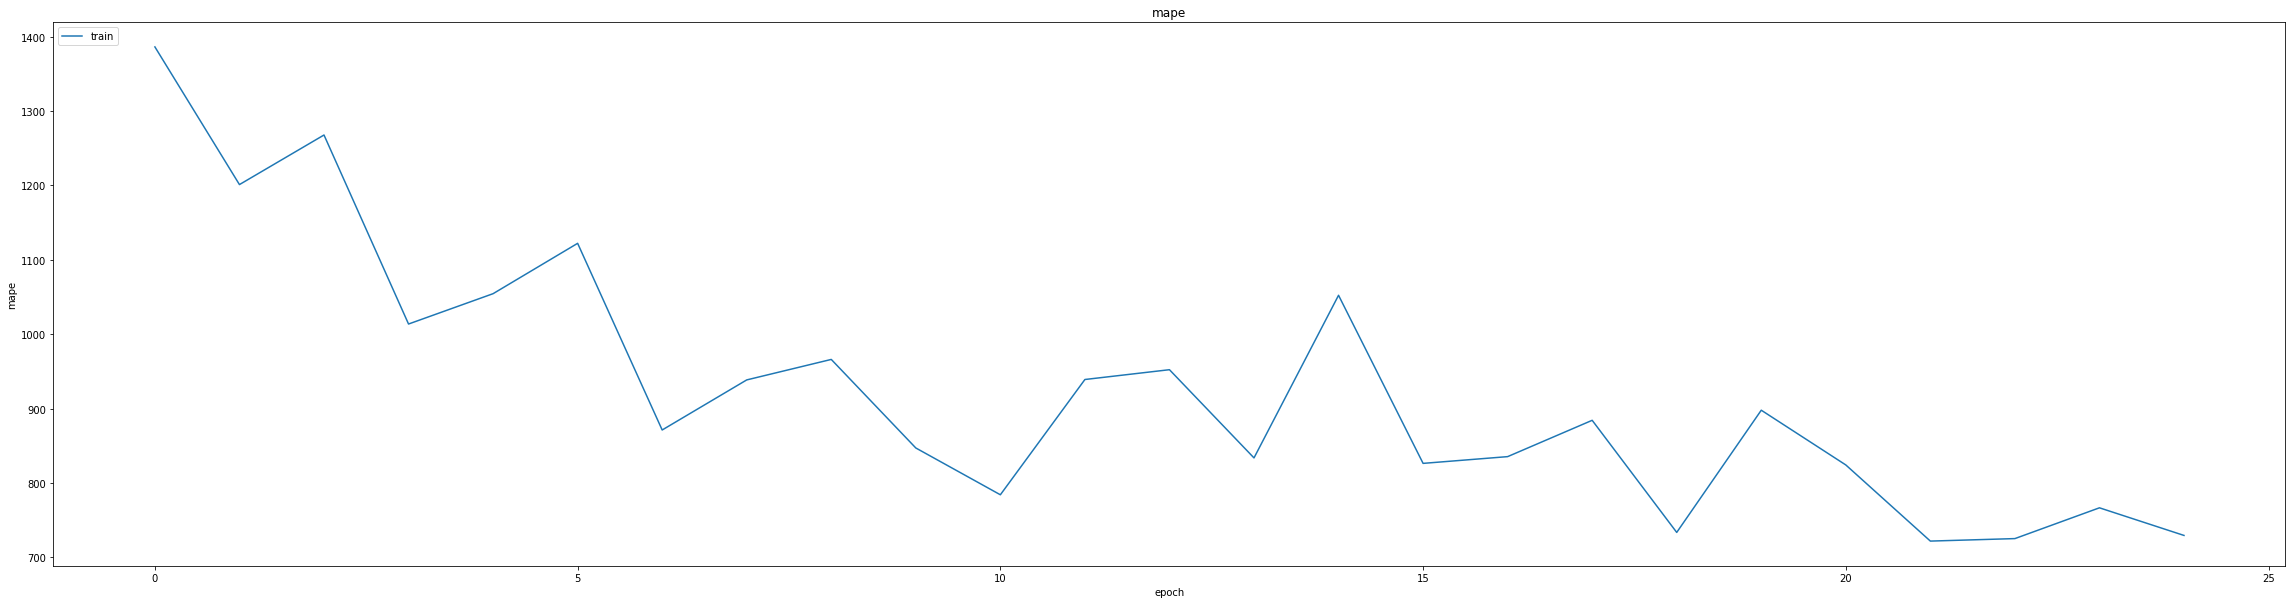

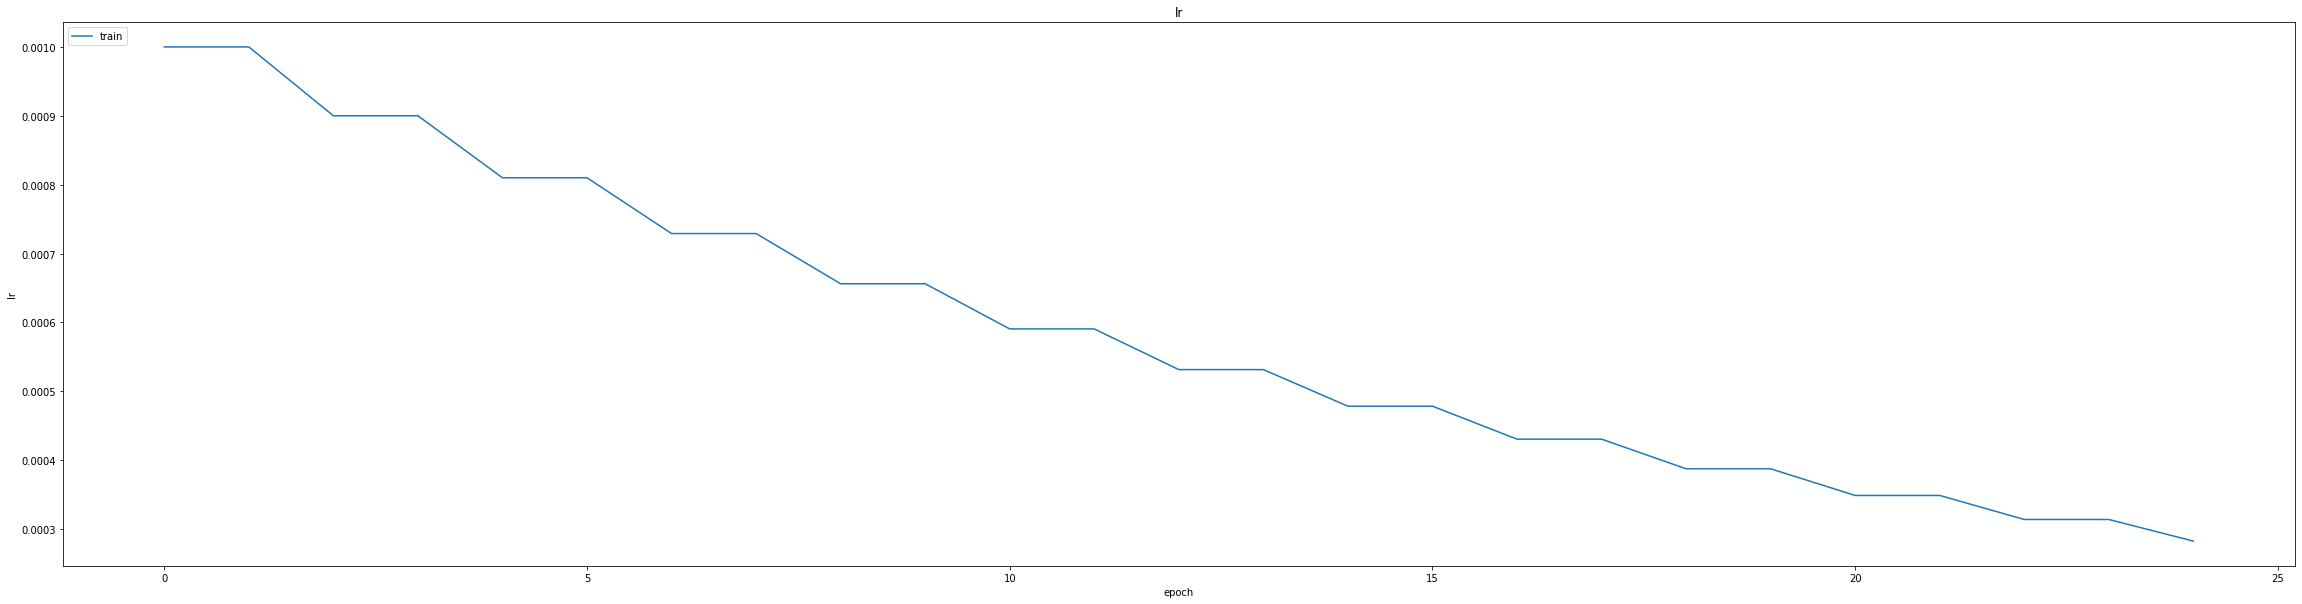

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004523124545812607
0.006175818387418985
464/464 [==============================] - 5s 6ms/step
0.9968840413324449


464/464 [==============================] - 3s 6ms/step


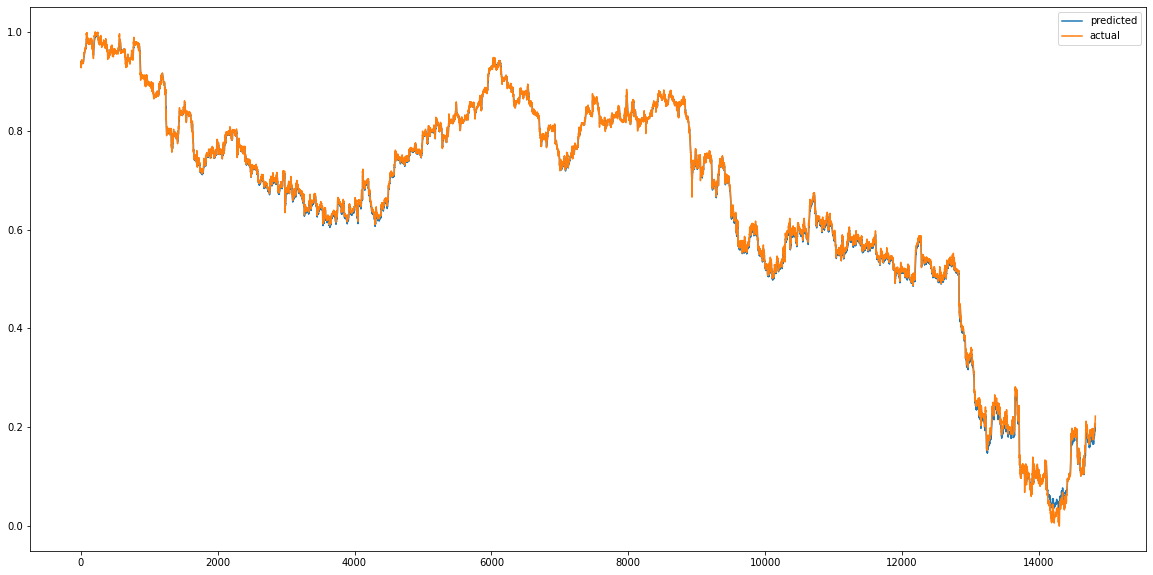

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


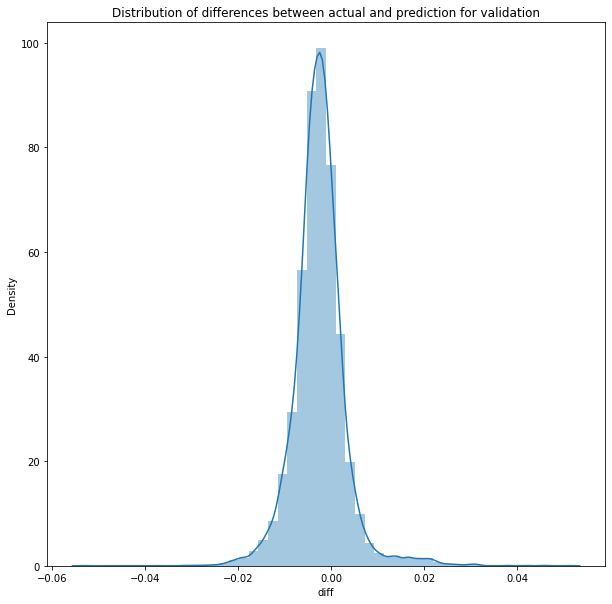

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


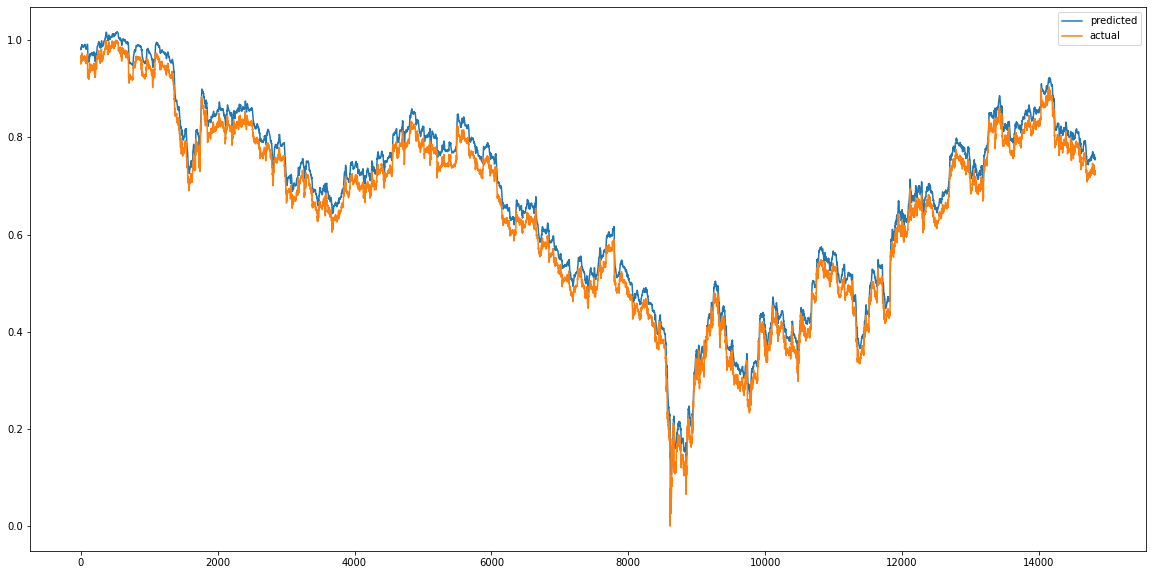

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


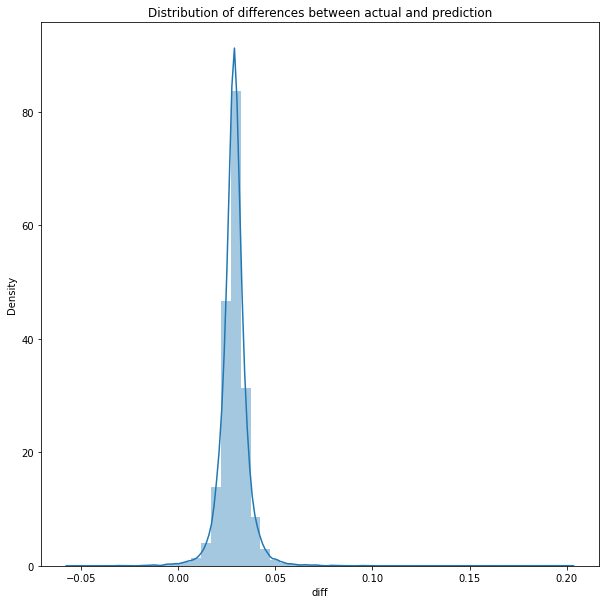

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000876937488243241
RMSE :  0.029613130335093604
MAE :  0.028798746517570147
464/464 [==============================] - 3s 7ms/step
R2_Score  : 0.9771656560962292


count    14827.000000
mean         0.028731
std          0.007176
min         -0.054569
25%          0.025655
50%          0.028744
75%          0.031784
max          0.200376
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 885.8336 - mae: 11.4016 - mse: 885.8336 - root_mean_squared_error: 29.7630 - mape: 62008.9258
Epoch 1: val_mse improved from inf to 2.20818, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 27s 53ms/step - loss: 881.0522 - mae: 11.3482 - mse: 881.0522 - root_mean_squared_error: 29.6825 - mape: 61674.9648 - val_loss: 2.2082 - val_mae: 1.4682 - val_mse: 2.2082 - val_root_mean_squared_error: 1.4860 - val_mape: 143893.5156
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 1.0264 - mae: 0.9484 - mse: 1.0264 - root_mean_squared_error: 1.0131 - mape: 29621.9805
Epoch 2: val_mse improved from 2.20818 to 0.34117, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 1.0191 - mae: 0.9442 - mse: 1.0191 - root_mean_squared_error: 1.0095 - mape: 29292.6465 - val_loss: 0.3412 - val_mae: 0.5371 - val_mse: 0.3412 - val_root_mean_squared_error: 0.5841 - val_mape: 80847.4375
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.2178 - mae: 0.4027 - mse: 0.2178 - root_mean_squared_error: 0.4667 - mape: 24433.3320
Epoch 3: val_mse improved from 0.34117 to 0.11125, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.2178 - mae: 0.4027 - mse: 0.2178 - root_mean_squared_error: 0.4667 - mape: 24433.3320 - val_loss: 0.1112 - val_mae: 0.2509 - val_mse: 0.1112 - val_root_mean_squared_error: 0.3335 - val_mape: 60866.4727
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0873 - mae: 0.2297 - mse: 0.0873 - root_mean_squared_error: 0.2955 - mape: 20631.6465
Epoch 4: val_mse improved from 0.11125 to 0.06431, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0871 - mae: 0.2295 - mse: 0.0871 - root_mean_squared_error: 0.2952 - mape: 20461.1465 - val_loss: 0.0643 - val_mae: 0.1775 - val_mse: 0.0643 - val_root_mean_squared_error: 0.2536 - val_mape: 51793.0938
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0560 - mae: 0.1913 - mse: 0.0560 - root_mean_squared_error: 0.2367 - mape: 18329.8359
Epoch 5: val_mse improved from 0.06431 to 0.05422, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0560 - mae: 0.1913 - mse: 0.0560 - root_mean_squared_error: 0.2367 - mape: 18230.8750 - val_loss: 0.0542 - val_mae: 0.1718 - val_mse: 0.0542 - val_root_mean_squared_error: 0.2329 - val_mape: 47172.5078
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0483 - mae: 0.1848 - mse: 0.0483 - root_mean_squared_error: 0.2198 - mape: 16242.5215
Epoch 6: val_mse improved from 0.05422 to 0.05267, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0483 - mae: 0.1849 - mse: 0.0483 - root_mean_squared_error: 0.2199 - mape: 16154.8955 - val_loss: 0.0527 - val_mae: 0.1752 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 44781.2266
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0463 - mae: 0.1834 - mse: 0.0463 - root_mean_squared_error: 0.2153 - mape: 14497.1748
Epoch 7: val_mse did not improve from 0.05267
348/348 [==============================] - 5s 13ms/step - loss: 0.0464 - mae: 0.1834 - mse: 0.0464 - root_mean_squared_error: 0.2153 - mape: 14419.0391 - val_loss: 0.0528 - val_mae: 0.1781 - val_mse: 0.0528 - val_root_mean_squared_error: 0.2298 - val_mape: 43625.3008
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0461 - mae: 0.1838 - mse: 0.0461 - root_mean_squared_error: 0.2147 - mape: 15842.9492
Epoch 8: val_mse did not improve from 0.05267
348/348 [==============================] - 4s 12ms/step

348/348 [==============================] - 16s 45ms/step - loss: 0.0448 - mae: 0.1825 - mse: 0.0448 - root_mean_squared_error: 0.2116 - mape: 13550.1162 - val_loss: 0.0526 - val_mae: 0.1756 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 44559.1016
Epoch 37/75
345/348 [============================>.] - ETA: 0s - loss: 0.0447 - mae: 0.1824 - mse: 0.0447 - root_mean_squared_error: 0.2113 - mape: 14738.0928
Epoch 37: val_mse did not improve from 0.05263
348/348 [==============================] - 4s 13ms/step - loss: 0.0447 - mae: 0.1825 - mse: 0.0447 - root_mean_squared_error: 0.2114 - mape: 14616.3672 - val_loss: 0.0529 - val_mae: 0.1790 - val_mse: 0.0529 - val_root_mean_squared_error: 0.2300 - val_mape: 43336.5625
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 0.0447 - mae: 0.1826 - mse: 0.0447 - root_mean_squared_error: 0.2115 - mape: 16008.4404
Epoch 38: val_mse improved from 0.05263 to 0.05249, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 15s 44ms/step - loss: 0.0447 - mae: 0.1825 - mse: 0.0447 - root_mean_squared_error: 0.2115 - mape: 15876.0732 - val_loss: 0.0525 - val_mae: 0.1758 - val_mse: 0.0525 - val_root_mean_squared_error: 0.2291 - val_mape: 44319.4844
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 0.0433 - mae: 0.1795 - mse: 0.0433 - root_mean_squared_error: 0.2081 - mape: 14873.5322
Epoch 39: val_mse improved from 0.05249 to 0.05003, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0433 - mae: 0.1794 - mse: 0.0433 - root_mean_squared_error: 0.2081 - mape: 14708.0264 - val_loss: 0.0500 - val_mae: 0.1737 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 42483.5977
Epoch 40/75
345/348 [============================>.] - ETA: 0s - loss: 0.0339 - mae: 0.1521 - mse: 0.0339 - root_mean_squared_error: 0.1840 - mape: 14216.0332
Epoch 40: val_mse improved from 0.05003 to 0.01459, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0337 - mae: 0.1515 - mse: 0.0337 - root_mean_squared_error: 0.1835 - mape: 14098.4297 - val_loss: 0.0146 - val_mae: 0.0746 - val_mse: 0.0146 - val_root_mean_squared_error: 0.1208 - val_mape: 30269.4453
Epoch 41/75
348/348 [==============================] - ETA: 0s - loss: 0.0059 - mae: 0.0568 - mse: 0.0059 - root_mean_squared_error: 0.0766 - mape: 7942.6128
Epoch 41: val_mse improved from 0.01459 to 0.00621, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0059 - mae: 0.0568 - mse: 0.0059 - root_mean_squared_error: 0.0766 - mape: 7942.6128 - val_loss: 0.0062 - val_mae: 0.0505 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 23053.8359
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0435 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 7899.0933
Epoch 42: val_mse improved from 0.00621 to 0.00486, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0035 - mae: 0.0435 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 7899.0933 - val_loss: 0.0049 - val_mae: 0.0409 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 21465.6328
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0353 - mse: 0.0024 - root_mean_squared_error: 0.0491 - mape: 7622.8911
Epoch 43: val_mse improved from 0.00486 to 0.00367, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0024 - mae: 0.0353 - mse: 0.0024 - root_mean_squared_error: 0.0491 - mape: 7603.5850 - val_loss: 0.0037 - val_mae: 0.0336 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 19904.7207
Epoch 44/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0310 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 7351.1445
Epoch 44: val_mse improved from 0.00367 to 0.00334, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0019 - mae: 0.0310 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 7311.3945 - val_loss: 0.0033 - val_mae: 0.0378 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 18476.0137
Epoch 45/75
344/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 6246.1118
Epoch 45: val_mse improved from 0.00334 to 0.00244, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - root_mean_squared_error: 0.0384 - mape: 6176.5474 - val_loss: 0.0024 - val_mae: 0.0286 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0494 - val_mape: 17191.2559
Epoch 46/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 6155.6104
Epoch 46: val_mse improved from 0.00244 to 0.00200, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 6122.3354 - val_loss: 0.0020 - val_mae: 0.0247 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 16162.5059
Epoch 47/75
346/348 [============================>.] - ETA: 0s - loss: 9.5248e-04 - mae: 0.0219 - mse: 9.5248e-04 - root_mean_squared_error: 0.0309 - mape: 5747.0215
Epoch 47: val_mse improved from 0.00200 to 0.00171, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 9.5200e-04 - mae: 0.0219 - mse: 9.5200e-04 - root_mean_squared_error: 0.0309 - mape: 5715.9482 - val_loss: 0.0017 - val_mae: 0.0248 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0413 - val_mape: 14904.8867
Epoch 48/75
344/348 [============================>.] - ETA: 0s - loss: 7.9752e-04 - mae: 0.0203 - mse: 7.9752e-04 - root_mean_squared_error: 0.0282 - mape: 5164.5459
Epoch 48: val_mse improved from 0.00171 to 0.00141, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 7.9580e-04 - mae: 0.0203 - mse: 7.9580e-04 - root_mean_squared_error: 0.0282 - mape: 5106.9473 - val_loss: 0.0014 - val_mae: 0.0233 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 13842.1660
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 6.5908e-04 - mae: 0.0186 - mse: 6.5908e-04 - root_mean_squared_error: 0.0257 - mape: 4503.7100
Epoch 49: val_mse improved from 0.00141 to 0.00117, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 6.5849e-04 - mae: 0.0186 - mse: 6.5849e-04 - root_mean_squared_error: 0.0257 - mape: 4492.2891 - val_loss: 0.0012 - val_mae: 0.0222 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 12640.0674
Epoch 50/75
344/348 [============================>.] - ETA: 0s - loss: 5.2918e-04 - mae: 0.0166 - mse: 5.2918e-04 - root_mean_squared_error: 0.0230 - mape: 4050.5767
Epoch 50: val_mse improved from 0.00117 to 0.00097, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 5.2765e-04 - mae: 0.0166 - mse: 5.2765e-04 - root_mean_squared_error: 0.0230 - mape: 4005.4006 - val_loss: 9.7479e-04 - val_mae: 0.0198 - val_mse: 9.7479e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 11759.8906
Epoch 51/75
348/348 [==============================] - ETA: 0s - loss: 4.8916e-04 - mae: 0.0163 - mse: 4.8916e-04 - root_mean_squared_error: 0.0221 - mape: 3928.6663
Epoch 51: val_mse improved from 0.00097 to 0.00095, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.8916e-04 - mae: 0.0163 - mse: 4.8916e-04 - root_mean_squared_error: 0.0221 - mape: 3928.6663 - val_loss: 9.5397e-04 - val_mae: 0.0216 - val_mse: 9.5397e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 10864.4688
Epoch 52/75
346/348 [============================>.] - ETA: 0s - loss: 4.4134e-04 - mae: 0.0157 - mse: 4.4134e-04 - root_mean_squared_error: 0.0210 - mape: 3705.2695
Epoch 52: val_mse improved from 0.00095 to 0.00067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 4.4228e-04 - mae: 0.0157 - mse: 4.4228e-04 - root_mean_squared_error: 0.0210 - mape: 3685.2529 - val_loss: 6.6875e-04 - val_mae: 0.0163 - val_mse: 6.6875e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 10216.2480
Epoch 53/75
347/348 [============================>.] - ETA: 0s - loss: 4.1591e-04 - mae: 0.0153 - mse: 4.1591e-04 - root_mean_squared_error: 0.0204 - mape: 3589.8584
Epoch 53: val_mse did not improve from 0.00067
348/348 [==============================] - 4s 13ms/step - loss: 4.1575e-04 - mae: 0.0153 - mse: 4.1575e-04 - root_mean_squared_error: 0.0204 - mape: 3580.7551 - val_loss: 6.8548e-04 - val_mae: 0.0187 - val_mse: 6.8548e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 9588.7363
Epoch 54/75
344/348 [============================>.] - ETA: 0s - loss: 3.7955e-04 - mae: 0.0147 - mse: 3.7955e-04 - root_mean_squared_error: 0.0195 - mape: 3326.7083
Epoch 54: val_mse did not improve from 0.00067
348/348 

348/348 [==============================] - 16s 46ms/step - loss: 3.4443e-04 - mae: 0.0140 - mse: 3.4443e-04 - root_mean_squared_error: 0.0186 - mape: 3060.6643 - val_loss: 5.3219e-04 - val_mae: 0.0162 - val_mse: 5.3219e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 8581.4111
Epoch 56/75
348/348 [==============================] - ETA: 0s - loss: 3.3360e-04 - mae: 0.0139 - mse: 3.3360e-04 - root_mean_squared_error: 0.0183 - mape: 2844.9924
Epoch 56: val_mse improved from 0.00053 to 0.00048, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.3360e-04 - mae: 0.0139 - mse: 3.3360e-04 - root_mean_squared_error: 0.0183 - mape: 2844.9924 - val_loss: 4.7806e-04 - val_mae: 0.0145 - val_mse: 4.7806e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 8242.6768
Epoch 57/75
348/348 [==============================] - ETA: 0s - loss: 3.2907e-04 - mae: 0.0138 - mse: 3.2907e-04 - root_mean_squared_error: 0.0181 - mape: 2646.7881
Epoch 57: val_mse improved from 0.00048 to 0.00046, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.2907e-04 - mae: 0.0138 - mse: 3.2907e-04 - root_mean_squared_error: 0.0181 - mape: 2646.7881 - val_loss: 4.5772e-04 - val_mae: 0.0145 - val_mse: 4.5772e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 7916.6538
Epoch 58/75
348/348 [==============================] - ETA: 0s - loss: 3.1280e-04 - mae: 0.0136 - mse: 3.1280e-04 - root_mean_squared_error: 0.0177 - mape: 2691.0969
Epoch 58: val_mse improved from 0.00046 to 0.00042, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.1280e-04 - mae: 0.0136 - mse: 3.1280e-04 - root_mean_squared_error: 0.0177 - mape: 2691.0969 - val_loss: 4.1715e-04 - val_mae: 0.0137 - val_mse: 4.1715e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 7609.8091
Epoch 59/75
344/348 [============================>.] - ETA: 0s - loss: 3.2050e-04 - mae: 0.0138 - mse: 3.2050e-04 - root_mean_squared_error: 0.0179 - mape: 2592.0603
Epoch 59: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 13ms/step - loss: 3.2005e-04 - mae: 0.0138 - mse: 3.2005e-04 - root_mean_squared_error: 0.0179 - mape: 2563.1724 - val_loss: 6.2301e-04 - val_mae: 0.0192 - val_mse: 6.2301e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 7318.2407
Epoch 60/75
347/348 [============================>.] - ETA: 0s - loss: 2.8628e-04 - mae: 0.0129 - mse: 2.8628e-04 - root_mean_squared_error: 0.0169 - mape: 2455.1157
Epoch 60: val_mse did not improve from 0.00042
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 2.5562e-04 - mae: 0.0122 - mse: 2.5562e-04 - root_mean_squared_error: 0.0160 - mape: 2215.1855 - val_loss: 3.6568e-04 - val_mae: 0.0139 - val_mse: 3.6568e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 6258.8237
Epoch 64/75
347/348 [============================>.] - ETA: 0s - loss: 2.5278e-04 - mae: 0.0122 - mse: 2.5278e-04 - root_mean_squared_error: 0.0159 - mape: 2124.6138
Epoch 64: val_mse did not improve from 0.00037
348/348 [==============================] - 4s 13ms/step - loss: 2.5262e-04 - mae: 0.0122 - mse: 2.5262e-04 - root_mean_squared_error: 0.0159 - mape: 2119.2268 - val_loss: 4.5404e-04 - val_mae: 0.0159 - val_mse: 4.5404e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 6117.6958
Epoch 65/75
347/348 [============================>.] - ETA: 0s - loss: 2.8658e-04 - mae: 0.0130 - mse: 2.8658e-04 - root_mean_squared_error: 0.0169 - mape: 2116.2004
Epoch 65: val_mse did not improve from 0.00037
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.3236e-04 - mae: 0.0116 - mse: 2.3236e-04 - root_mean_squared_error: 0.0152 - mape: 1997.9941 - val_loss: 3.6399e-04 - val_mae: 0.0142 - val_mse: 3.6399e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 5727.0151
Epoch 67/75
344/348 [============================>.] - ETA: 0s - loss: 2.4085e-04 - mae: 0.0118 - mse: 2.4085e-04 - root_mean_squared_error: 0.0155 - mape: 1918.6493
Epoch 67: val_mse did not improve from 0.00036
348/348 [==============================] - 4s 12ms/step - loss: 2.4251e-04 - mae: 0.0118 - mse: 2.4251e-04 - root_mean_squared_error: 0.0156 - mape: 1897.2787 - val_loss: 4.3545e-04 - val_mae: 0.0164 - val_mse: 4.3545e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 5602.6094
Epoch 68/75
348/348 [==============================] - ETA: 0s - loss: 2.2908e-04 - mae: 0.0115 - mse: 2.2908e-04 - root_mean_squared_error: 0.0151 - mape: 1971.2761
Epoch 68: val_mse did not improve from 0.00036
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.3432e-04 - mae: 0.0117 - mse: 2.3432e-04 - root_mean_squared_error: 0.0153 - mape: 1802.2245 - val_loss: 2.7447e-04 - val_mae: 0.0119 - val_mse: 2.7447e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 5215.4243
Epoch 71/75
344/348 [============================>.] - ETA: 0s - loss: 2.0140e-04 - mae: 0.0108 - mse: 2.0140e-04 - root_mean_squared_error: 0.0142 - mape: 1978.5209
Epoch 71: val_mse did not improve from 0.00027
348/348 [==============================] - 4s 13ms/step - loss: 2.0097e-04 - mae: 0.0108 - mse: 2.0097e-04 - root_mean_squared_error: 0.0142 - mape: 1956.4675 - val_loss: 3.9877e-04 - val_mae: 0.0158 - val_mse: 3.9877e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 5096.0259
Epoch 72/75
344/348 [============================>.] - ETA: 0s - loss: 1.9798e-04 - mae: 0.0108 - mse: 1.9798e-04 - root_mean_squared_error: 0.0141 - mape: 1809.5304
Epoch 72: val_mse did not improve from 0.00027
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 1.8129e-04 - mae: 0.0103 - mse: 1.8129e-04 - root_mean_squared_error: 0.0135 - mape: 1533.7330 - val_loss: 2.0256e-04 - val_mae: 0.0104 - val_mse: 2.0256e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 4694.6270


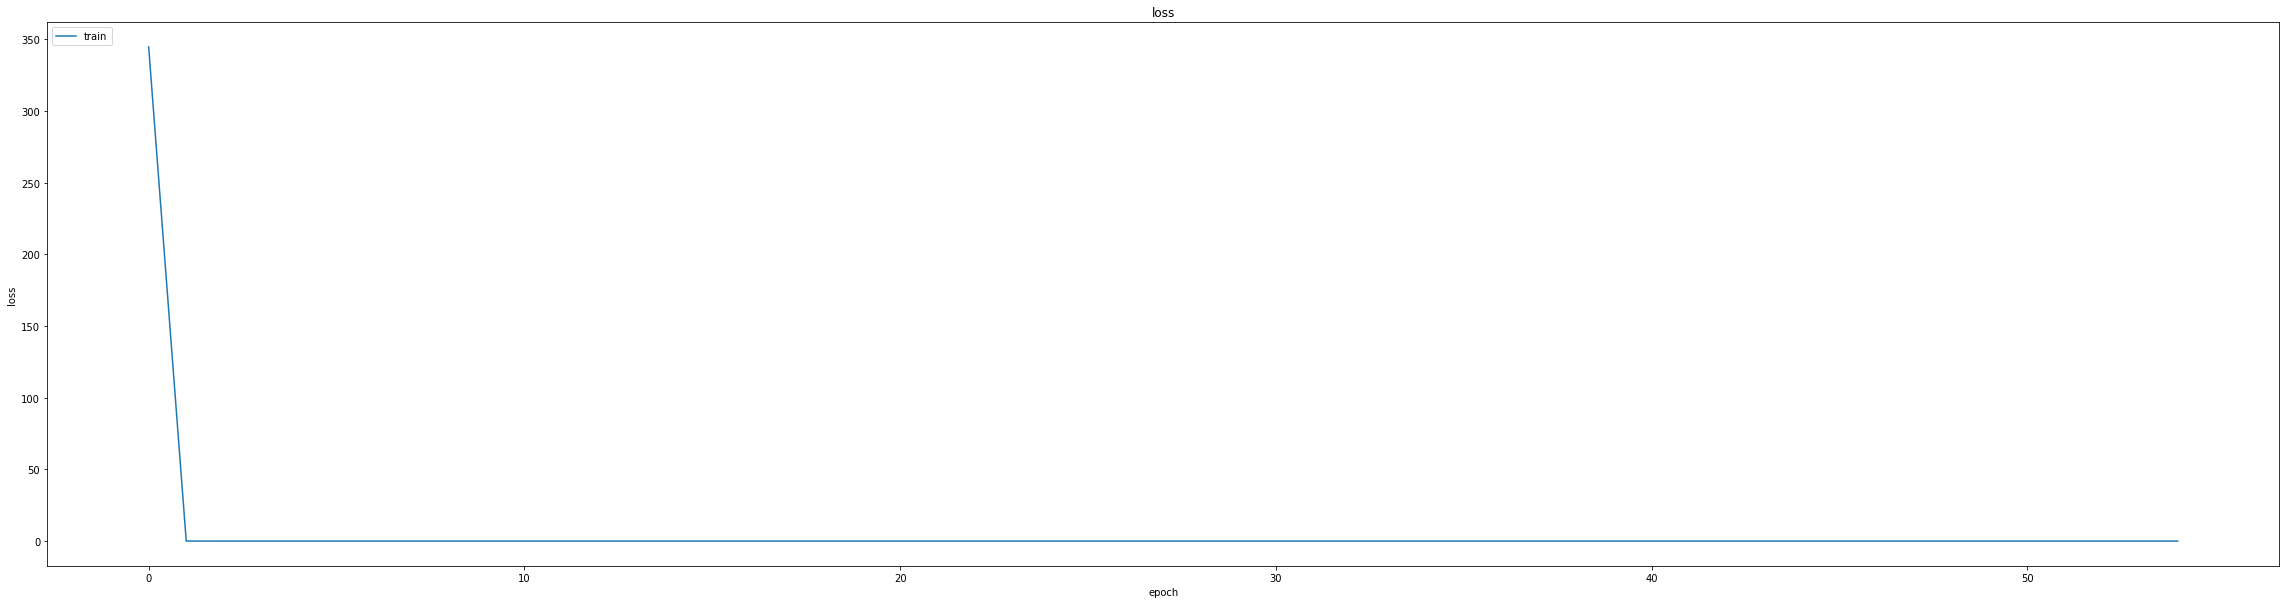

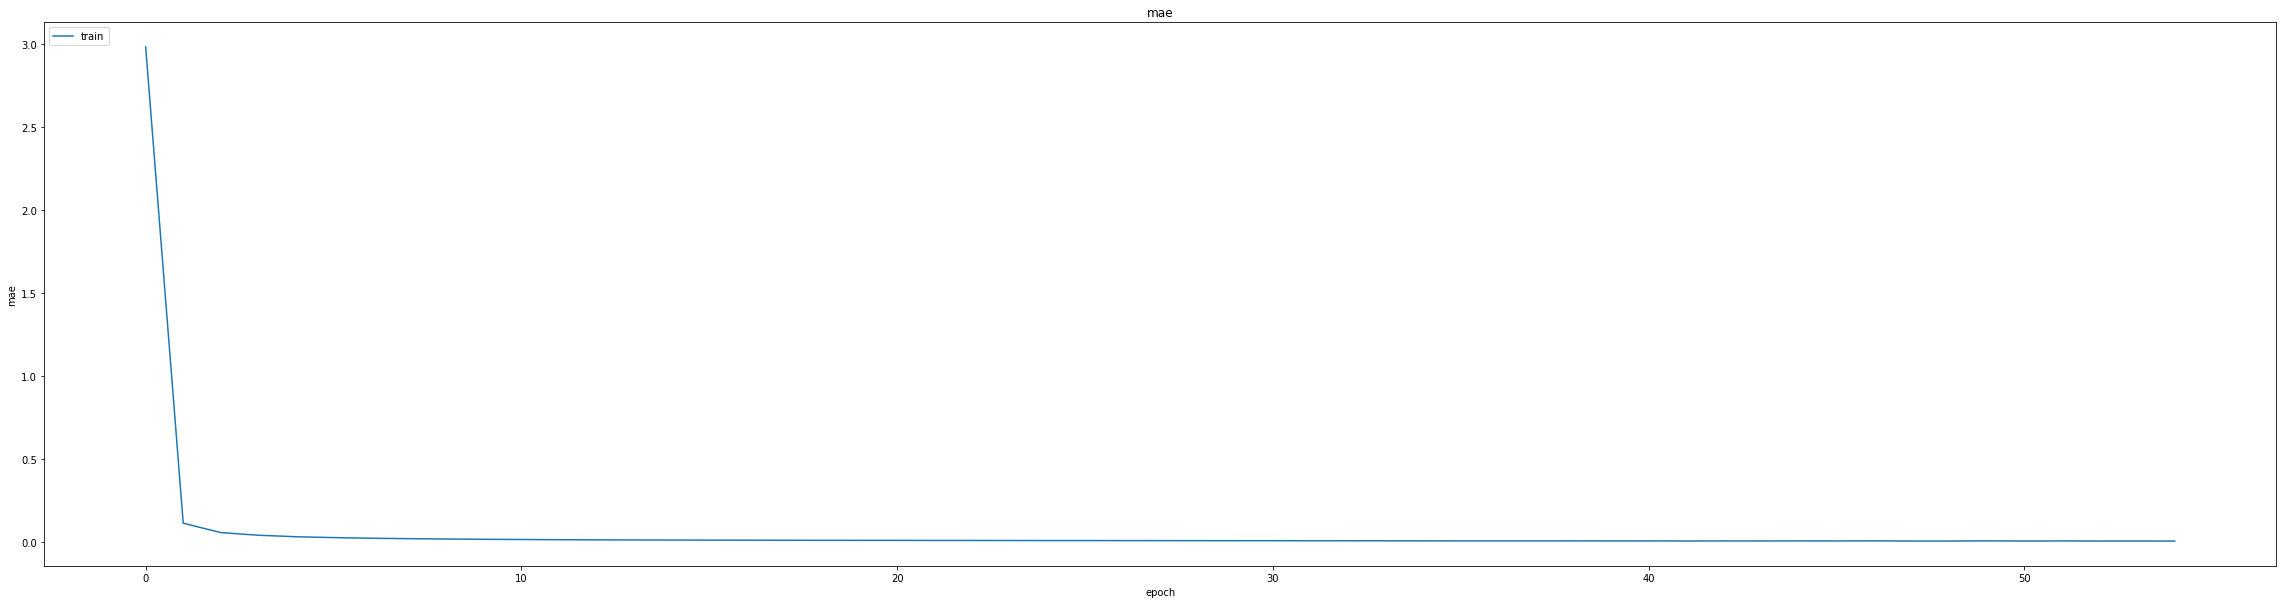

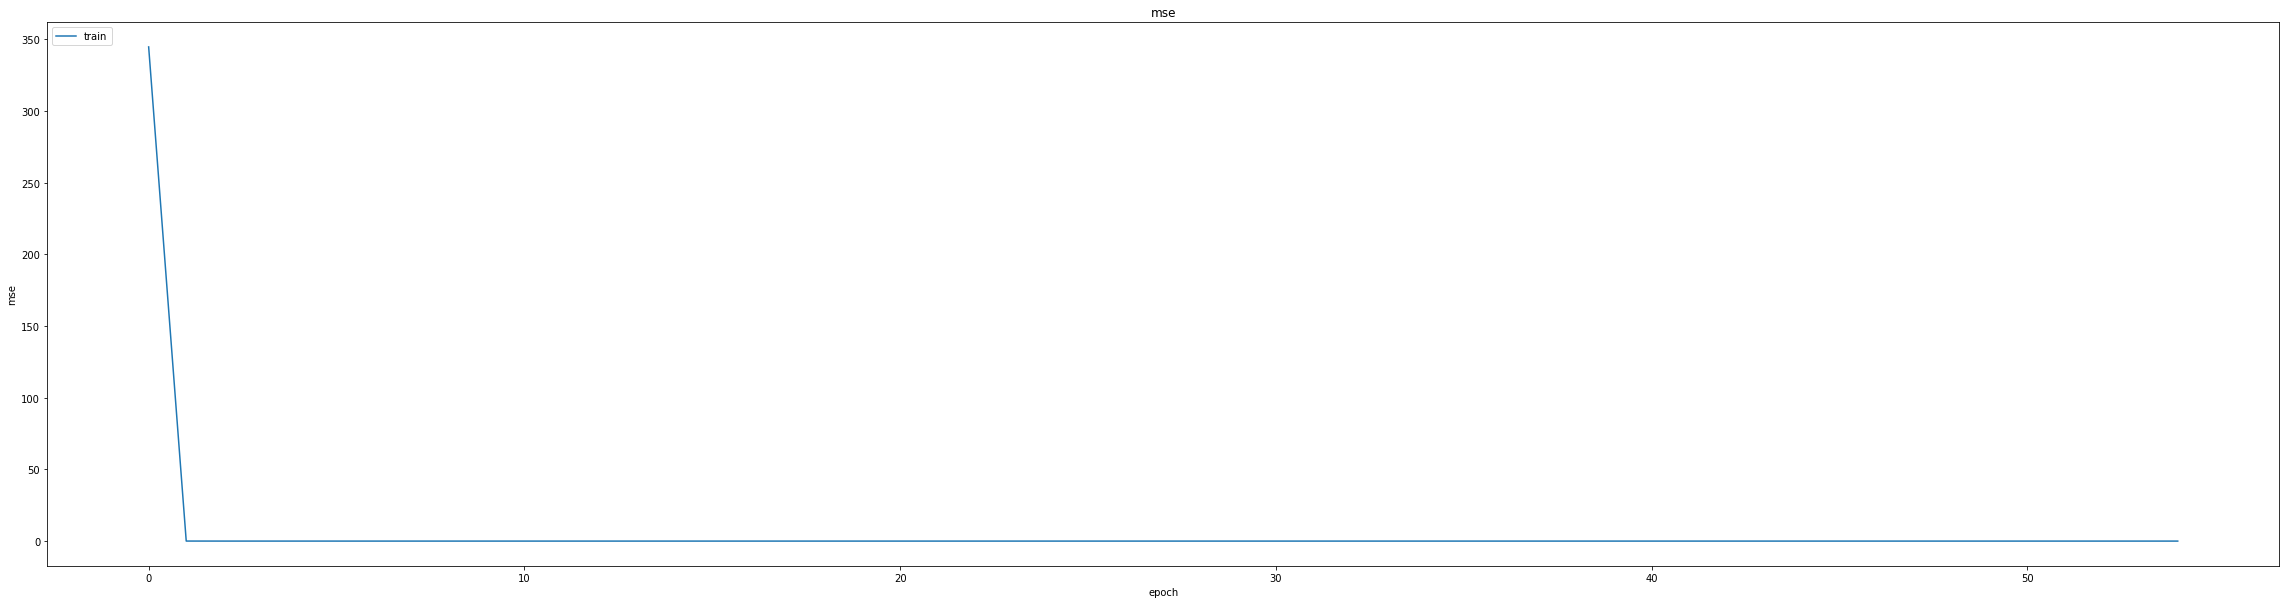

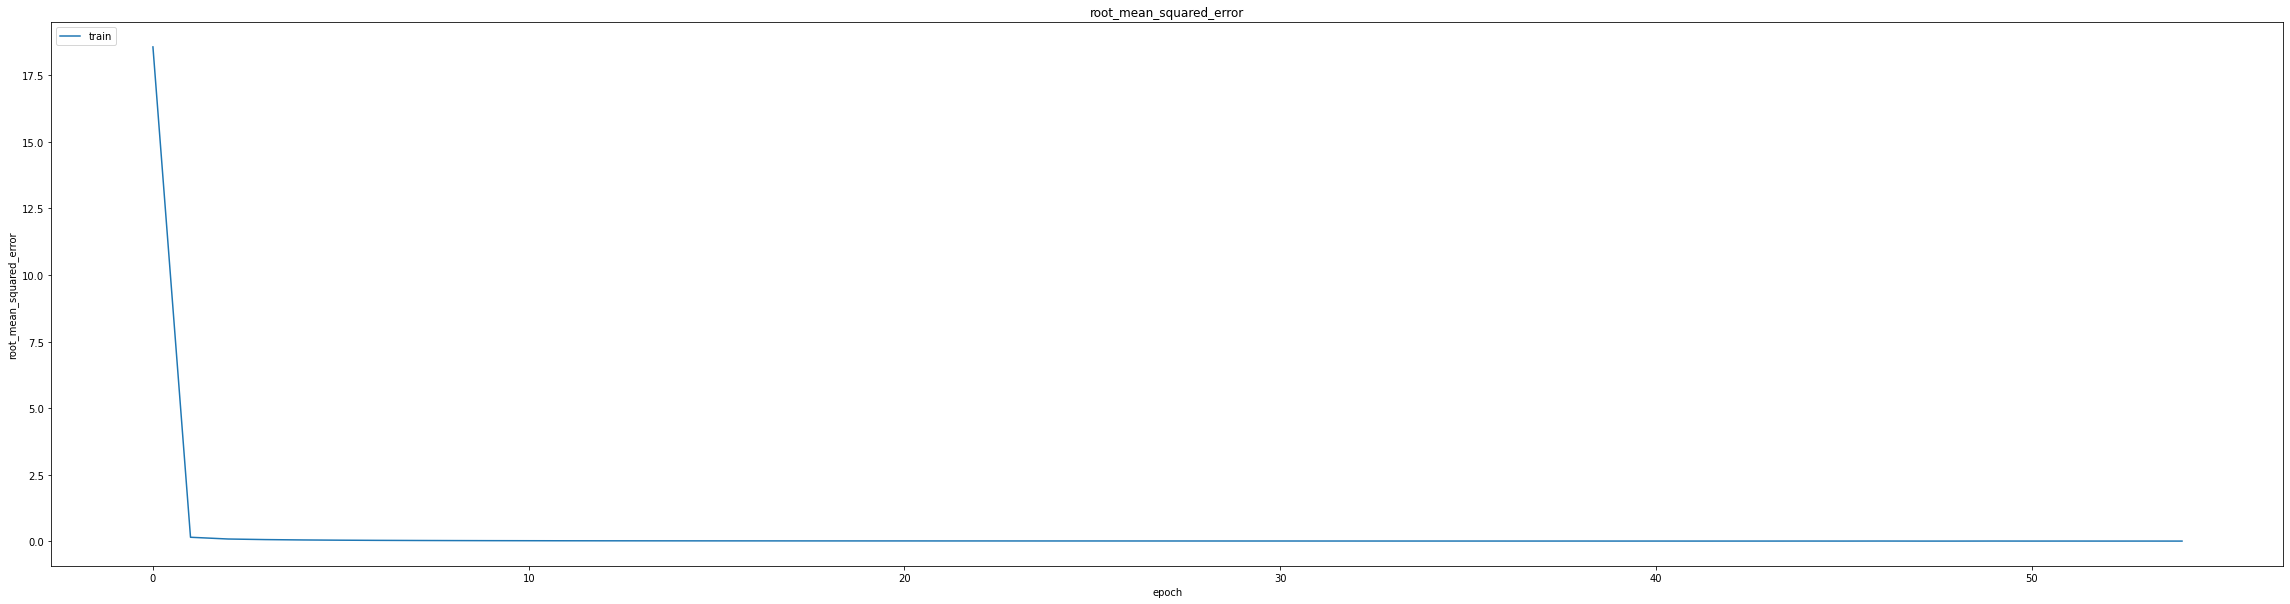

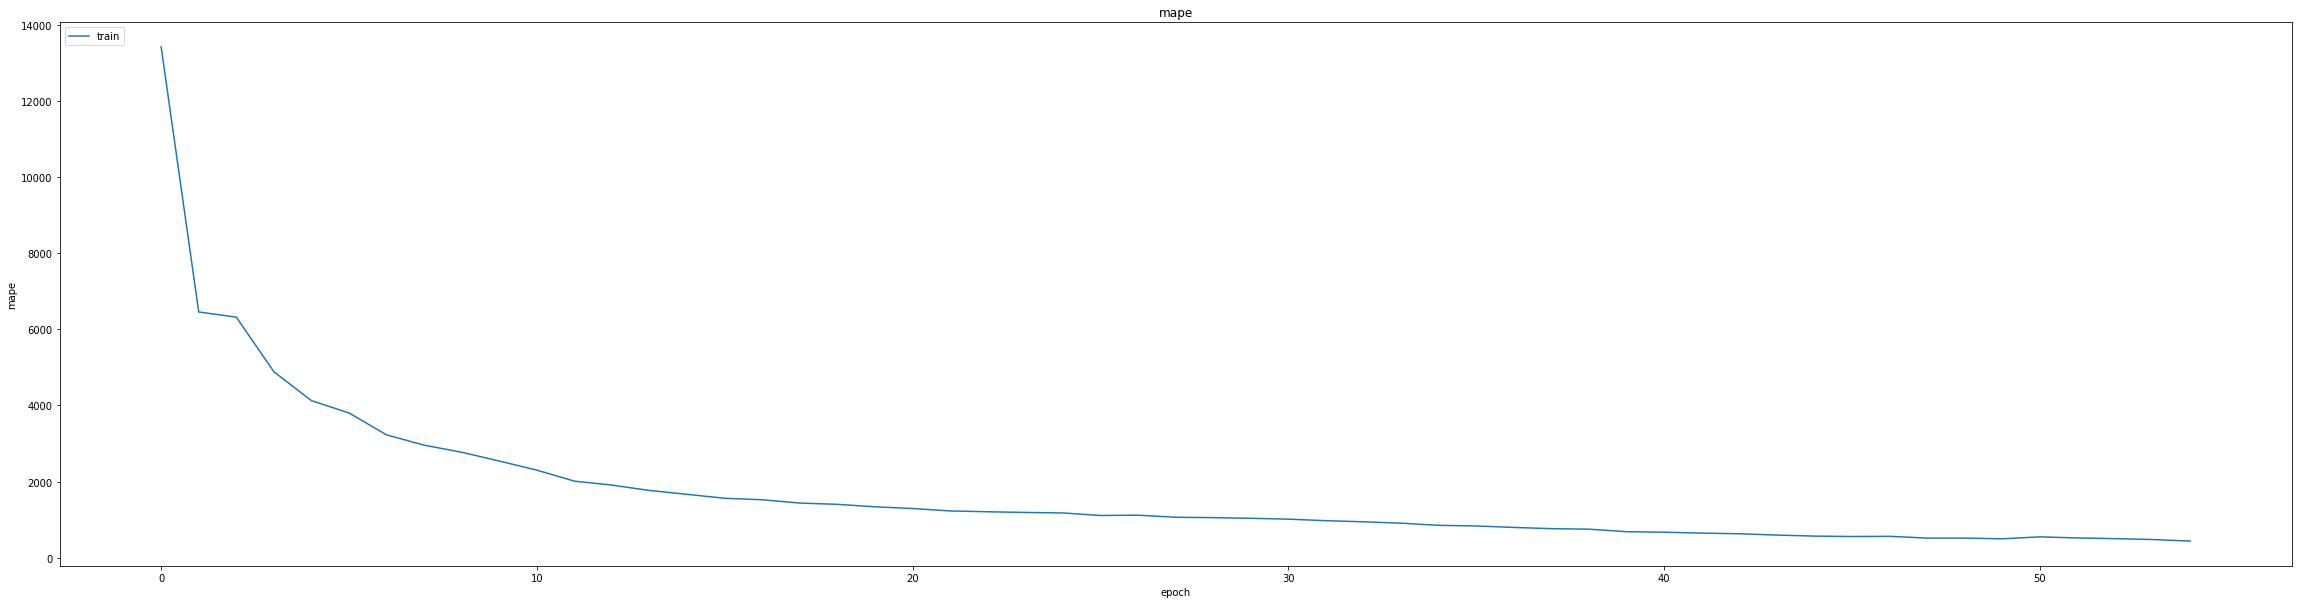

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010404936037957668
0.014232330024242401
464/464 [==============================] - 3s 4ms/step
0.9961521261242793


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 0.0089 - mae: 0.0210 - mse: 0.0089 - root_mean_squared_error: 0.0946 - mape: 4954.7695
Epoch 1: val_mse did not improve from 0.00020
348/348 [==============================] - 9s 15ms/step - loss: 0.0089 - mae: 0.0210 - mse: 0.0089 - root_mean_squared_error: 0.0944 - mape: 4942.2178 - val_loss: 0.0013 - val_mae: 0.0205 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 13278.9756 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 2.6393e-04 - mae: 0.0102 - mse: 2.6393e-04 - root_mean_squared_error: 0.0162 - mape: 3261.8574
Epoch 2: val_mse did not improve from 0.00020
348/348 [==============================] - 4s 12ms/step - loss: 2.6356e-04 - mae: 0.0102 - mse: 2.6356e-04 - root_mean_squared_error: 0.0162 - mape: 3253.5842 - val_loss: 3.0009e-04 - val_mae: 0.0128 - val_mse: 3.0009e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 5550.9512 - lr: 0.0010
lr changed 

348/348 [==============================] - 16s 46ms/step - loss: 9.1582e-05 - mae: 0.0073 - mse: 9.1582e-05 - root_mean_squared_error: 0.0096 - mape: 1227.2139 - val_loss: 1.9987e-04 - val_mae: 0.0104 - val_mse: 1.9987e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 3663.7922 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
348/348 [==============================] - ETA: 0s - loss: 8.4205e-05 - mae: 0.0069 - mse: 8.4205e-05 - root_mean_squared_error: 0.0092 - mape: 1165.0774
Epoch 15: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 8.4205e-05 - mae: 0.0069 - mse: 8.4205e-05 - root_mean_squared_error: 0.0092 - mape: 1165.0774 - val_loss: 1.7039e-04 - val_mae: 0.0099 - val_mse: 1.7039e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 3709.0969 - lr: 4.7830e-04
Epoch 16/25
345/348 [============================>.] - ETA: 0s - loss: 8.5690e-05 - mae: 0.0071 - mse: 8.5690e-05 - root_mean_squared_error: 0.0093 - mape: 1374.9120
Epoch 16: val_mse did not improve from 0.00017
348/348 [==============================] - 4s 13ms/step - loss: 8.5832e-05 - mae: 0.0071 - mse: 8.5832e-05 - root_mean_squared_error: 0.0093 - mape: 1363.5380 - val_loss: 2.9835e-04 - val_mae: 0.0145 - val_mse: 2.9835e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3601.8823 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
347/348 [============================>.] - ETA: 0s - loss: 8.0542e-05 - mae: 0.0068 - mse: 8.0542e-05 - root_mean_squared_error: 0.0090 - ma

348/348 [==============================] - 16s 48ms/step - loss: 8.0655e-05 - mae: 0.0068 - mse: 8.0655e-05 - root_mean_squared_error: 0.0090 - mape: 1284.2042 - val_loss: 1.6902e-04 - val_mae: 0.0099 - val_mse: 1.6902e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 3618.2148 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
348/348 [==============================] - ETA: 0s - loss: 8.2243e-05 - mae: 0.0069 - mse: 8.2243e-05 - root_mean_squared_error: 0.0091 - mape: 1206.2175
Epoch 19: val_mse did not improve from 0.00017
348/348 [==============================] - 4s 12ms/step - loss: 8.2243e-05 - mae: 0.0069 - mse: 8.2243e-05 - root_mean_squared_error: 0.0091 - mape: 1206.2175 - val_loss: 2.0444e-04 - val_mae: 0.0117 - val_mse: 2.0444e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3717.0500 - lr: 3.8742e-04
Epoch 20/25
345/348 [============================>.] - ETA: 0s - loss: 7.8582e-05 - mae: 0.0068 - mse: 7.8582e-05 - root_mean_squared_error: 0.0089 - m

348/348 [==============================] - 16s 46ms/step - loss: 7.1653e-05 - mae: 0.0064 - mse: 7.1653e-05 - root_mean_squared_error: 0.0085 - mape: 1210.1918 - val_loss: 1.2429e-04 - val_mae: 0.0082 - val_mse: 1.2429e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 3685.9404 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
345/348 [============================>.] - ETA: 0s - loss: 7.0975e-05 - mae: 0.0064 - mse: 7.0975e-05 - root_mean_squared_error: 0.0084 - mape: 1385.6205
Epoch 23: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 13ms/step - loss: 7.0826e-05 - mae: 0.0064 - mse: 7.0826e-05 - root_mean_squared_error: 0.0084 - mape: 1374.1479 - val_loss: 1.6879e-04 - val_mae: 0.0100 - val_mse: 1.6879e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 3615.3027 - lr: 3.1381e-04
Epoch 24/25
345/348 [============================>.] - ETA: 0s - loss: 7.1180e-05 - mae: 0.0064 - mse: 7.1180e-05 - root_mean_squared_error: 0.0084 - m

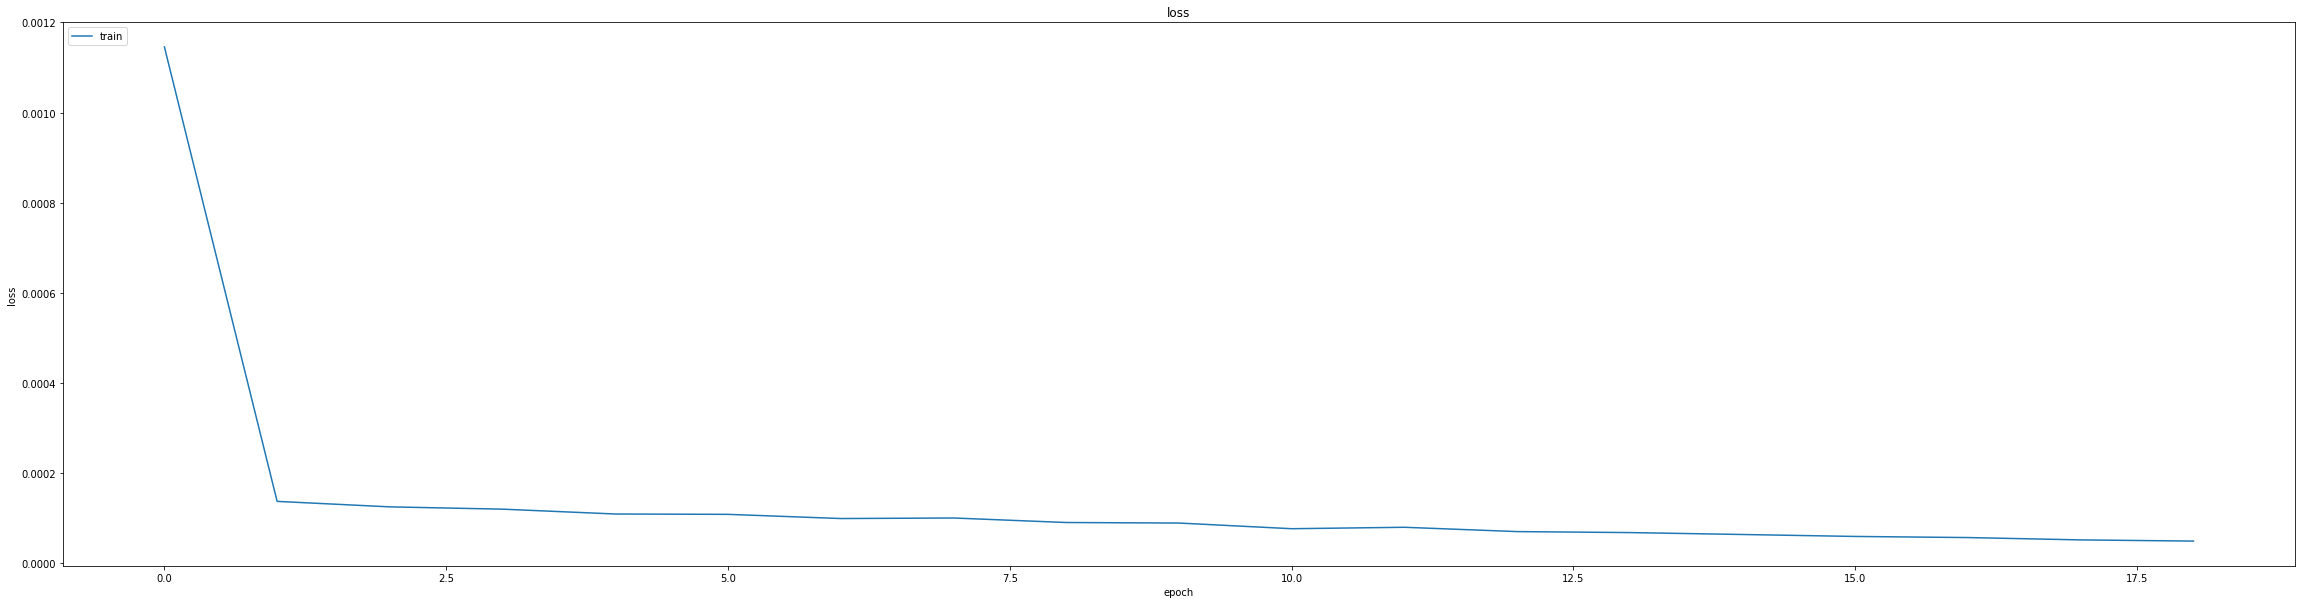

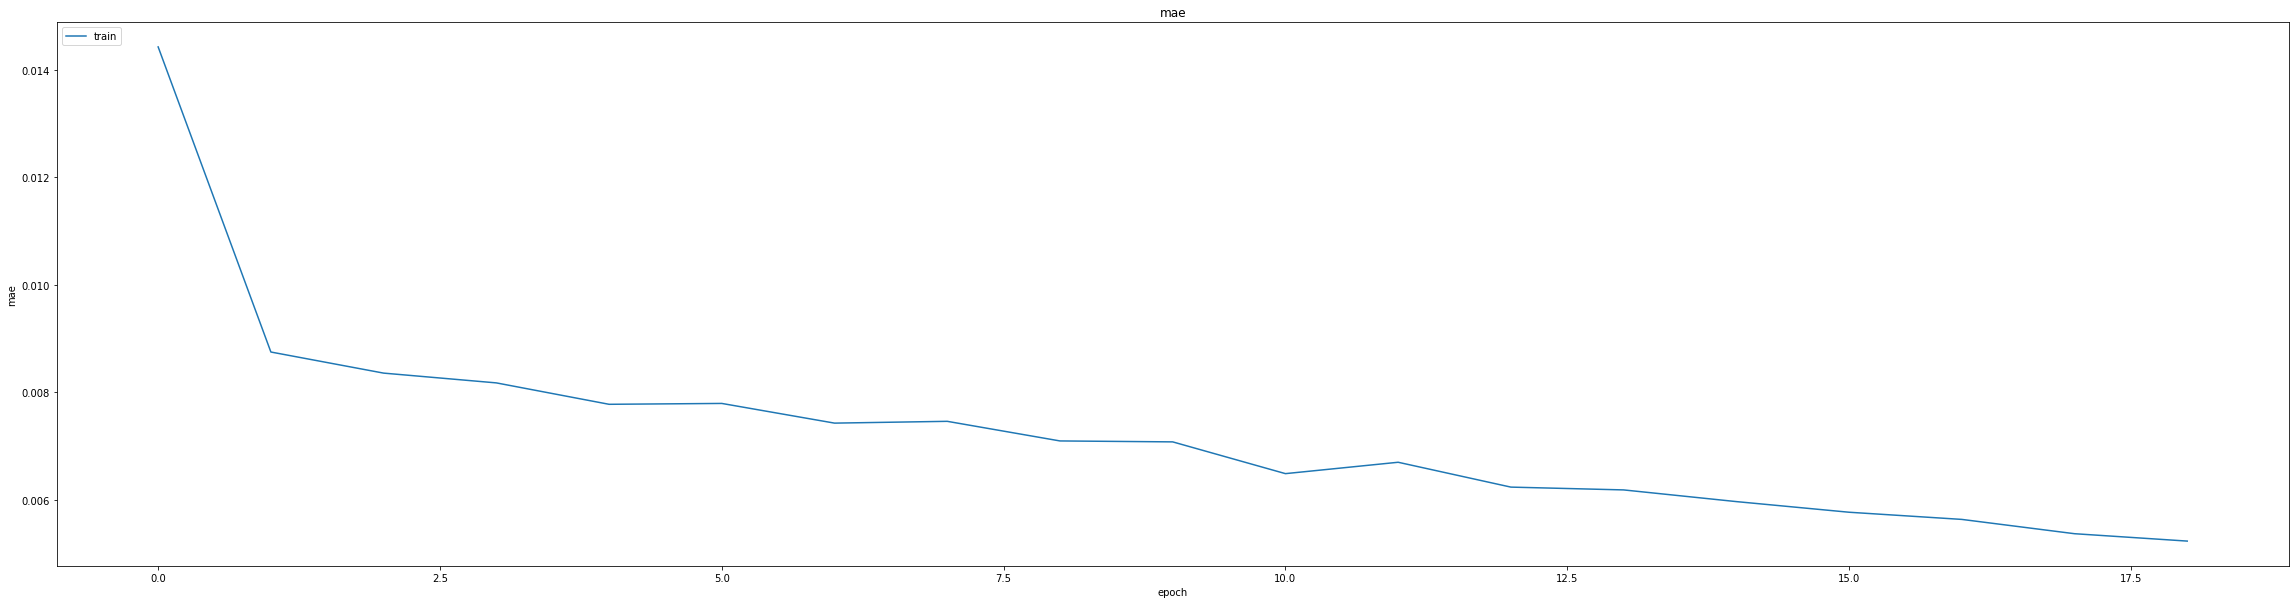

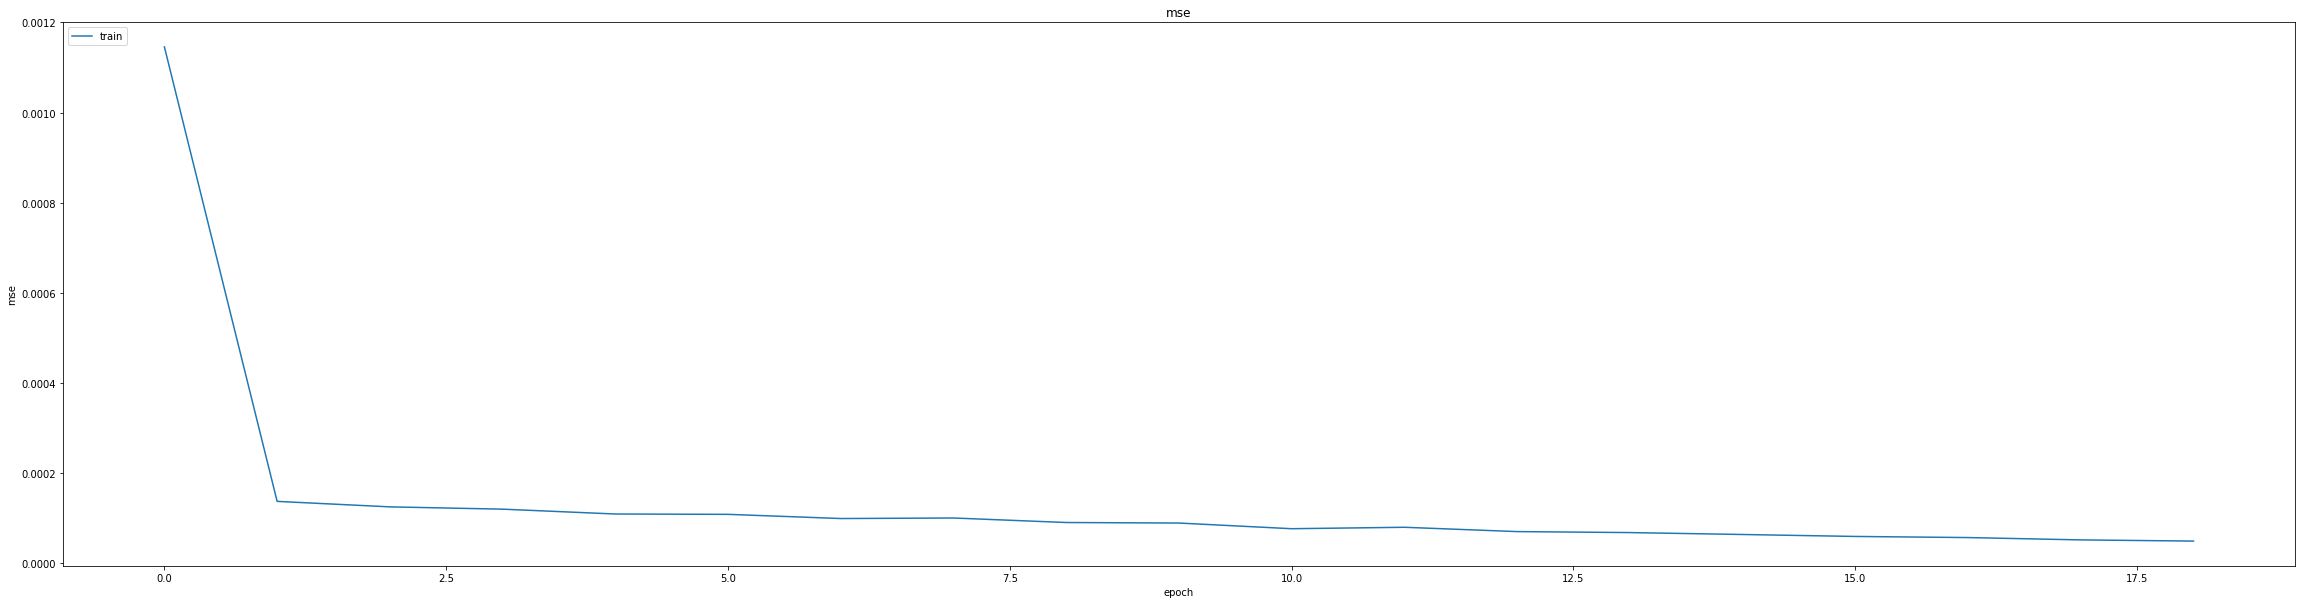

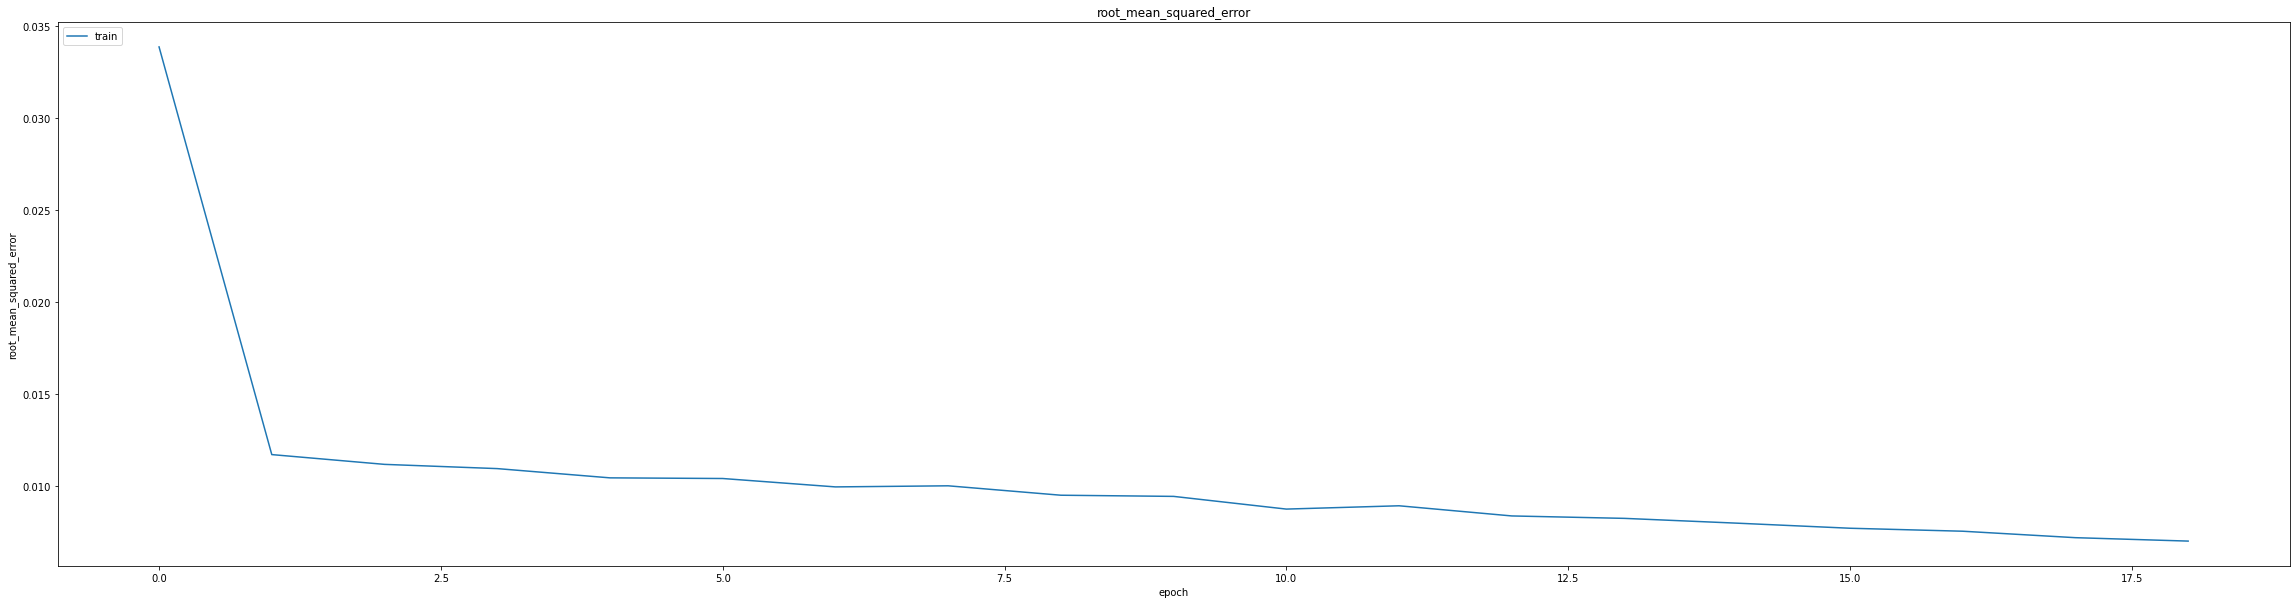

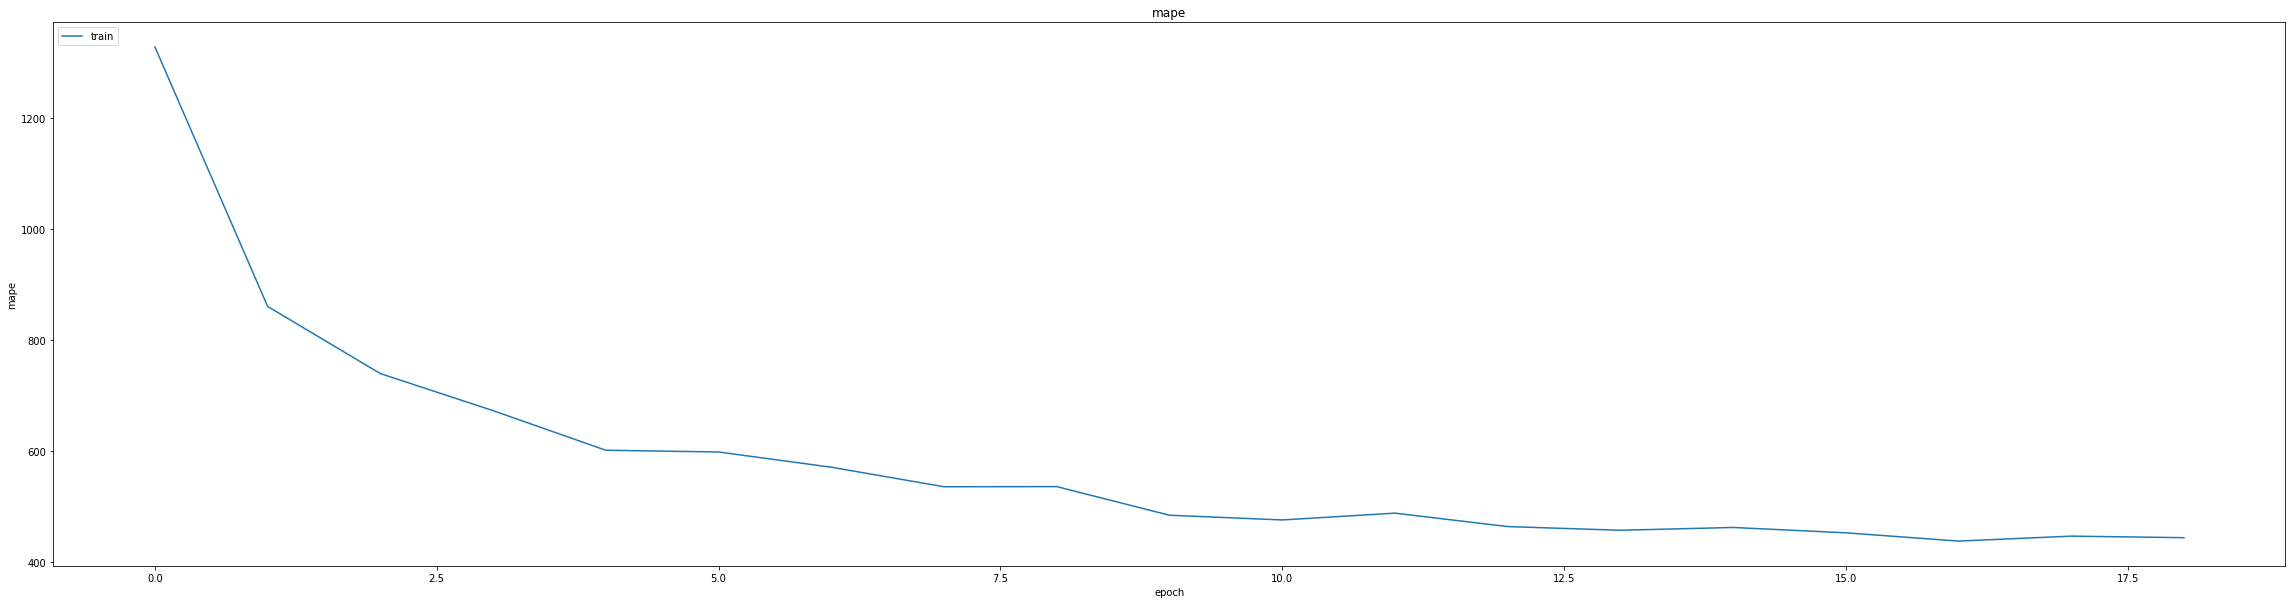

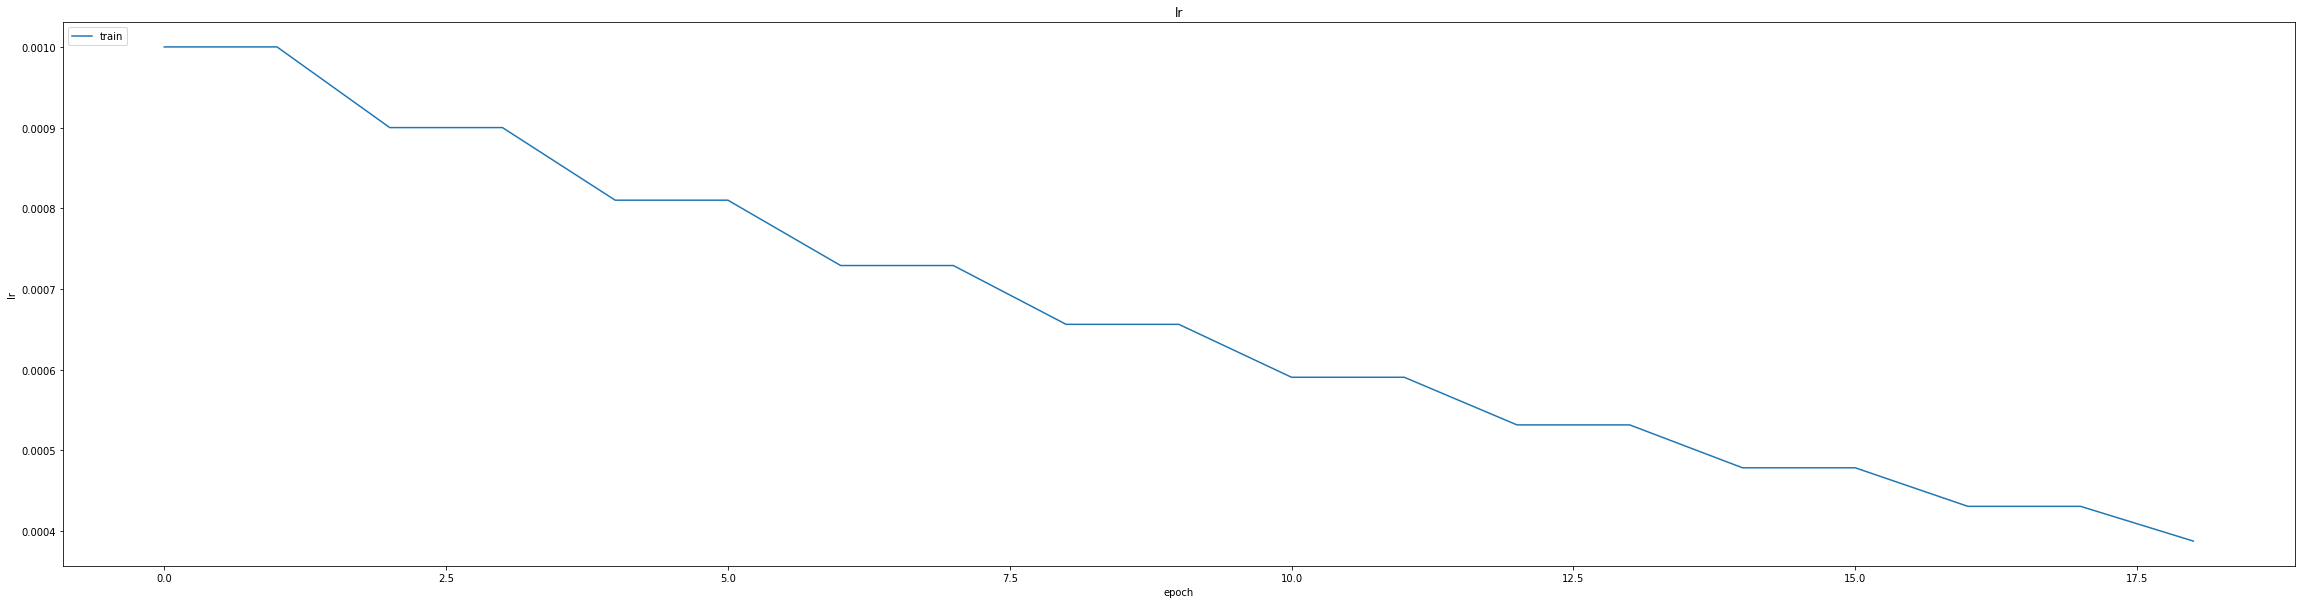

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008186163380742073
0.011148734949529171
464/464 [==============================] - 3s 4ms/step
0.9967368375540364


464/464 [==============================] - 2s 4ms/step


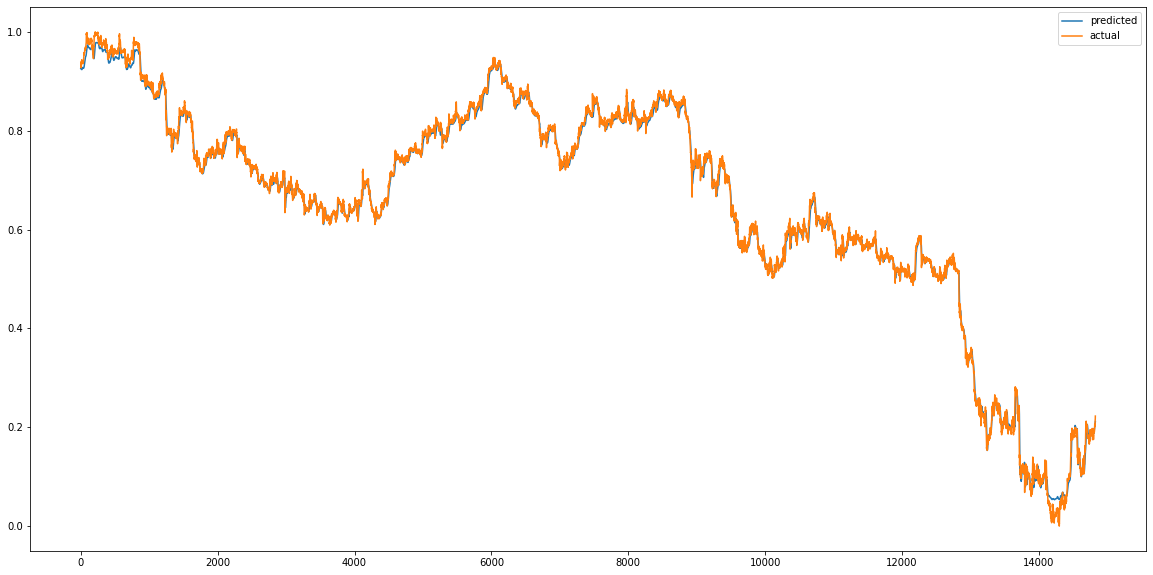

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


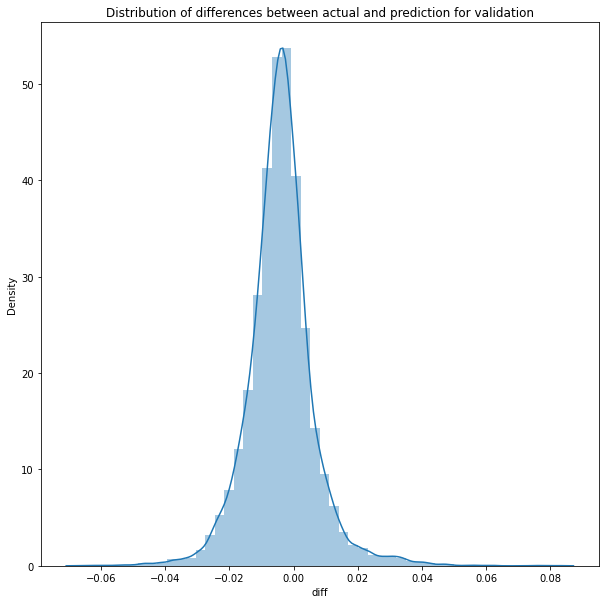

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


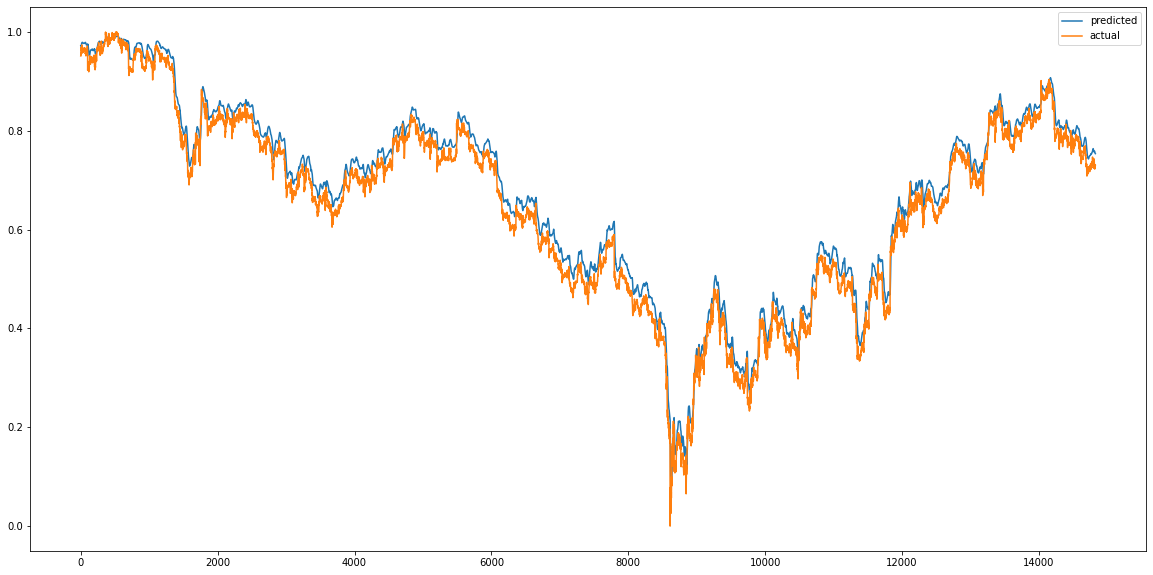

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


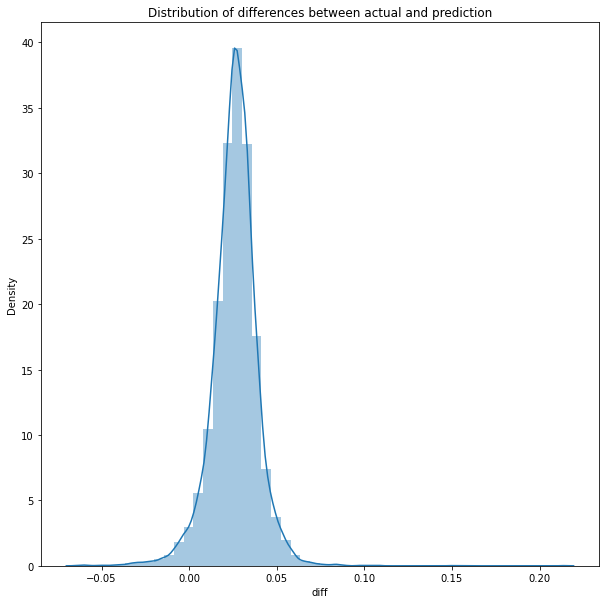

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0008466159096181123
RMSE :  0.029096664922600875
MAE :  0.026674235889986745
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9779551917028185


count    14827.000000
mean         0.025976
std          0.013109
min         -0.064351
25%          0.019375
50%          0.026499
75%          0.033208
max          0.213630
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_2 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
345/348 [============================>.] - ETA: 0s - loss: 474.3665 - mae: 5.5432 - mse: 474.3665 - root_mean_squared_error: 21.7800 - mape: 19677.2520
Epoch 1: val_mse improved from inf to 0.05484, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 19s 44ms/step - loss: 470.4359 - mae: 5.4987 - mse: 470.4359 - root_mean_squared_error: 21.6895 - mape: 19514.5020 - val_loss: 0.0548 - val_mae: 0.1726 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2342 - val_mape: 47529.9492
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 0.0499 - mae: 0.1873 - mse: 0.0499 - root_mean_squared_error: 0.2233 - mape: 17476.1387
Epoch 2: val_mse did not improve from 0.05484
348/348 [==============================] - 4s 11ms/step - loss: 0.0499 - mae: 0.1874 - mse: 0.0499 - root_mean_squared_error: 0.2234 - mape: 17281.6172 - val_loss: 0.0558 - val_mae: 0.1896 - val_mse: 0.0558 - val_root_mean_squared_error: 0.2361 - val_mape: 41476.5664
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0479 - mae: 0.1858 - mse: 0.0479 - root_mean_squared_error: 0.2188 - mape: 14786.7383
Epoch 3: val_mse did not improve from 0.05484
348/348 [==============================] - 4s 12ms

348/348 [==============================] - 14s 40ms/step - loss: 0.0455 - mae: 0.1831 - mse: 0.0455 - root_mean_squared_error: 0.2133 - mape: 13844.4551 - val_loss: 0.0548 - val_mae: 0.1874 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2341 - val_mape: 41426.5234
Epoch 10/75
344/348 [============================>.] - ETA: 0s - loss: 0.0452 - mae: 0.1826 - mse: 0.0452 - root_mean_squared_error: 0.2125 - mape: 13223.9639
Epoch 10: val_mse improved from 0.05482 to 0.05386, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0452 - mae: 0.1826 - mse: 0.0452 - root_mean_squared_error: 0.2125 - mape: 13076.8574 - val_loss: 0.0539 - val_mae: 0.1848 - val_mse: 0.0539 - val_root_mean_squared_error: 0.2321 - val_mape: 41656.7812
Epoch 11/75
344/348 [============================>.] - ETA: 0s - loss: 0.0446 - mae: 0.1816 - mse: 0.0446 - root_mean_squared_error: 0.2113 - mape: 14372.8486
Epoch 11: val_mse improved from 0.05386 to 0.05377, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0446 - mae: 0.1816 - mse: 0.0446 - root_mean_squared_error: 0.2113 - mape: 14212.9258 - val_loss: 0.0538 - val_mae: 0.1853 - val_mse: 0.0538 - val_root_mean_squared_error: 0.2319 - val_mape: 41245.0117
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0442 - mae: 0.1806 - mse: 0.0442 - root_mean_squared_error: 0.2102 - mape: 14498.8301
Epoch 12: val_mse improved from 0.05377 to 0.05280, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0442 - mae: 0.1806 - mse: 0.0442 - root_mean_squared_error: 0.2102 - mape: 14462.1416 - val_loss: 0.0528 - val_mae: 0.1829 - val_mse: 0.0528 - val_root_mean_squared_error: 0.2298 - val_mape: 41273.2266
Epoch 13/75
343/348 [============================>.] - ETA: 0s - loss: 0.0436 - mae: 0.1793 - mse: 0.0436 - root_mean_squared_error: 0.2087 - mape: 14782.6191
Epoch 13: val_mse improved from 0.05280 to 0.05205, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0435 - mae: 0.1793 - mse: 0.0435 - root_mean_squared_error: 0.2087 - mape: 14575.6943 - val_loss: 0.0521 - val_mae: 0.1822 - val_mse: 0.0521 - val_root_mean_squared_error: 0.2281 - val_mape: 40708.5117
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 0.0425 - mae: 0.1770 - mse: 0.0425 - root_mean_squared_error: 0.2062 - mape: 13402.2402
Epoch 14: val_mse improved from 0.05205 to 0.04990, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0425 - mae: 0.1770 - mse: 0.0425 - root_mean_squared_error: 0.2061 - mape: 13291.4902 - val_loss: 0.0499 - val_mae: 0.1777 - val_mse: 0.0499 - val_root_mean_squared_error: 0.2234 - val_mape: 40380.8047
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0394 - mae: 0.1696 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 14076.7373
Epoch 15: val_mse improved from 0.04990 to 0.04416, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0394 - mae: 0.1696 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 14076.7373 - val_loss: 0.0442 - val_mae: 0.1686 - val_mse: 0.0442 - val_root_mean_squared_error: 0.2101 - val_mape: 37448.5625
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0311 - mae: 0.1473 - mse: 0.0311 - root_mean_squared_error: 0.1764 - mape: 11945.4971
Epoch 16: val_mse improved from 0.04416 to 0.02664, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0311 - mae: 0.1471 - mse: 0.0311 - root_mean_squared_error: 0.1763 - mape: 11880.9775 - val_loss: 0.0266 - val_mae: 0.1248 - val_mse: 0.0266 - val_root_mean_squared_error: 0.1632 - val_mape: 32984.1250
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 0.0141 - mae: 0.0919 - mse: 0.0141 - root_mean_squared_error: 0.1189 - mape: 9846.5352
Epoch 17: val_mse improved from 0.02664 to 0.00659, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0141 - mae: 0.0917 - mse: 0.0141 - root_mean_squared_error: 0.1186 - mape: 9765.1025 - val_loss: 0.0066 - val_mae: 0.0542 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mape: 21928.4902
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0557 - mse: 0.0054 - root_mean_squared_error: 0.0737 - mape: 6972.8472
Epoch 18: val_mse improved from 0.00659 to 0.00412, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0054 - mae: 0.0557 - mse: 0.0054 - root_mean_squared_error: 0.0737 - mape: 6972.8472 - val_loss: 0.0041 - val_mae: 0.0428 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0642 - val_mape: 18996.3477
Epoch 19/75
343/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0454 - mse: 0.0037 - root_mean_squared_error: 0.0606 - mape: 6200.3354
Epoch 19: val_mse improved from 0.00412 to 0.00297, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0037 - mae: 0.0454 - mse: 0.0037 - root_mean_squared_error: 0.0606 - mape: 6113.4688 - val_loss: 0.0030 - val_mae: 0.0332 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0545 - val_mape: 17549.9102
Epoch 20/75
346/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0393 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 6726.8159
Epoch 20: val_mse improved from 0.00297 to 0.00255, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0028 - mae: 0.0393 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 6690.4468 - val_loss: 0.0026 - val_mae: 0.0305 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 16832.7539
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0359 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 5625.2012
Epoch 21: val_mse improved from 0.00255 to 0.00218, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0023 - mae: 0.0359 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 5562.5195 - val_loss: 0.0022 - val_mae: 0.0289 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 15924.3477
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0323 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 5932.6680
Epoch 22: val_mse improved from 0.00218 to 0.00175, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0019 - mae: 0.0323 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 5932.6680 - val_loss: 0.0018 - val_mae: 0.0241 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 15009.2109
Epoch 23/75
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0302 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 5231.7246
Epoch 23: val_mse improved from 0.00175 to 0.00154, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0017 - mae: 0.0302 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 5218.4678 - val_loss: 0.0015 - val_mae: 0.0222 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 14412.2969
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 5036.5176
Epoch 24: val_mse improved from 0.00154 to 0.00139, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 5036.5176 - val_loss: 0.0014 - val_mae: 0.0208 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 13934.6133
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0264 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 5275.8813
Epoch 25: val_mse improved from 0.00139 to 0.00131, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0013 - mae: 0.0264 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 5262.5029 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 13198.6104
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 4627.7915
Epoch 26: val_mse improved from 0.00131 to 0.00103, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 4602.7910 - val_loss: 0.0010 - val_mae: 0.0184 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 12529.3115
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 4745.2310
Epoch 27: val_mse improved from 0.00103 to 0.00088, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 4705.9697 - val_loss: 8.8485e-04 - val_mae: 0.0173 - val_mse: 8.8485e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 11818.1816
Epoch 28/75
347/348 [============================>.] - ETA: 0s - loss: 8.9779e-04 - mae: 0.0225 - mse: 8.9779e-04 - root_mean_squared_error: 0.0300 - mape: 4343.2017
Epoch 28: val_mse improved from 0.00088 to 0.00081, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 8.9827e-04 - mae: 0.0225 - mse: 8.9827e-04 - root_mean_squared_error: 0.0300 - mape: 4332.2085 - val_loss: 8.1248e-04 - val_mae: 0.0177 - val_mse: 8.1248e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 11238.6094
Epoch 29/75
348/348 [==============================] - ETA: 0s - loss: 8.1359e-04 - mae: 0.0215 - mse: 8.1359e-04 - root_mean_squared_error: 0.0285 - mape: 4015.3777
Epoch 29: val_mse improved from 0.00081 to 0.00077, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 8.1359e-04 - mae: 0.0215 - mse: 8.1359e-04 - root_mean_squared_error: 0.0285 - mape: 4015.3777 - val_loss: 7.7453e-04 - val_mae: 0.0185 - val_mse: 7.7453e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 10608.9141
Epoch 30/75
343/348 [============================>.] - ETA: 0s - loss: 7.4589e-04 - mae: 0.0207 - mse: 7.4589e-04 - root_mean_squared_error: 0.0273 - mape: 3830.1973
Epoch 30: val_mse improved from 0.00077 to 0.00067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 7.4503e-04 - mae: 0.0207 - mse: 7.4503e-04 - root_mean_squared_error: 0.0273 - mape: 3776.5081 - val_loss: 6.6835e-04 - val_mae: 0.0164 - val_mse: 6.6835e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 10281.2549
Epoch 31/75
344/348 [============================>.] - ETA: 0s - loss: 6.8628e-04 - mae: 0.0198 - mse: 6.8628e-04 - root_mean_squared_error: 0.0262 - mape: 3745.0244
Epoch 31: val_mse improved from 0.00067 to 0.00060, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 6.8531e-04 - mae: 0.0198 - mse: 6.8531e-04 - root_mean_squared_error: 0.0262 - mape: 3703.2615 - val_loss: 5.9565e-04 - val_mae: 0.0158 - val_mse: 5.9565e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 9723.1279
Epoch 32/75
348/348 [==============================] - ETA: 0s - loss: 6.2571e-04 - mae: 0.0190 - mse: 6.2571e-04 - root_mean_squared_error: 0.0250 - mape: 3854.7700
Epoch 32: val_mse improved from 0.00060 to 0.00056, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 6.2571e-04 - mae: 0.0190 - mse: 6.2571e-04 - root_mean_squared_error: 0.0250 - mape: 3854.7700 - val_loss: 5.6315e-04 - val_mae: 0.0154 - val_mse: 5.6315e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 9543.2539
Epoch 33/75
345/348 [============================>.] - ETA: 0s - loss: 5.8692e-04 - mae: 0.0184 - mse: 5.8692e-04 - root_mean_squared_error: 0.0242 - mape: 3527.5688
Epoch 33: val_mse improved from 0.00056 to 0.00056, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 5.8652e-04 - mae: 0.0184 - mse: 5.8652e-04 - root_mean_squared_error: 0.0242 - mape: 3498.3684 - val_loss: 5.6232e-04 - val_mae: 0.0162 - val_mse: 5.6232e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 9146.5820
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 5.4431e-04 - mae: 0.0177 - mse: 5.4431e-04 - root_mean_squared_error: 0.0233 - mape: 3337.6394
Epoch 34: val_mse did not improve from 0.00056
348/348 [==============================] - 4s 11ms/step - loss: 5.4381e-04 - mae: 0.0177 - mse: 5.4381e-04 - root_mean_squared_error: 0.0233 - mape: 3319.5942 - val_loss: 6.3940e-04 - val_mae: 0.0188 - val_mse: 6.3940e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 8773.6250
Epoch 35/75
344/348 [============================>.] - ETA: 0s - loss: 5.3139e-04 - mae: 0.0177 - mse: 5.3139e-04 - root_mean_squared_error: 0.0231 - mape: 3008.8730
Epoch 35: val_mse improved from 0.00056 to 0.00054, savi

348/348 [==============================] - 14s 39ms/step - loss: 5.3089e-04 - mae: 0.0177 - mse: 5.3089e-04 - root_mean_squared_error: 0.0230 - mape: 2975.3462 - val_loss: 5.3933e-04 - val_mae: 0.0163 - val_mse: 5.3933e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 8619.1025
Epoch 36/75
345/348 [============================>.] - ETA: 0s - loss: 4.7609e-04 - mae: 0.0166 - mse: 4.7609e-04 - root_mean_squared_error: 0.0218 - mape: 3246.5000
Epoch 36: val_mse improved from 0.00054 to 0.00051, saving model to /content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 4.7601e-04 - mae: 0.0166 - mse: 4.7601e-04 - root_mean_squared_error: 0.0218 - mape: 3219.6316 - val_loss: 5.1070e-04 - val_mae: 0.0161 - val_mse: 5.1070e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 8246.4785
Epoch 37/75
344/348 [============================>.] - ETA: 0s - loss: 4.5679e-04 - mae: 0.0164 - mse: 4.5679e-04 - root_mean_squared_error: 0.0214 - mape: 3120.1436
Epoch 37: val_mse did not improve from 0.00051
348/348 [==============================] - 4s 11ms/step - loss: 4.5618e-04 - mae: 0.0164 - mse: 4.5618e-04 - root_mean_squared_error: 0.0214 - mape: 3085.3591 - val_loss: 7.1193e-04 - val_mae: 0.0215 - val_mse: 7.1193e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 8032.3687
Epoch 38/75
343/348 [============================>.] - ETA: 0s - loss: 4.3711e-04 - mae: 0.0161 - mse: 4.3711e-04 - root_mean_squared_error: 0.0209 - mape: 2944.3457
Epoch 38: val_mse improved from 0.00051 to 0.00043, savi

348/348 [==============================] - 14s 39ms/step - loss: 4.3679e-04 - mae: 0.0161 - mse: 4.3679e-04 - root_mean_squared_error: 0.0209 - mape: 2903.0669 - val_loss: 4.3480e-04 - val_mae: 0.0144 - val_mse: 4.3480e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 7840.1675
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 4.1003e-04 - mae: 0.0155 - mse: 4.1003e-04 - root_mean_squared_error: 0.0202 - mape: 2861.8398
Epoch 39: val_mse did not improve from 0.00043
348/348 [==============================] - 4s 11ms/step - loss: 4.0960e-04 - mae: 0.0155 - mse: 4.0960e-04 - root_mean_squared_error: 0.0202 - mape: 2838.1489 - val_loss: 4.4591e-04 - val_mae: 0.0153 - val_mse: 4.4591e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 7477.4233
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 3.7679e-04 - mae: 0.0149 - mse: 3.7679e-04 - root_mean_squared_error: 0.0194 - mape: 2772.5938
Epoch 40: val_mse did not improve from 0.00043
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 3.9772e-04 - mae: 0.0154 - mse: 3.9772e-04 - root_mean_squared_error: 0.0199 - mape: 2640.2751 - val_loss: 4.0164e-04 - val_mae: 0.0142 - val_mse: 4.0164e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 7080.5186
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 3.6113e-04 - mae: 0.0147 - mse: 3.6113e-04 - root_mean_squared_error: 0.0190 - mape: 2535.4141
Epoch 42: val_mse did not improve from 0.00040
348/348 [==============================] - 4s 12ms/step - loss: 3.6113e-04 - mae: 0.0147 - mse: 3.6113e-04 - root_mean_squared_error: 0.0190 - mape: 2535.4141 - val_loss: 6.0763e-04 - val_mae: 0.0200 - val_mse: 6.0763e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 6790.7686
Epoch 43/75
344/348 [============================>.] - ETA: 0s - loss: 3.6154e-04 - mae: 0.0147 - mse: 3.6154e-04 - root_mean_squared_error: 0.0190 - mape: 2578.4580
Epoch 43: val_mse improved from 0.00040 to 0.00036, savi

348/348 [==============================] - 14s 40ms/step - loss: 3.6157e-04 - mae: 0.0147 - mse: 3.6157e-04 - root_mean_squared_error: 0.0190 - mape: 2549.7131 - val_loss: 3.5611e-04 - val_mae: 0.0130 - val_mse: 3.5611e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 6716.5273
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 3.5033e-04 - mae: 0.0145 - mse: 3.5033e-04 - root_mean_squared_error: 0.0187 - mape: 2431.0798
Epoch 44: val_mse did not improve from 0.00036
348/348 [==============================] - 4s 12ms/step - loss: 3.5066e-04 - mae: 0.0145 - mse: 3.5066e-04 - root_mean_squared_error: 0.0187 - mape: 2410.9558 - val_loss: 4.6973e-04 - val_mae: 0.0159 - val_mse: 4.6973e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 6624.6631
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 3.2027e-04 - mae: 0.0138 - mse: 3.2027e-04 - root_mean_squared_error: 0.0179 - mape: 2660.1140
Epoch 45: val_mse did not improve from 0.00036
348/348 [

348/348 [==============================] - 13s 38ms/step - loss: 2.9545e-04 - mae: 0.0132 - mse: 2.9545e-04 - root_mean_squared_error: 0.0172 - mape: 2466.0588 - val_loss: 3.2908e-04 - val_mae: 0.0127 - val_mse: 3.2908e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 6086.4521
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 3.1091e-04 - mae: 0.0136 - mse: 3.1091e-04 - root_mean_squared_error: 0.0176 - mape: 2455.7395
Epoch 49: val_mse did not improve from 0.00033
348/348 [==============================] - 4s 11ms/step - loss: 3.1091e-04 - mae: 0.0136 - mse: 3.1091e-04 - root_mean_squared_error: 0.0176 - mape: 2455.7395 - val_loss: 4.3856e-04 - val_mae: 0.0161 - val_mse: 4.3856e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 6043.8574
Epoch 50/75
345/348 [============================>.] - ETA: 0s - loss: 2.7383e-04 - mae: 0.0127 - mse: 2.7383e-04 - root_mean_squared_error: 0.0165 - mape: 2359.9639
Epoch 50: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 2.5788e-04 - mae: 0.0123 - mse: 2.5788e-04 - root_mean_squared_error: 0.0161 - mape: 1853.6354 - val_loss: 2.7989e-04 - val_mae: 0.0118 - val_mse: 2.7989e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 4981.1655
Epoch 59/75
344/348 [============================>.] - ETA: 0s - loss: 2.3842e-04 - mae: 0.0119 - mse: 2.3842e-04 - root_mean_squared_error: 0.0154 - mape: 1635.7709
Epoch 59: val_mse did not improve from 0.00028
348/348 [==============================] - 4s 11ms/step - loss: 2.3801e-04 - mae: 0.0119 - mse: 2.3801e-04 - root_mean_squared_error: 0.0154 - mape: 1617.5424 - val_loss: 4.0897e-04 - val_mae: 0.0162 - val_mse: 4.0897e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 4833.2070
Epoch 60/75
345/348 [============================>.] - ETA: 0s - loss: 2.1914e-04 - mae: 0.0114 - mse: 2.1914e-04 - root_mean_squared_error: 0.0148 - mape: 1859.1919
Epoch 60: val_mse did not improve from 0.00028
348/348 [

348/348 [==============================] - 14s 42ms/step - loss: 2.3910e-04 - mae: 0.0119 - mse: 2.3910e-04 - root_mean_squared_error: 0.0155 - mape: 1692.4043 - val_loss: 2.7624e-04 - val_mae: 0.0120 - val_mse: 2.7624e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 4422.3213
Epoch 66/75
348/348 [==============================] - ETA: 0s - loss: 1.8320e-04 - mae: 0.0103 - mse: 1.8320e-04 - root_mean_squared_error: 0.0135 - mape: 1750.8098
Epoch 66: val_mse did not improve from 0.00028
348/348 [==============================] - 4s 11ms/step - loss: 1.8320e-04 - mae: 0.0103 - mse: 1.8320e-04 - root_mean_squared_error: 0.0135 - mape: 1750.8098 - val_loss: 3.2232e-04 - val_mae: 0.0141 - val_mse: 3.2232e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 4334.7085
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 2.0821e-04 - mae: 0.0112 - mse: 2.0821e-04 - root_mean_squared_error: 0.0144 - mape: 1533.7646
Epoch 67: val_mse did not improve from 0.00028
348/348 [

348/348 [==============================] - 13s 39ms/step - loss: 1.6249e-04 - mae: 0.0099 - mse: 1.6249e-04 - root_mean_squared_error: 0.0127 - mape: 1397.1361 - val_loss: 2.7359e-04 - val_mae: 0.0133 - val_mse: 2.7359e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3703.5322
Epoch 74/75
347/348 [============================>.] - ETA: 0s - loss: 1.6091e-04 - mae: 0.0098 - mse: 1.6091e-04 - root_mean_squared_error: 0.0127 - mape: 1172.9117
Epoch 74: val_mse did not improve from 0.00027
348/348 [==============================] - 4s 11ms/step - loss: 1.6107e-04 - mae: 0.0098 - mse: 1.6107e-04 - root_mean_squared_error: 0.0127 - mape: 1169.9449 - val_loss: 7.1705e-04 - val_mae: 0.0244 - val_mse: 7.1705e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 3449.0491
Epoch 75/75
346/348 [============================>.] - ETA: 0s - loss: 1.2158e-04 - mae: 0.0085 - mse: 1.2158e-04 - root_mean_squared_error: 0.0110 - mape: 1370.9990
Epoch 75: val_mse improved from 0.00027 to 0.00019, savi

348/348 [==============================] - 14s 39ms/step - loss: 1.2152e-04 - mae: 0.0085 - mse: 1.2152e-04 - root_mean_squared_error: 0.0110 - mape: 1363.5880 - val_loss: 1.8733e-04 - val_mae: 0.0103 - val_mse: 1.8733e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 3473.6919


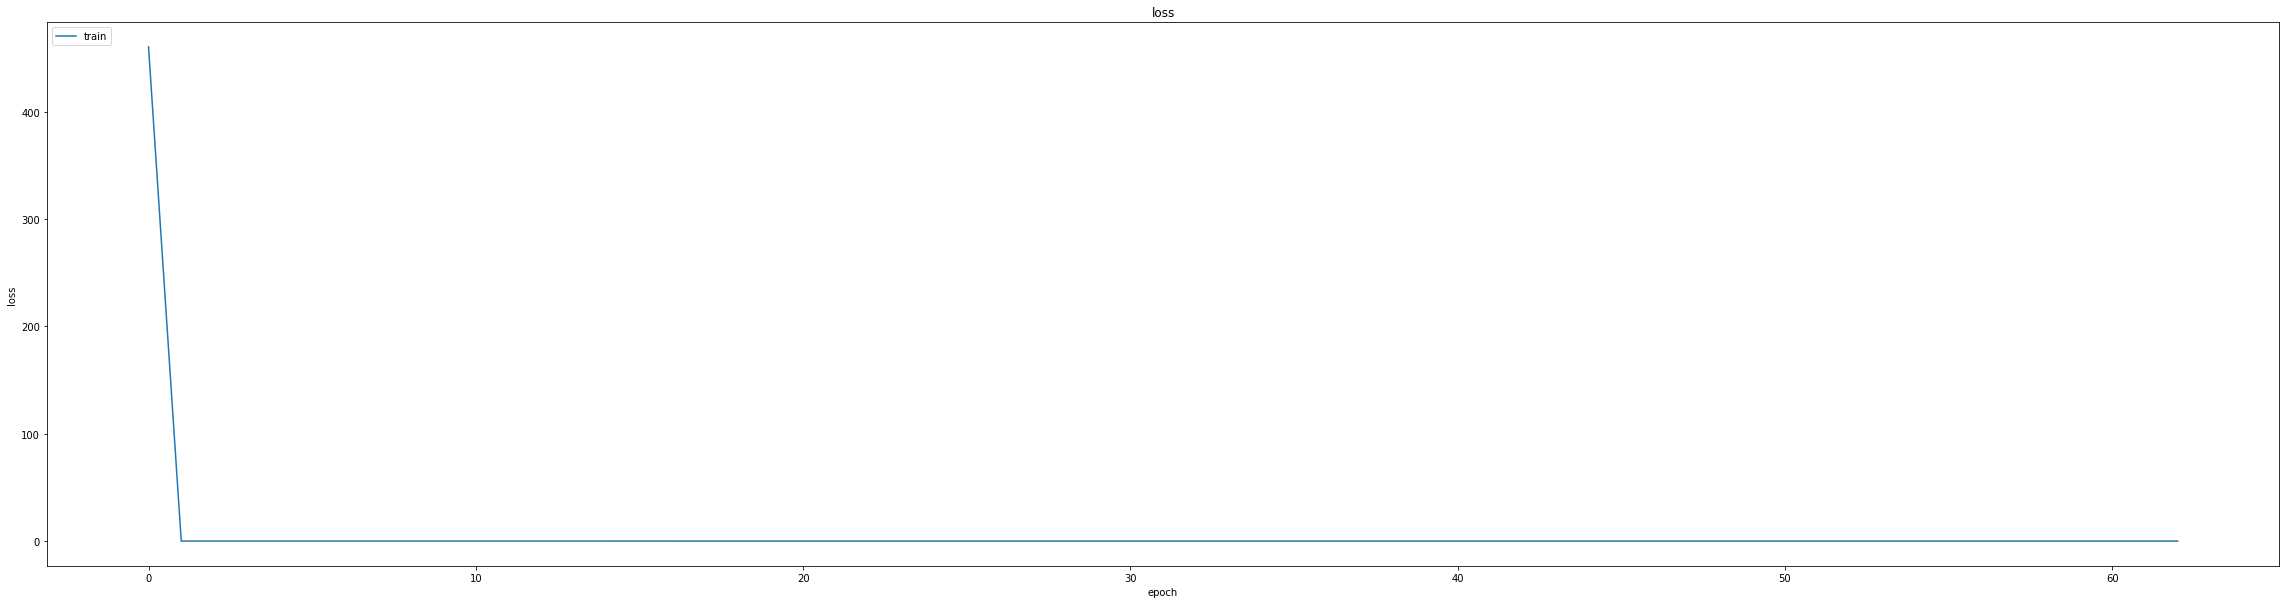

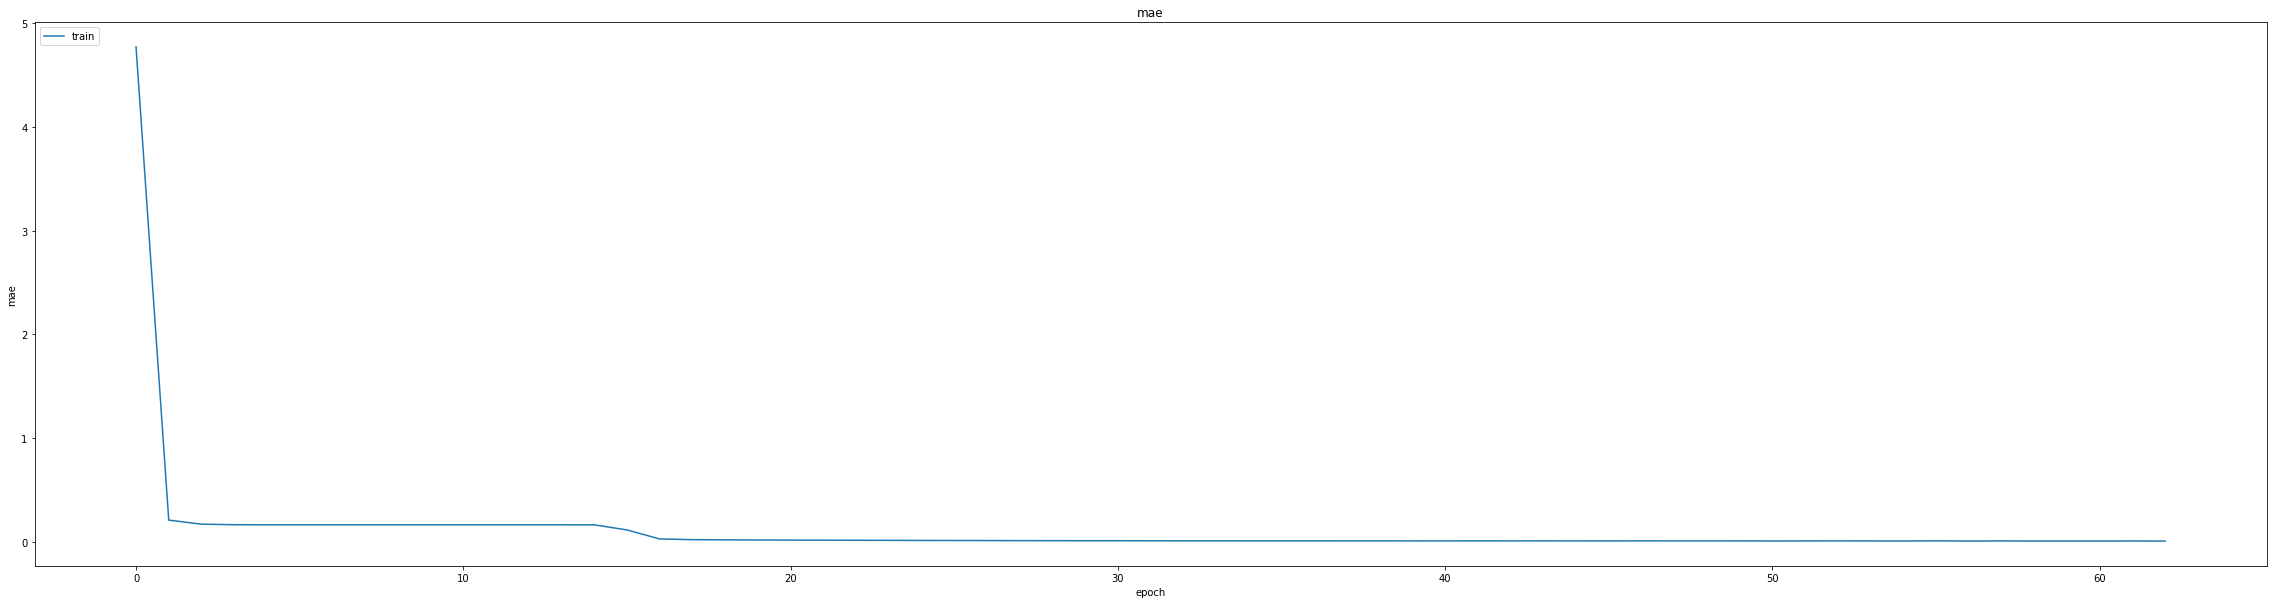

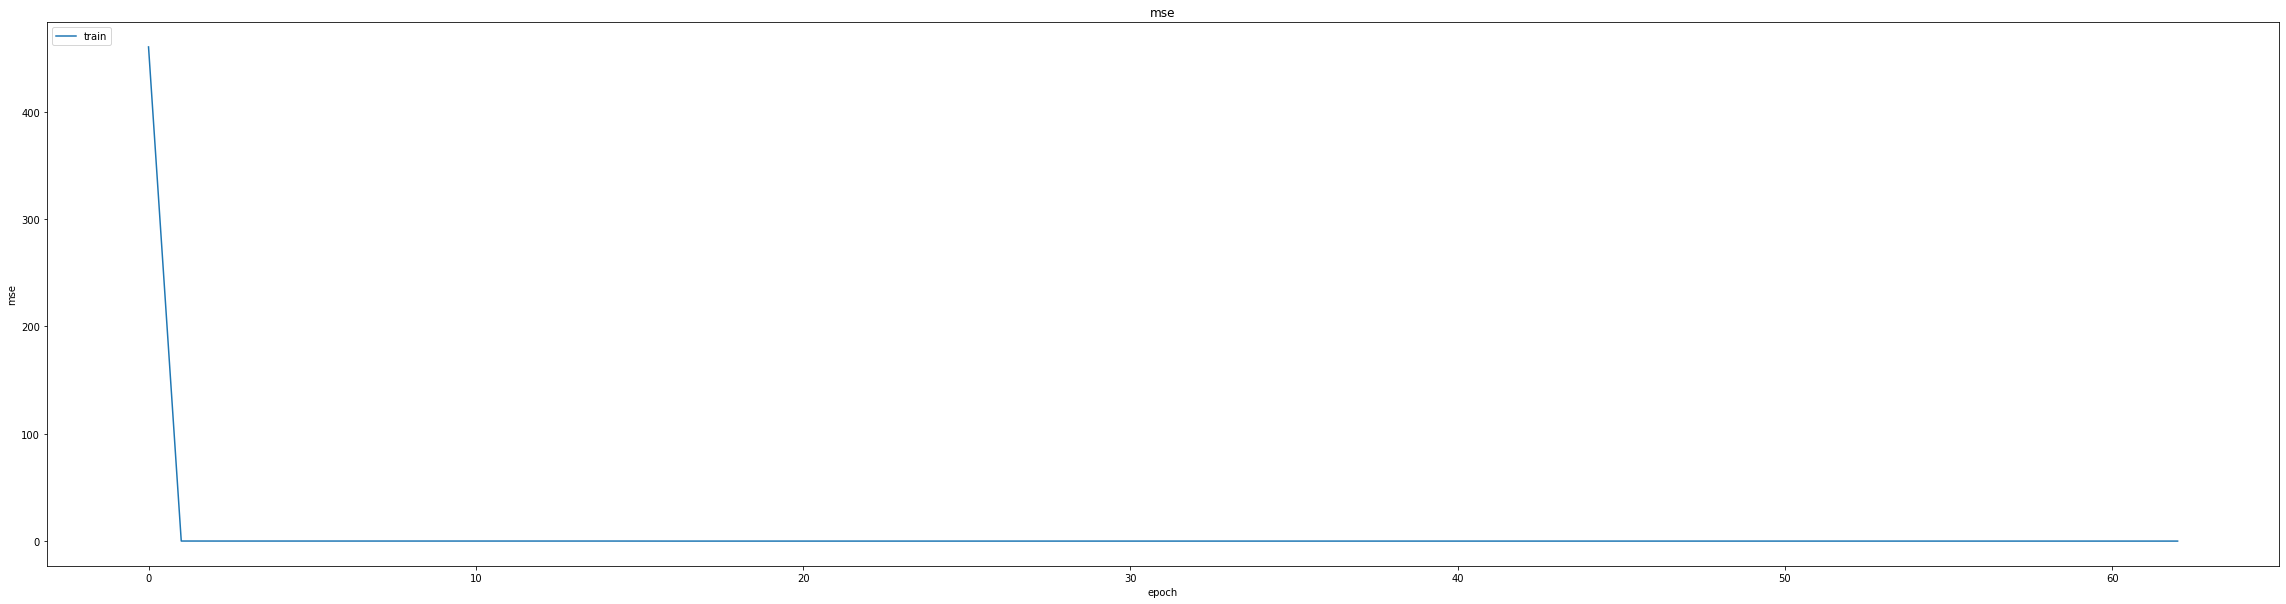

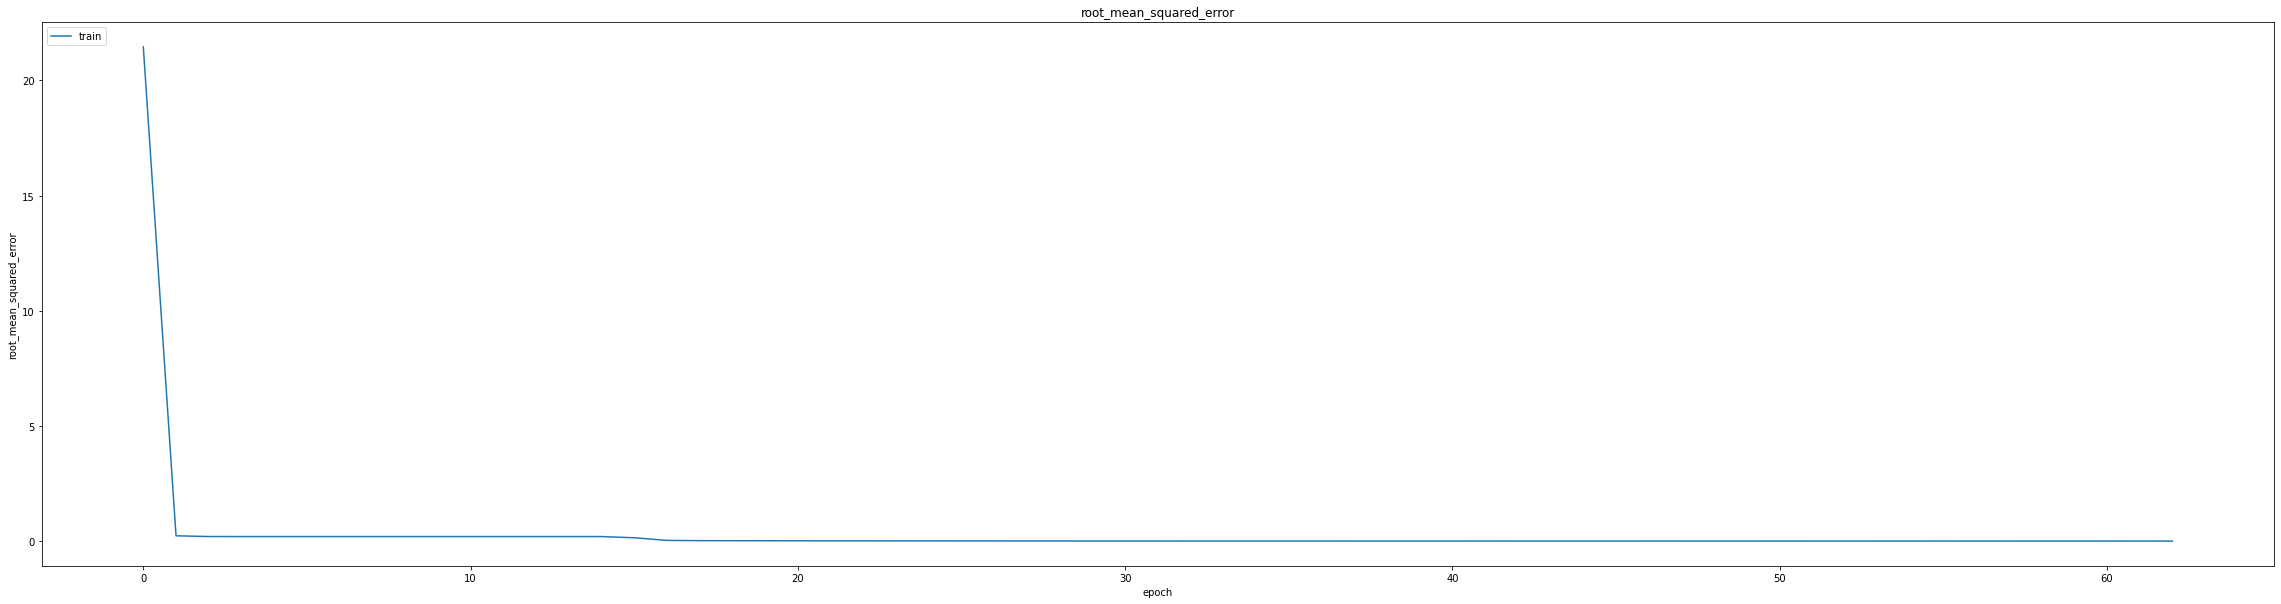

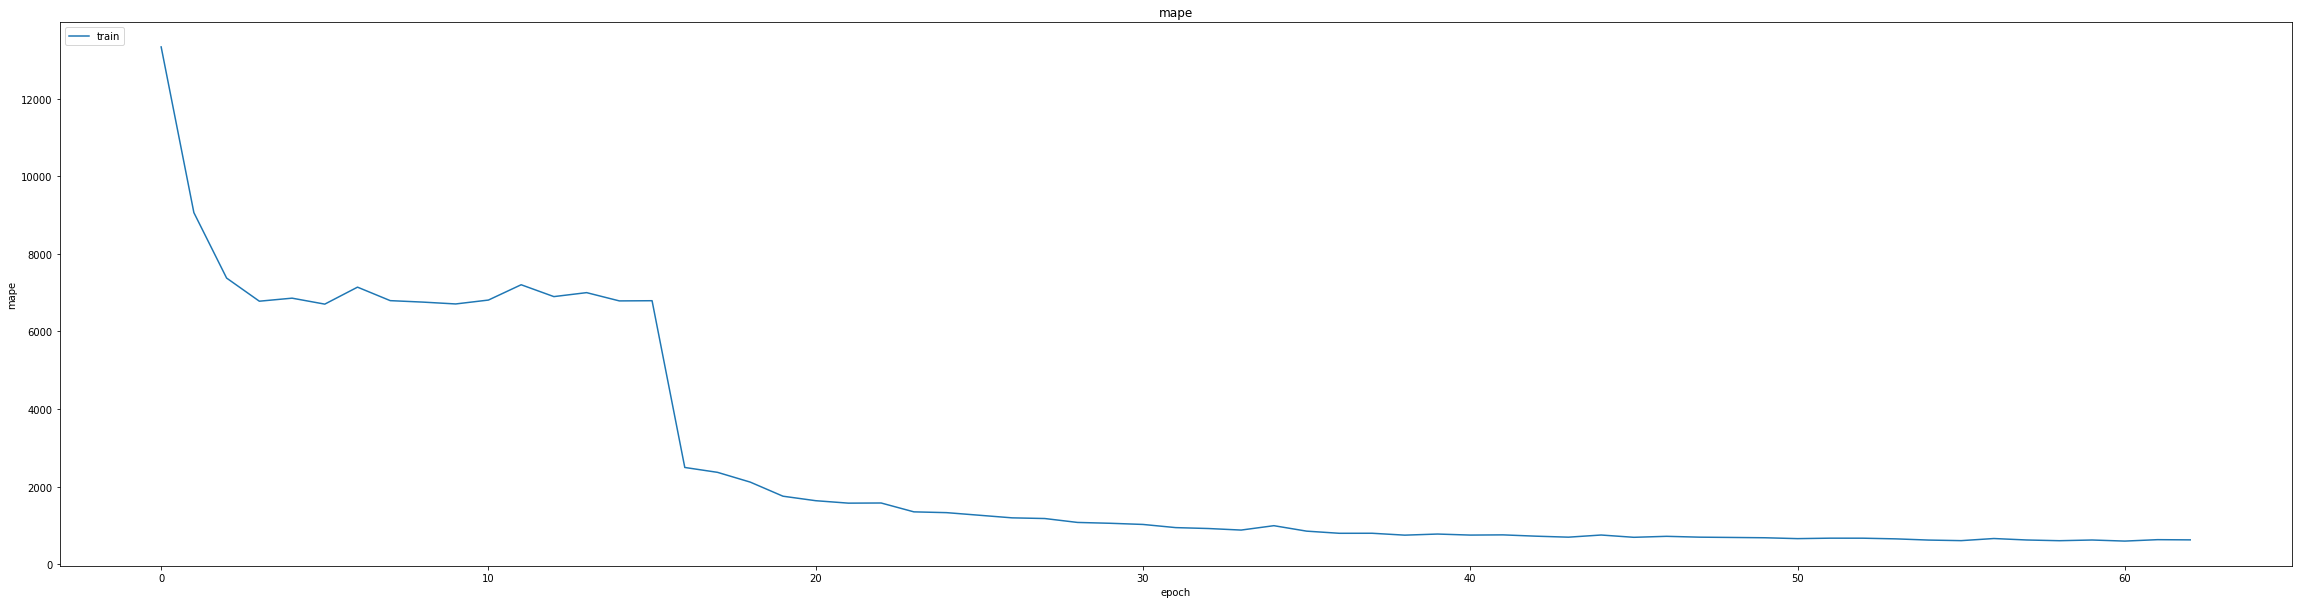

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.010296991094946861
0.010296991094946861
0.013687020167708397
464/464 [==============================] - 3s 4ms/step
0.9964413412886659


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 5.7775e-04 - mae: 0.0122 - mse: 5.7775e-04 - root_mean_squared_error: 0.0240 - mape: 1165.9969
Epoch 1: val_mse did not improve from 0.00019
348/348 [==============================] - 9s 14ms/step - loss: 5.7775e-04 - mae: 0.0122 - mse: 5.7775e-04 - root_mean_squared_error: 0.0240 - mape: 1165.9969 - val_loss: 2.4145e-04 - val_mae: 0.0126 - val_mse: 2.4145e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 3506.0903 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 8.8430e-05 - mae: 0.0071 - mse: 8.8430e-05 - root_mean_squared_error: 0.0094 - mape: 1320.9370
Epoch 2: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 11ms/step - loss: 8.8480e-05 - mae: 0.0071 - mse: 8.8480e-05 - root_mean_squared_error: 0.0094 - mape: 1310.0042 - val_loss: 4.3981e-04 - val_mae: 0.0189 - val_mse: 4.3981e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 3359.4817 -

348/348 [==============================] - 14s 39ms/step - loss: 8.3118e-05 - mae: 0.0070 - mse: 8.3118e-05 - root_mean_squared_error: 0.0091 - mape: 1119.6475 - val_loss: 1.2274e-04 - val_mae: 0.0075 - val_mse: 1.2274e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 4153.0386 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
348/348 [==============================] - ETA: 0s - loss: 7.8778e-05 - mae: 0.0068 - mse: 7.8778e-05 - root_mean_squared_error: 0.0089 - mape: 1154.7244
Epoch 5: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 12ms/step - loss: 7.8778e-05 - mae: 0.0068 - mse: 7.8778e-05 - root_mean_squared_error: 0.0089 - mape: 1154.7244 - val_loss: 2.1415e-04 - val_mae: 0.0125 - val_mse: 2.1415e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 3271.3606 - lr: 8.1000e-04
Epoch 6/25
347/348 [============================>.] - ETA: 0s - loss: 8.0447e-05 - mae: 0.0070 - mse: 8.0447e-05 - root_mean_squared_error: 0.0090 - mape:

348/348 [==============================] - 14s 39ms/step - loss: 4.9976e-05 - mae: 0.0055 - mse: 4.9976e-05 - root_mean_squared_error: 0.0071 - mape: 936.9433 - val_loss: 1.0779e-04 - val_mae: 0.0087 - val_mse: 1.0779e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 3307.3708 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
344/348 [============================>.] - ETA: 0s - loss: 3.8918e-05 - mae: 0.0048 - mse: 3.8918e-05 - root_mean_squared_error: 0.0062 - mape: 983.1981 
Epoch 15: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 11ms/step - loss: 3.8919e-05 - mae: 0.0048 - mse: 3.8919e-05 - root_mean_squared_error: 0.0062 - mape: 972.2347 - val_loss: 3.9917e-04 - val_mae: 0.0191 - val_mse: 3.9917e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 2800.1646 - lr: 4.7830e-04
Epoch 16/25
344/348 [============================>.] - ETA: 0s - loss: 4.2738e-05 - mae: 0.0050 - mse: 4.2738e-05 - root_mean_squared_error: 0.0065 - map

348/348 [==============================] - 14s 39ms/step - loss: 3.6692e-05 - mae: 0.0046 - mse: 3.6692e-05 - root_mean_squared_error: 0.0061 - mape: 985.9415 - val_loss: 8.1782e-05 - val_mae: 0.0075 - val_mse: 8.1782e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 2921.6992 - lr: 4.3047e-04
Epoch 18/25
344/348 [============================>.] - ETA: 0s - loss: 4.0816e-05 - mae: 0.0050 - mse: 4.0816e-05 - root_mean_squared_error: 0.0064 - mape: 1011.5119
Epoch 18: val_mse did not improve from 0.00008
348/348 [==============================] - 4s 11ms/step - loss: 4.0689e-05 - mae: 0.0049 - mse: 4.0689e-05 - root_mean_squared_error: 0.0064 - mape: 1000.2316 - val_loss: 2.4820e-04 - val_mae: 0.0146 - val_mse: 2.4820e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2831.6042 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
344/348 [============================>.] - ETA: 0s - loss: 3.1961e-05 - mae: 0.0043 - mse: 3.1961e-05 - root_mean_squared_error: 0.0057 - ma

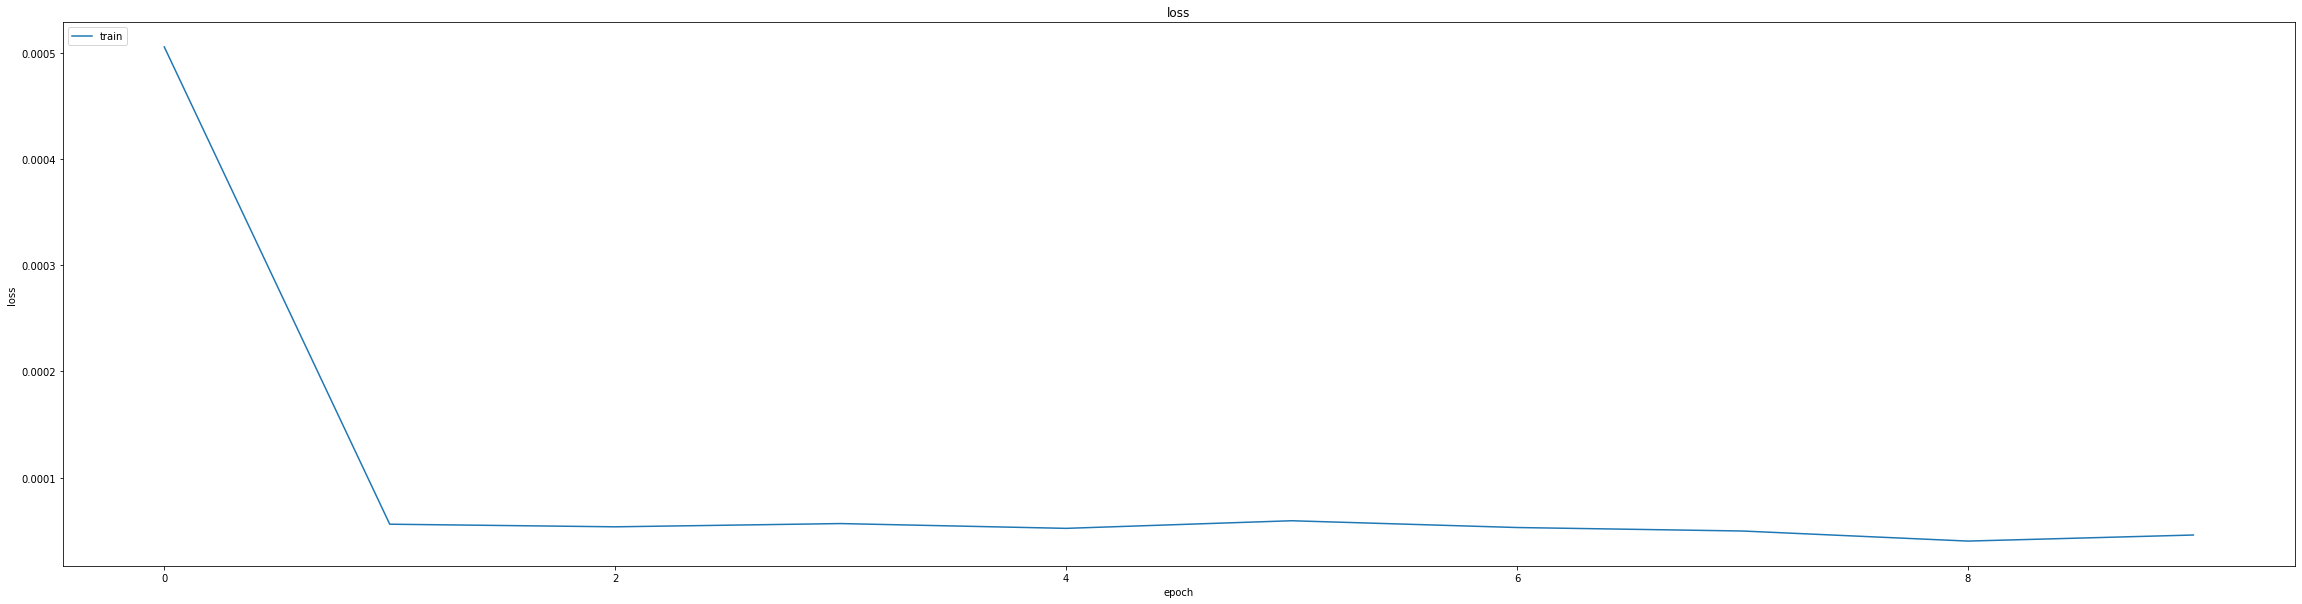

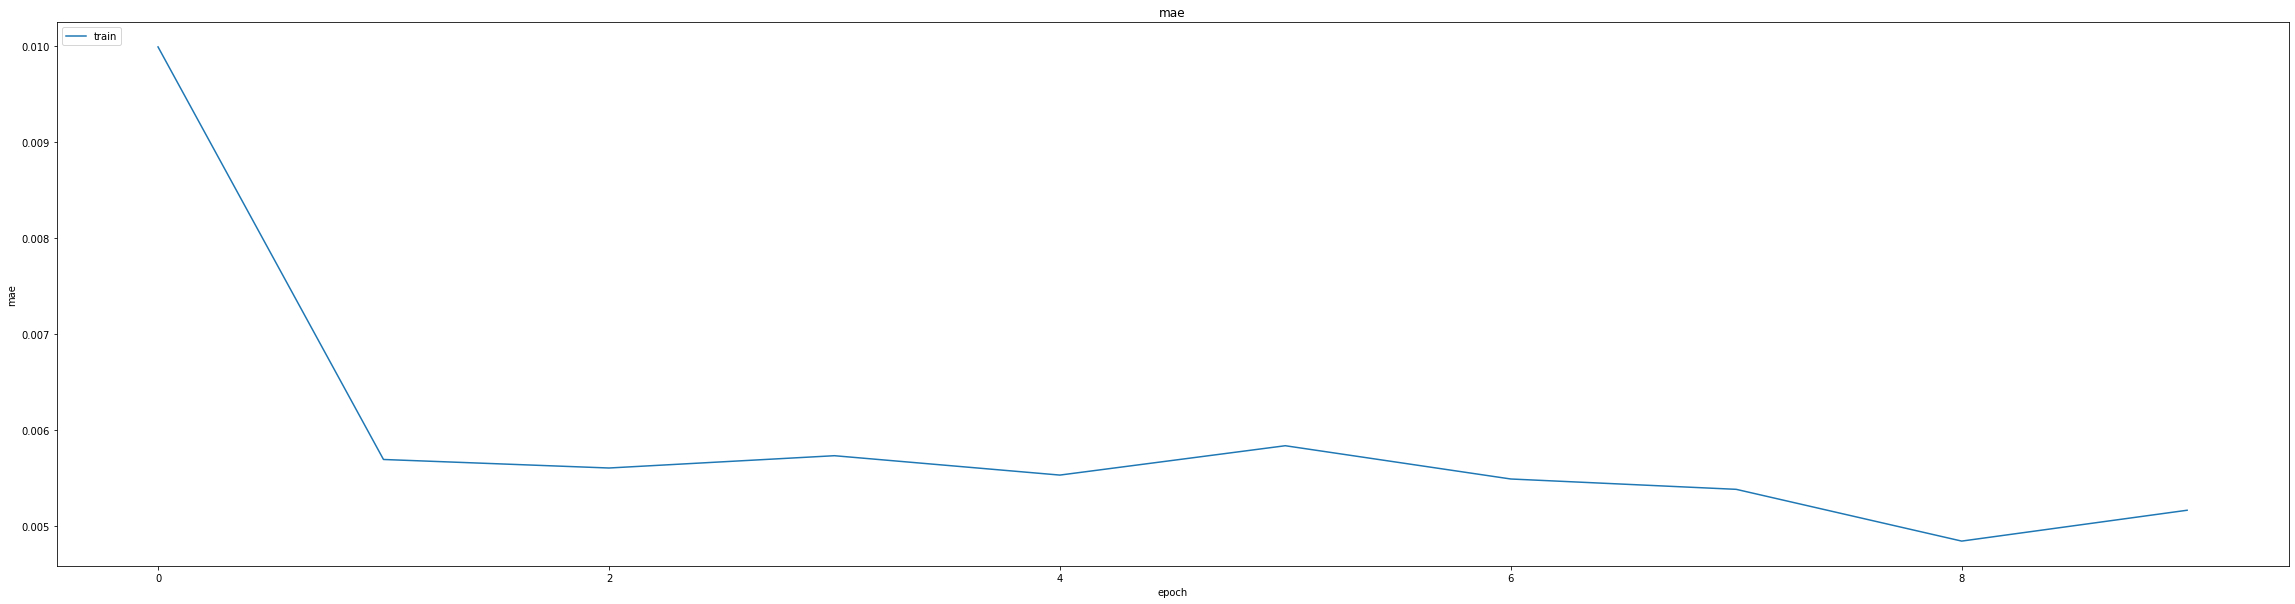

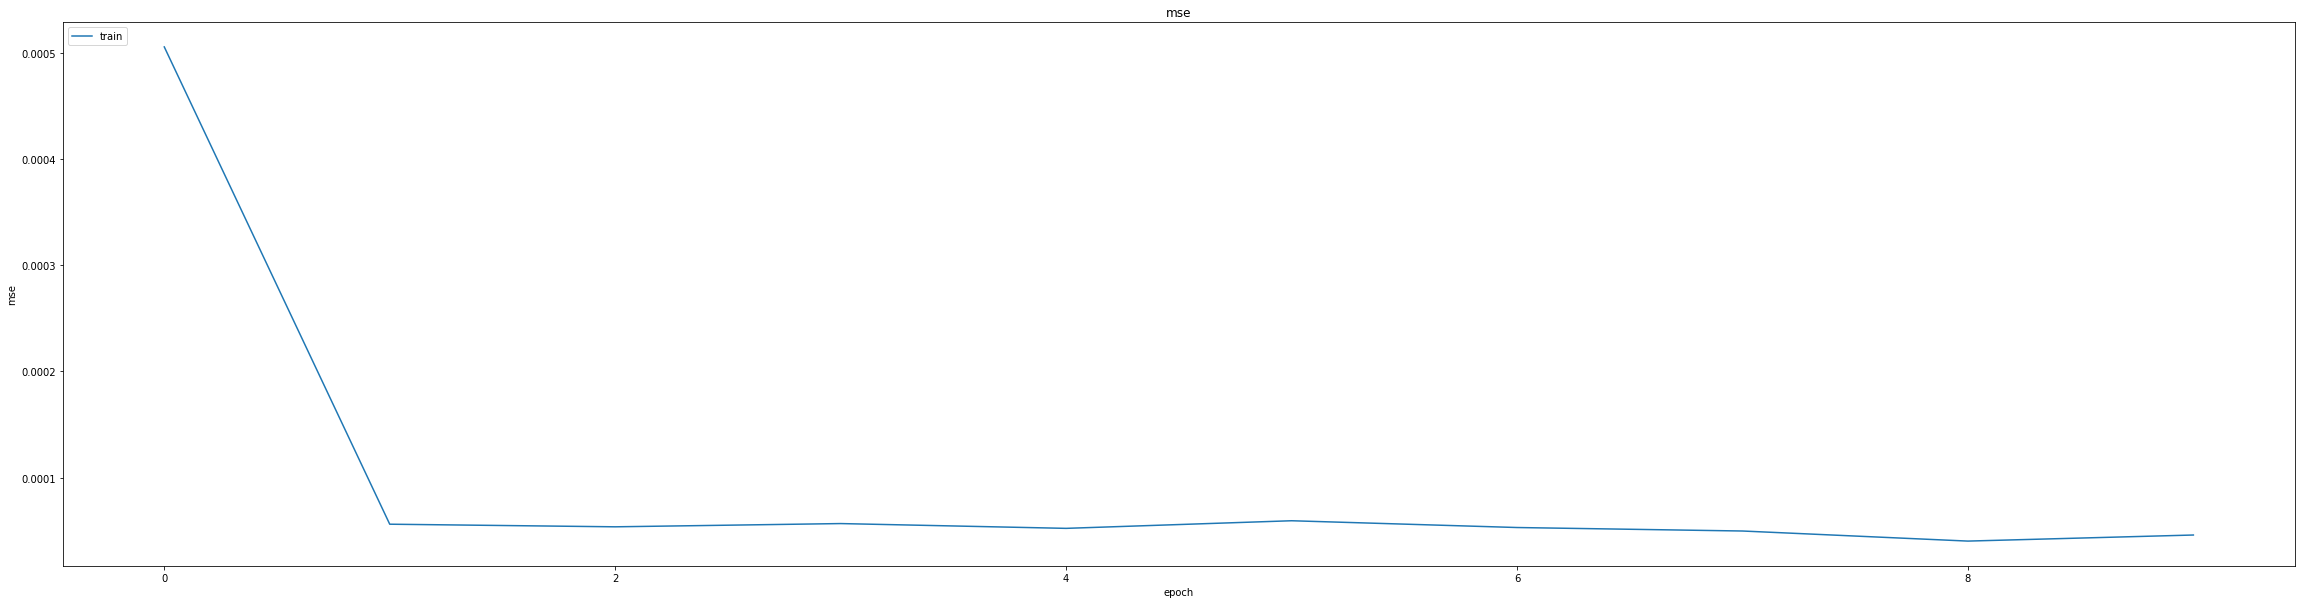

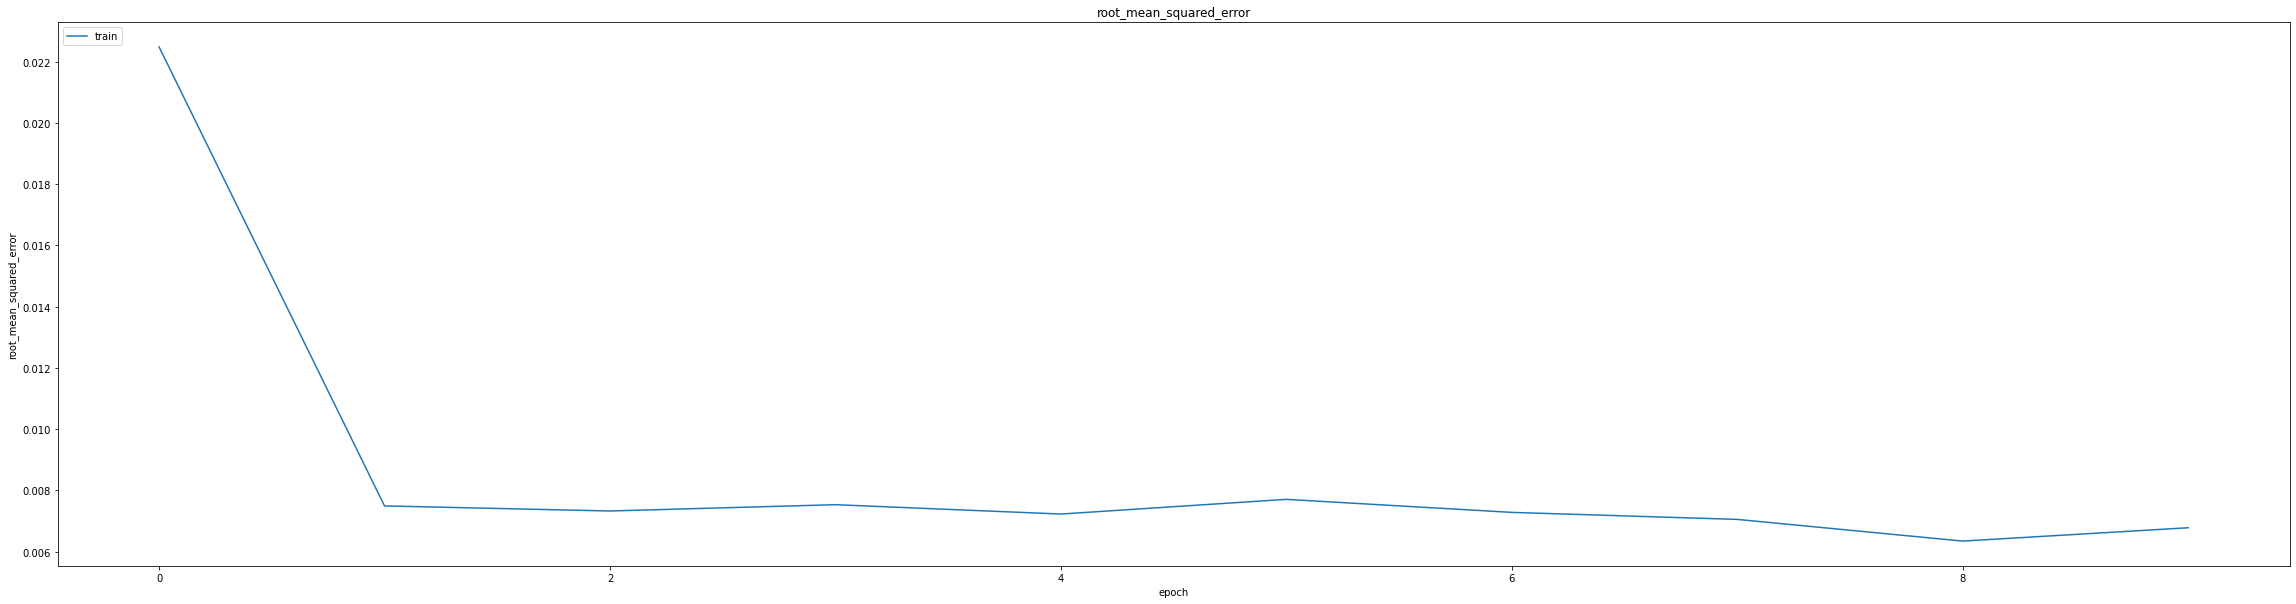

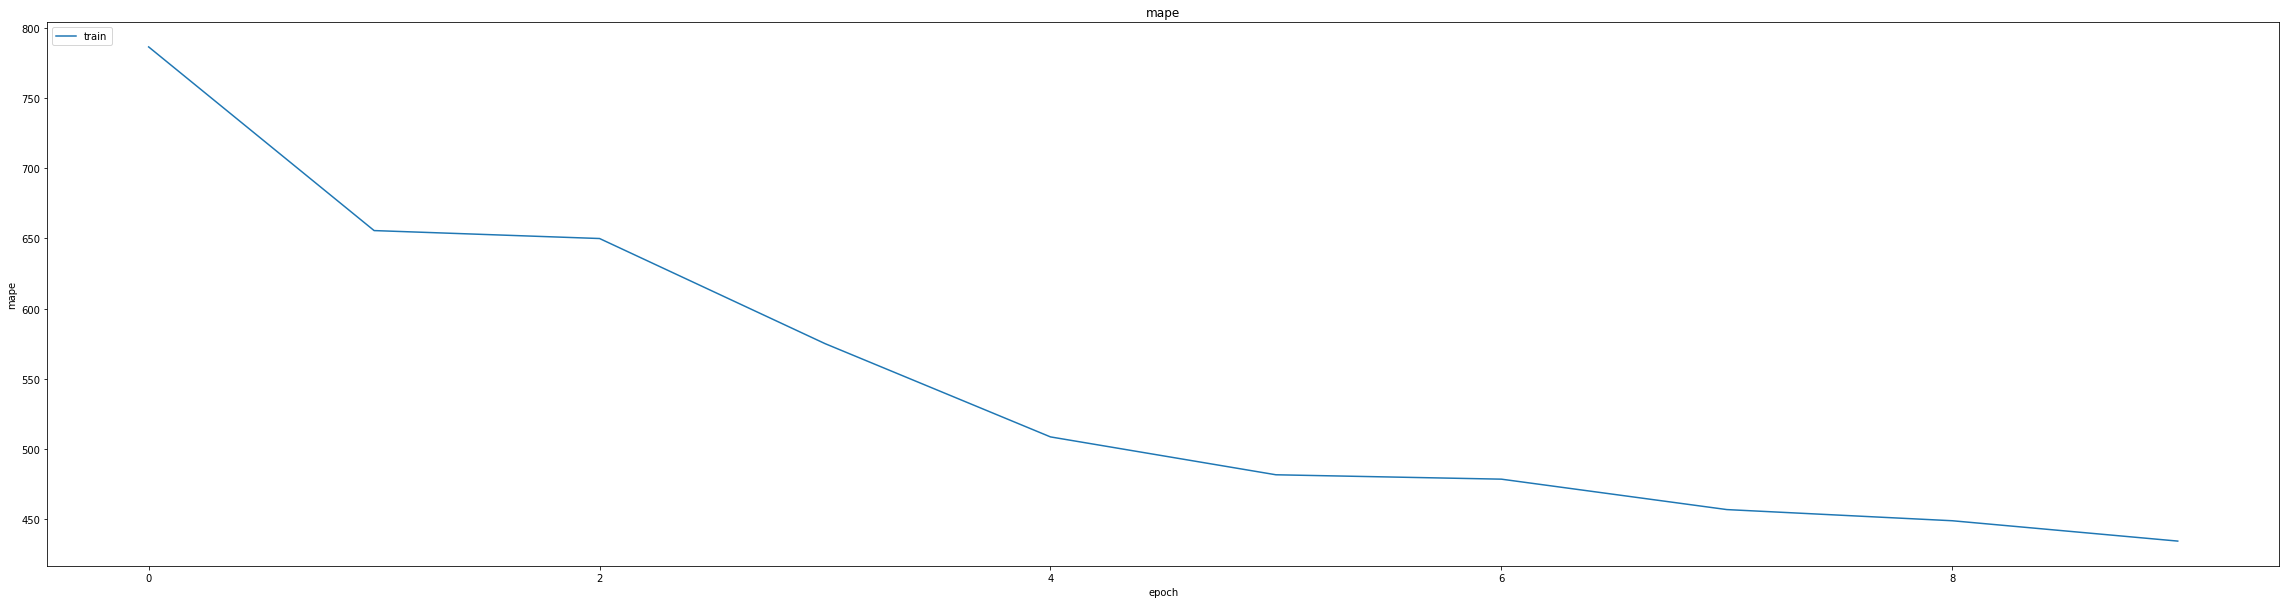

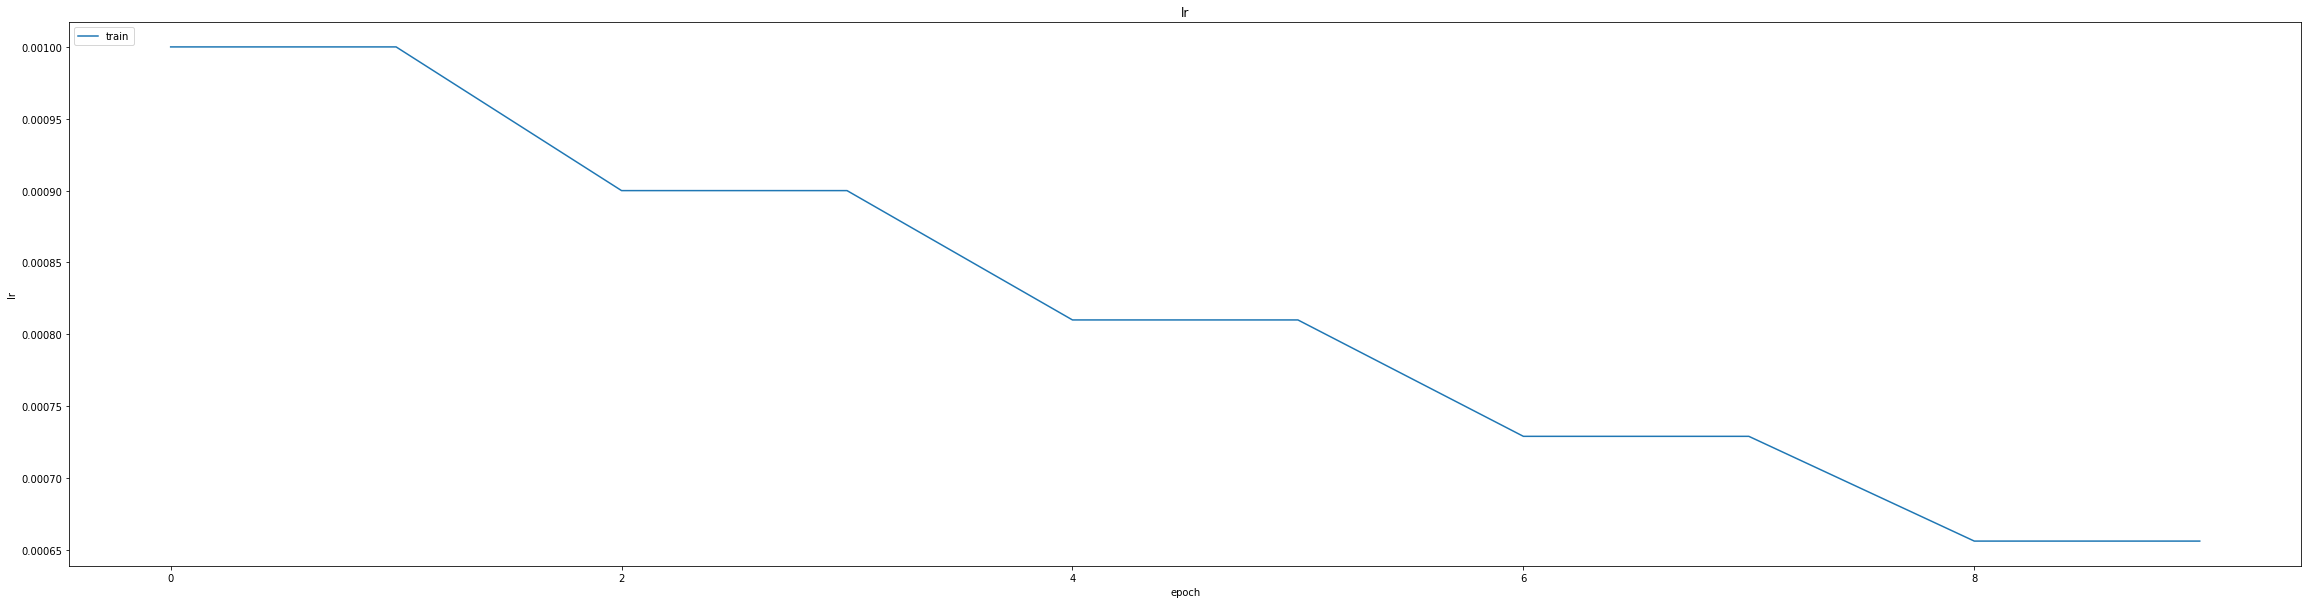

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.0075041200034320354
0.0075041200034320354
0.009043353609740734
464/464 [==============================] - 3s 4ms/step
0.9969603456647176


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


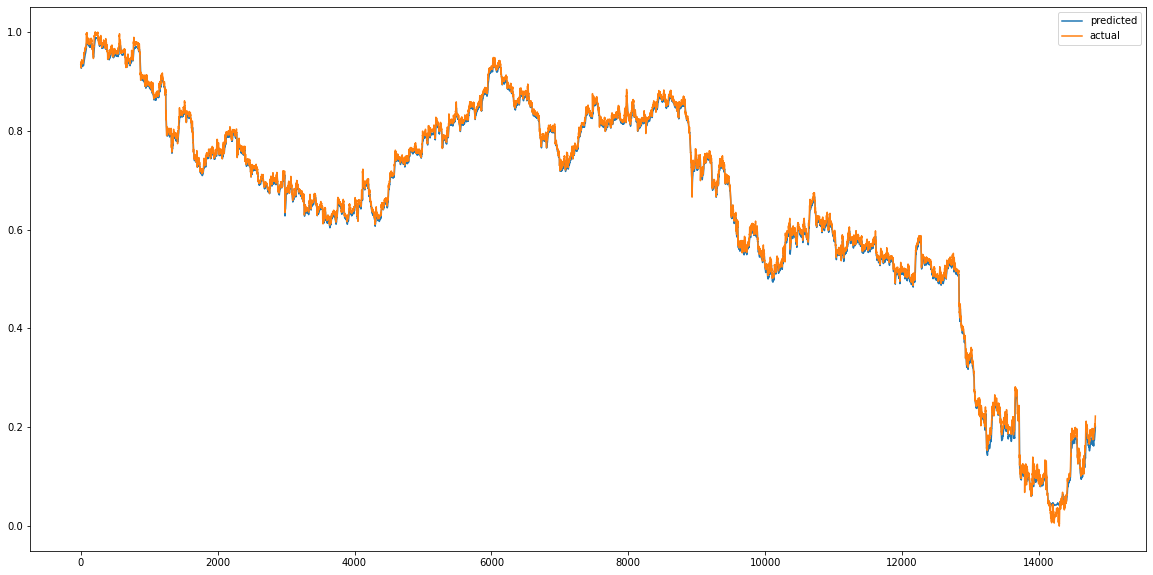

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


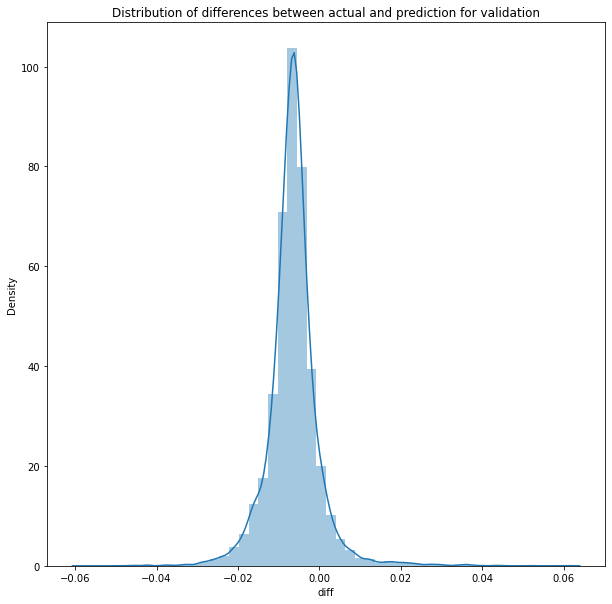

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


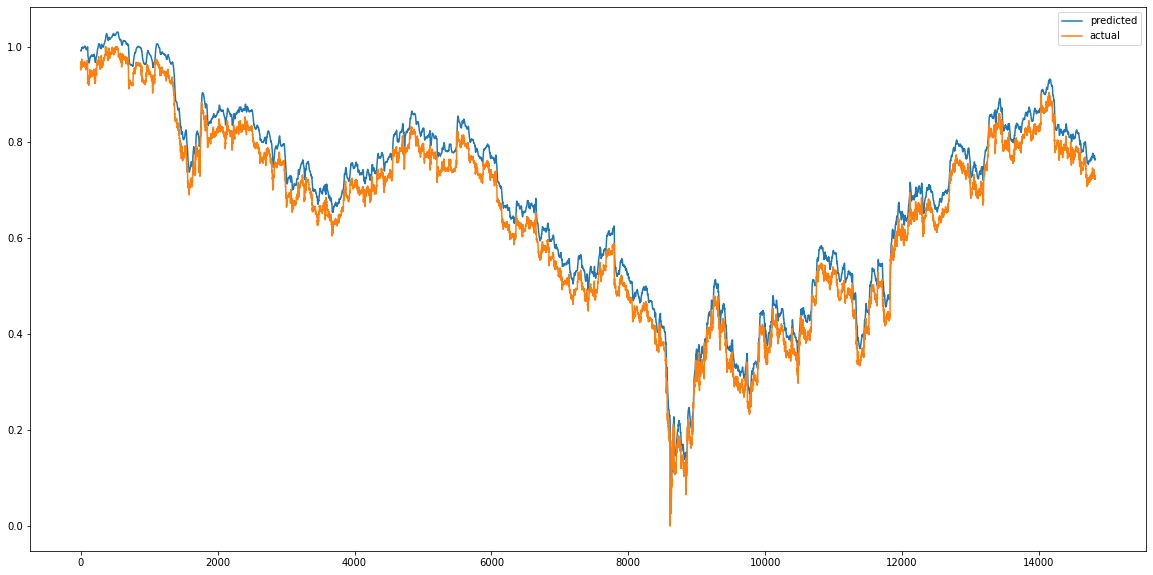

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


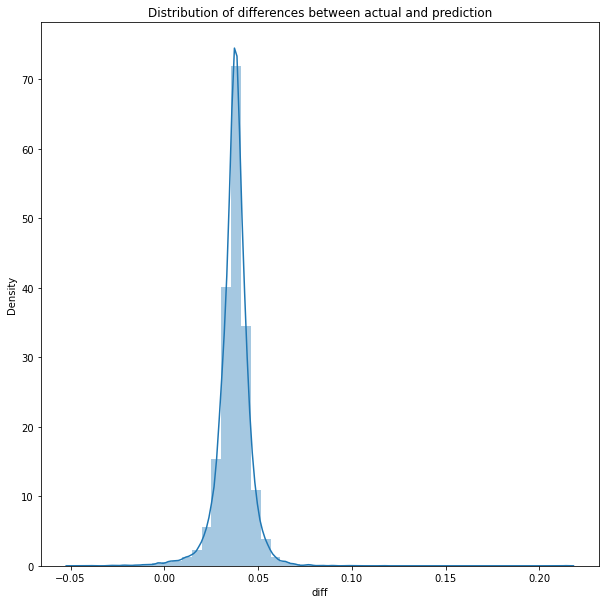

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0014549679549592722
RMSE :  0.03814404219480773
MAE :  0.03724627725821718
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9621144732797878


count    14827.000000
mean         0.037145
std          0.008672
min         -0.048526
25%          0.033641
50%          0.037658
75%          0.041270
max          0.214368
Name: diff, dtype: float64